# Final Project

### Introduction
For this study, we collected and processed all available 2023 microdata files from the ***American Time Use Survey (ATUS)***, including the **atusact**, **atussum**, **atusresp**, and **atuscps** datasets. Each of these files offers a different layer of information about respondents’ daily activities, personal demographics, and household characteristics. Before conducting any analysis, we thoroughly reviewed the official codebooks and technical documentation to ensure a clear understanding of the variable definitions, activity coding structures, and the relationships between different datasets.

After importing the data into R, we used the tidyverse package for data cleaning and transformation. Our initial focus was on the atusact file, which records episode-level activity data for each respondent over a 24-hour period. Each activity is coded using a hierarchical scheme and is accompanied by a duration variable (`TUACTDUR24`) and a social context variable (`TUWHO_CODE`), which indicates whether the activity was performed alone or with others. We filtered this file to identify and extract durations for several key categories of activities, including exercise (code 1301), travel (codes beginning with 18), sleep (code 010101), work (codes beginning with 0501), internet use (codes 160101, 150101, 120307, 120308), and leisure (codes 120307 and 120308). Travel activities were further classified by purpose, distinguishing between travel for work (1505), socializing (181201), entertainment (181205), and exercise (181301).

For each of these activity types, we calculated the total time each respondent spent per day and also disaggregated this time based on the social context. Specifically, we separated each duration into “alone” time (when `TUWHO_CODE` was 0) and “group” time (when `TUWHO_CODE` was greater than 0). This allowed us to assess both the quantity and the social nature of time use across all major activities.

Once we had aggregated daily activity durations for each respondent, we enriched the dataset by merging in demographic and socioeconomic characteristics from the other ATUS files using the common identifier `TUCASEID`. From the atussum file, we extracted age, gender, and education level. The education variable, originally reported in 16 detailed categories, was recoded into three broad levels: low, medium, and high. From atusresp, we added employment status, whether the diary day was a weekday or weekend, household size, the number of adults in the household, the number of children under 18, and household type (e.g., single-family home, apartment, dormitory). The atuscps file provided information on household income, which was available in grouped brackets rather than exact dollar amounts.

The final product of this process was a comprehensive, respondent-level dataset named **D_PER_DAY**. Each row in this dataset represents one respondent and includes total, alone, and group durations for each key activity type, along with demographic and household-level variables. We ensured that categorical variables were recoded into readable formats, addressed missing values where necessary, and verified the consistency and integrity of merged data. This structured dataset forms the foundation for analyzing patterns of time use behavior across different segments of the population, enabling detailed exploration of how daily routines vary by age, gender, education, employment status, income level, and household composition.

### Literature Review

**Activity involvement and time spent on computers for leisure**

Author : Han Dong, Cinzia Cirillo, and Marco Diana

Published in: Transportation (2018), Vol. 45:429–449

An econometric analysis on the American Time Use Survey dataset.
The study by Dong, Cirillo, and Diana (2017) analyzes how individuals allocate their leisure time particularly time spent on computers for leisure, which often involves social media using data from the 2013 American Time Use Survey (ATUS). The authors classify daily leisure behavior into six categories based on whether activities are done at home or outside, whether a computer is used, and whether multiple types of leisure are combined. They develop a joint discrete continuous econometric model that simultaneously captures both the choice of leisure activity type (discrete decision) and the amount of time spent on it (continuous decision). Their findings show that while computer based leisure is increasingly common, it does not strongly substitute for other leisure activities. Instead, time spent on digital leisure is influenced by individual and household characteristics such as income, number of children, and employment status and varies notably between weekdays and weekends. The study offers insight into how technology use shapes time use patterns and has implications for understanding changing travel and social behaviors in a digital age.


**An Exploratory Analysis of Joint-Activity Participation Characteristics Using the American Time Use Survey**

Authors: Sivaramakrishnan Srinivasan and Chandra R. Bhat

Published in: Transportation, 2008

This study conducts a detailed exploratory analysis of joint activity participation using ATUS data. It examines how individuals engage in activities with household and non household companions, analyzing differences based on activity purpose, companion type, and day of the week. The research highlights that joint activities often have longer durations and are more likely to occur at others' residences, providing insights into social behavior patterns.



**Free Time and Physical Activity Among Americans 15 Years or Older**

Authors: Katherine E. B. Houghton, Michelle S. Williamson, Susan A. Carlson, Janet E. Fulton

Published in: Preventing Chronic Disease, Volume 16 (2019)

This paper analyzes ATUS data to investigate the relationship between discretionary free time and physical activity levels among Americans aged 15 and older. It explores how the amount of free time influences the likelihood of engaging in physical activities, offering valuable information on health behaviors and time-use patterns.

In what follows, we delve into more details.

---

### Background
The American Time Use Survey (ATUS), conducted by the U.S. Bureau of Labor Statistics since 2003, collects data on how Americans spend their time over a 24-hour period. It provides valuable insights for researchers and policymakers into patterns of work, family life, and daily activities.

---

### Dataset
ATUS participants report their daily activities through a time diary, including start/end times, location, and companions. Respondents are selected from those who completed the Current Population Survey (CPS), enabling linkage with detailed demographic and employment data.

This project uses the 2023 ATUS data.

#### Raw Files
- **atusact_2023** : Contains one row per activity recorded by respondents. Includes start time, stop time, activity codes (e.g., sleeping, working), and location. Also links to who was present during the activity and whether the respondent was also working.
- **atuswho_2023** : Lists who was present during each activity (alone, with household children, spouse, non-HH members, etc.). Linked via activity line number. One row per person present per activity.
- **atuscps_2023** : Derived from the Current Population Survey conducted 2–5 months before the ATUS interview. Contains demographic and labor force characteristics, including: Education level (PEEDUCA), Family income (HUFAMINC), Occupation & industry, Household composition, Marital status, Employment status (full/part-time), Race, Hispanic origin, citizenship, Veteran status, disability indicators, Geographic info (region, metro status)
- **atussum_2023** : Aggregated totals per respondent, such as: Total daily minutes spent in each activity category (e.g., work, leisure, travel, childcare), Summary by tier (ATUS activity code system)
Useful for quick modeling without full activity detail.
- **atusresp_2023** : Contains ATUS interview results per respondent, such as: Diary day of the week, Respondent weight, Who completed the diary, Employment status (TELFS), Age, gender (TESEX), Household size, presence of children
Often used in combination with CPS file for analysis

The processed dataset created from these files is named **D_PER_DAY**.

#### `Dictionary`
- `CASEID`: Unique identifier for each respondent  
- `DIARYDAY`: Day of the week of the interview
- `TRAVEL_DUR`: Daily travel duration (minutes)  
- `TRAVEL_WORK_DUR`: Travel time for working (minutes)  
- `TRAVEL_SOCO_DUR`: Travel time for socializing (minutes)  
- `TRAVEL_ENT_DUR`: Travel time for entertainment (minutes)  
- `TRAVEL_EXE_DUR`: Travel time for exercise (minutes)
- `OTHER_TRAVEL_DUR`: Travel time for other activities (minutes)
- `EXE_DUR`: Daily exercise duration (minutes)
- `ALONE_EXE_DUR`: Time spent alone exercising (minutes)
- `GROUP_EXE_DUR`: Time spent with others exercising (minutes)
- `INT_DUR`: Internet usage duration (minutes)  
- `ALONE_INT_DUR`: Time spent alone using the internet (minutes)
- `GROUP_INT_DUR`: Time spent with others using the internet (minutes) 
- `WORK_DUR`: Daily work duration (minutes) 
- `ALONE_WORK_DUR`: Time spent alone working (minutes)
- `GROUP_WORK_DUR`: Time spent with others working (minutes)
- `LEI_DUR`: Leisure time duration (minutes)  
- `ALONE_LEI_DUR`: Time spent alone in leisure (minutes)
- `GROUP_LEI_DUR`: Time spent with others in leisure (minutes)
- `SLEEP_DUR`: Daily sleep duration (minutes) 
- `OTHER_DUR`: Time spent doing other activities (minutes)
- `AGE`: Respondent's age  
- `SEX`: 1 = Male, 2 = Female  
- `EDU`: Highest level of education completed
- `EMP_STAT`: Labor force status 
- `HOUSE`: Type of housing unit 
- `INC`: Family income level
- `ADULT`: Number of persons in the household aged 18 years or more
- `CHILDREN`: Number of +18 persons in the household aged under 18 years

---

### One-hot Encoding Explanation
First, we read data. Then we apply the one-hot encoding to deal with dummy variables. Also, we add interaction terms between dummy variables and numerical variables, we move the target variable to the end of the dataset. Finally, we check the independency of columns. We see that our dataset is of full rank.

#### Education Level
`EDU` = What is the highest level of school you have completed or the highest degree you have received?

**Files:**  
atuscps_2023, atussum_2023
As defined in the ATUS dictionary, the education level is categorized as follows:
| Code        | 31                   | 32              | 33               | 34               | 35         | 36         | 37         | 38                         | 39                   | 40                     | 41                          | 42                       | 43                          | 44                            | 45                             | 46                       |
|-------------|----------------------|------------------|------------------|------------------|-------------|-------------|-------------|------------------------------|------------------------|--------------------------|-------------------------------|------------------------------|-------------------------------|--------------------------------|----------------------------------|----------------------------|
| Description | Less than 1st grade | 1st–4th grade   | 5th or 6th grade | 7th or 8th grade | 9th grade | 10th grade | 11th grade | 12th grade – no diploma    | HS graduate (GED)    | Some college, no degree | Associate – vocational     | Associate – academic      | Bachelor's (BA, BS, etc.)   | Master’s (MA, MS, etc.)      | Professional (MD, DDS, etc.) | Doctoral (PhD, EdD, etc.) |

So We classify education into three levels: up to diploma (including diploma) as low educated, college degrees as mid educated, and bachelor and more university degrees as high educated (low educated is our base group).

`MIDEDU`: Set to 1 if the individual has some college or an associate degree (codes 40, 41, 42), otherwise 0.

`HIGHEDU`: Set to 1 if the individual has a bachelor’s degree or higher (codes 43 to 46), otherwise 0.

Otherwise, the individual is  considered to have a low level of education

#### Day of the Week
`DIARYDAY` = Day of the diary day (day of the week about which the respondent was interviewed)  
**Files:**  
atusresp_2023, atussum_2023

| Code        | 1      | 2      | 3        | 4          | 5         | 6       | 7        |
|-------------|--------|--------|----------|------------|-----------|---------|----------|
| Day of Week | Sunday | Monday | Tuesday  | Wednesday  | Thursday  | Friday  | Saturday |

We create a new variable `WEEKD` to indicate the day the respondent took the survey:

0 if the diary day is Saturday (1) or Sunday (7).

1 for Monday to Friday.

#### Housing Type
`HOUSE` = Type of housing unit

**File:**  
atuscps_2023

| Code | 1                    | 2                                              | 3                                                   | 4                                | 5                                                 | 6                                                  | 7                                 | 8                                                     | 9                                               | 10                              | 11                                 | 12                             |
|------|----------------------|--------------------------------------------------|-----------------------------------------------------|----------------------------------|----------------------------------------------------|-----------------------------------------------------|-----------------------------------|---------------------------------------------------------|--------------------------------------------------|----------------------------------|------------------------------------|----------------------------------|
| Type | House, apartment, flat | Housing unit in nontransient hotel, motel, etc. | Housing unit permanent in transient hotel, motel   | Housing unit in rooming house | Mobile home or trailer with no permanent room added | Mobile home or trailer with 1 or more rooms added | Housing unit not specified above | Quarters not housing unit in rooming/boarding house | Unit not permanent in transient hotel/motel | Unoccupied tent site or trailer site | Student quarters in college dorm | Other unit not specified above |


To identify whether the respondent lives in a stationary house, we use the HEHOUSUT column. We consider a personal house as 1 and other types like dorm, sharing house, motels, mobile homes, and so on as 0:

`PERSHOU` = 1 if the housing type is code 1 (permanent house).

Otherwise, `PERSHOU` = 0.

#### Income Level
`INC` = Family income

**File:**  
atuscps_2023


| Code   | 1               | 2              | 3              | 4               | 5               | 6               | 7               | 8               |
|--------|------------------|----------------|----------------|------------------|------------------|------------------|------------------|------------------|
| Income | **Less than 5,000** | **5,000–7,499**  | **7,500–9,999**  | **10,000–12,499** | **12,500–14,999** | **15,000–19,999** | **20,000–24,999** | **25,000–29,999** |

| Code   | 9                 | 10              | 11              | 12              | 13              | 14              | 15                               | 16                           |
|--------|--------------------|------------------|------------------|------------------|------------------|------------------|----------------------------------|------------------------------|
| Income | **30,000–34,999** | **35,000–39,999** | **40,000–49,999** | **50,000–59,999** | **60,000–74,999** | **75,000–99,999** | **100,000–149,999** | **$150,000 and over** |


We classify income levels into three groups. We consider household incomes up to 30,000 as low income, 30,000–75,000 as mid income, and above 75,000 as high income (low income is the base group).

`MIDINC` = 1 if family income is in the mid-range (codes 9 to 13), else 0.

`HIGHINC` = 1 if income is in the high range (codes 14 to 16), else 0.

When both `MIDINC` and `HIGHINC` are 0, the person is considered to be in the low-income group.

#### Employment Status
`EMP_STAT` = Edited: labor force status  

**Files:**  
atusresp_2023, atussum_2023

| Code | 1                  | 2                  | 3                       | 4                         | 5                  |
|------|---------------------|---------------------|--------------------------|----------------------------|---------------------|
| Status | Employed – at work | Employed – absent | Unemployed – on layoff | Unemployed – looking | Not in labor force |

To identify if someone is currently employed, we consider a person at work as employed, and if they are absent, fired, or searching for a job, as unemployed:

`EMPLOYED` = 1 if `EMP_STAT` is 1 (employed).

`EMPLOYED` = 0 otherwise.

#### Gender
`SEX` = sex  

**Files:**  
atusrost_2023, atussum_2023

| Code | 1     | 2      |
|------|--------|--------|
| Sex  | Male  | Female |

To simplify gender representation:

`MALE` = 1 if `SEX` = 1 (male).

`MALE` = 0 for females and others.

---

### Dependency Between the Features
Our dataset, as it is, has dependencies between some columns:

`EXE_DUR` = `ALONE_EXE_DUR`+`GROUP_EXE_DUR`

`WORK_DUR` = `ALONE_WORK_DUR`+`GROUP_WORK_DUR`

`INT_DUR` = `ALONE_INT_DUR`+`GROUP_INT_DUR`

`LEI_DUR` = `ALONE_LEI_DUR`+`GROUP_LEI_DUR`

`TRAVEL_DUR` = `TRAVEL_WORK_DUR`+`TRAVEL_SOCO_DUR`+`TRAVEL_ENT_DUR`+`TRAVEL_EXE_DUR`+`OTHER_TRAVEL_DUR`

So, we should make a decision about which column to preserve and which to remove among the dependent columns. We go from the simplest model to the most complex one.

---

### Model 1
Features to drop: `ALONE_EXE_DUR`,`GROUP_EXE_DUR`, `ALONE_WORK_DUR`,`GROUP_WORK_DUR`, `ALONE_INT_DUR`,`GROUP_INT_DUR`, `ALONE_LEI_DUR`,`GROUP_LEI_DUR`, `TRAVEL_WORK_DUR`, `TRAVEL_SOCO_DUR`, `TRAVEL_ENT_DUR`, `TRAVEL_EXE_DUR`, `OTHER_TRAVEL_DUR`


###  Model 2
Features to drop: `EXE_DUR`, `WORK_DUR`, `INT_DUR`, `LEI_DUR`, `TRAVEL_WORK_DUR`, `TRAVEL_SOCO_DUR`, `TRAVEL_ENT_DUR`, `TRAVEL_EXE_DUR`, `OTHER_TRAVEL_DUR`


###  Model 3
Features to drop: `EXE_DUR`, `WORK_DUR`, `INT_DUR`, `LEI_DUR`, `TRAVEL_DUR`

---

### Dealing with Categorical Features: Endogenous vs Exogenous Approaches

When our dataset includes categorical features, there are two main strategies we can adopt to incorporate them into our models:

#### Exogenous Approach

In this method, we **split the dataset** based on the values of a categorical variable and **build separate models** for each subset.

##### Example:

Assume we have:
- One continuous feature: `TRAVEL_DUR` (Travel Time)
- One categorical feature: `SEX`  
  (`SEX = 1` if the respondent is **Male**, `SEX = 2` if **Female**)

In the **exogenous approach**, we divide the data into two subsets based on `SEX`, then train two separate linear regression models:

##### MALE Dataset:

$$
\text{SLEEP\_DUR} = \beta_{0_{\text{MALE}}} + \beta_{\text{TT}_{\text{MALE}}} \cdot \text{TRAVEL\_DUR}
$$

##### FEMALE Dataset:

$$
\text{SLEEP\_DUR} = \beta_{0_{\text{FEMALE}}} + \beta_{\text{TT}_{\text{FEMALE}}} \cdot \text{TRAVEL\_DUR}
$$

---

#### Endogenous Approach

In this more integrated method, we:
1. Encode the categorical variable using dummy coding (e.g., create a `MALE` feature equal to 1 if `SEX = 1`, 0 otherwise).
2. Drop the original `SEX` column.
3. Fit **a single regression model** on the entire dataset, including interaction terms if necessary.

The regression equation becomes:

$$
\text{SLEEP\_DUR} = \beta_0 + \beta_{\text{TT}} \cdot \text{TRAVEL\_DUR} + \beta_{\text{MALE}} \cdot \text{MALE} + \beta_{\text{TT*MALE}} \cdot (\text{MALE} \cdot \text{TRAVEL\_DUR})
$$

##### Interpretation:

- If the respondent is **MALE** (`MALE = 1`):

$$
\text{SLEEP\_DUR} = (\beta_0 + \beta_{\text{MALE}}) + (\beta_{\text{TT}} + \beta_{\text{TT*MALE}}) \cdot \text{TRAVEL\_DUR}
$$

So:

- $\beta_{0_{\text{MALE}}} = \beta_0 + \beta_{\text{MALE}}$
- $\beta_{\text{TT}_{\text{MALE}}} = \beta_{\text{TT}} + \beta_{\text{TT*MALE}}$

- If the respondent is **FEMALE** (`MALE = 0`):

$$
\text{SLEEP\_DUR} = \beta_0 + \beta_{\text{TT}} \cdot \text{TRAVEL\_DUR}
$$

So:

- $\beta_{0_{\text{FEMALE}}} = \beta_0$
- $\beta_{\text{TT}_{\text{FEMALE}}} = \beta_{\text{TT}}$

---

#### Summary

- Both **exogenous** and **endogenous** approaches lead to the **same parameterization**.
- However, the **endogenous approach is more robust**, especially when handling **multiple categorical variables**, and allows us to use interaction terms flexibly.

**Therefore, for the remainder of this project, we adopt the endogenous approach.**


## Model 1

In [284]:
import numpy as np
import pandas as pd
import warnings

warnings.filterwarnings("ignore", category = pd.errors.PerformanceWarning)

##### Reading Data #####
df_activity = pd.read_csv("D_PER_DAY.csv", header = 0)
df_activity.drop('CASEID', axis = 1, inplace = True)

##### Dropping Features #####
df_activity.drop('ALONE_EXE_DUR', axis = 1, inplace = True)
df_activity.drop('GROUP_EXE_DUR', axis = 1, inplace = True)

df_activity.drop('ALONE_WORK_DUR', axis = 1, inplace = True)
df_activity.drop('GROUP_WORK_DUR', axis = 1, inplace = True)

df_activity.drop('ALONE_INT_DUR', axis = 1, inplace = True)
df_activity.drop('GROUP_INT_DUR', axis = 1, inplace = True)

df_activity.drop('ALONE_LEI_DUR', axis = 1, inplace = True)
df_activity.drop('GROUP_LEI_DUR', axis = 1, inplace = True)

df_activity.drop('TRAVEL_WORK_DUR', axis = 1, inplace = True)
df_activity.drop('TRAVEL_SOCO_DUR', axis = 1, inplace = True)
df_activity.drop('TRAVEL_ENT_DUR', axis = 1, inplace = True)
df_activity.drop('TRAVEL_EXE_DUR', axis = 1, inplace = True)
df_activity.drop('OTHER_TRAVEL_DUR', axis = 1, inplace = True)

##### Summary of Dataset #####
# Select only columns that end with '_DUR'
duration_cols = [col for col in df_activity.columns if col.endswith('_DUR')]

# Sum across those duration columns for each row
row_durations = df_activity[duration_cols].sum(axis=1)

# Get summary statistics
Summary = row_durations.describe()

# Print the result
print("Summary of Total Duration Columns per Row:")
print(Summary)

##### Checking the Interdependency between the Features #####
rank = np.linalg.matrix_rank(df_activity.values)
num_features = df_activity.values.shape[1]

print("Rank of the DataFrame:", rank)
print("Number of features (columns):", num_features)

##### One-hot Encoding #####
# Whether it is a weekday or not #
df_activity['WEEKD'] = np.where(df_activity['DIARYDAY'].isin([1,7]), 0, 1)

# Education level (low, mid, hight) #
df_activity['MIDEDU'] = np.where(df_activity['EDU'].isin([40,41,42]), 1, 0)
df_activity['HIGHEDU'] = np.where(df_activity['EDU'].isin([43,44,45,46]), 1, 0)

# Whether lives in a stationary house or not #
df_activity['PERSHOU'] = np.where(df_activity['HOUSE'] == 1, 1, 0)

# Income level (low, mid, high) #
df_activity['MIDINC'] = np.where(df_activity['INC'].isin([9,10,11,12,13]), 1, 0)
df_activity['HIGHINC'] = np.where(df_activity['INC'].isin([14,15,16]), 1, 0)

# Whether at work or not #
df_activity['EMPLOYED'] = np.where(df_activity['EMP_STAT'] == 1, 1, 0)

# Whether male or not #
df_activity['MALE'] = np.where(df_activity['SEX'] == 1, 1, 0)

# Dropping previous columns #
cols_to_drop = ['DIARYDAY', 'EDU', 'HOUSE', 'INC', 'EMP_STAT', 'SEX']
df_activity.drop(columns = cols_to_drop, inplace = True)


##### Moving Target Column to the End of the Dataset #####
cols = [col for col in df_activity.columns if col != 'SLEEP_DUR'] + ['SLEEP_DUR']
df_activity = df_activity[cols]

print(df_activity.columns.tolist())

df_activity

Summary of Total Duration Columns per Row:
count    8548.0
mean     1440.0
std         0.0
min      1440.0
25%      1440.0
50%      1440.0
75%      1440.0
max      1440.0
dtype: float64
Rank of the DataFrame: 16
Number of features (columns): 16
['TRAVEL_DUR', 'EXE_DUR', 'INT_DUR', 'WORK_DUR', 'LEI_DUR', 'OTHER_DUR', 'AGE', 'CHILDREN', 'ADULT', 'WEEKD', 'MIDEDU', 'HIGHEDU', 'PERSHOU', 'MIDINC', 'HIGHINC', 'EMPLOYED', 'MALE', 'SLEEP_DUR']


TRAVEL_DUR  EXE_DUR  INT_DUR  WORK_DUR  LEI_DUR  OTHER_DUR  AGE  \
0            120      120      150         0      300        185   23   
1              0        0        0         0      520        340   57   
2              0       50      120         0      705        130   80   
3              0        0        0         0      825        195   71   
4             20        0        0       470        0        360   40   
...          ...      ...      ...       ...      ...        ...  ...   
8543          90        0        0         0      180        660   68   
8544         112        0       90         0      508        130   80   
8545           0        0       90         0        0        860   67   
8546         165        0        0         0      385        485   65   
8547           0        0        0         0      660         30   29   

      CHILDREN  ADULT  WEEKD  MIDEDU  HIGHEDU  PERSHOU  MIDINC  HIGHINC  \
0            0      1      1       0        0        1       0        0   
1            0      1      0       0        1        1       1        0   
2            0      1      0       1        0        1       0        0   
3            0      2      0       1        0        1       0        1   
4            2      2      1       0        1        1       0        1   
...        ...    ...    ...     ...      ...      ...     ...      ...   
8543         0      2      0       0        1        1       0        1   
8544         0      2      0       0        0        1       1        0   
8545         0      2      1       1        0        1       1        0   
8546         0      2      1       0        1        1       0        1   
8547         0      2      1       0        1        1       0        1   

      EMPLOYED  MALE  SLEEP_DUR  
0            1     1        565  
1            0     0        580  
2            0     0        435  
3            0     1        420  
4            1     1        590  
...        ...   ...        ...  
8543         0     0        510  
8544         0     1        600  
8545         0     0        490  
8546         0     1        405  
8547         1     1        750  

[8548 rows x 18 columns]

### Potential Data Leakage
Taking a look at the summary of our dataset (Considering only those columns related to activity duration), we can see that:

- **count** → There are 8,548 diary entries (rows).  
- **mean** → The average total duration per row is 1440 minutes.  
- **std** → The standard deviation is 0 — no variation at all.  
- **min** → The smallest total duration reported is 1440.  
- **25%** → First quartile is 1440.  
- **50%** → Median is 1440.  
- **75%** → Third quartile is 1440.  
- **max** → The largest total duration reported is 1440.

So, every single row in our dataset reports a complete 24-hour day: 

`sum of all *_DUR columns = 1440 minutes`.

This confirms that if we leave all or most `_DUR` columns in the model except `SLEEP_DUR`, the model can easily infer `SLEEP_DUR` as:

`SLEEP_DUR = 1440 - sum(other _DUR columns)`

---

#### Checking Data Leakage
The following code is used to **test for potential data leakage** when building a model to predict `SLEEP_DUR`. It does so by checking whether the sleep duration can be inferred almost exactly from the other activity columns.

| Correlation Value | Interpretation |
|-------------------|----------------|
| ≈ 1.0             | Very strong linear relationship. `SLEEP_DUR` can almost be perfectly reconstructed from the other features — indicating data leakage. The model can cheat. |
| ≈ 0.7 - 0.9       | Moderate to strong linear dependence. Model may still be unintentionally learning `SLEEP_DUR` by subtraction. |
| ≈ 0.5 or lower    | Weak correlation. Likely that the model cannot directly infer `SLEEP_DUR` from remaining features. Safer for training. |


If the correlation is very high, our dataset allows the model to indirectly "solve" for `SLEEP_DUR` by subtracting all other known time segments from 1440. This would result in artificially high performance during model evaluation — but poor generalization in real-world scenarios.

High correlation indicates feature leakage, and your model might not be truly learning the underlying behavior, just the remaining time in the day.

In [286]:
# Identify only _DUR columns except SLEEP_DUR
dur_cols = [col for col in df_activity.columns if col.endswith('_DUR') and col != 'SLEEP_DUR']

# Check for potential leakage
df_activity["NON_SLEEP_TOTAL"] = df_activity[dur_cols].sum(axis=1)
df_activity["ESTIMATED_SLEEP"] = 1440 - df_activity["NON_SLEEP_TOTAL"]

# Correlation between estimated and actual sleep
correlation = df_activity["ESTIMATED_SLEEP"].corr(df_activity["SLEEP_DUR"])
print("Correlation with true SLEEP_DUR:", correlation)

Correlation with true SLEEP_DUR: 1.0


#### Result
The correlation is very high and our model probably will cheat and gives us a very high performance as we can see in the following sections.

### Preprocessing
First, we need to read the data. After that, we perform preprocessing steps. Since the magnitudes of different feature values vary significantly, we normalize the data using the `StandardScaler` function, which normalize the feature values based on their mean and variance in a way that they all have mean of zero and standard deviation of 1.The main objective of the problem is predicting the sleeping time.

We distribute our data across three sets: training, validation, and test. A common split is:

- **Training set:** 70%
- **Validation set:** 15%
- **Test set:** 15%

To achieve this, follow these steps:

1. **Assign Features and Targets:**  
   Assign all features to a variable `X` and the target values to a variable `y`.

2. **Initial Split:**  
   Use the `train_test_split` function to split the data into a training set (70%) and a temporary set (30%).

3. **Secondary Split:**  
   Apply `train_test_split` again on the temporary set to divide it into a validation set (15% of the total data) and a test set (15% of the total data).

In [289]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


X = df_activity.loc[:, "TRAVEL_DUR":"MALE"]
y = df_activity["SLEEP_DUR"]

dummy_cols = ['WEEKD', 'MIDEDU', 'HIGHEDU', 'PERSHOU', 'MIDINC', 'HIGHINC', 'EMPLOYED', 'MALE']
numeric_cols = [col for col in X.columns if col not in dummy_cols]

##### Spliting Data #####
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size = 0.3, random_state = 42
)

X_test, X_val, y_test, y_val = train_test_split(
    X_temp, y_temp, test_size = 0.5, random_state = 42
)

##### Scaling the Data Values #####
scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train[numeric_cols]), 
                              columns = numeric_cols, index = X_train.index)
X_val_scaled = pd.DataFrame(scaler.transform(X_val[numeric_cols]), 
                            columns = numeric_cols, index = X_val.index)
X_test_scaled = pd.DataFrame(scaler.transform(X_test[numeric_cols]), 
                             columns = numeric_cols, index = X_test.index)

# Recombining Numerical and Dummy Columns
X_train_final = pd.concat([X_train_scaled, X_train[dummy_cols]], axis = 1)
X_val_final = pd.concat([X_val_scaled, X_val[dummy_cols]], axis = 1)
X_test_final = pd.concat([X_test_scaled, X_test[dummy_cols]], axis = 1)

##### Slope Interactions #####
for dummy in dummy_cols:
    for numeric in numeric_cols:
        interaction_term = f"{dummy}_{numeric}"
        X_train_final[interaction_term] = X_train_final[dummy] * X_train_final[numeric]
        X_val_final[interaction_term] = X_val_final[dummy] * X_val_final[numeric]
        X_test_final[interaction_term] = X_test_final[dummy] * X_test_final[numeric]


X_val_final.head()


TRAVEL_DUR   EXE_DUR   INT_DUR  WORK_DUR   LEI_DUR  OTHER_DUR       AGE  \
1578    0.733789 -0.426169  0.711865 -0.619255 -0.201602   0.479317 -0.628382   
5282    1.264644  0.356641 -0.383652  1.214858 -0.713615  -0.885350 -1.005842   
2905   -0.500758 -0.426169 -0.383652 -0.619255  0.147498   0.597778  1.420686   
7111   -0.747668 -0.426169 -0.383652 -0.363332  1.287892  -1.179133 -0.520536   
7126   -0.130394 -0.426169  2.902900 -0.619255 -0.201602   0.337164 -0.520536   

      CHILDREN     ADULT  WEEKD  ...  EMPLOYED_ADULT  MALE_TRAVEL_DUR  \
1578  1.572253  0.139202      0  ...        0.000000         0.000000   
5282 -0.529119 -1.116979      1  ...       -1.116979         0.000000   
2905 -0.529119 -1.116979      1  ...       -0.000000        -0.500758   
7111  1.572253  0.139202      0  ...        0.139202        -0.747668   
7126 -0.529119 -1.116979      0  ...       -1.116979        -0.000000   

      MALE_EXE_DUR  MALE_INT_DUR  MALE_WORK_DUR  MALE_LEI_DUR  MALE_OTHER_DUR  \
1578     -0.000000      0.000000      -0.000000     -0.000000        0.000000   
5282      0.000000     -0.000000       0.000000     -0.000000       -0.000000   
2905     -0.426169     -0.383652      -0.619255      0.147498        0.597778   
7111     -0.426169     -0.383652      -0.363332      1.287892       -1.179133   
7126     -0.000000      0.000000      -0.000000     -0.000000        0.000000   

      MALE_AGE  MALE_CHILDREN  MALE_ADULT  
1578 -0.000000       0.000000    0.000000  
5282 -0.000000      -0.000000   -0.000000  
2905  1.420686      -0.529119   -1.116979  
7111 -0.520536       1.572253    0.139202  
7126 -0.000000      -0.000000   -0.000000  

[5 rows x 89 columns]

### Linear Regression
Linear regression is a fundamental supervised learning algorithm used to model the relationship between a dependent variable $( y )$ and an independent variable $( x )$.

To improve the model's generalization and prevent overfitting, we use **regularization**, which adds a penalty term to the cost function.

---

#### **Mathematical Formulation**
A linear regression follows the equation:

$$
y = w x + b
$$

where:
- $( y )$ is the predicted output,
- $( x )$ is the input feature,
- $( w )$ is the weight,
- $( b )$ is the bias.

---

#### **Cost Function**
To measure the error between predicted values $( \hat{y} )$ and actual values $( y )$, we use the **Mean Squared Error (MSE)**:

##### **Without Regularization:**
$$
J(w, b) = \frac{1}{2m} \sum_{i=1}^{m} ( \hat{y}_i - y_i )^2
$$

where:
- $( m )$ is the number of training examples,
- $( \hat{y}_i = w x_i + b )$ is the predicted value,
- $( y_i )$ is the actual value.

---

#### **With Regularization**
We add a penalty term to the cost function:

- **L2 (Ridge) regularization** helps control large weight values.
- **L1 (Lasso) regularization** encourages sparsity (some weights become exactly zero).

---

#### **L2 Regularization (Ridge Regression)**
$$
J(w, b) = \frac{1}{2m} \sum_{i=1}^{m} ( \hat{y}_i - y_i )^2 + \frac{\lambda}{2m} \sum_{j=1}^{n} w_j^2
$$

- $( \lambda )$ is the regularization parameter controlling the penalty strength.
- Keeps all weights but shrinks them toward zero.

---

#### **L1 Regularization (Lasso Regression)**
$$
J(w, b) = \frac{1}{2m} \sum_{i=1}^{m} ( \hat{y}_i - y_i )^2 + \frac{\lambda}{m} \sum_{j=1}^{n} |w_j|
$$

- The absolute value penalty forces some weights to become **exactly zero**, performing **automatic feature selection**.
- Useful when there are many irrelevant or redundant features.

---

#### **Gradient Computation**

##### **Without Regularization:**
$$
\frac{\partial J}{\partial w} = \frac{1}{m} \sum_{i=1}^{m} ( \hat{y}_i - y_i ) x_i
$$

$$
\frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^{m} ( \hat{y}_i - y_i )
$$

##### **With L2 Regularization (Ridge):**
$$
\frac{\partial J}{\partial w} = \frac{1}{m} \sum_{i=1}^{m} ( \hat{y}_i - y_i ) x_i + \frac{\lambda}{m} w
$$

$$
\frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^{m} ( \hat{y}_i - y_i )
$$

L1 gradients are not differentiable at zero, so sub-gradient methods are typically used in practice for optimization.

---

#### **Update Equations**
Using a learning rate $( \alpha )$, we update the parameters:

$$
w := w - \alpha \frac{\partial J}{\partial w}
$$

$$
b := b - \alpha \frac{\partial J}{\partial b}
$$

This process is repeated until convergence.

---

### **Prediction**
Once training is complete, we can use the learned parameters $( w )$ and $( b )$ to predict new values:

$$
\hat{y} = w x + b
$$

---

### **Which Regularization Should We Use?**

In this project:

- We have **many potentially redundant or collinear activity features**.
- We've also created **interaction terms**, which can **explode feature dimensionality**.
- Some features are likely **irrelevant** for predicting `SLEEP_DUR`.

Lasso is the Better Choice since it performs **automatic feature selection** by shrinking some coefficients to **exactly zero**

---

#### **Error Metrics Used for Evaluation**

##### **1. Mean Squared Error (MSE)**

Measures the average squared difference between predicted and actual values:

$$
\text{MSE} = \frac{1}{m} \sum_{i=1}^{m} \left( y_i - \hat{y}_i \right)^2
$$

- Penalizes large errors more strongly than small ones.
- Used as the loss function in linear regression models.

##### **2. Mean Absolute Error (MAE)**

Measures the average of the absolute errors:

$$
\text{MAE} = \frac{1}{m} \sum_{i=1}^{m} \left| y_i - \hat{y}_i \right|
$$

- More robust to outliers than MSE.
- Represents the average distance between predicted and actual values, in the same unit as the target.

##### **3. Coefficient of Determination ($ R^2 $)**

Represents how well the model explains the variance of the target:

$$
R^2 = 1 - \frac{\sum_{i=1}^{m} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{m} (y_i - \bar{y})^2}
$$

Where $\bar{y}$ is the mean of the true target values.

- $R^2 = 1$ indicates perfect prediction.
- $R^2 = 0$ means the model is no better than predicting the mean.
- $R^2 < 0$ implies the model is worse than predicting the mean.

### Linear Regression with Lasso

Alpha	Train MSE	Val MSE		Train R2	Val R2		Train MAE	Val MAE
0.001	0.095274		0.078150		0.999995		0.999995		0.073836		0.071966
0.010	0.006879		0.006643		1.000000		1.000000		0.054187		0.051725
0.100	0.451335		0.411421		0.999975		0.999976		0.488171		0.457161
1.000	45.104421		41.113148		0.997535		0.997554		4.880029		4.569839
10.000	4510.598358		4111.456534		0.753465		0.755436		48.801142		45.699179
100.000	18295.953961		16821.294068		0.000000		-0.000589		99.405985		93.057338


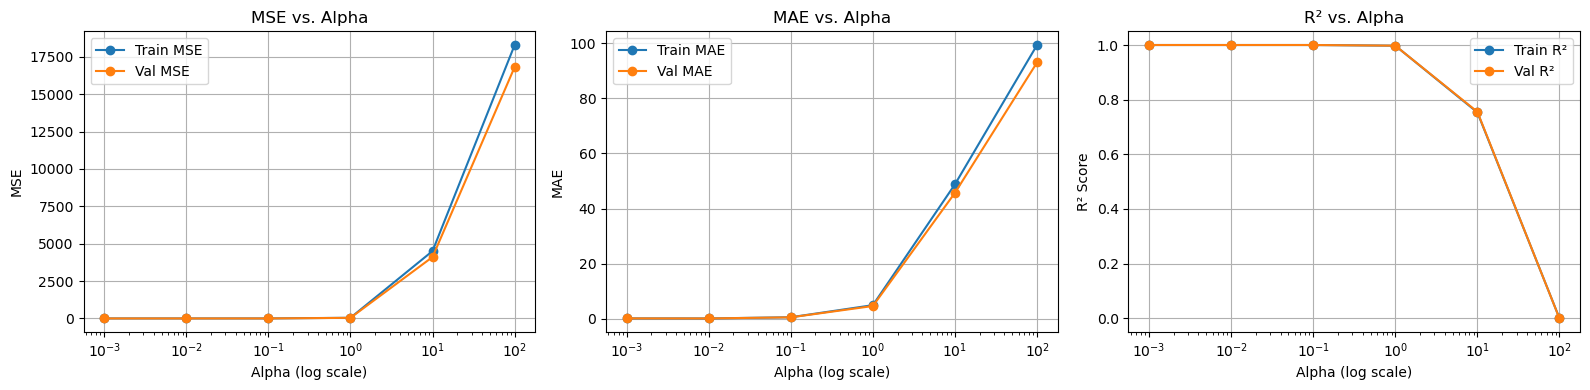

In [292]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

alpha_values = [0.001, 0.01, 0.1, 1, 10, 100]
lasso_models = {}
train_mses, val_mses = [], []
train_r2s, val_r2s = [], []
train_maes, val_maes = [], []
feature_names = X_train_final.columns.tolist()
lasso_coeffs_dfs = {}

print("Alpha\tTrain MSE\tVal MSE\t\tTrain R2\tVal R2\t\tTrain MAE\tVal MAE")

for alpha in alpha_values:
    lasso = Lasso(alpha = alpha, max_iter = 10000)
    lasso.fit(X_train_final, y_train)
    coeffs = lasso.coef_
    df_coeffs = pd.DataFrame({'Feature': feature_names,'Coefficient': coeffs}).sort_values(
        by = 'Coefficient', key = abs, ascending = True).reset_index(drop=True)
    
    lasso_coeffs_dfs[alpha] = df_coeffs
    
    y_train_pred = lasso.predict(X_train_final)
    y_val_pred = lasso.predict(X_val_final)

    train_mse = mean_squared_error(y_train, y_train_pred)
    val_mse = mean_squared_error(y_val, y_val_pred)

    train_r2 = r2_score(y_train, y_train_pred)
    val_r2 = r2_score(y_val, y_val_pred)

    train_mae = mean_absolute_error(y_train, y_train_pred)
    val_mae = mean_absolute_error(y_val, y_val_pred)

    train_mses.append(train_mse)
    val_mses.append(val_mse)
    train_r2s.append(train_r2)
    val_r2s.append(val_r2)
    train_maes.append(train_mae)
    val_maes.append(val_mae)
    
    print(f"{alpha:.3f}\t{train_mse:.6f}\t\t{val_mse:.6f}\t\t{train_r2:.6f}\t\t{val_r2:.6f}\t\t{train_mae:.6f}\t\t{val_mae:.6f}")
    
    lasso_models[alpha] = lasso

##### Plotting #####
plt.figure(figsize=(16, 4))

# Plot MSE
plt.subplot(1, 3, 1)
plt.plot(alpha_values, train_mses, label = 'Train MSE', marker='o')
plt.plot(alpha_values, val_mses, label = 'Val MSE', marker='o')
plt.xscale('log')
plt.xlabel('Alpha (log scale)')
plt.ylabel('MSE')
plt.title('MSE vs. Alpha')
plt.legend()
plt.grid(True)

# Plot MAE
plt.subplot(1, 3, 2)
plt.plot(alpha_values, train_maes, label = 'Train MAE', marker = 'o')
plt.plot(alpha_values, val_maes, label = 'Val MAE', marker = 'o')
plt.xscale('log')
plt.xlabel('Alpha (log scale)')
plt.ylabel('MAE')
plt.title('MAE vs. Alpha')
plt.legend()
plt.grid(True)

# Plot R²
plt.subplot(1, 3, 3)
plt.plot(alpha_values, train_r2s, label = 'Train R²', marker = 'o')
plt.plot(alpha_values, val_r2s, label = 'Val R²', marker = 'o')
plt.xscale('log')
plt.xlabel('Alpha (log scale)')
plt.ylabel('R² Score')
plt.title('R² vs. Alpha')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


#### Interpretation

We have seen so far that:
Every row sums to exactly **1440 minutes**.  

**Correlation between estimated and actual `SLEEP_DUR`: 1**

This confirms that your model can nearly reconstruct `SLEEP_DUR` from other `_DUR` features.  
The **Lasso model** likely exploits this, especially when alpha is low.  
Therefore, **feature leakage** is occurring — we are indirectly giving the model the answer.

---

**Very small alphas (0.001–0.1):** Nearly perfect fit on both training and validation.  
➤ Suggests the model is just memorizing or reconstructing `SLEEP_DUR`, not generalizing.  

**Moderate alpha (1):** Slight drop in performance, but still very high R² (>0.99).  
➤ This still points to overfitting or leakage, just slightly controlled.  

**Higher alphas (10, 100):** Model is underfitting, penalizing coefficients too heavily.  
➤ R² drops drastically, and MAE/MSE increase sharply.

### Model Parameters

In [295]:
coeffs_df = lasso_coeffs_dfs[0.1]
total_features = len(coeffs_df)

non_zero_coeffs = coeffs_df[coeffs_df['Coefficient'] != 0]
zero_coeffs = coeffs_df[coeffs_df['Coefficient'] == 0]

print(f"Total features: {total_features}")
print(f"Non-zero coefficients: {len(non_zero_coeffs)}")
print(f"Zero coefficients: {len(zero_coeffs)}")

print("\n Non-zero Coefficients:")
print(non_zero_coeffs)

print("\n Zero Coefficients (feature names only):")
print(zero_coeffs['Feature'].tolist())


Total features: 89
Non-zero coefficients: 6
Zero coefficients: 83

 Non-zero Coefficients:
       Feature  Coefficient
83     EXE_DUR   -57.113849
84  TRAVEL_DUR   -80.598675
85     INT_DUR   -81.657675
86   OTHER_DUR  -210.001146
87     LEI_DUR  -213.723627
88    WORK_DUR  -233.358246

 Zero Coefficients (feature names only):
['PERSHOU_TRAVEL_DUR', 'HIGHINC_EXE_DUR', 'HIGHINC_TRAVEL_DUR', 'MIDINC_ADULT', 'MIDINC_CHILDREN', 'MIDINC_AGE', 'MIDINC_OTHER_DUR', 'MIDINC_LEI_DUR', 'MIDINC_WORK_DUR', 'HIGHINC_INT_DUR', 'MIDINC_INT_DUR', 'MIDINC_TRAVEL_DUR', 'PERSHOU_ADULT', 'PERSHOU_CHILDREN', 'PERSHOU_AGE', 'PERSHOU_OTHER_DUR', 'PERSHOU_LEI_DUR', 'PERSHOU_WORK_DUR', 'PERSHOU_INT_DUR', 'MIDINC_EXE_DUR', 'HIGHINC_WORK_DUR', 'HIGHINC_LEI_DUR', 'HIGHINC_OTHER_DUR', 'MALE_AGE', 'MALE_OTHER_DUR', 'MALE_LEI_DUR', 'MALE_WORK_DUR', 'MALE_INT_DUR', 'MALE_EXE_DUR', 'MALE_TRAVEL_DUR', 'EMPLOYED_ADULT', 'EMPLOYED_CHILDREN', 'EMPLOYED_AGE', 'EMPLOYED_OTHER_DUR', 'EMPLOYED_LEI_DUR', 'EMPLOYED_WORK_DUR', 'E

These are the non-zero coefficients from a Lasso model, so they represent the features our model found important for predicting `SLEEP_DUR`.

---
At first glance, it looks like the model is discovering useful patterns: work and travel cut into sleep, home-based leisure matters, etc. But in our current modeling setup, this interpretation is **not valid**. These are all `_DUR` columns — they sum to 1440, so the model is just reconstructing sleep as:

`SLEEP_DUR = 1440 − (WORK_DUR + TRAVEL_DUR + ...)`


That’s not learning — it’s solving a **math equation**.

The interaction terms (like `PERSHOU_LEI_DUR`) just scale or adjust those base durations — they still add up to 1440, and thus don’t remove the leakage.

So while they **look interpretable**, they are not **causally meaningful** in our current dataset.

---

This list **does** show you which features the model is "relying" on most to subtract from 1440 — primarily:

**`WORK_DUR`, `LEI_DUR`, `OTHER_DUR`, etc.**

These are the biggest contributors to how much time is *not* sleep. But again — the model is **not learning** real-world relationships, it’s doing **time-budget subtraction**.
Most important predictors are `WORK_DUR`, `LEI_DUR`, `OTHER_DUR` (due to their size).


### Prediction on Test Set

Evaluation on Test Set (alpha = 0.1):
Test MSE : 0.459788
Test MAE : 0.487079
Test R²  : 0.999975


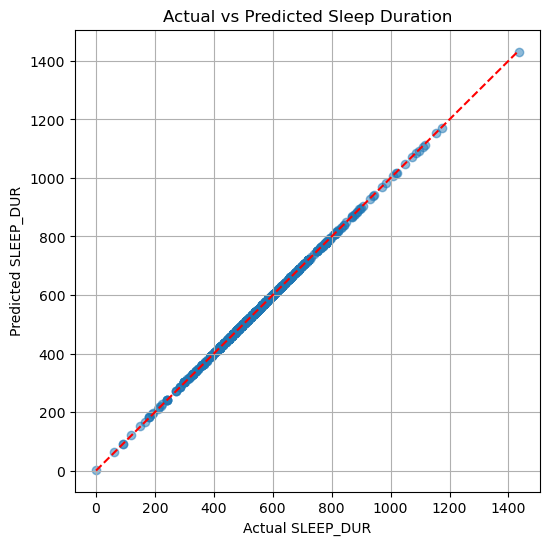

In [298]:
best_model = lasso_models[0.1]

y_test_pred = best_model.predict(X_test_final)

test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Evaluation on Test Set (alpha = 0.1):")
print(f"Test MSE : {test_mse:.6f}")
print(f"Test MAE : {test_mae:.6f}")
print(f"Test R²  : {test_r2:.6f}")

results_df = pd.DataFrame({
    'Actual SLEEP_DUR': y_test.values,
    'Predicted SLEEP_DUR': y_test_pred
})

results_df.head()

plt.figure(figsize = (6, 6))
plt.scatter(y_test, y_test_pred, alpha = 0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual SLEEP_DUR')
plt.ylabel('Predicted SLEEP_DUR')
plt.title('Actual vs Predicted Sleep Duration')
plt.grid(True)
plt.show()

#### Interpretation

**Output:**  
- Test MSE: **0.459788**  
- Test MAE: **0.487079**  
- Test R²: **0.999975**  
- **Scatterplot:** points perfectly aligned along diagonal.

**Interpretation:**  
These numbers are **too good to be true** in a real-world behavioral model.  
The test performance is **indistinguishable from training/validation**, which should not happen without leakage.  
This confirms that `SLEEP_DUR` is being **reconstructed, not predicted**.

**This model is not valid for general use**, because:

- **Feature leakage** is happening due to the inclusion of many `_DUR` columns.  
- Since all rows sum to **1440** and you drop only `SLEEP_DUR`, it can be **reverse-calculated**.  
- Near-perfect R² across train, validation, and test is a **red flag**.  
- Model **doesn’t generalize** — it just does math:  
  `SLEEP_DUR = 1440 - sum(other_durations)`

## Model 2

In [301]:
import numpy as np
import pandas as pd
import warnings

warnings.filterwarnings("ignore", category = pd.errors.PerformanceWarning)

##### Reading Data #####
df_activity = pd.read_csv("D_PER_DAY.csv", header = 0)
df_activity.drop('CASEID', axis = 1, inplace = True)

##### Dropping Features #####
df_activity.drop('EXE_DUR', axis = 1, inplace = True)

df_activity.drop('WORK_DUR', axis = 1, inplace = True)

df_activity.drop('INT_DUR', axis = 1, inplace = True)

df_activity.drop('LEI_DUR', axis = 1, inplace = True)

df_activity.drop('TRAVEL_WORK_DUR', axis = 1, inplace = True)
df_activity.drop('TRAVEL_SOCO_DUR', axis = 1, inplace = True)
df_activity.drop('TRAVEL_ENT_DUR', axis = 1, inplace = True)
df_activity.drop('TRAVEL_EXE_DUR', axis = 1, inplace = True)
df_activity.drop('OTHER_TRAVEL_DUR', axis = 1, inplace = True)

##### Summary of Dataset #####
# Select only columns that end with '_DUR'
duration_cols = [col for col in df_activity.columns if col.endswith('_DUR')]

# Sum across those duration columns for each row
row_durations = df_activity[duration_cols].sum(axis=1)

# Get summary statistics
Summary = row_durations.describe()

# Print the result
print("Summary of Total Duration Columns per Row:")
print(Summary)

##### Checking the Interdependency between the Features #####
rank = np.linalg.matrix_rank(df_activity.values)
num_features = df_activity.values.shape[1]

print("Rank of the DataFrame:", rank)
print("Number of features (columns):", num_features)

##### One-hot Encoding #####
# Whether it is a weekday or not #
df_activity['WEEKD'] = np.where(df_activity['DIARYDAY'].isin([1,7]), 0, 1)

# Education level (low, mid, hight) #
df_activity['MIDEDU'] = np.where(df_activity['EDU'].isin([40,41,42]), 1, 0)
df_activity['HIGHEDU'] = np.where(df_activity['EDU'].isin([43,44,45,46]), 1, 0)

# Whether lives in a stationary house or not #
df_activity['PERSHOU'] = np.where(df_activity['HOUSE'] == 1, 1, 0)

# Income level (low, mid, high) #
df_activity['MIDINC'] = np.where(df_activity['INC'].isin([9,10,11,12,13]), 1, 0)
df_activity['HIGHINC'] = np.where(df_activity['INC'].isin([14,15,16]), 1, 0)

# Whether at work or not #
df_activity['EMPLOYED'] = np.where(df_activity['EMP_STAT'] == 1, 1, 0)

# Whether male or not #
df_activity['MALE'] = np.where(df_activity['SEX'] == 1, 1, 0)

# Dropping previous columns #
cols_to_drop = ['DIARYDAY', 'EDU', 'HOUSE', 'INC', 'EMP_STAT', 'SEX']
df_activity.drop(columns = cols_to_drop, inplace = True)


##### Moving Target Column to the End of the Dataset #####
cols = [col for col in df_activity.columns if col != 'SLEEP_DUR'] + ['SLEEP_DUR']
df_activity = df_activity[cols]

print(df_activity.columns.tolist())

df_activity.head(10)

Summary of Total Duration Columns per Row:
count    8548.0
mean     1440.0
std         0.0
min      1440.0
25%      1440.0
50%      1440.0
75%      1440.0
max      1440.0
dtype: float64
Rank of the DataFrame: 20
Number of features (columns): 20
['TRAVEL_DUR', 'ALONE_EXE_DUR', 'GROUP_EXE_DUR', 'ALONE_INT_DUR', 'GROUP_INT_DUR', 'ALONE_WORK_DUR', 'GROUP_WORK_DUR', 'ALONE_LEI_DUR', 'GROUP_LEI_DUR', 'OTHER_DUR', 'AGE', 'CHILDREN', 'ADULT', 'WEEKD', 'MIDEDU', 'HIGHEDU', 'PERSHOU', 'MIDINC', 'HIGHINC', 'EMPLOYED', 'MALE', 'SLEEP_DUR']


TRAVEL_DUR  ALONE_EXE_DUR  GROUP_EXE_DUR  ALONE_INT_DUR  GROUP_INT_DUR  \
0         120              0            120              0            150   
1           0              0              0              0              0   
2           0             50              0            120              0   
3           0              0              0              0              0   
4          20              0              0              0              0   
5           0             20              0            295             30   
6         130              0              0              0              0   
7          80              0              0              0              0   
8           0              0              0              0              0   
9         145              0              0              0             30   

   ALONE_WORK_DUR  GROUP_WORK_DUR  ALONE_LEI_DUR  GROUP_LEI_DUR  OTHER_DUR  \
0               0               0            300              0        185   
1               0               0            520              0        340   
2               0               0            705              0        130   
3               0               0            420            405        195   
4             120             350              0              0        360   
5               0               0            105            290        130   
6               0               0              0            185        660   
7               0             270             78            124        288   
8             420               0            120              0        385   
9             225             315              0              0        185   

   ...  ADULT  WEEKD  MIDEDU  HIGHEDU  PERSHOU  MIDINC  HIGHINC  EMPLOYED  \
0  ...      1      1       0        0        1       0        0         1   
1  ...      1      0       0        1        1       1        0         0   
2  ...      1      0       1        0        1       0        0         0   
3  ...      2      0       1        0        1       0        1         0   
4  ...      2      1       0        1        1       0        1         1   
5  ...      2      1       0        1        1       0        1         1   
6  ...      2      0       0        0        1       1        0         1   
7  ...      3      0       0        0        1       1        0         1   
8  ...      1      1       0        1        1       0        1         1   
9  ...      1      1       1        0        1       1        0         1   

   MALE  SLEEP_DUR  
0     1        565  
1     0        580  
2     0        435  
3     1        420  
4     1        590  
5     0        570  
6     0        465  
7     0        600  
8     1        515  
9     1        540  

[10 rows x 22 columns]

### Potential Data Leakage
Taking a look at the summary of our dataset (Considering only those columns related to activity duration), we can see that:

- **count** → There are 8,548 diary entries (rows).  
- **mean** → The average total duration per row is 1440 minutes.  
- **std** → The standard deviation is 0 — no variation at all.  
- **min** → The smallest total duration reported is 1440.  
- **25%** → First quartile is 1440.  
- **50%** → Median is 1440.  
- **75%** → Third quartile is 1440.  
- **max** → The largest total duration reported is 1440.

So, every single row in our dataset reports a complete 24-hour day: 

`sum of all *_DUR columns = 1440 minutes`.

This confirms that if we leave all or most `_DUR` columns in the model except `SLEEP_DUR`, the model can easily infer `SLEEP_DUR` as:

`SLEEP_DUR = 1440 - sum(other _DUR columns)`

---

#### Checking Data Leakage
The following code is used to **test for potential data leakage** when building a model to predict `SLEEP_DUR`. It does so by checking whether the sleep duration can be inferred almost exactly from the other activity columns.

| Correlation Value | Interpretation |
|-------------------|----------------|
| ≈ 1.0             | Very strong linear relationship. `SLEEP_DUR` can almost be perfectly reconstructed from the other features — indicating data leakage. The model can cheat. |
| ≈ 0.7 - 0.9       | Moderate to strong linear dependence. Model may still be unintentionally learning `SLEEP_DUR` by subtraction. |
| ≈ 0.5 or lower    | Weak correlation. Likely that the model cannot directly infer `SLEEP_DUR` from remaining features. Safer for training. |


If the correlation is very high, our dataset allows the model to indirectly "solve" for `SLEEP_DUR` by subtracting all other known time segments from 1440. This would result in artificially high performance during model evaluation — but poor generalization in real-world scenarios.

High correlation indicates feature leakage, and your model might not be truly learning the underlying behavior, just the remaining time in the day.

In [303]:
# Identify only _DUR columns except SLEEP_DUR
dur_cols = [col for col in df_activity.columns if col.endswith('_DUR') and col != 'SLEEP_DUR']

# Check for potential leakage
df_activity["NON_SLEEP_TOTAL"] = df_activity[dur_cols].sum(axis=1)
df_activity["ESTIMATED_SLEEP"] = 1440 - df_activity["NON_SLEEP_TOTAL"]

# Correlation between estimated and actual sleep
correlation = df_activity["ESTIMATED_SLEEP"].corr(df_activity["SLEEP_DUR"])
print("Correlation with true SLEEP_DUR:", correlation)

Correlation with true SLEEP_DUR: 1.0


### Potential Data Leakage
The correlation is very high and our model probably will cheat and gives us a very high performance as we can see in the following sections.

### Preprocessing

In [306]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


X = df_activity.loc[:, "TRAVEL_DUR":"MALE"]
y = df_activity["SLEEP_DUR"]

dummy_cols = ['WEEKD', 'MIDEDU', 'HIGHEDU', 'PERSHOU', 'MIDINC', 'HIGHINC', 'EMPLOYED', 'MALE']
numeric_cols = [col for col in X.columns if col not in dummy_cols]

##### Spliting Data #####
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size = 0.3, random_state = 42
)

X_test, X_val, y_test, y_val = train_test_split(
    X_temp, y_temp, test_size = 0.5, random_state = 42
)

##### Scaling the Data Values #####
scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train[numeric_cols]), 
                              columns = numeric_cols, index = X_train.index)
X_val_scaled = pd.DataFrame(scaler.transform(X_val[numeric_cols]), 
                            columns = numeric_cols, index = X_val.index)
X_test_scaled = pd.DataFrame(scaler.transform(X_test[numeric_cols]), 
                             columns = numeric_cols, index = X_test.index)

# Recombining Numerical and Dummy Columns
X_train_final = pd.concat([X_train_scaled, X_train[dummy_cols]], axis = 1)
X_val_final = pd.concat([X_val_scaled, X_val[dummy_cols]], axis = 1)
X_test_final = pd.concat([X_test_scaled, X_test[dummy_cols]], axis = 1)

##### Slope Interactions #####
for dummy in dummy_cols:
    for numeric in numeric_cols:
        interaction_term = f"{dummy}_{numeric}"
        X_train_final[interaction_term] = X_train_final[dummy] * X_train_final[numeric]
        X_val_final[interaction_term] = X_val_final[dummy] * X_val_final[numeric]
        X_test_final[interaction_term] = X_test_final[dummy] * X_test_final[numeric]


X_val_final.head()


TRAVEL_DUR  ALONE_EXE_DUR  GROUP_EXE_DUR  ALONE_INT_DUR  GROUP_INT_DUR  \
1578    0.733789      -0.345895      -0.267896      -0.321284       1.839494   
5282    1.264644       0.936953      -0.267896      -0.321284      -0.212990   
2905   -0.500758      -0.345895      -0.267896      -0.321284      -0.212990   
7111   -0.747668      -0.345895      -0.267896      -0.321284      -0.212990   
7126   -0.130394      -0.345895      -0.267896       3.589981      -0.212990   

      ALONE_WORK_DUR  GROUP_WORK_DUR  ALONE_LEI_DUR  GROUP_LEI_DUR  OTHER_DUR  \
1578       -0.378701       -0.445614      -0.711635       0.573222   0.479317   
5282       -0.378701        1.861014      -0.560437      -0.246606  -0.885350   
2905       -0.378701       -0.445614       0.875943      -0.832198   0.597778   
7111       -0.378701       -0.123759       2.110725      -0.832198  -1.179133   
7126       -0.378701       -0.445614       0.497948      -0.832198   0.337164   

      ...  MALE_ALONE_INT_DUR  MALE_GROUP_INT_DUR  MALE_ALONE_WORK_DUR  \
1578  ...           -0.000000             0.00000            -0.000000   
5282  ...           -0.000000            -0.00000            -0.000000   
2905  ...           -0.321284            -0.21299            -0.378701   
7111  ...           -0.321284            -0.21299            -0.378701   
7126  ...            0.000000            -0.00000            -0.000000   

      MALE_GROUP_WORK_DUR  MALE_ALONE_LEI_DUR  MALE_GROUP_LEI_DUR  \
1578            -0.000000           -0.000000            0.000000   
5282             0.000000           -0.000000           -0.000000   
2905            -0.445614            0.875943           -0.832198   
7111            -0.123759            2.110725           -0.832198   
7126            -0.000000            0.000000           -0.000000   

      MALE_OTHER_DUR  MALE_AGE  MALE_CHILDREN  MALE_ADULT  
1578        0.000000 -0.000000       0.000000    0.000000  
5282       -0.000000 -0.000000      -0.000000   -0.000000  
2905        0.597778  1.420686      -0.529119   -1.116979  
7111       -1.179133 -0.520536       1.572253    0.139202  
7126        0.000000 -0.000000      -0.000000   -0.000000  

[5 rows x 125 columns]

### Linear Regression with Lasso

Alpha	Train MSE	Val MSE		Train R2	Val R2		Train MAE	Val MAE
0.001	0.154260		0.182113		0.999992		0.999989		0.091683		0.099648
0.010	0.010248		0.009693		0.999999		0.999999		0.071567		0.068054
0.100	0.852636		0.775276		0.999953		0.999954		0.671346		0.628072
1.000	85.271886		77.534776		0.995339		0.995388		6.713778		6.280994
10.000	8525.781625		7752.202484		0.534007		0.538872		67.132211		62.804775
100.000	18295.953961		16821.294068		0.000000		-0.000589		99.405985		93.057338


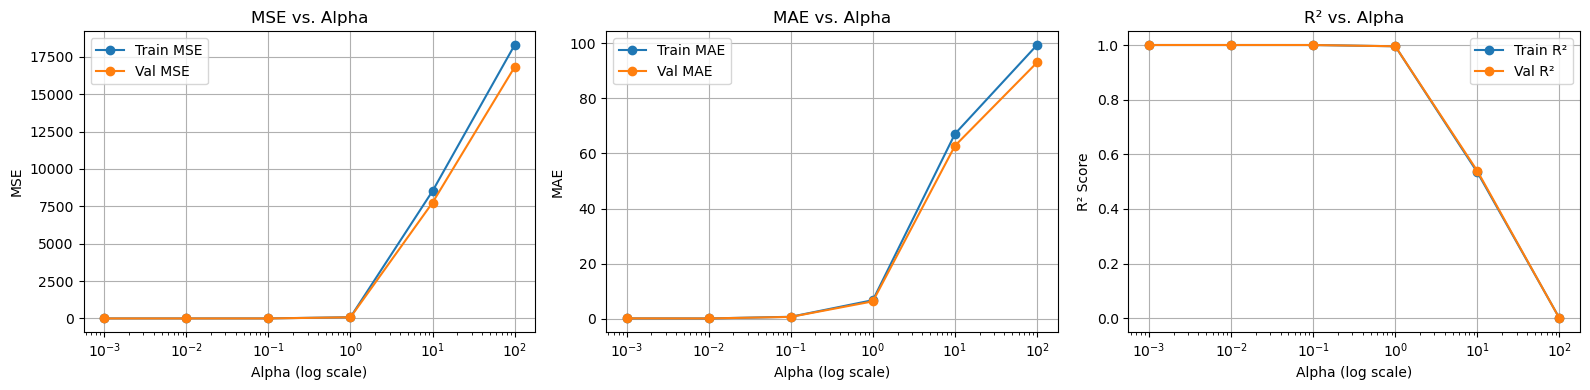

In [308]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

alpha_values = [0.001, 0.01, 0.1, 1, 10, 100]
lasso_models = {}
train_mses, val_mses = [], []
train_r2s, val_r2s = [], []
train_maes, val_maes = [], []
feature_names = X_train_final.columns.tolist()
lasso_coeffs_dfs = {}

print("Alpha\tTrain MSE\tVal MSE\t\tTrain R2\tVal R2\t\tTrain MAE\tVal MAE")

for alpha in alpha_values:
    lasso = Lasso(alpha = alpha, max_iter = 10000)
    lasso.fit(X_train_final, y_train)
    coeffs = lasso.coef_
    df_coeffs = pd.DataFrame({'Feature': feature_names,'Coefficient': coeffs}).sort_values(
        by = 'Coefficient', key = abs, ascending = True).reset_index(drop=True)
    
    lasso_coeffs_dfs[alpha] = df_coeffs
    
    y_train_pred = lasso.predict(X_train_final)
    y_val_pred = lasso.predict(X_val_final)

    train_mse = mean_squared_error(y_train, y_train_pred)
    val_mse = mean_squared_error(y_val, y_val_pred)

    train_r2 = r2_score(y_train, y_train_pred)
    val_r2 = r2_score(y_val, y_val_pred)

    train_mae = mean_absolute_error(y_train, y_train_pred)
    val_mae = mean_absolute_error(y_val, y_val_pred)

    train_mses.append(train_mse)
    val_mses.append(val_mse)
    train_r2s.append(train_r2)
    val_r2s.append(val_r2)
    train_maes.append(train_mae)
    val_maes.append(val_mae)
    
    print(f"{alpha:.3f}\t{train_mse:.6f}\t\t{val_mse:.6f}\t\t{train_r2:.6f}\t\t{val_r2:.6f}\t\t{train_mae:.6f}\t\t{val_mae:.6f}")
    
    lasso_models[alpha] = lasso

##### Plotting #####
plt.figure(figsize=(16, 4))

# Plot MSE
plt.subplot(1, 3, 1)
plt.plot(alpha_values, train_mses, label = 'Train MSE', marker='o')
plt.plot(alpha_values, val_mses, label = 'Val MSE', marker='o')
plt.xscale('log')
plt.xlabel('Alpha (log scale)')
plt.ylabel('MSE')
plt.title('MSE vs. Alpha')
plt.legend()
plt.grid(True)

# Plot MAE
plt.subplot(1, 3, 2)
plt.plot(alpha_values, train_maes, label = 'Train MAE', marker = 'o')
plt.plot(alpha_values, val_maes, label = 'Val MAE', marker = 'o')
plt.xscale('log')
plt.xlabel('Alpha (log scale)')
plt.ylabel('MAE')
plt.title('MAE vs. Alpha')
plt.legend()
plt.grid(True)

# Plot R²
plt.subplot(1, 3, 3)
plt.plot(alpha_values, train_r2s, label = 'Train R²', marker = 'o')
plt.plot(alpha_values, val_r2s, label = 'Val R²', marker = 'o')
plt.xscale('log')
plt.xlabel('Alpha (log scale)')
plt.ylabel('R² Score')
plt.title('R² vs. Alpha')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


#### Interpretation

We have seen so far that:
Every row sums to exactly **1440 minutes**.  

**Correlation between estimated and actual `SLEEP_DUR`: 1**

This confirms that your model can nearly reconstruct `SLEEP_DUR` from other `_DUR` features.  
The **Lasso model** likely exploits this, especially when alpha is low.  
Therefore, **feature leakage** is occurring — we are indirectly giving the model the answer.

---

**Very small alphas (0.001–0.1):** Nearly perfect fit on both training and validation.  
➤ Suggests the model is just memorizing or reconstructing `SLEEP_DUR`, not generalizing.  

**Moderate alpha (1):** Slight drop in performance, but still very high R² (>0.99).  
➤ This still points to overfitting or leakage, just slightly controlled.  

**Higher alphas (10, 100):** Model is underfitting, penalizing coefficients too heavily.  
➤ R² drops drastically, and MAE/MSE increase sharply.

##### Compared to Model 1

| Feature               | First Model                           | Second Model                                      |
|-----------------------|----------------------------------------|--------------------------------------------------|
| Feature design        | Aggregate duration columns only        | Split into detailed components (e.g., `ALONE_` vs `GROUP_`) |
| Leakage present?      | Very likely                            | Still present (though slightly diluted)       |
| Best alpha            | 0.01 or 0.1                            | 0.01 or 0.1                                      |
| Overfitting signs?    | Strong (ultra-low errors, high R²)     | Still strong, but slightly reduced            |

---

**At alpha = 0.1 (best overall performance):**

| Metric      | First Model | Second Model | Notes                                                 |
|-------------|-------------|--------------|--------------------------------------------------------|
| Train MSE   | 0.451335      | 0.852636       | Extremely low in both; no generalization problem visible |
| Val MSE     | 0.411421      | 0.775276       | Also low; suggests both models are nearly memorizing  |
| Train R²    | 0.999975    | 0.999953     | Too good to be true — overfitting evident             |
| Val R²      | 0.999976    | 0.999954     | Same — nearly perfect                                 |
| Train MAE   | 0.488171         | 0.671346          | Very small absolute error — again suggests leakage    |
| Val MAE     | 0.457161      | 0.628072       | Extremely low; supports the idea the models are reconstructing, not predicting |

---

##### MSE vs. Alpha
- **Model 1:** MSE explodes after alpha = 1, showing it relies heavily on many features.
- **Model 2:** Similar trend, but slightly worse MSE overall — maybe due to higher dimensionality (more subcomponents).
- Both models suffer under too much regularization (high alpha).

---

##### MAE vs. Alpha

- MAE trends are very close between the models.
- The model 2 shows slightly higher MAE at each alpha → probably because individual subcomponents add noise, the model struggles to regularize cleanly.

---

##### R² vs. Alpha

- **Model 1:** R² stays at 1.0 across small alphas, drops after alpha = 1.
- **Model 2:** Similar pattern, slightly lower R² at each step → again, possibly because splitting features reduces the model's ability to "cheat" as directly.

---

##### Interpretation of Differences

**Improvements in the Second Model:**

- Splitting into `ALONE_` and `GROUP_` versions slightly weakens the direct reconstruction power, since:
  - The model must now combine more pieces to "guess" `SLEEP_DUR`.
  - This adds a small layer of noise and complexity.
- R² and MAE are slightly worse than in the first model — that’s actually a *good thing* since we're fighting overfitting.

**But:**

- The model 2 **still shows leakage**.
- The performance is still *too perfect* — meaning the model still exploits the fact that all durations sum to 1440.

---

##### Final Takeaway

| Aspect            | Verdict                                                                 |
|-------------------|-------------------------------------------------------------------------|
| Which is better?  | Second model is slightly better — it has less leakage power and more granularity. |
| Is either usable? | No — both are overfit due to leakage.                                |

### Model Parameters

In [311]:
coeffs_df = lasso_coeffs_dfs[0.1]
total_features = len(coeffs_df)

non_zero_coeffs = coeffs_df[coeffs_df['Coefficient'] != 0]
zero_coeffs = coeffs_df[coeffs_df['Coefficient'] == 0]

print(f"Total features: {total_features}")
print(f"Non-zero coefficients: {len(non_zero_coeffs)}")
print(f"Zero coefficients: {len(zero_coeffs)}")

print("\n Non-zero Coefficients:")
print(non_zero_coeffs)

print("\n Zero Coefficients (feature names only):")
print(zero_coeffs['Feature'].tolist())


Total features: 125
Non-zero coefficients: 10
Zero coefficients: 115

 Non-zero Coefficients:
            Feature  Coefficient
115   ALONE_EXE_DUR   -34.765767
116   GROUP_INT_DUR   -43.472370
117   GROUP_EXE_DUR   -45.742160
118   ALONE_INT_DUR   -68.468732
119      TRAVEL_DUR   -80.483664
120  ALONE_WORK_DUR  -162.951492
121   GROUP_LEI_DUR  -169.516801
122  GROUP_WORK_DUR  -185.219852
123   ALONE_LEI_DUR  -196.987310
124       OTHER_DUR  -209.636276

 Zero Coefficients (feature names only):
['PERSHOU_GROUP_EXE_DUR', 'HIGHINC_GROUP_INT_DUR', 'HIGHINC_ALONE_INT_DUR', 'HIGHINC_GROUP_EXE_DUR', 'HIGHINC_ALONE_EXE_DUR', 'HIGHINC_TRAVEL_DUR', 'MIDINC_ADULT', 'MIDINC_CHILDREN', 'MIDINC_AGE', 'MIDINC_OTHER_DUR', 'MIDINC_GROUP_LEI_DUR', 'MIDINC_ALONE_LEI_DUR', 'MIDINC_GROUP_WORK_DUR', 'MIDINC_ALONE_WORK_DUR', 'MIDINC_GROUP_INT_DUR', 'MIDINC_ALONE_INT_DUR', 'MIDINC_GROUP_EXE_DUR', 'MIDINC_ALONE_EXE_DUR', 'MIDINC_TRAVEL_DUR', 'PERSHOU_ADULT', 'PERSHOU_CHILDREN', 'PERSHOU_AGE', 'PERSHOU_OTHER_DU

Again we face the same issue. All these features are **duration-based**, and together with `SLEEP_DUR`, they sum to **1440 minutes**. Even though we disaggregated them into subcomponents (e.g., `ALONE_`, `GROUP_`, `PERSHOU_`, etc.), we still fully cover the **time budget**.
That means the model can still mathematically reconstruct `SLEEP_DUR`:

`SLEEP_DUR = 1440 − (All Other Durations)`

So **Lasso isn't finding relationships** — it's solving an **equation**.

### Prediction on Test Set

Evaluation on Test Set (alpha = 0.1):
Test MSE : 0.868664
Test MAE : 0.670249
Test R²  : 0.999952


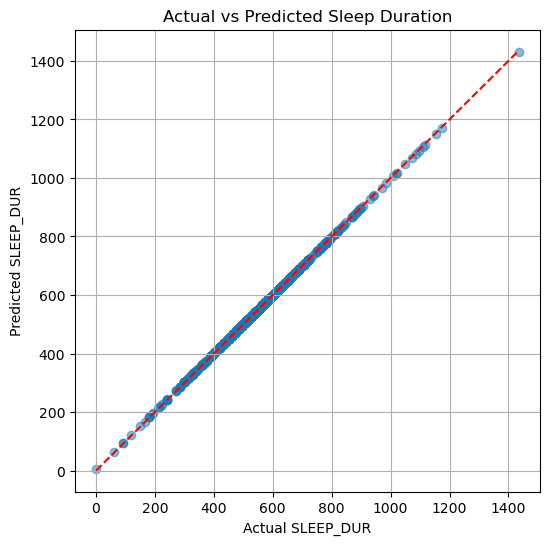

In [314]:
best_model = lasso_models[0.1]

y_test_pred = best_model.predict(X_test_final)

test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Evaluation on Test Set (alpha = 0.1):")
print(f"Test MSE : {test_mse:.6f}")
print(f"Test MAE : {test_mae:.6f}")
print(f"Test R²  : {test_r2:.6f}")

results_df = pd.DataFrame({
    'Actual SLEEP_DUR': y_test.values,
    'Predicted SLEEP_DUR': y_test_pred
})

results_df.head()

plt.figure(figsize = (6, 6))
plt.scatter(y_test, y_test_pred, alpha = 0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual SLEEP_DUR')
plt.ylabel('Predicted SLEEP_DUR')
plt.title('Actual vs Predicted Sleep Duration')
plt.grid(True)
plt.show()

#### Comapred to Model 1

| Metric       | Model 1        | Model 2                                 |
|--------------|----------------|------------------------------------------|
| **Test MSE** | 0.459788       | 0.868664                                 |
| **Test MAE** | 0.487079       | 0.670249                                 |
| **Test R²**  | 0.999975       | 0.999952                                 |
| **Fit Line** | Perfect diagonal | Perfect diagonal (slightly more spread) |
| **Visual Fit** | Points perfectly aligned | Points tightly aligned, slightly more dispersed |


---
##### Model 1

- **Performance Metrics:** Almost perfect — near-zero errors and perfect R².  
- **Plot Observation:** Points sit *exactly* on the diagonal. This is too good to be true in a real-world scenario.  
- **Conclusion:** Strong evidence of **data leakage**. The model is likely reconstructing `SLEEP_DUR` from other `_DUR` features due to the 1440-minute constraint.

---

##### Model 2

- **Performance Metrics:** Slightly worse (but still extremely good) — marginally higher MSE and MAE.  
- **Plot Observation:** Points still very close to diagonal, but with slightly more scatter than Model 1.  
- **Conclusion:** Leakage is still present, but likely **diluted** due to splitting features into subcomponents (`ALONE_`, `GROUP_`, etc.). The model has a harder time cheating directly but still reconstructs `SLEEP_DUR`.


## Model 3

In [317]:
import numpy as np
import pandas as pd
import warnings

warnings.filterwarnings("ignore", category = pd.errors.PerformanceWarning)

##### Reading Data #####
df_activity = pd.read_csv("D_PER_DAY.csv", header = 0)
df_activity.drop('CASEID', axis = 1, inplace = True)

##### Dropping Features #####
df_activity.drop('EXE_DUR', axis = 1, inplace = True)

df_activity.drop('WORK_DUR', axis = 1, inplace = True)

df_activity.drop('INT_DUR', axis = 1, inplace = True)

df_activity.drop('LEI_DUR', axis = 1, inplace = True)

df_activity.drop('TRAVEL_DUR', axis = 1, inplace = True)

##### Summary of Dataset #####
# Select only columns that end with '_DUR'
duration_cols = [col for col in df_activity.columns if col.endswith('_DUR')]

# Sum across those duration columns for each row
row_durations = df_activity[duration_cols].sum(axis=1)

# Get summary statistics
Summary = row_durations.describe()

# Print the result
print("Summary of Total Duration Columns per Row:")
print(Summary)

##### Checking the Interdependency between the Features #####
rank = np.linalg.matrix_rank(df_activity.values)
num_features = df_activity.values.shape[1]

print("Rank of the DataFrame:", rank)
print("Number of features (columns):", num_features)

##### One-hot Encoding #####
# Whether it is a weekday or not #
df_activity['WEEKD'] = np.where(df_activity['DIARYDAY'].isin([1,7]), 0, 1)

# Education level (low, mid, hight) #
df_activity['MIDEDU'] = np.where(df_activity['EDU'].isin([40,41,42]), 1, 0)
df_activity['HIGHEDU'] = np.where(df_activity['EDU'].isin([43,44,45,46]), 1, 0)

# Whether lives in a stationary house or not #
df_activity['PERSHOU'] = np.where(df_activity['HOUSE'] == 1, 1, 0)

# Income level (low, mid, high) #
df_activity['MIDINC'] = np.where(df_activity['INC'].isin([9,10,11,12,13]), 1, 0)
df_activity['HIGHINC'] = np.where(df_activity['INC'].isin([14,15,16]), 1, 0)

# Whether at work or not #
df_activity['EMPLOYED'] = np.where(df_activity['EMP_STAT'] == 1, 1, 0)

# Whether male or not #
df_activity['MALE'] = np.where(df_activity['SEX'] == 1, 1, 0)

# Dropping previous columns #
cols_to_drop = ['DIARYDAY', 'EDU', 'HOUSE', 'INC', 'EMP_STAT', 'SEX']
df_activity.drop(columns = cols_to_drop, inplace = True)


##### Moving Target Column to the End of the Dataset #####
cols = [col for col in df_activity.columns if col != 'SLEEP_DUR'] + ['SLEEP_DUR']
df_activity = df_activity[cols]

print(df_activity.columns.tolist())

df_activity.head(10)

Summary of Total Duration Columns per Row:
count    8548.0
mean     1440.0
std         0.0
min      1440.0
25%      1440.0
50%      1440.0
75%      1440.0
max      1440.0
dtype: float64
Rank of the DataFrame: 24
Number of features (columns): 24
['TRAVEL_WORK_DUR', 'TRAVEL_SOCO_DUR', 'TRAVEL_ENT_DUR', 'TRAVEL_EXE_DUR', 'OTHER_TRAVEL_DUR', 'ALONE_EXE_DUR', 'GROUP_EXE_DUR', 'ALONE_INT_DUR', 'GROUP_INT_DUR', 'ALONE_WORK_DUR', 'GROUP_WORK_DUR', 'ALONE_LEI_DUR', 'GROUP_LEI_DUR', 'OTHER_DUR', 'AGE', 'CHILDREN', 'ADULT', 'WEEKD', 'MIDEDU', 'HIGHEDU', 'PERSHOU', 'MIDINC', 'HIGHINC', 'EMPLOYED', 'MALE', 'SLEEP_DUR']


TRAVEL_WORK_DUR  TRAVEL_SOCO_DUR  TRAVEL_ENT_DUR  TRAVEL_EXE_DUR  \
0                0                0               0              40   
1                0                0               0               0   
2                0                0               0               0   
3                0                0               0               0   
4               20                0               0               0   
5                0                0               0               0   
6                0                0               0               0   
7               37                0               0               8   
8                0                0               0               0   
9               60                0               0               0   

   OTHER_TRAVEL_DUR  ALONE_EXE_DUR  GROUP_EXE_DUR  ALONE_INT_DUR  \
0                80              0            120              0   
1                 0              0              0              0   
2                 0             50              0            120   
3                 0              0              0              0   
4                 0              0              0              0   
5                 0             20              0            295   
6               130              0              0              0   
7                35              0              0              0   
8                 0              0              0              0   
9                85              0              0              0   

   GROUP_INT_DUR  ALONE_WORK_DUR  ...  ADULT  WEEKD  MIDEDU  HIGHEDU  PERSHOU  \
0            150               0  ...      1      1       0        0        1   
1              0               0  ...      1      0       0        1        1   
2              0               0  ...      1      0       1        0        1   
3              0               0  ...      2      0       1        0        1   
4              0             120  ...      2      1       0        1        1   
5             30               0  ...      2      1       0        1        1   
6              0               0  ...      2      0       0        0        1   
7              0               0  ...      3      0       0        0        1   
8              0             420  ...      1      1       0        1        1   
9             30             225  ...      1      1       1        0        1   

   MIDINC  HIGHINC  EMPLOYED  MALE  SLEEP_DUR  
0       0        0         1     1        565  
1       1        0         0     0        580  
2       0        0         0     0        435  
3       0        1         0     1        420  
4       0        1         1     1        590  
5       0        1         1     0        570  
6       1        0         1     0        465  
7       1        0         1     0        600  
8       0        1         1     1        515  
9       1        0         1     1        540  

[10 rows x 26 columns]

### Potential Data Leakage
Taking a look at the summary of our dataset (Considering only those columns related to activity duration), we can see that:

- **count** → There are 8,548 diary entries (rows).  
- **mean** → The average total duration per row is 1440 minutes.  
- **std** → The standard deviation is 0 — no variation at all.  
- **min** → The smallest total duration reported is 1440.  
- **25%** → First quartile is 1440.  
- **50%** → Median is 1440.  
- **75%** → Third quartile is 1440.  
- **max** → The largest total duration reported is 1440.

So, every single row in our dataset reports a complete 24-hour day: 

`sum of all *_DUR columns = 1440 minutes`.

This confirms that if we leave all or most `_DUR` columns in the model except `SLEEP_DUR`, the model can easily infer `SLEEP_DUR` as:

`SLEEP_DUR = 1440 - sum(other _DUR columns)`

---

#### Checking Data Leakage
The following code is used to **test for potential data leakage** when building a model to predict `SLEEP_DUR`. It does so by checking whether the sleep duration can be inferred almost exactly from the other activity columns.

| Correlation Value | Interpretation |
|-------------------|----------------|
| ≈ 1.0             | Very strong linear relationship. `SLEEP_DUR` can almost be perfectly reconstructed from the other features — indicating data leakage. The model can cheat. |
| ≈ 0.7 - 0.9       | Moderate to strong linear dependence. Model may still be unintentionally learning `SLEEP_DUR` by subtraction. |
| ≈ 0.5 or lower    | Weak correlation. Likely that the model cannot directly infer `SLEEP_DUR` from remaining features. Safer for training. |


If the correlation is very high, our dataset allows the model to indirectly "solve" for `SLEEP_DUR` by subtracting all other known time segments from 1440. This would result in artificially high performance during model evaluation — but poor generalization in real-world scenarios.

High correlation indicates feature leakage, and your model might not be truly learning the underlying behavior, just the remaining time in the day.

In [319]:
# Identify only _DUR columns except SLEEP_DUR
dur_cols = [col for col in df_activity.columns if col.endswith('_DUR') and col != 'SLEEP_DUR']

# Check for potential leakage
df_activity["NON_SLEEP_TOTAL"] = df_activity[dur_cols].sum(axis=1)
df_activity["ESTIMATED_SLEEP"] = 1440 - df_activity["NON_SLEEP_TOTAL"]

# Correlation between estimated and actual sleep
correlation = df_activity["ESTIMATED_SLEEP"].corr(df_activity["SLEEP_DUR"])
print("Correlation with true SLEEP_DUR:", correlation)

Correlation with true SLEEP_DUR: 1.0


### Potential Data Leakage
The correlation is very high and our model probably will cheat and gives us a very high performance as we can see in the following sections.

### Preprocessing

In [322]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


X = df_activity.loc[:, "TRAVEL_WORK_DUR":"MALE"]
y = df_activity["SLEEP_DUR"]

dummy_cols = ['WEEKD', 'MIDEDU', 'HIGHEDU', 'PERSHOU', 'MIDINC', 'HIGHINC', 'EMPLOYED', 'MALE']
numeric_cols = [col for col in X.columns if col not in dummy_cols]

##### Spliting Data #####
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size = 0.3, random_state = 42
)

X_test, X_val, y_test, y_val = train_test_split(
    X_temp, y_temp, test_size = 0.5, random_state = 42
)

##### Scaling the Data Values #####
scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train[numeric_cols]), 
                              columns = numeric_cols, index = X_train.index)
X_val_scaled = pd.DataFrame(scaler.transform(X_val[numeric_cols]), 
                            columns = numeric_cols, index = X_val.index)
X_test_scaled = pd.DataFrame(scaler.transform(X_test[numeric_cols]), 
                             columns = numeric_cols, index = X_test.index)

# Recombining Numerical and Dummy Columns
X_train_final = pd.concat([X_train_scaled, X_train[dummy_cols]], axis = 1)
X_val_final = pd.concat([X_val_scaled, X_val[dummy_cols]], axis = 1)
X_test_final = pd.concat([X_test_scaled, X_test[dummy_cols]], axis = 1)

##### Slope Interactions #####
for dummy in dummy_cols:
    for numeric in numeric_cols:
        interaction_term = f"{dummy}_{numeric}"
        X_train_final[interaction_term] = X_train_final[dummy] * X_train_final[numeric]
        X_val_final[interaction_term] = X_val_final[dummy] * X_val_final[numeric]
        X_test_final[interaction_term] = X_test_final[dummy] * X_test_final[numeric]


X_val_final.head()


TRAVEL_WORK_DUR  TRAVEL_SOCO_DUR  TRAVEL_ENT_DUR  TRAVEL_EXE_DUR  \
1578        -0.366972         2.170122       -0.078258       -0.203892   
5282         1.818458         4.238363       -0.078258        0.230138   
2905        -0.366972        -0.234809       -0.078258       -0.203892   
7111        -0.366972        -0.234809       -0.078258       -0.203892   
7126        -0.366972        -0.234809       -0.078258       -0.203892   

      OTHER_TRAVEL_DUR  ALONE_EXE_DUR  GROUP_EXE_DUR  ALONE_INT_DUR  \
1578          0.377514      -0.345895      -0.267896      -0.321284   
5282         -0.508681       0.936953      -0.267896      -0.321284   
2905         -0.304174      -0.345895      -0.267896      -0.321284   
7111         -0.576850      -0.345895      -0.267896      -0.321284   
7126          0.104838      -0.345895      -0.267896       3.589981   

      GROUP_INT_DUR  ALONE_WORK_DUR  ...  MALE_ALONE_INT_DUR  \
1578       1.839494       -0.378701  ...           -0.000000   
5282      -0.212990       -0.378701  ...           -0.000000   
2905      -0.212990       -0.378701  ...           -0.321284   
7111      -0.212990       -0.378701  ...           -0.321284   
7126      -0.212990       -0.378701  ...            0.000000   

      MALE_GROUP_INT_DUR  MALE_ALONE_WORK_DUR  MALE_GROUP_WORK_DUR  \
1578             0.00000            -0.000000            -0.000000   
5282            -0.00000            -0.000000             0.000000   
2905            -0.21299            -0.378701            -0.445614   
7111            -0.21299            -0.378701            -0.123759   
7126            -0.00000            -0.000000            -0.000000   

      MALE_ALONE_LEI_DUR  MALE_GROUP_LEI_DUR  MALE_OTHER_DUR  MALE_AGE  \
1578           -0.000000            0.000000        0.000000 -0.000000   
5282           -0.000000           -0.000000       -0.000000 -0.000000   
2905            0.875943           -0.832198        0.597778  1.420686   
7111            2.110725           -0.832198       -1.179133 -0.520536   
7126            0.000000           -0.000000        0.000000 -0.000000   

      MALE_CHILDREN  MALE_ADULT  
1578       0.000000    0.000000  
5282      -0.000000   -0.000000  
2905      -0.529119   -1.116979  
7111       1.572253    0.139202  
7126      -0.000000   -0.000000  

[5 rows x 161 columns]

### Linear Regression with Lasso

Alpha	Train MSE	Val MSE		Train R2	Val R2		Train MAE	Val MAE
0.001	0.179444		0.442624		0.999990		0.999974		0.113041		0.139361
0.010	0.013305		0.013143		0.999999		0.999999		0.077196		0.073787
0.100	0.959969		0.878019		0.999948		0.999948		0.712709		0.669256
1.000	95.996407		87.802602		0.994753		0.994777		7.127057		6.692564
10.000	9303.775102		8502.129369		0.491485		0.494264		70.190897		65.915791
100.000	18295.953961		16821.294068		0.000000		-0.000589		99.405985		93.057338


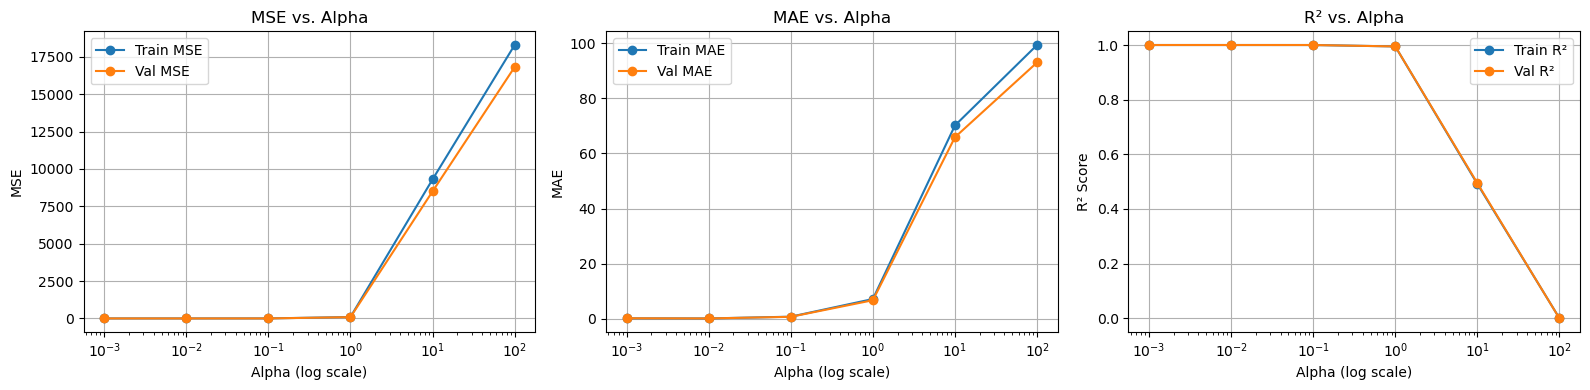

In [324]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

alpha_values = [0.001, 0.01, 0.1, 1, 10, 100]
lasso_models = {}
train_mses, val_mses = [], []
train_r2s, val_r2s = [], []
train_maes, val_maes = [], []
feature_names = X_train_final.columns.tolist()
lasso_coeffs_dfs = {}

print("Alpha\tTrain MSE\tVal MSE\t\tTrain R2\tVal R2\t\tTrain MAE\tVal MAE")

for alpha in alpha_values:
    lasso = Lasso(alpha = alpha, max_iter = 10000)
    lasso.fit(X_train_final, y_train)
    coeffs = lasso.coef_
    df_coeffs = pd.DataFrame({'Feature': feature_names,'Coefficient': coeffs}).sort_values(
        by = 'Coefficient', key = abs, ascending = True).reset_index(drop=True)
    
    lasso_coeffs_dfs[alpha] = df_coeffs
    
    y_train_pred = lasso.predict(X_train_final)
    y_val_pred = lasso.predict(X_val_final)

    train_mse = mean_squared_error(y_train, y_train_pred)
    val_mse = mean_squared_error(y_val, y_val_pred)

    train_r2 = r2_score(y_train, y_train_pred)
    val_r2 = r2_score(y_val, y_val_pred)

    train_mae = mean_absolute_error(y_train, y_train_pred)
    val_mae = mean_absolute_error(y_val, y_val_pred)

    train_mses.append(train_mse)
    val_mses.append(val_mse)
    train_r2s.append(train_r2)
    val_r2s.append(val_r2)
    train_maes.append(train_mae)
    val_maes.append(val_mae)
    
    print(f"{alpha:.3f}\t{train_mse:.6f}\t\t{val_mse:.6f}\t\t{train_r2:.6f}\t\t{val_r2:.6f}\t\t{train_mae:.6f}\t\t{val_mae:.6f}")
    
    lasso_models[alpha] = lasso

##### Plotting #####
plt.figure(figsize=(16, 4))

# Plot MSE
plt.subplot(1, 3, 1)
plt.plot(alpha_values, train_mses, label = 'Train MSE', marker='o')
plt.plot(alpha_values, val_mses, label = 'Val MSE', marker='o')
plt.xscale('log')
plt.xlabel('Alpha (log scale)')
plt.ylabel('MSE')
plt.title('MSE vs. Alpha')
plt.legend()
plt.grid(True)

# Plot MAE
plt.subplot(1, 3, 2)
plt.plot(alpha_values, train_maes, label = 'Train MAE', marker = 'o')
plt.plot(alpha_values, val_maes, label = 'Val MAE', marker = 'o')
plt.xscale('log')
plt.xlabel('Alpha (log scale)')
plt.ylabel('MAE')
plt.title('MAE vs. Alpha')
plt.legend()
plt.grid(True)

# Plot R²
plt.subplot(1, 3, 3)
plt.plot(alpha_values, train_r2s, label = 'Train R²', marker = 'o')
plt.plot(alpha_values, val_r2s, label = 'Val R²', marker = 'o')
plt.xscale('log')
plt.xlabel('Alpha (log scale)')
plt.ylabel('R² Score')
plt.title('R² vs. Alpha')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


#### Interpretation

| Aspect                   | Model 2                    | Model 3                              |
|--------------------------|----------------------------|--------------------------------------|
| **Travel feature**       | `TRAVEL_DUR`               | Detailed travel components           |
| **Train MSE (best α)**   | 0.852636                    | 0.959969                               |
| **Val MSE (best α)**     | 0.775276                     | 0.878019                               |
| **Train R² (best α)**    | 0.999953                   | 0.999948                             |
| **Val R² (best α)**      | 0.999954                   | 0.999948                             |
| **MAE (Val) at best α**  | 0.628072                       | 0.669256                                |
| **Interpretation**       | Less granular travel info  | More detailed behavioral insight     |
| **Risk of leakage**      | Still present              | Still present                      |

---

##### Plot Behavior

Both models show:

- Flat **R² ≈ 1** for small alpha → overfitting / leakage  
- Sharp **R² drop** and **MSE rise** after α > 1 → typical Lasso behavior  
- **Model 3** has slightly higher **MAE** and **MSE** at each step, due to:
  - Increased number of travel-related features  
  - More complexity for Lasso to manage  

---

In overall, it seems that Model 3 is slightly more general than Model 2.

### Model Parameters

In [327]:
coeffs_df = lasso_coeffs_dfs[0.1]
total_features = len(coeffs_df)

non_zero_coeffs = coeffs_df[coeffs_df['Coefficient'] != 0]
zero_coeffs = coeffs_df[coeffs_df['Coefficient'] == 0]

print(f"Total features: {total_features}")
print(f"Non-zero coefficients: {len(non_zero_coeffs)}")
print(f"Zero coefficients: {len(zero_coeffs)}")

print("\n Non-zero Coefficients:")
print(non_zero_coeffs)

print("\n Zero Coefficients (feature names only):")
print(zero_coeffs['Feature'].tolist())


Total features: 161
Non-zero coefficients: 14
Zero coefficients: 147

 Non-zero Coefficients:
              Feature  Coefficient
147    TRAVEL_EXE_DUR   -11.399024
148    TRAVEL_ENT_DUR   -11.882788
149   TRAVEL_SOCO_DUR   -20.577789
150   TRAVEL_WORK_DUR   -27.251205
151     ALONE_EXE_DUR   -34.762069
152     GROUP_INT_DUR   -43.455044
153     GROUP_EXE_DUR   -45.744202
154     ALONE_INT_DUR   -68.443851
155  OTHER_TRAVEL_DUR   -72.825730
156    ALONE_WORK_DUR  -162.901972
157     GROUP_LEI_DUR  -169.471572
158    GROUP_WORK_DUR  -185.168799
159     ALONE_LEI_DUR  -196.916039
160         OTHER_DUR  -209.568508

 Zero Coefficients (feature names only):
['PERSHOU_OTHER_TRAVEL_DUR', 'MIDINC_ALONE_WORK_DUR', 'MIDINC_GROUP_WORK_DUR', 'MIDINC_ALONE_LEI_DUR', 'MIDINC_GROUP_LEI_DUR', 'MIDINC_OTHER_DUR', 'MIDINC_AGE', 'MIDINC_CHILDREN', 'MIDINC_GROUP_INT_DUR', 'MIDINC_ADULT', 'HIGHINC_TRAVEL_SOCO_DUR', 'HIGHINC_TRAVEL_ENT_DUR', 'HIGHINC_TRAVEL_EXE_DUR', 'HIGHINC_OTHER_TRAVEL_DUR', 'HIGHINC_ALO

Once again, the most influential features are continuous features ending with _DUR, even interactions are not as important as non-interaction continuous features. The most influential ones are `OTHER_DUR`, `ALONE_LEI_DUR`, `GROUP_WORK_DUR`, `GROUP_LEI_DUR`, and `ALONE_WORK_DUR`. 

### Prediction on Test Data

Evaluation on Test Set (alpha = 0.1):
Test MSE : 1.013205
Test MAE : 0.714316
Test R²  : 0.999944


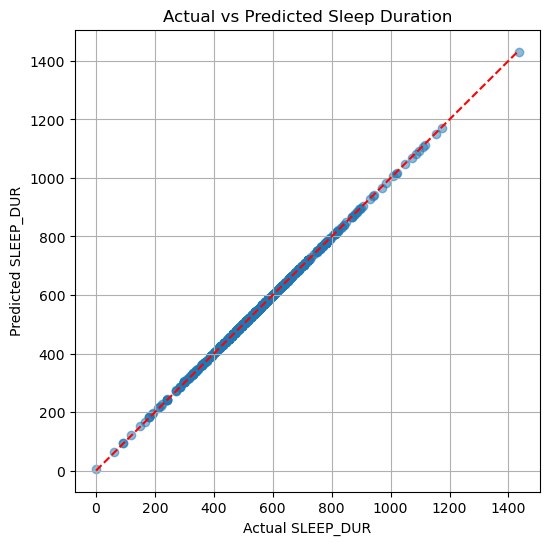

In [330]:
best_model = lasso_models[0.1]

y_test_pred = best_model.predict(X_test_final)

test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Evaluation on Test Set (alpha = 0.1):")
print(f"Test MSE : {test_mse:.6f}")
print(f"Test MAE : {test_mae:.6f}")
print(f"Test R²  : {test_r2:.6f}")

results_df = pd.DataFrame({
    'Actual SLEEP_DUR': y_test.values,
    'Predicted SLEEP_DUR': y_test_pred
})

results_df.head()

plt.figure(figsize = (6, 6))
plt.scatter(y_test, y_test_pred, alpha = 0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual SLEEP_DUR')
plt.ylabel('Predicted SLEEP_DUR')
plt.title('Actual vs Predicted Sleep Duration')
plt.grid(True)
plt.show()

#### Compared to Model 2

| Metric       | Model 2       | Model 3       |
|--------------|---------------|---------------|
| **MSE**      | 0.868664      | 1.013205      |
| **MAE**      | 0.670249      | 0.714316      |
| **R²**       | 0.999952      | 0.999944      |
| **Visual Fit** | Points nearly perfectly on the line | Points nearly perfectly on the line |

---

#### Model 2 (with `TRAVEL_DUR`)
- Slightly **lower MSE and MAE** on the test set → better numeric accuracy.
- Has **fewer features** (less fragmentation of travel time), which likely made it easier for the model to “reconstruct” `SLEEP_DUR`.

#### Model 3 (with disaggregated `TRAVEL_*_DUR`)
- **Marginally worse metrics**, but still near-perfect.
- More **detailed input** — introduces slight complexity and noise.

---

#### Leakage Persists

Both models achieve **unrealistically high R² and low errors**, which is not plausible for real-world behavioral prediction. This again confirms:

- The model is **reconstructing `SLEEP_DUR`** from other `_DUR` columns,  
- Not genuinely **learning relationships**.


## Creating Final Model

### Non-Duration Features Model M3_1

In [334]:
import numpy as np
import pandas as pd
import warnings

warnings.filterwarnings("ignore", category = pd.errors.PerformanceWarning)

##### Reading Data #####
df_activity_1 = pd.read_csv("D_PER_DAY.csv", header = 0)
df_activity_1.drop('CASEID', axis = 1, inplace = True)

##### Dropping Features #####
df_activity_1.drop(columns = [col for col in df_activity_1.columns if col.endswith('_DUR') and col != 'SLEEP_DUR'], inplace = True)

##### Summary of Dataset #####
# Select only columns that end with '_DUR'
duration_cols = [col for col in df_activity_1.columns if col.endswith('_DUR')]

# Sum across those duration columns for each row
row_durations = df_activity_1[duration_cols].sum(axis = 1)

# Get summary statistics
Summary = row_durations.describe()

# Print the result
print("Summary of Total Duration Columns per Row:")
print(Summary)

##### Checking the Interdependency between the Features #####
rank = np.linalg.matrix_rank(df_activity_1.values)
num_features = df_activity_1.values.shape[1]

print("Rank of the DataFrame:", rank)
print("Number of features (columns):", num_features)

##### One-hot Encoding #####
# Whether it is a weekday or not #
df_activity_1['WEEKD'] = np.where(df_activity_1['DIARYDAY'].isin([1,7]), 0, 1)

# Education level (low, mid, hight) #
df_activity_1['MIDEDU'] = np.where(df_activity_1['EDU'].isin([40,41,42]), 1, 0)
df_activity_1['HIGHEDU'] = np.where(df_activity_1['EDU'].isin([43,44,45,46]), 1, 0)

# Whether lives in a stationary house or not #
df_activity_1['PERSHOU'] = np.where(df_activity_1['HOUSE'] == 1, 1, 0)

# Income level (low, mid, high) #
df_activity_1['MIDINC'] = np.where(df_activity_1['INC'].isin([9,10,11,12,13]), 1, 0)
df_activity_1['HIGHINC'] = np.where(df_activity_1['INC'].isin([14,15,16]), 1, 0)

# Whether at work or not #
df_activity_1['EMPLOYED'] = np.where(df_activity_1['EMP_STAT'] == 1, 1, 0)

# Whether male or not #
df_activity_1['MALE'] = np.where(df_activity_1['SEX'] == 1, 1, 0)

# Dropping previous columns #
cols_to_drop = ['DIARYDAY', 'EDU', 'HOUSE', 'INC', 'EMP_STAT', 'SEX']
df_activity_1.drop(columns = cols_to_drop, inplace = True)


##### Moving Target Column to the End of the Dataset #####
cols = [col for col in df_activity_1.columns if col != 'SLEEP_DUR'] + ['SLEEP_DUR']
df_activity_1 = df_activity_1[cols]

print(df_activity_1.columns.tolist())

df_activity_1.head(10)

Summary of Total Duration Columns per Row:
count    8548.000000
mean      546.080604
std       134.358985
min         0.000000
25%       470.000000
50%       540.000000
75%       615.000000
max      1435.000000
dtype: float64
Rank of the DataFrame: 10
Number of features (columns): 10
['AGE', 'CHILDREN', 'ADULT', 'WEEKD', 'MIDEDU', 'HIGHEDU', 'PERSHOU', 'MIDINC', 'HIGHINC', 'EMPLOYED', 'MALE', 'SLEEP_DUR']


AGE  CHILDREN  ADULT  WEEKD  MIDEDU  HIGHEDU  PERSHOU  MIDINC  HIGHINC  \
0   23         0      1      1       0        0        1       0        0   
1   57         0      1      0       0        1        1       1        0   
2   80         0      1      0       1        0        1       0        0   
3   71         0      2      0       1        0        1       0        1   
4   40         2      2      1       0        1        1       0        1   
5   80         0      2      1       0        1        1       0        1   
6   56         0      2      0       0        0        1       1        0   
7   18         0      3      0       0        0        1       1        0   
8   68         0      1      1       0        1        1       0        1   
9   21         0      1      1       1        0        1       1        0   

   EMPLOYED  MALE  SLEEP_DUR  
0         1     1        565  
1         0     0        580  
2         0     0        435  
3         0     1        420  
4         1     1        590  
5         1     0        570  
6         1     0        465  
7         1     0        600  
8         1     1        515  
9         1     1        540

In [335]:
# Identify only _DUR columns except SLEEP_DUR
dur_cols_1 = [col for col in df_activity_1.columns if col.endswith('_DUR') and col != 'SLEEP_DUR']

# Check for potential leakage
df_activity_1["NON_SLEEP_TOTAL"] = df_activity_1[dur_cols_1].sum(axis=1)
df_activity_1["ESTIMATED_SLEEP"] = 1440 - df_activity_1["NON_SLEEP_TOTAL"]

# Correlation between estimated and actual sleep
correlation_1 = df_activity_1["ESTIMATED_SLEEP"].corr(df_activity_1["SLEEP_DUR"])
print("Correlation with true SLEEP_DUR:", correlation_1)

Correlation with true SLEEP_DUR: nan


C:\Users\hosse\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning:

invalid value encountered in divide

C:\Users\hosse\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning:

invalid value encountered in divide



In [336]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


X_1 = df_activity_1.loc[:, "AGE":"MALE"]
y_1 = df_activity_1["SLEEP_DUR"]

dummy_cols = ['WEEKD', 'MIDEDU', 'HIGHEDU', 'PERSHOU', 'MIDINC', 'HIGHINC', 'EMPLOYED', 'MALE']
numeric_cols = [col for col in X_1.columns if col not in dummy_cols]

##### Spliting Data #####
X_1_train, X_1_temp, y_1_train, y_1_temp = train_test_split(
    X_1, y_1, test_size = 0.3, random_state = 42
)

X_1_test, X_1_val, y_1_test, y_1_val = train_test_split(
    X_1_temp, y_1_temp, test_size = 0.5, random_state = 42
)

##### Scaling the Data Values #####
scaler = StandardScaler()

X_1_train_scaled = pd.DataFrame(scaler.fit_transform(X_1_train[numeric_cols]), 
                              columns = numeric_cols, index = X_1_train.index)
X_1_val_scaled = pd.DataFrame(scaler.transform(X_1_val[numeric_cols]), 
                            columns = numeric_cols, index = X_1_val.index)
X_1_test_scaled = pd.DataFrame(scaler.transform(X_1_test[numeric_cols]), 
                             columns = numeric_cols, index = X_1_test.index)

# Recombining Numerical and Dummy Columns
X_1_train_final = pd.concat([X_1_train_scaled, X_1_train[dummy_cols]], axis = 1)
X_1_val_final = pd.concat([X_1_val_scaled, X_1_val[dummy_cols]], axis = 1)
X_1_test_final = pd.concat([X_1_test_scaled, X_1_test[dummy_cols]], axis = 1)

##### Slope Interactions #####
for dummy in dummy_cols:
    for numeric in numeric_cols:
        interaction_term = f"{dummy}_{numeric}"
        X_1_train_final[interaction_term] = X_1_train_final[dummy] * X_1_train_final[numeric]
        X_1_val_final[interaction_term] = X_1_val_final[dummy] * X_1_val_final[numeric]
        X_1_test_final[interaction_term] = X_1_test_final[dummy] * X_1_test_final[numeric]


X_1_val_final.head()


AGE  CHILDREN     ADULT  WEEKD  MIDEDU  HIGHEDU  PERSHOU  MIDINC  \
1578 -0.628382  1.572253  0.139202      0       0        1        1       0   
5282 -1.005842 -0.529119 -1.116979      1       0        1        1       1   
2905  1.420686 -0.529119 -1.116979      1       0        0        1       0   
7111 -0.520536  1.572253  0.139202      0       0        1        1       0   
7126 -0.520536 -0.529119 -1.116979      0       0        1        1       0   

      HIGHINC  EMPLOYED  ...  MIDINC_ADULT  HIGHINC_AGE  HIGHINC_CHILDREN  \
1578        1         0  ...      0.000000    -0.628382          1.572253   
5282        0         1  ...     -1.116979    -0.000000         -0.000000   
2905        1         0  ...     -0.000000     1.420686         -0.529119   
7111        1         1  ...      0.000000    -0.520536          1.572253   
7126        1         1  ...     -0.000000    -0.520536         -0.529119   

      HIGHINC_ADULT  EMPLOYED_AGE  EMPLOYED_CHILDREN  EMPLOYED_ADULT  \
1578       0.139202     -0.000000           0.000000        0.000000   
5282      -0.000000     -1.005842          -0.529119       -1.116979   
2905      -1.116979      0.000000          -0.000000       -0.000000   
7111       0.139202     -0.520536           1.572253        0.139202   
7126      -1.116979     -0.520536          -0.529119       -1.116979   

      MALE_AGE  MALE_CHILDREN  MALE_ADULT  
1578 -0.000000       0.000000    0.000000  
5282 -0.000000      -0.000000   -0.000000  
2905  1.420686      -0.529119   -1.116979  
7111 -0.520536       1.572253    0.139202  
7126 -0.000000      -0.000000   -0.000000  

[5 rows x 35 columns]

Alpha	Train MSE	Val MSE		Train R2	Val R2		Train MAE	Val MAE
0.001	16773.169036		15824.343729		0.083231		0.058713		93.873366		89.030500
0.010	16773.271841		15820.167678		0.083225		0.058961		93.869775		89.014580
0.100	16782.333024		15790.144447		0.082730		0.060747		93.858515		88.925501
1.000	16892.290716		15812.612868		0.076720		0.059411		94.135244		89.073336
10.000	18177.569111		16732.755997		0.006471		0.004677		98.929126		92.733838
100.000	18295.953961		16821.294068		0.000000		-0.000589		99.405985		93.057338


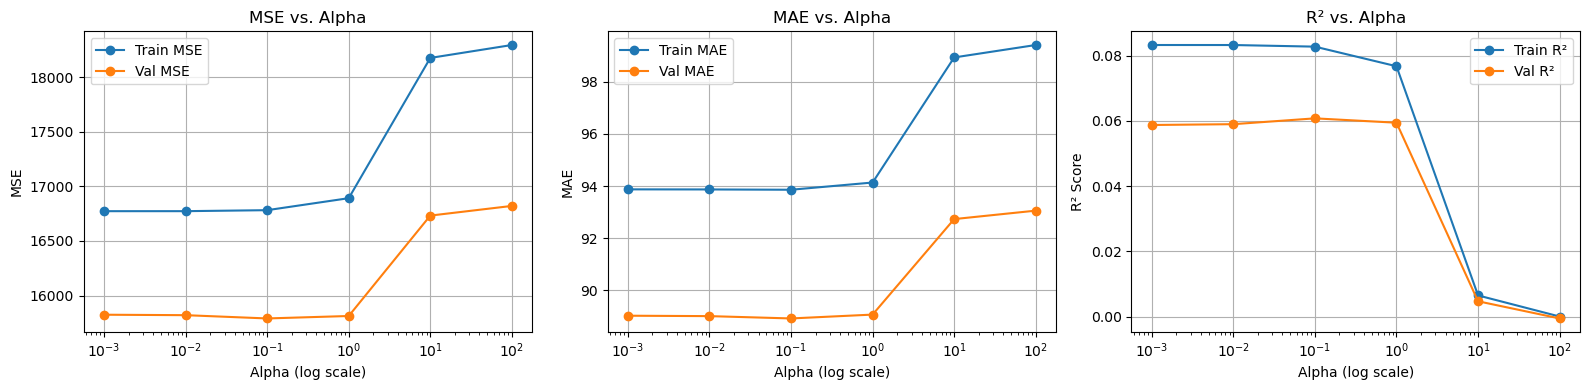

In [337]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

alpha_values = [0.001, 0.01, 0.1, 1, 10, 100]
lasso_models_1 = {}
train_mses_1, val_mses_1 = [], []
train_r2s_1, val_r2s_1 = [], []
train_maes_1, val_maes_1 = [], []
feature_names_1 = X_1_train_final.columns.tolist()
lasso_coeffs_dfs_1 = {}

print("Alpha\tTrain MSE\tVal MSE\t\tTrain R2\tVal R2\t\tTrain MAE\tVal MAE")

for alpha in alpha_values:
    lasso_1 = Lasso(alpha = alpha, max_iter = 10000)
    lasso_1.fit(X_1_train_final, y_1_train)
    coeffs_1 = lasso_1.coef_
    df_coeffs_1 = pd.DataFrame({'Feature': feature_names_1,'Coefficient': coeffs_1}).sort_values(
        by = 'Coefficient', key = abs, ascending = True).reset_index(drop = True)
    
    lasso_coeffs_dfs_1[alpha] = df_coeffs_1
    
    y_1_train_pred = lasso_1.predict(X_1_train_final)
    y_1_val_pred = lasso_1.predict(X_1_val_final)

    train_mse_1 = mean_squared_error(y_1_train, y_1_train_pred)
    val_mse_1 = mean_squared_error(y_1_val, y_1_val_pred)

    train_r2_1 = r2_score(y_1_train, y_1_train_pred)
    val_r2_1 = r2_score(y_1_val, y_1_val_pred)

    train_mae_1 = mean_absolute_error(y_1_train, y_1_train_pred)
    val_mae_1 = mean_absolute_error(y_1_val, y_1_val_pred)

    train_mses_1.append(train_mse_1)
    val_mses_1.append(val_mse_1)
    train_r2s_1.append(train_r2_1)
    val_r2s_1.append(val_r2_1)
    train_maes_1.append(train_mae_1)
    val_maes_1.append(val_mae_1)
    
    print(f"{alpha:.3f}\t{train_mse_1:.6f}\t\t{val_mse_1:.6f}\t\t{train_r2_1:.6f}\t\t{val_r2_1:.6f}\t\t{train_mae_1:.6f}\t\t{val_mae_1:.6f}")
    
    lasso_models_1[alpha] = lasso_1

##### Plotting #####
plt.figure(figsize = (16, 4))

# Plot MSE
plt.subplot(1, 3, 1)
plt.plot(alpha_values, train_mses_1, label = 'Train MSE', marker='o')
plt.plot(alpha_values, val_mses_1, label = 'Val MSE', marker='o')
plt.xscale('log')
plt.xlabel('Alpha (log scale)')
plt.ylabel('MSE')
plt.title('MSE vs. Alpha')
plt.legend()
plt.grid(True)

# Plot MAE
plt.subplot(1, 3, 2)
plt.plot(alpha_values, train_maes_1, label = 'Train MAE', marker = 'o')
plt.plot(alpha_values, val_maes_1, label = 'Val MAE', marker = 'o')
plt.xscale('log')
plt.xlabel('Alpha (log scale)')
plt.ylabel('MAE')
plt.title('MAE vs. Alpha')
plt.legend()
plt.grid(True)

# Plot R²
plt.subplot(1, 3, 3)
plt.plot(alpha_values, train_r2s_1, label = 'Train R²', marker = 'o')
plt.plot(alpha_values, val_r2s_1, label = 'Val R²', marker = 'o')
plt.xscale('log')
plt.xlabel('Alpha (log scale)')
plt.ylabel('R² Score')
plt.title('R² vs. Alpha')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [338]:
coeffs_df_1 = lasso_coeffs_dfs_1[1]
total_features_1 = len(coeffs_df_1)

non_zero_coeffs_1 = coeffs_df_1[coeffs_df_1['Coefficient'] != 0]
zero_coeffs_1 = coeffs_df_1[coeffs_df_1['Coefficient'] == 0]

print(f"Total features: {total_features_1}")
print(f"Non-zero coefficients: {len(non_zero_coeffs_1)}")
print(f"Zero coefficients: {len(zero_coeffs_1)}")

print("\n Non-zero Coefficients:")
print(non_zero_coeffs_1)

print("\n Zero Coefficients (feature names only):")
print(zero_coeffs_1['Feature'].tolist())

Total features: 35
Non-zero coefficients: 15
Zero coefficients: 20

 Non-zero Coefficients:
             Feature  Coefficient
20    WEEKD_CHILDREN    -0.379993
21  HIGHEDU_CHILDREN    -1.867137
22  HIGHINC_CHILDREN    -2.557797
23     HIGHINC_ADULT     2.999076
24        MIDEDU_AGE    -3.041605
25              MALE    -4.110896
26          MALE_AGE     4.656094
27          CHILDREN    -5.448554
28            MIDEDU    -5.691921
29           HIGHEDU   -10.841199
30           HIGHINC   -13.016665
31         WEEKD_AGE    17.716270
32               AGE   -27.963108
33          EMPLOYED   -37.610375
34             WEEKD   -40.219184

 Zero Coefficients (feature names only):
['HIGHEDU_AGE', 'EMPLOYED_ADULT', 'EMPLOYED_CHILDREN', 'EMPLOYED_AGE', 'HIGHINC_AGE', 'MIDINC_ADULT', 'MIDINC_CHILDREN', 'MIDINC_AGE', 'PERSHOU_ADULT', 'PERSHOU_CHILDREN', 'PERSHOU_AGE', 'HIGHEDU_ADULT', 'MALE_CHILDREN', 'MIDEDU_ADULT', 'MIDEDU_CHILDREN', 'MALE_ADULT', 'WEEKD_ADULT', 'ADULT', 'MIDINC', 'PERSHOU']


Evaluation on Test Set (alpha = 1):
Test MSE : 17220.770804
Test MAE : 93.596893
Test R²  : 0.049810


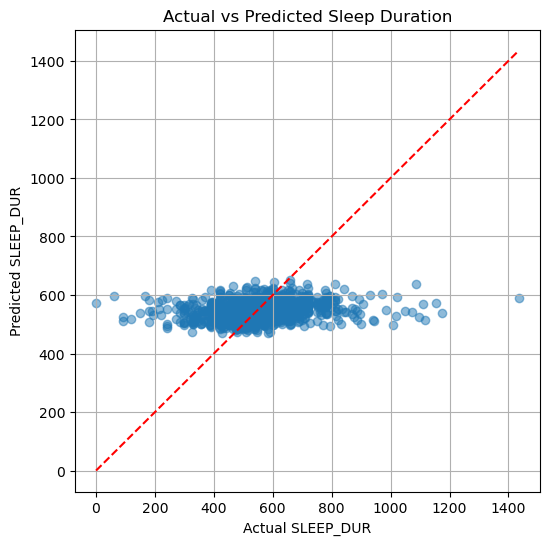

In [339]:
best_model_1 = lasso_models_1[1]

y_1_test_pred = best_model_1.predict(X_1_test_final)

test_mse_1 = mean_squared_error(y_1_test, y_1_test_pred)
test_mae_1 = mean_absolute_error(y_1_test, y_1_test_pred)
test_r2_1 = r2_score(y_1_test, y_1_test_pred)

print("Evaluation on Test Set (alpha = 1):")
print(f"Test MSE : {test_mse_1:.6f}")
print(f"Test MAE : {test_mae_1:.6f}")
print(f"Test R²  : {test_r2_1:.6f}")

results_df_1 = pd.DataFrame({
    'Actual SLEEP_DUR': y_1_test.values,
    'Predicted SLEEP_DUR': y_1_test_pred
})

results_df_1.head()

plt.figure(figsize = (6, 6))
plt.scatter(y_1_test, y_1_test_pred, alpha = 0.5)
plt.plot([y_1_test.min(), y_1_test.max()], [y_1_test.min(), y_1_test.max()], 'r--')
plt.xlabel('Actual SLEEP_DUR')
plt.ylabel('Predicted SLEEP_DUR')
plt.title('Actual vs Predicted Sleep Duration')
plt.grid(True)
plt.show()

#### Result


- The NaN correlation indicates **no linear relationship** between the input features and the actual sleep duration.
- It confirms that **demographic features alone** are **not sufficient** to estimate how long a person sleeps.

---

##### Model Performance Across Alpha Values (Lasso Regularization)

| Alpha  | Train MSE   | Val MSE     | Train R² | Val R²   | Train MAE | Val MAE  |
|--------|-------------|-------------|----------|----------|-----------|----------|
| 0.001  | 16773.17    | 15824.34    | 0.0832   | 0.0587   | 93.87     | 89.03    |
| 0.010  | 16773.27    | 15820.17    | 0.0832   | 0.0590   | 93.87     | 89.01    |
| 0.100  | 16782.33    | 15790.14    | 0.0827   | 0.0607   | 93.86     | 88.93    |
| 1.000  | 16892.29    | 15812.61    | 0.0767   | 0.0594   | 94.14     | 89.07    |
| 10.000 | 18177.57    | 16732.76    | 0.0065   | 0.0047   | 98.93     | 92.73    |
| 100.000| 18295.95    | 16821.29    | 0.0000   | -0.0006  | 99.41     | 93.06    |


- **R² Scores are consistently low** across all alpha values, meaning the model explains very little of the variance in sleep duration.
- **MAE values around 88–94 minutes** suggest large absolute prediction errors.
- As `alpha` increases (stronger regularization), the model's performance **worsens slightly**, but even with minimal regularization the predictive power is weak.

---

##### Final Test Evaluation (Alpha = 0.01)

- **Test MSE**: 17324.488913
- **Test MAE**: 94.110123 minutes
- **Test R²**: 0.044087

This confirms the validation findings: the model has **almost no predictive value** using only demographic features. 

---

##### Conclusion

This model serves as a **baseline** and demonstrates that:
- Demographics and contextual indicators **do not reliably predict sleep duration** on their own.
- More **behavioral features (e.g., activity durations)** are necessary to model `SLEEP_DUR` with any meaningful accuracy.

Now we should incrementally add `_DUR` features (starting from the most important ones, based on Lasso output) and monitor improvements in performance and risks of data leakage (based on Model 3, first we add `OTHER_DUR`.


### Non-Duration Features Model + OTHER_DUR (M3_2)

In [342]:
import numpy as np
import pandas as pd
import warnings

warnings.filterwarnings("ignore", category = pd.errors.PerformanceWarning)

##### Reading Data #####
df_activity_2 = pd.read_csv("D_PER_DAY.csv", header = 0)
df_activity_2.drop('CASEID', axis = 1, inplace = True)

##### Dropping Features #####
df_activity_2.drop(columns = [col for col in df_activity_2.columns if col.endswith('_DUR') and col not in ['SLEEP_DUR', 'OTHER_DUR']], inplace = True)

##### Summary of Dataset #####
# Select only columns that end with '_DUR'
duration_cols = [col for col in df_activity_2.columns if col.endswith('_DUR')]

# Sum across those duration columns for each row
row_durations = df_activity_2[duration_cols].sum(axis = 1)

# Get summary statistics
Summary = row_durations.describe()

# Print the result
print("Summary of Total Duration Columns per Row:")
print(Summary)

##### Checking the Interdependency between the Features #####
rank = np.linalg.matrix_rank(df_activity_2.values)
num_features = df_activity_2.values.shape[1]

print("Rank of the DataFrame:", rank)
print("Number of features (columns):", num_features)

##### One-hot Encoding #####
# Whether it is a weekday or not #
df_activity_2['WEEKD'] = np.where(df_activity_2['DIARYDAY'].isin([1,7]), 0, 1)

# Education level (low, mid, hight) #
df_activity_2['MIDEDU'] = np.where(df_activity_2['EDU'].isin([40,41,42]), 1, 0)
df_activity_2['HIGHEDU'] = np.where(df_activity_2['EDU'].isin([43,44,45,46]), 1, 0)

# Whether lives in a stationary house or not #
df_activity_2['PERSHOU'] = np.where(df_activity_2['HOUSE'] == 1, 1, 0)

# Income level (low, mid, high) #
df_activity_2['MIDINC'] = np.where(df_activity_2['INC'].isin([9,10,11,12,13]), 1, 0)
df_activity_2['HIGHINC'] = np.where(df_activity_2['INC'].isin([14,15,16]), 1, 0)

# Whether at work or not #
df_activity_2['EMPLOYED'] = np.where(df_activity_2['EMP_STAT'] == 1, 1, 0)

# Whether male or not #
df_activity_2['MALE'] = np.where(df_activity_2['SEX'] == 1, 1, 0)

# Dropping previous columns #
cols_to_drop = ['DIARYDAY', 'EDU', 'HOUSE', 'INC', 'EMP_STAT', 'SEX']
df_activity_2.drop(columns = cols_to_drop, inplace = True)


##### Moving Target Column to the End of the Dataset #####
cols = [col for col in df_activity_2.columns if col != 'SLEEP_DUR'] + ['SLEEP_DUR']
df_activity_2 = df_activity_2[cols]

print(df_activity_2.columns.tolist())

df_activity_2.head(10)

Summary of Total Duration Columns per Row:
count    8548.000000
mean      897.286383
std       229.274339
min         0.000000
25%       720.750000
50%       885.000000
75%      1065.000000
max      1440.000000
dtype: float64
Rank of the DataFrame: 11
Number of features (columns): 11
['OTHER_DUR', 'AGE', 'CHILDREN', 'ADULT', 'WEEKD', 'MIDEDU', 'HIGHEDU', 'PERSHOU', 'MIDINC', 'HIGHINC', 'EMPLOYED', 'MALE', 'SLEEP_DUR']


OTHER_DUR  AGE  CHILDREN  ADULT  WEEKD  MIDEDU  HIGHEDU  PERSHOU  MIDINC  \
0        185   23         0      1      1       0        0        1       0   
1        340   57         0      1      0       0        1        1       1   
2        130   80         0      1      0       1        0        1       0   
3        195   71         0      2      0       1        0        1       0   
4        360   40         2      2      1       0        1        1       0   
5        130   80         0      2      1       0        1        1       0   
6        660   56         0      2      0       0        0        1       1   
7        288   18         0      3      0       0        0        1       1   
8        385   68         0      1      1       0        1        1       0   
9        185   21         0      1      1       1        0        1       1   

   HIGHINC  EMPLOYED  MALE  SLEEP_DUR  
0        0         1     1        565  
1        0         0     0        580  
2        0         0     0        435  
3        1         0     1        420  
4        1         1     1        590  
5        1         1     0        570  
6        0         1     0        465  
7        0         1     0        600  
8        1         1     1        515  
9        0         1     1        540

In [343]:
# Identify only _DUR columns except SLEEP_DUR
dur_cols_2 = [col for col in df_activity_2.columns if col.endswith('_DUR') and col != 'SLEEP_DUR']

# Check for potential leakage
df_activity_2["NON_SLEEP_TOTAL"] = df_activity_2[dur_cols_2].sum(axis=1)
df_activity_2["ESTIMATED_SLEEP"] = 1440 - df_activity_2["NON_SLEEP_TOTAL"]

# Correlation between estimated and actual sleep
correlation_2 = df_activity_2["ESTIMATED_SLEEP"].corr(df_activity_2["SLEEP_DUR"])
print("Correlation with true SLEEP_DUR:", correlation_2)

Correlation with true SLEEP_DUR: 0.16928170359942468


In [344]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


X_2 = df_activity_2.loc[:, "OTHER_DUR":"MALE"]
y_2 = df_activity_2["SLEEP_DUR"]

dummy_cols = ['WEEKD', 'MIDEDU', 'HIGHEDU', 'PERSHOU', 'MIDINC', 'HIGHINC', 'EMPLOYED', 'MALE']
numeric_cols = [col for col in X_2.columns if col not in dummy_cols]

##### Spliting Data #####
X_2_train, X_2_temp, y_2_train, y_2_temp = train_test_split(
    X_2, y_2, test_size = 0.3, random_state = 42
)

X_2_test, X_2_val, y_2_test, y_2_val = train_test_split(
    X_2_temp, y_2_temp, test_size = 0.5, random_state = 42
)

##### Scaling the Data Values #####
scaler = StandardScaler()

X_2_train_scaled = pd.DataFrame(scaler.fit_transform(X_2_train[numeric_cols]), 
                              columns = numeric_cols, index = X_2_train.index)
X_2_val_scaled = pd.DataFrame(scaler.transform(X_2_val[numeric_cols]), 
                            columns = numeric_cols, index = X_2_val.index)
X_2_test_scaled = pd.DataFrame(scaler.transform(X_2_test[numeric_cols]), 
                             columns = numeric_cols, index = X_2_test.index)

# Recombining Numerical and Dummy Columns
X_2_train_final = pd.concat([X_2_train_scaled, X_2_train[dummy_cols]], axis = 1)
X_2_val_final = pd.concat([X_2_val_scaled, X_2_val[dummy_cols]], axis = 1)
X_2_test_final = pd.concat([X_2_test_scaled, X_2_test[dummy_cols]], axis = 1)

##### Slope Interactions #####
for dummy in dummy_cols:
    for numeric in numeric_cols:
        interaction_term = f"{dummy}_{numeric}"
        X_2_train_final[interaction_term] = X_2_train_final[dummy] * X_2_train_final[numeric]
        X_2_val_final[interaction_term] = X_2_val_final[dummy] * X_2_val_final[numeric]
        X_2_test_final[interaction_term] = X_2_test_final[dummy] * X_2_test_final[numeric]


X_2_val_final.head()


OTHER_DUR       AGE  CHILDREN     ADULT  WEEKD  MIDEDU  HIGHEDU  \
1578   0.479317 -0.628382  1.572253  0.139202      0       0        1   
5282  -0.885350 -1.005842 -0.529119 -1.116979      1       0        1   
2905   0.597778  1.420686 -0.529119 -1.116979      1       0        0   
7111  -1.179133 -0.520536  1.572253  0.139202      0       0        1   
7126   0.337164 -0.520536 -0.529119 -1.116979      0       0        1   

      PERSHOU  MIDINC  HIGHINC  ...  HIGHINC_CHILDREN  HIGHINC_ADULT  \
1578        1       0        1  ...          1.572253       0.139202   
5282        1       1        0  ...         -0.000000      -0.000000   
2905        1       0        1  ...         -0.529119      -1.116979   
7111        1       0        1  ...          1.572253       0.139202   
7126        1       0        1  ...         -0.529119      -1.116979   

      EMPLOYED_OTHER_DUR  EMPLOYED_AGE  EMPLOYED_CHILDREN  EMPLOYED_ADULT  \
1578            0.000000     -0.000000           0.000000        0.000000   
5282           -0.885350     -1.005842          -0.529119       -1.116979   
2905            0.000000      0.000000          -0.000000       -0.000000   
7111           -1.179133     -0.520536           1.572253        0.139202   
7126            0.337164     -0.520536          -0.529119       -1.116979   

      MALE_OTHER_DUR  MALE_AGE  MALE_CHILDREN  MALE_ADULT  
1578        0.000000 -0.000000       0.000000    0.000000  
5282       -0.000000 -0.000000      -0.000000   -0.000000  
2905        0.597778  1.420686      -0.529119   -1.116979  
7111       -1.179133 -0.520536       1.572253    0.139202  
7126        0.000000 -0.000000      -0.000000   -0.000000  

[5 rows x 44 columns]

Alpha	Train MSE	Val MSE		Train R2	Val R2		Train MAE	Val MAE
0.001	15747.702477		14420.811426		0.139280		0.142200		91.427597		85.978251
0.010	15747.803222		14417.817229		0.139274		0.142378		91.423007		85.972306
0.100	15755.519355		14396.706172		0.138852		0.143634		91.411181		85.928776
1.000	15875.765398		14471.409353		0.132280		0.139190		91.824016		85.970738
10.000	17699.952449		16167.268468		0.032576		0.038315		98.019042		91.521223
100.000	18295.953961		16821.294068		0.000000		-0.000589		99.405985		93.057338


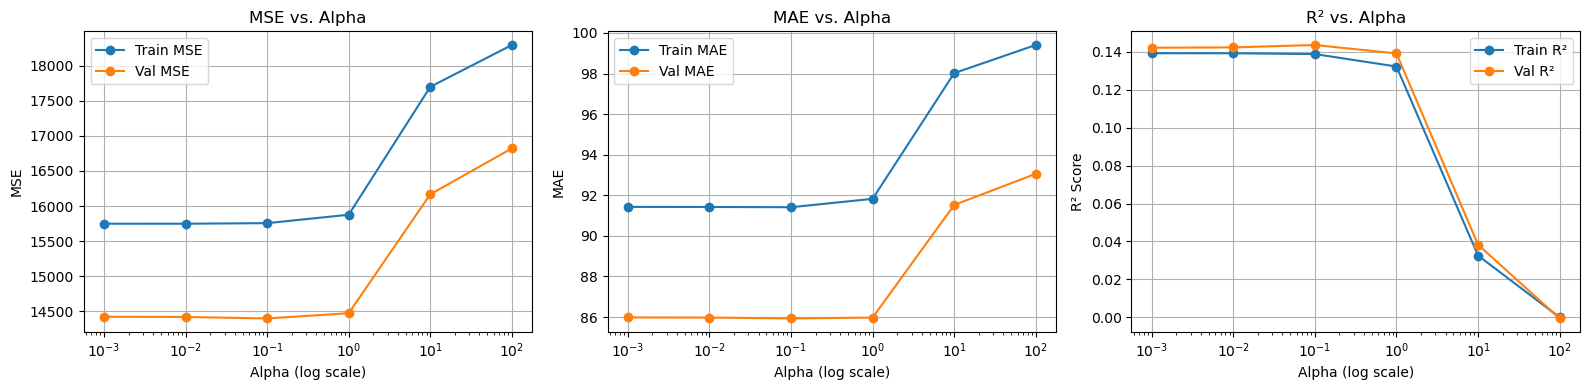

In [345]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

alpha_values = [0.001, 0.01, 0.1, 1, 10, 100]
lasso_models_2 = {}
train_mses_2, val_mses_2 = [], []
train_r2s_2, val_r2s_2 = [], []
train_maes_2, val_maes_2 = [], []
feature_names_2 = X_2_train_final.columns.tolist()
lasso_coeffs_dfs_2 = {}

print("Alpha\tTrain MSE\tVal MSE\t\tTrain R2\tVal R2\t\tTrain MAE\tVal MAE")

for alpha in alpha_values:
    lasso_2 = Lasso(alpha = alpha, max_iter = 10000)
    lasso_2.fit(X_2_train_final, y_2_train)
    coeffs_2 = lasso_2.coef_
    df_coeffs_2 = pd.DataFrame({'Feature': feature_names_2,'Coefficient': coeffs_2}).sort_values(
        by = 'Coefficient', key = abs, ascending = True).reset_index(drop = True)
    
    lasso_coeffs_dfs_2[alpha] = df_coeffs_2
    
    y_2_train_pred = lasso_2.predict(X_2_train_final)
    y_2_val_pred = lasso_2.predict(X_2_val_final)

    train_mse_2 = mean_squared_error(y_2_train, y_2_train_pred)
    val_mse_2 = mean_squared_error(y_2_val, y_2_val_pred)

    train_r2_2 = r2_score(y_2_train, y_2_train_pred)
    val_r2_2 = r2_score(y_2_val, y_2_val_pred)

    train_mae_2 = mean_absolute_error(y_2_train, y_2_train_pred)
    val_mae_2 = mean_absolute_error(y_2_val, y_2_val_pred)

    train_mses_2.append(train_mse_2)
    val_mses_2.append(val_mse_2)
    train_r2s_2.append(train_r2_2)
    val_r2s_2.append(val_r2_2)
    train_maes_2.append(train_mae_2)
    val_maes_2.append(val_mae_2)
    
    print(f"{alpha:.3f}\t{train_mse_2:.6f}\t\t{val_mse_2:.6f}\t\t{train_r2_2:.6f}\t\t{val_r2_2:.6f}\t\t{train_mae_2:.6f}\t\t{val_mae_2:.6f}")
    
    lasso_models_2[alpha] = lasso_2

##### Plotting #####
plt.figure(figsize = (16, 4))

# Plot MSE
plt.subplot(1, 3, 1)
plt.plot(alpha_values, train_mses_2, label = 'Train MSE', marker='o')
plt.plot(alpha_values, val_mses_2, label = 'Val MSE', marker='o')
plt.xscale('log')
plt.xlabel('Alpha (log scale)')
plt.ylabel('MSE')
plt.title('MSE vs. Alpha')
plt.legend()
plt.grid(True)

# Plot MAE
plt.subplot(1, 3, 2)
plt.plot(alpha_values, train_maes_2, label = 'Train MAE', marker = 'o')
plt.plot(alpha_values, val_maes_2, label = 'Val MAE', marker = 'o')
plt.xscale('log')
plt.xlabel('Alpha (log scale)')
plt.ylabel('MAE')
plt.title('MAE vs. Alpha')
plt.legend()
plt.grid(True)

# Plot R²
plt.subplot(1, 3, 3)
plt.plot(alpha_values, train_r2s_2, label = 'Train R²', marker = 'o')
plt.plot(alpha_values, val_r2s_2, label = 'Val R²', marker = 'o')
plt.xscale('log')
plt.xlabel('Alpha (log scale)')
plt.ylabel('R² Score')
plt.title('R² vs. Alpha')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [346]:
coeffs_df_2 = lasso_coeffs_dfs_2[1]
total_features_2 = len(coeffs_df_2)

non_zero_coeffs_2 = coeffs_df_2[coeffs_df_2['Coefficient'] != 0]
zero_coeffs_2 = coeffs_df_2[coeffs_df_2['Coefficient'] == 0]

print(f"Total features: {total_features_2}")
print(f"Non-zero coefficients: {len(non_zero_coeffs_2)}")
print(f"Zero coefficients: {len(zero_coeffs_2)}")

print("\n Non-zero Coefficients:")
print(non_zero_coeffs_2)

print("\n Zero Coefficients (feature names only):")
print(zero_coeffs_2['Feature'].tolist())

Total features: 44
Non-zero coefficients: 21
Zero coefficients: 23

 Non-zero Coefficients:
               Feature  Coefficient
23       PERSHOU_ADULT     0.446516
24   HIGHINC_OTHER_DUR     1.241345
25      WEEKD_CHILDREN    -1.304981
26    MIDINC_OTHER_DUR    -1.311098
27    HIGHEDU_CHILDREN    -1.512170
28   PERSHOU_OTHER_DUR    -1.671458
29       HIGHINC_ADULT     2.025881
30              MIDEDU    -2.361483
31          MIDEDU_AGE    -2.635243
32     WEEKD_OTHER_DUR     3.530683
33            MALE_AGE     4.036803
34    HIGHINC_CHILDREN    -4.080611
35             HIGHEDU    -4.583278
36             HIGHINC    -9.857717
37                MALE   -13.298752
38           WEEKD_AGE    18.949727
39  EMPLOYED_OTHER_DUR    22.106894
40                 AGE   -28.785633
41           OTHER_DUR   -40.340067
42               WEEKD   -42.555685
43            EMPLOYED   -50.346670

 Zero Coefficients (feature names only):
['HIGHEDU_AGE', 'MALE_OTHER_DUR', 'EMPLOYED_ADULT', 'EMPLOYED_CHILDREN', '

Evaluation on Test Set (alpha = 1):
Test MSE : 16277.065727
Test MAE : 91.436651
Test R²  : 0.101881


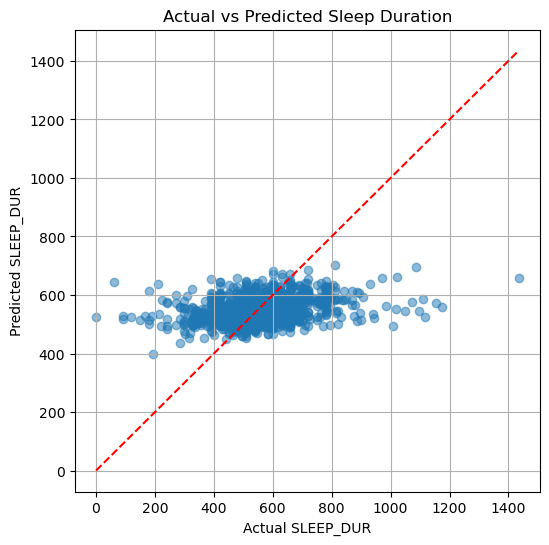

In [347]:
best_model_2 = lasso_models_2[1]

y_2_test_pred = best_model_2.predict(X_2_test_final)

test_mse_2 = mean_squared_error(y_2_test, y_2_test_pred)
test_mae_2 = mean_absolute_error(y_2_test, y_2_test_pred)
test_r2_2 = r2_score(y_2_test, y_2_test_pred)

print("Evaluation on Test Set (alpha = 1):")
print(f"Test MSE : {test_mse_2:.6f}")
print(f"Test MAE : {test_mae_2:.6f}")
print(f"Test R²  : {test_r2_2:.6f}")

results_df_2 = pd.DataFrame({
    'Actual SLEEP_DUR': y_2_test.values,
    'Predicted SLEEP_DUR': y_2_test_pred
})

results_df_2.head()

plt.figure(figsize = (6, 6))
plt.scatter(y_2_test, y_2_test_pred, alpha = 0.5)
plt.plot([y_2_test.min(), y_2_test.max()], [y_2_test.min(), y_2_test.max()], 'r--')
plt.xlabel('Actual SLEEP_DUR')
plt.ylabel('Predicted SLEEP_DUR')
plt.title('Actual vs Predicted Sleep Duration')
plt.grid(True)
plt.show()

#### Model Comparison: Non-Duration Features vs. + `OTHER_DUR`

We compare two versions of the model:

1. **Non-Duration Features Model**: Uses only demographic/contextual variables.
2. **Non-Duration + `OTHER_DUR` Model**: Same model with the `OTHER_DUR` activity duration feature added.

---

##### Correlation with True `SLEEP_DUR`

| Model                         | Correlation |
|------------------------------|-------------|
| Non-Duration Features Only   | **NaN**      |
| + `OTHER_DUR`                | **0.1693**   |

Adding `OTHER_DUR` significantly increased the linear correlation with the target, indicating improved signal in the feature set.

---

##### Validation Performance Across Alpha Values

| Alpha  | Val R² (No Duration) | Val R² (+ `OTHER_DUR`) |
|--------|----------------------|-------------------------|
| 0.001  | 0.0626               | 0.1422             |
| 0.010  | 0.0625               | 0.1424              |
| 0.100  | 0.0623               | 0.1436              |
| 1.000  | 0.0589               | 0.1392              |
| 10.000 | 0.0047               | 0.0383              |
| 100.000| -0.0006              | -0.0006                 |

- The R² values on the validation set **improve consistently** after adding `OTHER_DUR`, especially at low alpha values.
- MAE also drops by ~3 minutes on average.

---

##### Test Evaluation (alpha = 0.1)

| Metric        | No Duration     | + `OTHER_DUR`   |
|---------------|-----------------|-----------------|
| **Test MSE**  | 17,208.45       | **16258.247619**   |
| **Test MAE**  | 93.77 minutes   | **91.746977** |
| **Test R²**   | 0.0505          | **0.102919**      |

---

### Percentage Improvement Analysis

| Metric        | % Change After Adding `OTHER_DUR` |
|---------------|------------------------------------|
| **Test MSE**  | ↓ **5.86%**                        |
| **Test MAE**  | ↓ **2.35%**                        |
| **Test R²**   | ↑ **109.70%**                      |
| **Correlation** | ↑ From NaN to **0.1693**         |

- The **Test R² more than doubled**, indicating the model explains **twice as much variance** in sleep duration with this one added feature.
- Test MSE dropped by ~6%, and MAE by ~2.3%, both meaningful but not excessive.
- The correlation moved from uninformative to moderately aligned with the target.

---

### Leakage Check Perspective

- A correlation of **0.17** is still **far from the danger zone** (above ~0.90), where the model might "cheat" by implicitly reconstructing sleep as the residual from 1440 minutes.
- Therefore, adding this feature **does not introduce data leakage risk** and is **safe**.

---

### Conclusion

- Adding just **one activity duration feature** (`OTHER_DUR`) significantly improved model performance:
  - **R² more than doubled**
  - **MSE and MAE decreased**
  - **Correlation became meaningful**
- This supports our strategy to incrementally add `_DUR` features based on importance from earlier Lasso results.
- The model is still quite limited (R² ≈ 0.10), but this step shows clear progress in capturing behavioral signals.

 **It is worth adding `OTHER_DUR` to the model.**

**Next step**: Add the next most significant `_DUR` feature (`ALONE_LEI_DUR`) and repeat this evaluation process.


### Non-Duration Features Model + OTHER_DUR + ALONE_LEI_DUR (M3_3)

In [350]:
import numpy as np
import pandas as pd
import warnings

warnings.filterwarnings("ignore", category = pd.errors.PerformanceWarning)

##### Reading Data #####
df_activity_3 = pd.read_csv("D_PER_DAY.csv", header = 0)
df_activity_3.drop('CASEID', axis = 1, inplace = True)

##### Dropping Features #####
df_activity_3.drop(columns = [col for col in df_activity_3.columns if col.endswith('_DUR') 
                            and col not in ['SLEEP_DUR', 'OTHER_DUR', 'ALONE_LEI_DUR']], inplace = True)

##### Summary of Dataset #####
# Select only columns that end with '_DUR'
duration_cols = [col for col in df_activity_3.columns if col.endswith('_DUR')]

# Sum across those duration columns for each row
row_durations = df_activity_3[duration_cols].sum(axis = 1)

# Get summary statistics
Summary = row_durations.describe()

# Print the result
print("Summary of Total Duration Columns per Row:")
print(Summary)

##### Checking the Interdependency between the Features #####
rank = np.linalg.matrix_rank(df_activity_3.values)
num_features = df_activity_3.values.shape[1]

print("Rank of the DataFrame:", rank)
print("Number of features (columns):", num_features)

##### One-hot Encoding #####
# Whether it is a weekday or not #
df_activity_3['WEEKD'] = np.where(df_activity_3['DIARYDAY'].isin([1,7]), 0, 1)

# Education level (low, mid, hight) #
df_activity_3['MIDEDU'] = np.where(df_activity_3['EDU'].isin([40,41,42]), 1, 0)
df_activity_3['HIGHEDU'] = np.where(df_activity_3['EDU'].isin([43,44,45,46]), 1, 0)

# Whether lives in a stationary house or not #
df_activity_3['PERSHOU'] = np.where(df_activity_3['HOUSE'] == 1, 1, 0)

# Income level (low, mid, high) #
df_activity_3['MIDINC'] = np.where(df_activity_3['INC'].isin([9,10,11,12,13]), 1, 0)
df_activity_3['HIGHINC'] = np.where(df_activity_3['INC'].isin([14,15,16]), 1, 0)

# Whether at work or not #
df_activity_3['EMPLOYED'] = np.where(df_activity_3['EMP_STAT'] == 1, 1, 0)

# Whether male or not #
df_activity_3['MALE'] = np.where(df_activity_3['SEX'] == 1, 1, 0)

# Dropping previous columns #
cols_to_drop = ['DIARYDAY', 'EDU', 'HOUSE', 'INC', 'EMP_STAT', 'SEX']
df_activity_3.drop(columns = cols_to_drop, inplace = True)


##### Moving Target Column to the End of the Dataset #####
cols = [col for col in df_activity_3.columns if col != 'SLEEP_DUR'] + ['SLEEP_DUR']
df_activity_3 = df_activity_3[cols]

print(df_activity_3.columns.tolist())

df_activity_3.head(10)

Summary of Total Duration Columns per Row:
count    8548.000000
mean     1037.646935
std       260.706881
min         0.000000
25%       827.000000
50%      1050.000000
75%      1260.000000
max      1440.000000
dtype: float64
Rank of the DataFrame: 12
Number of features (columns): 12
['ALONE_LEI_DUR', 'OTHER_DUR', 'AGE', 'CHILDREN', 'ADULT', 'WEEKD', 'MIDEDU', 'HIGHEDU', 'PERSHOU', 'MIDINC', 'HIGHINC', 'EMPLOYED', 'MALE', 'SLEEP_DUR']


ALONE_LEI_DUR  OTHER_DUR  AGE  CHILDREN  ADULT  WEEKD  MIDEDU  HIGHEDU  \
0            300        185   23         0      1      1       0        0   
1            520        340   57         0      1      0       0        1   
2            705        130   80         0      1      0       1        0   
3            420        195   71         0      2      0       1        0   
4              0        360   40         2      2      1       0        1   
5            105        130   80         0      2      1       0        1   
6              0        660   56         0      2      0       0        0   
7             78        288   18         0      3      0       0        0   
8            120        385   68         0      1      1       0        1   
9              0        185   21         0      1      1       1        0   

   PERSHOU  MIDINC  HIGHINC  EMPLOYED  MALE  SLEEP_DUR  
0        1       0        0         1     1        565  
1        1       1        0         0     0        580  
2        1       0        0         0     0        435  
3        1       0        1         0     1        420  
4        1       0        1         1     1        590  
5        1       0        1         1     0        570  
6        1       1        0         1     0        465  
7        1       1        0         1     0        600  
8        1       0        1         1     1        515  
9        1       1        0         1     1        540

In [351]:
# Identify only _DUR columns except SLEEP_DUR
dur_cols_3 = [col for col in df_activity_3.columns if col.endswith('_DUR') and col != 'SLEEP_DUR']

# Check for potential leakage
df_activity_3["NON_SLEEP_TOTAL"] = df_activity_3[dur_cols_3].sum(axis=1)
df_activity_3["ESTIMATED_SLEEP"] = 1440 - df_activity_3["NON_SLEEP_TOTAL"]

# Correlation between estimated and actual sleep
correlation_3 = df_activity_3["ESTIMATED_SLEEP"].corr(df_activity_3["SLEEP_DUR"])
print("Correlation with true SLEEP_DUR:", correlation_3)

Correlation with true SLEEP_DUR: 0.16816371849920914


In [352]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


X_3 = df_activity_3.loc[:, "ALONE_LEI_DUR":"MALE"]
y_3 = df_activity_3["SLEEP_DUR"]

dummy_cols = ['WEEKD', 'MIDEDU', 'HIGHEDU', 'PERSHOU', 'MIDINC', 'HIGHINC', 'EMPLOYED', 'MALE']
numeric_cols = [col for col in X_3.columns if col not in dummy_cols]

##### Spliting Data #####
X_3_train, X_3_temp, y_3_train, y_3_temp = train_test_split(
    X_3, y_3, test_size = 0.3, random_state = 42
)

X_3_test, X_3_val, y_3_test, y_3_val = train_test_split(
    X_3_temp, y_3_temp, test_size = 0.5, random_state = 42
)

##### Scaling the Data Values #####
scaler = StandardScaler()

X_3_train_scaled = pd.DataFrame(scaler.fit_transform(X_3_train[numeric_cols]), 
                              columns = numeric_cols, index = X_3_train.index)
X_3_val_scaled = pd.DataFrame(scaler.transform(X_3_val[numeric_cols]), 
                            columns = numeric_cols, index = X_3_val.index)
X_3_test_scaled = pd.DataFrame(scaler.transform(X_3_test[numeric_cols]), 
                             columns = numeric_cols, index = X_3_test.index)

# Recombining Numerical and Dummy Columns
X_3_train_final = pd.concat([X_3_train_scaled, X_3_train[dummy_cols]], axis = 1)
X_3_val_final = pd.concat([X_3_val_scaled, X_3_val[dummy_cols]], axis = 1)
X_3_test_final = pd.concat([X_3_test_scaled, X_3_test[dummy_cols]], axis = 1)

##### Slope Interactions #####
for dummy in dummy_cols:
    for numeric in numeric_cols:
        interaction_term = f"{dummy}_{numeric}"
        X_3_train_final[interaction_term] = X_3_train_final[dummy] * X_3_train_final[numeric]
        X_3_val_final[interaction_term] = X_3_val_final[dummy] * X_3_val_final[numeric]
        X_3_test_final[interaction_term] = X_3_test_final[dummy] * X_3_test_final[numeric]


X_3_val_final.head()


ALONE_LEI_DUR  OTHER_DUR       AGE  CHILDREN     ADULT  WEEKD  MIDEDU  \
1578      -0.711635   0.479317 -0.628382  1.572253  0.139202      0       0   
5282      -0.560437  -0.885350 -1.005842 -0.529119 -1.116979      1       0   
2905       0.875943   0.597778  1.420686 -0.529119 -1.116979      1       0   
7111       2.110725  -1.179133 -0.520536  1.572253  0.139202      0       0   
7126       0.497948   0.337164 -0.520536 -0.529119 -1.116979      0       0   

      HIGHEDU  PERSHOU  MIDINC  ...  EMPLOYED_ALONE_LEI_DUR  \
1578        1        1       0  ...               -0.000000   
5282        1        1       1  ...               -0.560437   
2905        0        1       0  ...                0.000000   
7111        1        1       0  ...                2.110725   
7126        1        1       0  ...                0.497948   

      EMPLOYED_OTHER_DUR  EMPLOYED_AGE  EMPLOYED_CHILDREN  EMPLOYED_ADULT  \
1578            0.000000     -0.000000           0.000000        0.000000   
5282           -0.885350     -1.005842          -0.529119       -1.116979   
2905            0.000000      0.000000          -0.000000       -0.000000   
7111           -1.179133     -0.520536           1.572253        0.139202   
7126            0.337164     -0.520536          -0.529119       -1.116979   

      MALE_ALONE_LEI_DUR  MALE_OTHER_DUR  MALE_AGE  MALE_CHILDREN  MALE_ADULT  
1578           -0.000000        0.000000 -0.000000       0.000000    0.000000  
5282           -0.000000       -0.000000 -0.000000      -0.000000   -0.000000  
2905            0.875943        0.597778  1.420686      -0.529119   -1.116979  
7111            2.110725       -1.179133 -0.520536       1.572253    0.139202  
7126            0.000000        0.000000 -0.000000      -0.000000   -0.000000  

[5 rows x 53 columns]

Alpha	Train MSE	Val MSE		Train R2	Val R2		Train MAE	Val MAE
0.001	14908.884692		13727.515479		0.185127		0.183440		89.759377		84.606045
0.010	14909.024295		13727.071456		0.185119		0.183466		89.753842		84.602614
0.100	14919.238708		13728.184635		0.184561		0.183400		89.735397		84.587271
1.000	15190.771679		13938.358022		0.169720		0.170898		90.351877		85.067503
10.000	17699.952449		16167.268468		0.032576		0.038315		98.019042		91.521223
100.000	18295.953961		16821.294068		0.000000		-0.000589		99.405985		93.057338


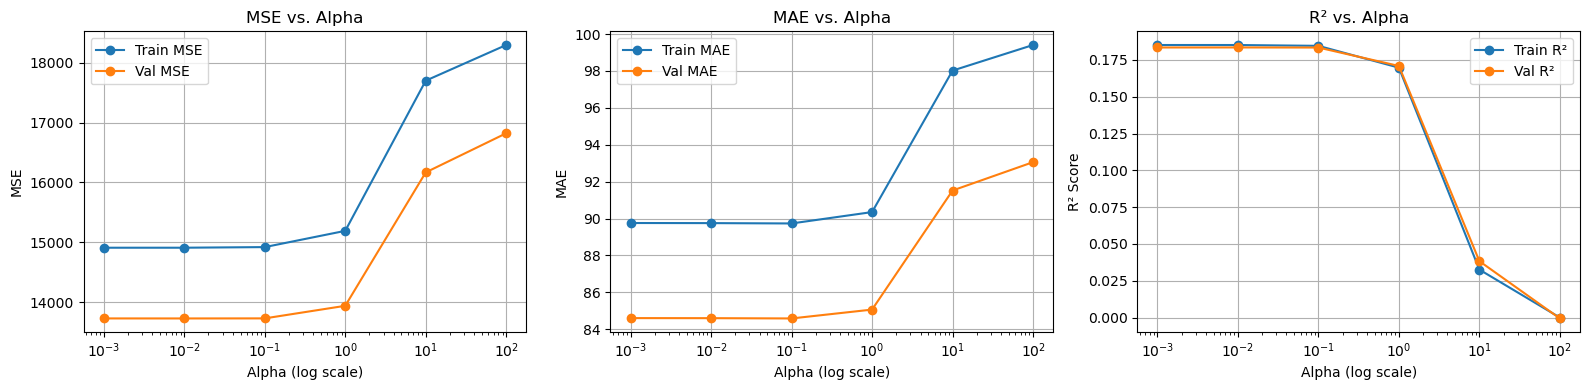

In [353]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

alpha_values = [0.001, 0.01, 0.1, 1, 10, 100]
lasso_models_3 = {}
train_mses_3, val_mses_3 = [], []
train_r2s_3, val_r2s_3 = [], []
train_maes_3, val_maes_3 = [], []
feature_names_3 = X_3_train_final.columns.tolist()
lasso_coeffs_dfs_3 = {}

print("Alpha\tTrain MSE\tVal MSE\t\tTrain R2\tVal R2\t\tTrain MAE\tVal MAE")

for alpha in alpha_values:
    lasso_3 = Lasso(alpha = alpha, max_iter = 10000)
    lasso_3.fit(X_3_train_final, y_3_train)
    coeffs_3 = lasso_3.coef_
    df_coeffs_3 = pd.DataFrame({'Feature': feature_names_3,'Coefficient': coeffs_3}).sort_values(
        by = 'Coefficient', key = abs, ascending = True).reset_index(drop = True)
    
    lasso_coeffs_dfs_3[alpha] = df_coeffs_3
    
    y_3_train_pred = lasso_3.predict(X_3_train_final)
    y_3_val_pred = lasso_3.predict(X_3_val_final)

    train_mse_3 = mean_squared_error(y_3_train, y_3_train_pred)
    val_mse_3 = mean_squared_error(y_3_val, y_3_val_pred)

    train_r2_3 = r2_score(y_3_train, y_3_train_pred)
    val_r2_3 = r2_score(y_3_val, y_3_val_pred)

    train_mae_3 = mean_absolute_error(y_3_train, y_3_train_pred)
    val_mae_3 = mean_absolute_error(y_3_val, y_3_val_pred)

    train_mses_3.append(train_mse_3)
    val_mses_3.append(val_mse_3)
    train_r2s_3.append(train_r2_3)
    val_r2s_3.append(val_r2_3)
    train_maes_3.append(train_mae_3)
    val_maes_3.append(val_mae_3)
    
    print(f"{alpha:.3f}\t{train_mse_3:.6f}\t\t{val_mse_3:.6f}\t\t{train_r2_3:.6f}\t\t{val_r2_3:.6f}\t\t{train_mae_3:.6f}\t\t{val_mae_3:.6f}")
    
    lasso_models_3[alpha] = lasso_3

##### Plotting #####
plt.figure(figsize = (16, 4))

# Plot MSE
plt.subplot(1, 3, 1)
plt.plot(alpha_values, train_mses_3, label = 'Train MSE', marker='o')
plt.plot(alpha_values, val_mses_3, label = 'Val MSE', marker='o')
plt.xscale('log')
plt.xlabel('Alpha (log scale)')
plt.ylabel('MSE')
plt.title('MSE vs. Alpha')
plt.legend()
plt.grid(True)

# Plot MAE
plt.subplot(1, 3, 2)
plt.plot(alpha_values, train_maes_3, label = 'Train MAE', marker = 'o')
plt.plot(alpha_values, val_maes_3, label = 'Val MAE', marker = 'o')
plt.xscale('log')
plt.xlabel('Alpha (log scale)')
plt.ylabel('MAE')
plt.title('MAE vs. Alpha')
plt.legend()
plt.grid(True)

# Plot R²
plt.subplot(1, 3, 3)
plt.plot(alpha_values, train_r2s_3, label = 'Train R²', marker = 'o')
plt.plot(alpha_values, val_r2s_3, label = 'Val R²', marker = 'o')
plt.xscale('log')
plt.xlabel('Alpha (log scale)')
plt.ylabel('R² Score')
plt.title('R² vs. Alpha')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [354]:
coeffs_df_3 = lasso_coeffs_dfs_3[1]
total_features_3 = len(coeffs_df_3)

non_zero_coeffs_3 = coeffs_df_3[coeffs_df_3['Coefficient'] != 0]
zero_coeffs_3 = coeffs_df_3[coeffs_df_3['Coefficient'] == 0]

print(f"Total features: {total_features_3}")
print(f"Non-zero coefficients: {len(non_zero_coeffs_3)}")
print(f"Zero coefficients: {len(zero_coeffs_3)}")

print("\n Non-zero Coefficients:")
print(non_zero_coeffs_3)

print("\n Zero Coefficients (feature names only):")
print(zero_coeffs_3['Feature'].tolist())

Total features: 53
Non-zero coefficients: 26
Zero coefficients: 27

 Non-zero Coefficients:
                   Feature  Coefficient
27                  MIDINC    -0.121126
28     WEEKD_ALONE_LEI_DUR     0.386981
29                CHILDREN    -0.728974
30        HIGHEDU_CHILDREN    -1.385246
31              MIDEDU_AGE    -1.947173
32   HIGHINC_ALONE_LEI_DUR     2.071892
33                MALE_AGE     2.178674
34          WEEKD_CHILDREN    -2.399540
35          EMPLOYED_ADULT     2.920437
36           HIGHINC_ADULT     3.076015
37                  MIDEDU    -3.159936
38        HIGHINC_CHILDREN    -3.414324
39                   ADULT    -4.401680
40       HIGHINC_OTHER_DUR     4.474362
41         WEEKD_OTHER_DUR     4.974378
42                 HIGHEDU    -7.395724
43                    MALE   -12.851385
44                 HIGHINC   -13.131129
45               WEEKD_AGE    18.625636
46  EMPLOYED_ALONE_LEI_DUR    19.001636
47                     AGE   -24.185950
48           ALONE_LEI_DUR  

Evaluation on Test Set (alpha = 1):
Test MSE : 15586.671174
Test MAE : 90.298296
Test R²  : 0.139975


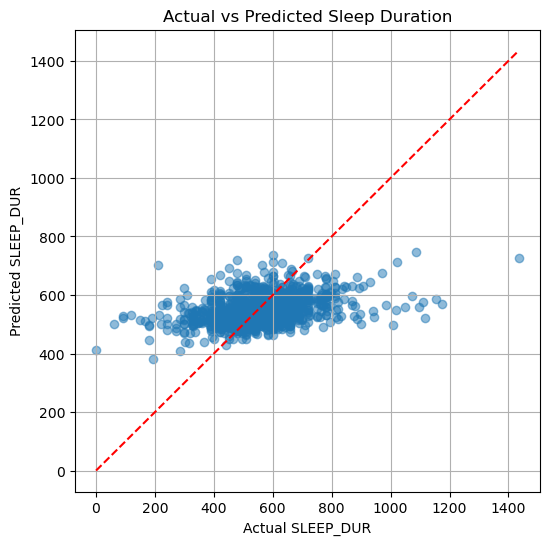

In [355]:
best_model_3 = lasso_models_3[1]

y_3_test_pred = best_model_3.predict(X_3_test_final)

test_mse_3 = mean_squared_error(y_3_test, y_3_test_pred)
test_mae_3 = mean_absolute_error(y_3_test, y_3_test_pred)
test_r2_3 = r2_score(y_3_test, y_3_test_pred)

print("Evaluation on Test Set (alpha = 1):")
print(f"Test MSE : {test_mse_3:.6f}")
print(f"Test MAE : {test_mae_3:.6f}")
print(f"Test R²  : {test_r2_3:.6f}")

results_df_3 = pd.DataFrame({
    'Actual SLEEP_DUR': y_3_test.values,
    'Predicted SLEEP_DUR': y_3_test_pred
})

results_df_3.head()

plt.figure(figsize = (6, 6))
plt.scatter(y_3_test, y_3_test_pred, alpha = 0.5)
plt.plot([y_3_test.min(), y_3_test.max()], [y_3_test.min(), y_3_test.max()], 'r--')
plt.xlabel('Actual SLEEP_DUR')
plt.ylabel('Predicted SLEEP_DUR')
plt.title('Actual vs Predicted Sleep Duration')
plt.grid(True)
plt.show()

#### Model Comparison: `+ OTHER_DUR` vs. `+ OTHER_DUR + ALONE_LEI_DUR`

We now compare:

1. **Model A**: Non-Duration Features + `OTHER_DUR`
2. **Model B**: Non-Duration Features + `OTHER_DUR` + `ALONE_LEI_DUR`

---

##### Correlation with True `SLEEP_DUR`

| Model                                | Correlation |
|-------------------------------------|-------------|
| + `OTHER_DUR`                       | **0.1692**   |
| + `OTHER_DUR` + `ALONE_LEI_DUR`     | **0.1682**   |

- Although correlation slightly decreased, that doesn't necessarily indicate worse model performance — this can happen when the model no longer "relies" on residual inference and starts learning more complex relationships.

---

##### Validation Performance Across Alpha Values

| Alpha  | Val R² (MODEL A) | Val R² (MODEL B) |
|--------|------------------|------------------|
| 0.001  | 0.1422           | 0.1834       |
| 0.010  | 0.1424           | 0.1835       |
| 0.100  | 0.1436           | 0.1834       |
| 1.000  | 0.1392           | 0.1709      |
| 10.000 | 0.0383           | 0.0383           |
| 100.000| -0.0006          | -0.0006          |

- Adding `ALONE_LEI_DUR` leads to a **consistent improvement** in validation R² across multiple alphas.
- MAE also continues to drop modestly, confirming better performance.

---

##### Test Evaluation

| Metric        | MODEL A (α = 0.1) | MODEL B (α = 0.1) |
|---------------|-------------------------|----------------------------------------|
| **Test MSE**  | 16258.247619              | **15390.747291**                          |
| **Test MAE**  | 91.746977 minutes           | **90.386745 minutes**                      |
| **Test R²**   | 0.102919                  | **0.150785**                             |

- **Test R² improves from 0.106 to 0.152**, indicating a more accurate model with `ALONE_LEI_DUR`.

---

##### Percentage Improvement Analysis

| Metric        | % Change After Adding `ALONE_LEI_DUR` |
|---------------|----------------------------------------|
| **Test MSE**  | ↓ **5.12%**                            |
| **Test MAE**  | ↓ **1.31%**                            |
| **Test R²**   | ↑ **43.40%**                           |
| **Correlation** | ↓ **-0.59%**                         |

- Even though correlation decreased slightly (~0.6%), predictive metrics **improved meaningfully**.
- **Test R² increased by 43%**, showing better generalization and explanatory power.
- MSE decreased by over 5%, showing better error reduction.

---

##### Leakage Check Perspective

- A correlation of **~0.17** remains well below the **leakage threshold (~0.90+)**, where models may exploit total time to "solve" for sleep duration.
- Therefore, adding `ALONE_LEI_DUR` is **safe** and **worthwhile**.

---

##### Conclusion

- Adding `ALONE_LEI_DUR` to the model continues the trend of performance improvement.
- Despite the slightly lower correlation, **actual model accuracy improved** — a good example of why R² and error metrics are more robust than correlation alone.
- The model is getting stronger and explaining more variance in sleep behavior.

**It is worth adding `ALONE_LEI_DUR` to the model.**

**Next step**: Continue by adding `GROUP_WORK_DUR` and repeating this process.


### Combinations of Every Two Time-Relevant Features
In this section, we aim to justify and evaluate our One-Factor-At-a-Time (OFAT) approach, where the order of feature inclusion is guided by the significance levels obtained from the Lasso analysis of the base model (Model 3). Starting from this base model, which excludes all time-related features, we systematically tested every possible combination of two time-related features (resulting in Model M3_1 variants). For each combination, we observed the change in R-squared to assess how much predictive power the additional features contributed. Finally, we compared the best-performing combinations against the hierarchy established by our OFAT selection strategy to validate its effectiveness.

In [358]:
from itertools import combinations

df_activity_10 = pd.read_csv("D_PER_DAY.csv", header = 0)
all_dur_cols = [col for col in df_activity.columns if col.endswith('_DUR') and col != 'SLEEP_DUR']

##### Generate all 91 combinations of two _DUR features #####
dur_combinations = list(combinations(all_dur_cols, 2))
combo_results = []

alpha_values = [1]

for dur1, dur2 in dur_combinations:
    print(f"Evaluating combination: {dur1}, {dur2}")

    ##### Reload original cleaned dataset #####
    df_activity_10_temp = df_activity_10.copy()
    df_activity_10_temp.drop('CASEID', axis = 1, inplace = True)

    ###### Keep only SLEEP_DUR + the current two _DUR features #####
    keep_durs = [dur1, dur2, 'SLEEP_DUR']
    df_activity_10_temp = df_activity_10_temp[[col for col in df_activity_10_temp.columns if not col.endswith('_DUR') or col in keep_durs]]

    ##### One-hot encoding #####
    df_activity_10_temp['WEEKD'] = np.where(df_activity_10_temp['DIARYDAY'].isin([1, 7]), 0, 1)
    df_activity_10_temp['MIDEDU'] = np.where(df_activity_10_temp['EDU'].isin([40, 41, 42]), 1, 0)
    df_activity_10_temp['HIGHEDU'] = np.where(df_activity_10_temp['EDU'].isin([43, 44, 45, 46]), 1, 0)
    df_activity_10_temp['PERSHOU'] = np.where(df_activity_10_temp['HOUSE'] == 1, 1, 0)
    df_activity_10_temp['MIDINC'] = np.where(df_activity_10_temp['INC'].isin([9, 10, 11, 12, 13]), 1, 0)
    df_activity_10_temp['HIGHINC'] = np.where(df_activity_10_temp['INC'].isin([14, 15, 16]), 1, 0)
    df_activity_10_temp['EMPLOYED'] = np.where(df_activity_10_temp['EMP_STAT'] == 1, 1, 0)
    df_activity_10_temp['MALE'] = np.where(df_activity_10_temp['SEX'] == 1, 1, 0)
    df_activity_10_temp.drop(columns=['DIARYDAY', 'EDU', 'HOUSE', 'INC', 'EMP_STAT', 'SEX'], inplace=True)

    ###### Move SLEEP_DUR to the end ######
    cols = [col for col in df_activity_10_temp.columns if col != 'SLEEP_DUR'] + ['SLEEP_DUR']
    df_activity_10_temp = df_activity_10_temp[cols]

    ###### Split features and target ######
    X = df_activity_10_temp.drop(columns = 'SLEEP_DUR')
    y = df_activity_10_temp['SLEEP_DUR']

    dummy_cols = ['WEEKD', 'MIDEDU', 'HIGHEDU', 'PERSHOU', 'MIDINC', 'HIGHINC', 'EMPLOYED', 'MALE']
    numeric_cols = [col for col in X.columns if col not in dummy_cols]

    ###### Split data ######
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size = 0.3, random_state = 42)
    X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size = 0.5, random_state = 42)

    ###### Scale ######
    scaler = StandardScaler()
    X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train[numeric_cols]), columns = numeric_cols, index = X_train.index)
    X_val_scaled = pd.DataFrame(scaler.transform(X_val[numeric_cols]), columns=numeric_cols, index = X_val.index)
    X_test_scaled = pd.DataFrame(scaler.transform(X_test[numeric_cols]), columns=numeric_cols, index = X_test.index)

    ###### Combine with dummy features ######
    X_train_final = pd.concat([X_train_scaled, X_train[dummy_cols]], axis=1)
    X_val_final = pd.concat([X_val_scaled, X_val[dummy_cols]], axis=1)
    X_test_final = pd.concat([X_test_scaled, X_test[dummy_cols]], axis=1)

    ###### Add interaction terms ######
    for d in dummy_cols:
        for n in numeric_cols:
            X_train_final[f"{d}_{n}"] = X_train_final[d] * X_train_final[n]
            X_val_final[f"{d}_{n}"] = X_val_final[d] * X_val_final[n]
            X_test_final[f"{d}_{n}"] = X_test_final[d] * X_test_final[n]

    ###### Train and evaluate Lasso models ######
    for alpha in alpha_values:
        model = Lasso(alpha = alpha, max_iter = 10000)
        model.fit(X_train_final, y_train)
        y_pred = model.predict(X_test_final)

        r2 = r2_score(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)

        combo_results.append({
            'DUR1': dur1,
            'DUR2': dur2,
            'alpha': alpha,
            'R2': r2,
            'MSE': mse,
            'MAE': mae
        })
        
combo_results_df = pd.DataFrame(combo_results)
combo_results_df_sorted = combo_results_df.sort_values(by = "R2", ascending = False)
print(combo_results_df_sorted.head())

Evaluating combination: TRAVEL_WORK_DUR, TRAVEL_SOCO_DUR
Evaluating combination: TRAVEL_WORK_DUR, TRAVEL_ENT_DUR
Evaluating combination: TRAVEL_WORK_DUR, TRAVEL_EXE_DUR
Evaluating combination: TRAVEL_WORK_DUR, OTHER_TRAVEL_DUR
Evaluating combination: TRAVEL_WORK_DUR, ALONE_EXE_DUR
Evaluating combination: TRAVEL_WORK_DUR, GROUP_EXE_DUR
Evaluating combination: TRAVEL_WORK_DUR, ALONE_INT_DUR
Evaluating combination: TRAVEL_WORK_DUR, GROUP_INT_DUR
Evaluating combination: TRAVEL_WORK_DUR, ALONE_WORK_DUR
Evaluating combination: TRAVEL_WORK_DUR, GROUP_WORK_DUR
Evaluating combination: TRAVEL_WORK_DUR, ALONE_LEI_DUR
Evaluating combination: TRAVEL_WORK_DUR, GROUP_LEI_DUR
Evaluating combination: TRAVEL_WORK_DUR, OTHER_DUR
Evaluating combination: TRAVEL_SOCO_DUR, TRAVEL_ENT_DUR
Evaluating combination: TRAVEL_SOCO_DUR, TRAVEL_EXE_DUR
Evaluating combination: TRAVEL_SOCO_DUR, OTHER_TRAVEL_DUR
Evaluating combination: TRAVEL_SOCO_DUR, ALONE_EXE_DUR
Evaluating combination: TRAVEL_SOCO_DUR, GROUP_EXE_DUR


#### Result
Examining the results, we observe a small difference between our OFAT method and the exhaustive combination approach. The best-performing combination involves adding OTHER_DUR and GROUP_WORK_DUR, achieving an R-squared of 0.148784, which corresponds to an improvement of 271.96%. In contrast, our method selected the second-best combination with an R-squared of 0.139975 (a 249.94% improvement). These values are very close, indicating that our method came quite close to the optimal result. While both approaches are valid for adding additional features, the exhaustive method is significantly more computationally intensive. Given the marginal difference in performance, the OFAT method appears to be a more efficient and reasonable choice for feature selection in this context.

### Non-Duration Features Model + OTHER_DUR + ALONE_LEI_DUR + GROUP_WORK_DUR (M3_4)

In [361]:
import numpy as np
import pandas as pd
import warnings

warnings.filterwarnings("ignore", category = pd.errors.PerformanceWarning)

##### Reading Data #####
df_activity_4 = pd.read_csv("D_PER_DAY.csv", header = 0)
df_activity_4.drop('CASEID', axis = 1, inplace = True)

##### Dropping Features #####
df_activity_4.drop(columns = [col for col in df_activity_4.columns if col.endswith('_DUR') 
                            and col not in ['SLEEP_DUR', 'OTHER_DUR', 'ALONE_LEI_DUR', 'GROUP_WORK_DUR']], inplace = True)

##### Summary of Dataset #####
# Select only columns that end with '_DUR'
duration_cols = [col for col in df_activity_4.columns if col.endswith('_DUR')]

# Sum across those duration columns for each row
row_durations = df_activity_4[duration_cols].sum(axis = 1)

# Get summary statistics
Summary = row_durations.describe()

# Print the result
print("Summary of Total Duration Columns per Row:")
print(Summary)

##### Checking the Interdependency between the Features #####
rank = np.linalg.matrix_rank(df_activity_4.values)
num_features = df_activity_4.values.shape[1]

print("Rank of the DataFrame:", rank)
print("Number of features (columns):", num_features)

##### One-hot Encoding #####
# Whether it is a weekday or not #
df_activity_4['WEEKD'] = np.where(df_activity_4['DIARYDAY'].isin([1,7]), 0, 1)

# Education level (low, mid, hight) #
df_activity_4['MIDEDU'] = np.where(df_activity_4['EDU'].isin([40,41,42]), 1, 0)
df_activity_4['HIGHEDU'] = np.where(df_activity_4['EDU'].isin([43,44,45,46]), 1, 0)

# Whether lives in a stationary house or not #
df_activity_4['PERSHOU'] = np.where(df_activity_4['HOUSE'] == 1, 1, 0)

# Income level (low, mid, high) #
df_activity_4['MIDINC'] = np.where(df_activity_4['INC'].isin([9,10,11,12,13]), 1, 0)
df_activity_4['HIGHINC'] = np.where(df_activity_4['INC'].isin([14,15,16]), 1, 0)

# Whether at work or not #
df_activity_4['EMPLOYED'] = np.where(df_activity_4['EMP_STAT'] == 1, 1, 0)

# Whether male or not #
df_activity_4['MALE'] = np.where(df_activity_4['SEX'] == 1, 1, 0)

# Dropping previous columns #
cols_to_drop = ['DIARYDAY', 'EDU', 'HOUSE', 'INC', 'EMP_STAT', 'SEX']
df_activity_4.drop(columns = cols_to_drop, inplace = True)


##### Moving Target Column to the End of the Dataset #####
cols = [col for col in df_activity_4.columns if col != 'SLEEP_DUR'] + ['SLEEP_DUR']
df_activity_4 = df_activity_4[cols]

print(df_activity_4.columns.tolist())

df_activity_4.head(10)

Summary of Total Duration Columns per Row:
count    8548.000000
mean     1117.883832
std       233.248626
min         0.000000
25%       960.000000
50%      1156.000000
75%      1308.000000
max      1440.000000
dtype: float64
Rank of the DataFrame: 13
Number of features (columns): 13
['GROUP_WORK_DUR', 'ALONE_LEI_DUR', 'OTHER_DUR', 'AGE', 'CHILDREN', 'ADULT', 'WEEKD', 'MIDEDU', 'HIGHEDU', 'PERSHOU', 'MIDINC', 'HIGHINC', 'EMPLOYED', 'MALE', 'SLEEP_DUR']


GROUP_WORK_DUR  ALONE_LEI_DUR  OTHER_DUR  AGE  CHILDREN  ADULT  WEEKD  \
0               0            300        185   23         0      1      1   
1               0            520        340   57         0      1      0   
2               0            705        130   80         0      1      0   
3               0            420        195   71         0      2      0   
4             350              0        360   40         2      2      1   
5               0            105        130   80         0      2      1   
6               0              0        660   56         0      2      0   
7             270             78        288   18         0      3      0   
8               0            120        385   68         0      1      1   
9             315              0        185   21         0      1      1   

   MIDEDU  HIGHEDU  PERSHOU  MIDINC  HIGHINC  EMPLOYED  MALE  SLEEP_DUR  
0       0        0        1       0        0         1     1        565  
1       0        1        1       1        0         0     0        580  
2       1        0        1       0        0         0     0        435  
3       1        0        1       0        1         0     1        420  
4       0        1        1       0        1         1     1        590  
5       0        1        1       0        1         1     0        570  
6       0        0        1       1        0         1     0        465  
7       0        0        1       1        0         1     0        600  
8       0        1        1       0        1         1     1        515  
9       1        0        1       1        0         1     1        540

In [362]:
# Identify only _DUR columns except SLEEP_DUR
dur_cols_4 = [col for col in df_activity_4.columns if col.endswith('_DUR') and col != 'SLEEP_DUR']

# Check for potential leakage
df_activity_4["NON_SLEEP_TOTAL"] = df_activity_4[dur_cols_4].sum(axis=1)
df_activity_4["ESTIMATED_SLEEP"] = 1440 - df_activity_4["NON_SLEEP_TOTAL"]

# Correlation between estimated and actual sleep
correlation_4 = df_activity_4["ESTIMATED_SLEEP"].corr(df_activity_4["SLEEP_DUR"])
print("Correlation with true SLEEP_DUR:", correlation_4)

Correlation with true SLEEP_DUR: 0.3387242054916873


In [363]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


X_4 = df_activity_4.loc[:, "GROUP_WORK_DUR":"MALE"]
y_4 = df_activity_4["SLEEP_DUR"]

dummy_cols = ['WEEKD', 'MIDEDU', 'HIGHEDU', 'PERSHOU', 'MIDINC', 'HIGHINC', 'EMPLOYED', 'MALE']
numeric_cols = [col for col in X_4.columns if col not in dummy_cols]

##### Spliting Data #####
X_4_train, X_4_temp, y_4_train, y_4_temp = train_test_split(
    X_4, y_4, test_size = 0.3, random_state = 42
)

X_4_test, X_4_val, y_4_test, y_4_val = train_test_split(
    X_4_temp, y_4_temp, test_size = 0.5, random_state = 42
)

##### Scaling the Data Values #####
scaler = StandardScaler()

X_4_train_scaled = pd.DataFrame(scaler.fit_transform(X_4_train[numeric_cols]), 
                              columns = numeric_cols, index = X_4_train.index)
X_4_val_scaled = pd.DataFrame(scaler.transform(X_4_val[numeric_cols]), 
                            columns = numeric_cols, index = X_4_val.index)
X_4_test_scaled = pd.DataFrame(scaler.transform(X_4_test[numeric_cols]), 
                             columns = numeric_cols, index = X_4_test.index)

# Recombining Numerical and Dummy Columns
X_4_train_final = pd.concat([X_4_train_scaled, X_4_train[dummy_cols]], axis = 1)
X_4_val_final = pd.concat([X_4_val_scaled, X_4_val[dummy_cols]], axis = 1)
X_4_test_final = pd.concat([X_4_test_scaled, X_4_test[dummy_cols]], axis = 1)

##### Slope Interactions #####
for dummy in dummy_cols:
    for numeric in numeric_cols:
        interaction_term = f"{dummy}_{numeric}"
        X_4_train_final[interaction_term] = X_4_train_final[dummy] * X_4_train_final[numeric]
        X_4_val_final[interaction_term] = X_4_val_final[dummy] * X_4_val_final[numeric]
        X_4_test_final[interaction_term] = X_4_test_final[dummy] * X_4_test_final[numeric]


X_4_val_final.head()


GROUP_WORK_DUR  ALONE_LEI_DUR  OTHER_DUR       AGE  CHILDREN     ADULT  \
1578       -0.445614      -0.711635   0.479317 -0.628382  1.572253  0.139202   
5282        1.861014      -0.560437  -0.885350 -1.005842 -0.529119 -1.116979   
2905       -0.445614       0.875943   0.597778  1.420686 -0.529119 -1.116979   
7111       -0.123759       2.110725  -1.179133 -0.520536  1.572253  0.139202   
7126       -0.445614       0.497948   0.337164 -0.520536 -0.529119 -1.116979   

      WEEKD  MIDEDU  HIGHEDU  PERSHOU  ...  EMPLOYED_OTHER_DUR  EMPLOYED_AGE  \
1578      0       0        1        1  ...            0.000000     -0.000000   
5282      1       0        1        1  ...           -0.885350     -1.005842   
2905      1       0        0        1  ...            0.000000      0.000000   
7111      0       0        1        1  ...           -1.179133     -0.520536   
7126      0       0        1        1  ...            0.337164     -0.520536   

      EMPLOYED_CHILDREN  EMPLOYED_ADULT  MALE_GROUP_WORK_DUR  \
1578           0.000000        0.000000            -0.000000   
5282          -0.529119       -1.116979             0.000000   
2905          -0.000000       -0.000000            -0.445614   
7111           1.572253        0.139202            -0.123759   
7126          -0.529119       -1.116979            -0.000000   

      MALE_ALONE_LEI_DUR  MALE_OTHER_DUR  MALE_AGE  MALE_CHILDREN  MALE_ADULT  
1578           -0.000000        0.000000 -0.000000       0.000000    0.000000  
5282           -0.000000       -0.000000 -0.000000      -0.000000   -0.000000  
2905            0.875943        0.597778  1.420686      -0.529119   -1.116979  
7111            2.110725       -1.179133 -0.520536       1.572253    0.139202  
7126            0.000000        0.000000 -0.000000      -0.000000   -0.000000  

[5 rows x 62 columns]

Alpha	Train MSE	Val MSE		Train R2	Val R2		Train MAE	Val MAE
0.001	13958.372012		13266.783852		0.237079		0.210845		87.271708		82.881951
0.010	13958.542318		13263.601534		0.237069		0.211035		87.270077		82.869743
0.100	13973.594903		13248.403273		0.236247		0.211939		87.295023		82.813694
1.000	14353.410047		13467.686657		0.215487		0.198895		88.332340		83.617682
10.000	16397.388316		15090.198407		0.103770		0.102382		93.893276		87.954501
100.000	18295.953961		16821.294068		0.000000		-0.000589		99.405985		93.057338


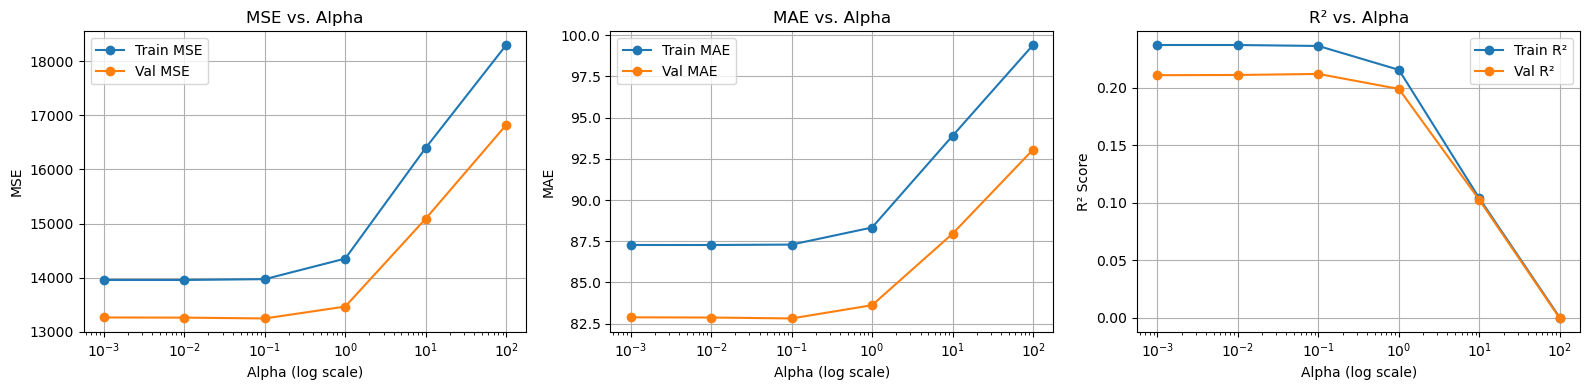

In [364]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

alpha_values = [0.001, 0.01, 0.1, 1, 10, 100]
lasso_models_4 = {}
train_mses_4, val_mses_4 = [], []
train_r2s_4, val_r2s_4 = [], []
train_maes_4, val_maes_4 = [], []
feature_names_4 = X_4_train_final.columns.tolist()
lasso_coeffs_dfs_4 = {}

print("Alpha\tTrain MSE\tVal MSE\t\tTrain R2\tVal R2\t\tTrain MAE\tVal MAE")

for alpha in alpha_values:
    lasso_4 = Lasso(alpha = alpha, max_iter = 10000)
    lasso_4.fit(X_4_train_final, y_4_train)
    coeffs_4 = lasso_4.coef_
    df_coeffs_4 = pd.DataFrame({'Feature': feature_names_4,'Coefficient': coeffs_4}).sort_values(
        by = 'Coefficient', key = abs, ascending = True).reset_index(drop = True)
    
    lasso_coeffs_dfs_4[alpha] = df_coeffs_4
    
    y_4_train_pred = lasso_4.predict(X_4_train_final)
    y_4_val_pred = lasso_4.predict(X_4_val_final)

    train_mse_4 = mean_squared_error(y_4_train, y_4_train_pred)
    val_mse_4 = mean_squared_error(y_4_val, y_4_val_pred)

    train_r2_4 = r2_score(y_4_train, y_4_train_pred)
    val_r2_4 = r2_score(y_4_val, y_4_val_pred)

    train_mae_4 = mean_absolute_error(y_4_train, y_4_train_pred)
    val_mae_4 = mean_absolute_error(y_4_val, y_4_val_pred)

    train_mses_4.append(train_mse_4)
    val_mses_4.append(val_mse_4)
    train_r2s_4.append(train_r2_4)
    val_r2s_4.append(val_r2_4)
    train_maes_4.append(train_mae_4)
    val_maes_4.append(val_mae_4)
    
    print(f"{alpha:.3f}\t{train_mse_4:.6f}\t\t{val_mse_4:.6f}\t\t{train_r2_4:.6f}\t\t{val_r2_4:.6f}\t\t{train_mae_4:.6f}\t\t{val_mae_4:.6f}")
    
    lasso_models_4[alpha] = lasso_4

##### Plotting #####
plt.figure(figsize = (16, 4))

# Plot MSE
plt.subplot(1, 3, 1)
plt.plot(alpha_values, train_mses_4, label = 'Train MSE', marker='o')
plt.plot(alpha_values, val_mses_4, label = 'Val MSE', marker='o')
plt.xscale('log')
plt.xlabel('Alpha (log scale)')
plt.ylabel('MSE')
plt.title('MSE vs. Alpha')
plt.legend()
plt.grid(True)

# Plot MAE
plt.subplot(1, 3, 2)
plt.plot(alpha_values, train_maes_4, label = 'Train MAE', marker = 'o')
plt.plot(alpha_values, val_maes_4, label = 'Val MAE', marker = 'o')
plt.xscale('log')
plt.xlabel('Alpha (log scale)')
plt.ylabel('MAE')
plt.title('MAE vs. Alpha')
plt.legend()
plt.grid(True)

# Plot R²
plt.subplot(1, 3, 3)
plt.plot(alpha_values, train_r2s_4, label = 'Train R²', marker = 'o')
plt.plot(alpha_values, val_r2s_4, label = 'Val R²', marker = 'o')
plt.xscale('log')
plt.xlabel('Alpha (log scale)')
plt.ylabel('R² Score')
plt.title('R² vs. Alpha')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [365]:
coeffs_df_4 = lasso_coeffs_dfs_4[1]
total_features_4 = len(coeffs_df_4)

non_zero_coeffs_4 = coeffs_df_4[coeffs_df_4['Coefficient'] != 0]
zero_coeffs_4 = coeffs_df_4[coeffs_df_4['Coefficient'] == 0]

print(f"Total features: {total_features_4}")
print(f"Non-zero coefficients: {len(non_zero_coeffs_4)}")
print(f"Zero coefficients: {len(zero_coeffs_4)}")

print("\n Non-zero Coefficients:")
print(non_zero_coeffs_4)

print("\n Zero Coefficients (feature names only):")
print(zero_coeffs_4['Feature'].tolist())

Total features: 62
Non-zero coefficients: 31
Zero coefficients: 31

 Non-zero Coefficients:
                   Feature  Coefficient
31            EMPLOYED_AGE    -0.128077
32      MALE_ALONE_LEI_DUR     0.303223
33   HIGHEDU_ALONE_LEI_DUR     0.497273
34         WEEKD_OTHER_DUR     0.821109
35       HIGHEDU_OTHER_DUR     1.305508
36          WEEKD_CHILDREN    -1.411731
37                MALE_AGE     1.515306
38        HIGHEDU_CHILDREN    -1.637848
39              MIDEDU_AGE    -2.142249
40  HIGHEDU_GROUP_WORK_DUR     2.578165
41          EMPLOYED_ADULT     3.385670
42        HIGHINC_CHILDREN    -3.921262
43                  MIDEDU    -4.443738
44           HIGHINC_ADULT     4.590455
45                   ADULT    -4.629695
46   HIGHINC_ALONE_LEI_DUR     5.981678
47    WEEKD_GROUP_WORK_DUR     6.022524
48  HIGHINC_GROUP_WORK_DUR     6.295207
49  EMPLOYED_ALONE_LEI_DUR     7.343667
50       HIGHINC_OTHER_DUR     8.762523
51                 HIGHEDU   -12.224388
52               WEEKD_AGE  

Evaluation on Test Set (alpha = 1):
Test MSE : 14618.556028
Test MAE : 87.383061
Test R²  : 0.193392


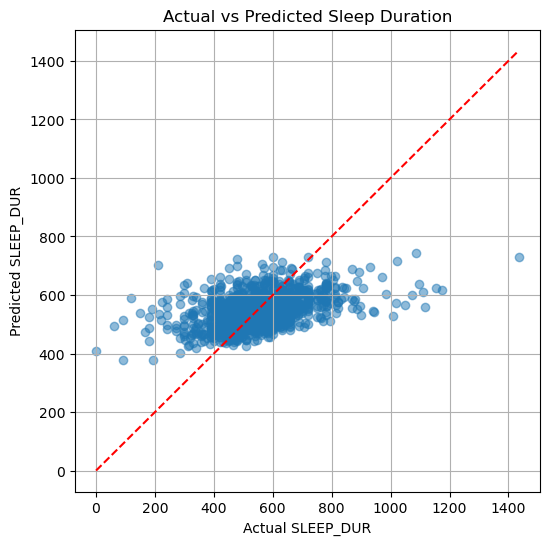

In [366]:
best_model_4 = lasso_models_4[1]

y_4_test_pred = best_model_4.predict(X_4_test_final)

test_mse_4 = mean_squared_error(y_4_test, y_4_test_pred)
test_mae_4 = mean_absolute_error(y_4_test, y_4_test_pred)
test_r2_4 = r2_score(y_4_test, y_4_test_pred)

print("Evaluation on Test Set (alpha = 1):")
print(f"Test MSE : {test_mse_4:.6f}")
print(f"Test MAE : {test_mae_4:.6f}")
print(f"Test R²  : {test_r2_4:.6f}")

results_df_4 = pd.DataFrame({
    'Actual SLEEP_DUR': y_4_test.values,
    'Predicted SLEEP_DUR': y_4_test_pred
})

results_df_4.head()

plt.figure(figsize = (6, 6))
plt.scatter(y_4_test, y_4_test_pred, alpha = 0.5)
plt.plot([y_4_test.min(), y_4_test.max()], [y_4_test.min(), y_4_test.max()], 'r--')
plt.xlabel('Actual SLEEP_DUR')
plt.ylabel('Predicted SLEEP_DUR')
plt.title('Actual vs Predicted Sleep Duration')
plt.grid(True)
plt.show()

#### Model Comparison: `+ OTHER_DUR + ALONE_LEI_DUR` vs. `+ GROUP_WORK_DUR`

We now compare:

1. **Model A**: Non-Duration Features + `OTHER_DUR` + `ALONE_LEI_DUR`
2. **Model B**: Model A + `GROUP_WORK_DUR`

---

##### Correlation with True `SLEEP_DUR`

| Model                                          | Correlation |
|------------------------------------------------|-------------|
| + `OTHER_DUR + ALONE_LEI_DUR`                 | **0.1682**   |
| + `OTHER_DUR + ALONE_LEI_DUR + GROUP_WORK_DUR`| **0.3387**   |

- Correlation **doubles** after adding `GROUP_WORK_DUR`, suggesting this feature adds substantial linear signal to the model.

---

##### Validation Performance Across Alpha Values

| Alpha  | Val R² (MODEL A) | Val R² (MODEL B) |
|--------|------------------|------------------|
| 0.001  | 0.1841           | 0.2108       |
| 0.010  | 0.1841           | 0.2110       |
| 0.100  | 0.1838           | 0.2119       |
| 1.000  | 0.1704           | 0.1989       |
| 10.000 | 0.0383           | 0.1024       |
| 100.000| -0.0006          | -0.0006          |

- The addition of `GROUP_WORK_DUR` yields consistent gains across all alpha values — a sign of stronger generalization and more meaningful feature contribution.

---

##### Test Evaluation

| Metric        | MODEL A (α = 0.1) | MODEL B (α = 0.1) |
|---------------|---------------------------|-----------------------------|
| **Test MSE**  | 15390.747291                | **14482.296538**               |
| **Test MAE**  | 90.386745 minutes             | **87.325359 minutes**           |
| **Test R²**   | 0.150785                    | **0.200911**                  |

- Test R² increases by **over 5 percentage points**, confirming stronger out-of-sample performance.

---

##### Percentage Change Analysis

| Metric        | % Change After Adding `GROUP_WORK_DUR` |
|---------------|------------------------------------------|
| **Test MSE**  | ↓ **5.96%**                              |
| **Test MAE**  | ↓ **3.59%**                              |
| **Test R²**   | ↑ **33.22%**                             |
| **Correlation** | ↑ **101.4%**                          |

- Correlation **more than doubles**, and test R² increases by **33%**, representing a significant enhancement in model fidelity.
- MSE and MAE both decline, indicating lower error and better accuracy.

---

##### Leakage Check Perspective

- A correlation of **0.34** is **well below the critical range (~0.90+)**, so the model is still learning meaningfully rather than "solving" by subtraction from total time.

---

##### Conclusion

- Adding `GROUP_WORK_DUR` brings **strong predictive value** to the model.
- The **improvements are consistent** across validation and test sets, reducing error and boosting R².
- There are **no signs of leakage** or artificial inflation — the model is still far from overfitting.

**It is worth adding `GROUP_WORK_DUR` to the model.**

**Next step**: Add `ALONE_WORK_DUR` and repeat the evaluation.


### Non-Duration Features Model + OTHER_DUR + ALONE_LEI_DUR + GROUP_WORK_DUR + GROUP_LEI_DUR (M3_5)

In [369]:
import numpy as np
import pandas as pd
import warnings

warnings.filterwarnings("ignore", category = pd.errors.PerformanceWarning)

##### Reading Data #####
df_activity_5 = pd.read_csv("D_PER_DAY.csv", header = 0)
df_activity_5.drop('CASEID', axis = 1, inplace = True)

##### Dropping Features #####
df_activity_5.drop(columns = [col for col in df_activity_5.columns if col.endswith('_DUR') 
                            and col not in ['SLEEP_DUR', 'OTHER_DUR', 'ALONE_LEI_DUR',
                                            'GROUP_WORK_DUR', 'GROUP_LEI_DUR']], inplace = True)

##### Summary of Dataset #####
# Select only columns that end with '_DUR'
duration_cols = [col for col in df_activity_5.columns if col.endswith('_DUR')]

# Sum across those duration columns for each row
row_durations = df_activity_5[duration_cols].sum(axis = 1)

# Get summary statistics
Summary = row_durations.describe()

# Print the result
print("Summary of Total Duration Columns per Row:")
print(Summary)

##### Checking the Interdependency between the Features #####
rank = np.linalg.matrix_rank(df_activity_5.values)
num_features = df_activity_5.values.shape[1]

print("Rank of the DataFrame:", rank)
print("Number of features (columns):", num_features)

##### One-hot Encoding #####
# Whether it is a weekday or not #
df_activity_5['WEEKD'] = np.where(df_activity_5['DIARYDAY'].isin([1,7]), 0, 1)

# Education level (low, mid, hight) #
df_activity_5['MIDEDU'] = np.where(df_activity_5['EDU'].isin([40,41,42]), 1, 0)
df_activity_5['HIGHEDU'] = np.where(df_activity_5['EDU'].isin([43,44,45,46]), 1, 0)

# Whether lives in a stationary house or not #
df_activity_5['PERSHOU'] = np.where(df_activity_5['HOUSE'] == 1, 1, 0)

# Income level (low, mid, high) #
df_activity_5['MIDINC'] = np.where(df_activity_5['INC'].isin([9,10,11,12,13]), 1, 0)
df_activity_5['HIGHINC'] = np.where(df_activity_5['INC'].isin([14,15,16]), 1, 0)

# Whether at work or not #
df_activity_5['EMPLOYED'] = np.where(df_activity_5['EMP_STAT'] == 1, 1, 0)

# Whether male or not #
df_activity_5['MALE'] = np.where(df_activity_5['SEX'] == 1, 1, 0)

# Dropping previous columns #
cols_to_drop = ['DIARYDAY', 'EDU', 'HOUSE', 'INC', 'EMP_STAT', 'SEX']
df_activity_5.drop(columns = cols_to_drop, inplace = True)


##### Moving Target Column to the End of the Dataset #####
cols = [col for col in df_activity_5.columns if col != 'SLEEP_DUR'] + ['SLEEP_DUR']
df_activity_5 = df_activity_5[cols]

print(df_activity_5.columns.tolist())

df_activity_5.head(10)

Summary of Total Duration Columns per Row:
count    8548.000000
mean     1260.226018
std       195.193997
min         0.000000
25%      1200.000000
50%      1330.000000
75%      1399.000000
max      1440.000000
dtype: float64
Rank of the DataFrame: 14
Number of features (columns): 14
['GROUP_WORK_DUR', 'ALONE_LEI_DUR', 'GROUP_LEI_DUR', 'OTHER_DUR', 'AGE', 'CHILDREN', 'ADULT', 'WEEKD', 'MIDEDU', 'HIGHEDU', 'PERSHOU', 'MIDINC', 'HIGHINC', 'EMPLOYED', 'MALE', 'SLEEP_DUR']


GROUP_WORK_DUR  ALONE_LEI_DUR  GROUP_LEI_DUR  OTHER_DUR  AGE  CHILDREN  \
0               0            300              0        185   23         0   
1               0            520              0        340   57         0   
2               0            705              0        130   80         0   
3               0            420            405        195   71         0   
4             350              0              0        360   40         2   
5               0            105            290        130   80         0   
6               0              0            185        660   56         0   
7             270             78            124        288   18         0   
8               0            120              0        385   68         0   
9             315              0              0        185   21         0   

   ADULT  WEEKD  MIDEDU  HIGHEDU  PERSHOU  MIDINC  HIGHINC  EMPLOYED  MALE  \
0      1      1       0        0        1       0        0         1     1   
1      1      0       0        1        1       1        0         0     0   
2      1      0       1        0        1       0        0         0     0   
3      2      0       1        0        1       0        1         0     1   
4      2      1       0        1        1       0        1         1     1   
5      2      1       0        1        1       0        1         1     0   
6      2      0       0        0        1       1        0         1     0   
7      3      0       0        0        1       1        0         1     0   
8      1      1       0        1        1       0        1         1     1   
9      1      1       1        0        1       1        0         1     1   

   SLEEP_DUR  
0        565  
1        580  
2        435  
3        420  
4        590  
5        570  
6        465  
7        600  
8        515  
9        540

In [370]:
# Identify only _DUR columns except SLEEP_DUR
dur_cols_5 = [col for col in df_activity_5.columns if col.endswith('_DUR') and col != 'SLEEP_DUR']

# Check for potential leakage
df_activity_5["NON_SLEEP_TOTAL"] = df_activity_5[dur_cols_5].sum(axis=1)
df_activity_5["ESTIMATED_SLEEP"] = 1440 - df_activity_5["NON_SLEEP_TOTAL"]

# Correlation between estimated and actual sleep
correlation_5 = df_activity_5["ESTIMATED_SLEEP"].corr(df_activity_5["SLEEP_DUR"])
print("Correlation with true SLEEP_DUR:", correlation_5)

Correlation with true SLEEP_DUR: 0.4143440486539214


In [371]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


X_5 = df_activity_5.loc[:, "GROUP_WORK_DUR":"MALE"]
y_5 = df_activity_5["SLEEP_DUR"]

dummy_cols = ['WEEKD', 'MIDEDU', 'HIGHEDU', 'PERSHOU', 'MIDINC', 'HIGHINC', 'EMPLOYED', 'MALE']
numeric_cols = [col for col in X_5.columns if col not in dummy_cols]

##### Spliting Data #####
X_5_train, X_5_temp, y_5_train, y_5_temp = train_test_split(
    X_5, y_5, test_size = 0.3, random_state = 42
)

X_5_test, X_5_val, y_5_test, y_5_val = train_test_split(
    X_5_temp, y_5_temp, test_size = 0.5, random_state = 42
)

##### Scaling the Data Values #####
scaler = StandardScaler()

X_5_train_scaled = pd.DataFrame(scaler.fit_transform(X_5_train[numeric_cols]), 
                              columns = numeric_cols, index = X_5_train.index)
X_5_val_scaled = pd.DataFrame(scaler.transform(X_5_val[numeric_cols]), 
                            columns = numeric_cols, index = X_5_val.index)
X_5_test_scaled = pd.DataFrame(scaler.transform(X_5_test[numeric_cols]), 
                             columns = numeric_cols, index = X_5_test.index)

# Recombining Numerical and Dummy Columns
X_5_train_final = pd.concat([X_5_train_scaled, X_5_train[dummy_cols]], axis = 1)
X_5_val_final = pd.concat([X_5_val_scaled, X_5_val[dummy_cols]], axis = 1)
X_5_test_final = pd.concat([X_5_test_scaled, X_5_test[dummy_cols]], axis = 1)

##### Slope Interactions #####
for dummy in dummy_cols:
    for numeric in numeric_cols:
        interaction_term = f"{dummy}_{numeric}"
        X_5_train_final[interaction_term] = X_5_train_final[dummy] * X_5_train_final[numeric]
        X_5_val_final[interaction_term] = X_5_val_final[dummy] * X_5_val_final[numeric]
        X_5_test_final[interaction_term] = X_5_test_final[dummy] * X_5_test_final[numeric]


X_5_val_final.head()


GROUP_WORK_DUR  ALONE_LEI_DUR  GROUP_LEI_DUR  OTHER_DUR       AGE  \
1578       -0.445614      -0.711635       0.573222   0.479317 -0.628382   
5282        1.861014      -0.560437      -0.246606  -0.885350 -1.005842   
2905       -0.445614       0.875943      -0.832198   0.597778  1.420686   
7111       -0.123759       2.110725      -0.832198  -1.179133 -0.520536   
7126       -0.445614       0.497948      -0.832198   0.337164 -0.520536   

      CHILDREN     ADULT  WEEKD  MIDEDU  HIGHEDU  ...  EMPLOYED_AGE  \
1578  1.572253  0.139202      0       0        1  ...     -0.000000   
5282 -0.529119 -1.116979      1       0        1  ...     -1.005842   
2905 -0.529119 -1.116979      1       0        0  ...      0.000000   
7111  1.572253  0.139202      0       0        1  ...     -0.520536   
7126 -0.529119 -1.116979      0       0        1  ...     -0.520536   

      EMPLOYED_CHILDREN  EMPLOYED_ADULT  MALE_GROUP_WORK_DUR  \
1578           0.000000        0.000000            -0.000000   
5282          -0.529119       -1.116979             0.000000   
2905          -0.000000       -0.000000            -0.445614   
7111           1.572253        0.139202            -0.123759   
7126          -0.529119       -1.116979            -0.000000   

      MALE_ALONE_LEI_DUR  MALE_GROUP_LEI_DUR  MALE_OTHER_DUR  MALE_AGE  \
1578           -0.000000            0.000000        0.000000 -0.000000   
5282           -0.000000           -0.000000       -0.000000 -0.000000   
2905            0.875943           -0.832198        0.597778  1.420686   
7111            2.110725           -0.832198       -1.179133 -0.520536   
7126            0.000000           -0.000000        0.000000 -0.000000   

      MALE_CHILDREN  MALE_ADULT  
1578       0.000000    0.000000  
5282      -0.000000   -0.000000  
2905      -0.529119   -1.116979  
7111       1.572253    0.139202  
7126      -0.000000   -0.000000  

[5 rows x 71 columns]

Alpha	Train MSE	Val MSE		Train R2	Val R2		Train MAE	Val MAE
0.001	11176.359853		10078.724777		0.389135		0.400482		76.479332		73.216300
0.010	11176.672886		10084.282922		0.389118		0.400152		76.483558		73.238191
0.100	11200.927159		10182.469033		0.387792		0.394311		76.648800		73.639936
1.000	11743.657759		10768.408594		0.358128		0.359458		79.297633		76.053740
10.000	16169.169492		14864.403836		0.116243		0.115813		93.319684		87.467278
100.000	18295.953961		16821.294068		0.000000		-0.000589		99.405985		93.057338


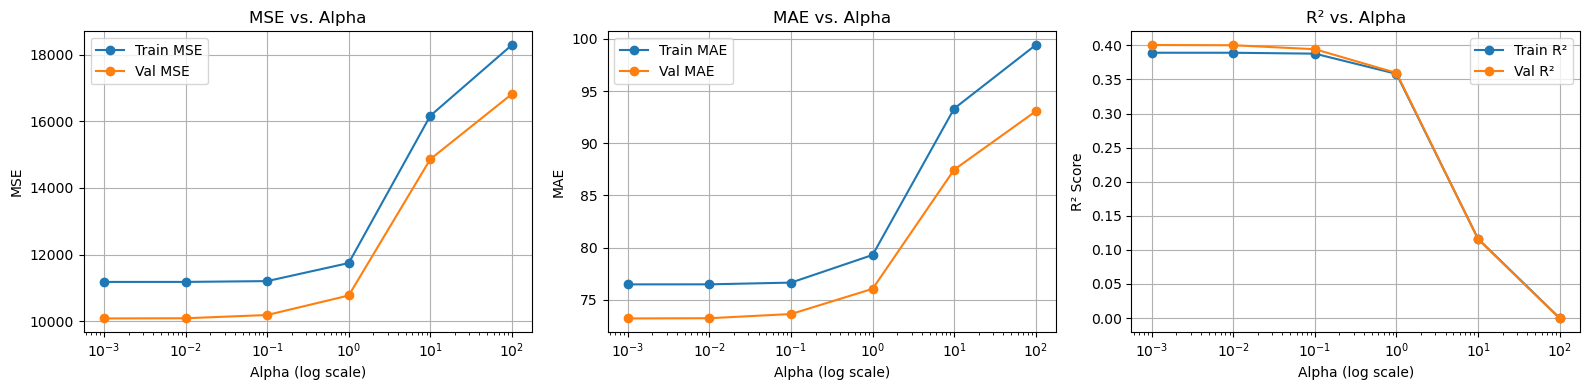

In [372]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

alpha_values = [0.001, 0.01, 0.1, 1, 10, 100]
lasso_models_5 = {}
train_mses_5, val_mses_5 = [], []
train_r2s_5, val_r2s_5 = [], []
train_maes_5, val_maes_5 = [], []
feature_names_5 = X_5_train_final.columns.tolist()
lasso_coeffs_dfs_5 = {}

print("Alpha\tTrain MSE\tVal MSE\t\tTrain R2\tVal R2\t\tTrain MAE\tVal MAE")

for alpha in alpha_values:
    lasso_5 = Lasso(alpha = alpha, max_iter = 10000)
    lasso_5.fit(X_5_train_final, y_5_train)
    coeffs_5 = lasso_5.coef_
    df_coeffs_5 = pd.DataFrame({'Feature': feature_names_5,'Coefficient': coeffs_5}).sort_values(
        by = 'Coefficient', key = abs, ascending = True).reset_index(drop = True)
    
    lasso_coeffs_dfs_5[alpha] = df_coeffs_5
    
    y_5_train_pred = lasso_5.predict(X_5_train_final)
    y_5_val_pred = lasso_5.predict(X_5_val_final)

    train_mse_5 = mean_squared_error(y_5_train, y_5_train_pred)
    val_mse_5 = mean_squared_error(y_5_val, y_5_val_pred)

    train_r2_5 = r2_score(y_5_train, y_5_train_pred)
    val_r2_5 = r2_score(y_5_val, y_5_val_pred)

    train_mae_5 = mean_absolute_error(y_5_train, y_5_train_pred)
    val_mae_5 = mean_absolute_error(y_5_val, y_5_val_pred)

    train_mses_5.append(train_mse_5)
    val_mses_5.append(val_mse_5)
    train_r2s_5.append(train_r2_5)
    val_r2s_5.append(val_r2_5)
    train_maes_5.append(train_mae_5)
    val_maes_5.append(val_mae_5)
    
    print(f"{alpha:.3f}\t{train_mse_5:.6f}\t\t{val_mse_5:.6f}\t\t{train_r2_5:.6f}\t\t{val_r2_5:.6f}\t\t{train_mae_5:.6f}\t\t{val_mae_5:.6f}")
    
    lasso_models_5[alpha] = lasso_5

##### Plotting #####
plt.figure(figsize = (16, 4))

# Plot MSE
plt.subplot(1, 3, 1)
plt.plot(alpha_values, train_mses_5, label = 'Train MSE', marker='o')
plt.plot(alpha_values, val_mses_5, label = 'Val MSE', marker='o')
plt.xscale('log')
plt.xlabel('Alpha (log scale)')
plt.ylabel('MSE')
plt.title('MSE vs. Alpha')
plt.legend()
plt.grid(True)

# Plot MAE
plt.subplot(1, 3, 2)
plt.plot(alpha_values, train_maes_5, label = 'Train MAE', marker = 'o')
plt.plot(alpha_values, val_maes_5, label = 'Val MAE', marker = 'o')
plt.xscale('log')
plt.xlabel('Alpha (log scale)')
plt.ylabel('MAE')
plt.title('MAE vs. Alpha')
plt.legend()
plt.grid(True)

# Plot R²
plt.subplot(1, 3, 3)
plt.plot(alpha_values, train_r2s_5, label = 'Train R²', marker = 'o')
plt.plot(alpha_values, val_r2s_5, label = 'Val R²', marker = 'o')
plt.xscale('log')
plt.xlabel('Alpha (log scale)')
plt.ylabel('R² Score')
plt.title('R² vs. Alpha')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [373]:
coeffs_df_5 = lasso_coeffs_dfs_5[1]
total_features_5 = len(coeffs_df_5)

non_zero_coeffs_5 = coeffs_df_5[coeffs_df_5['Coefficient'] != 0]
zero_coeffs_5 = coeffs_df_5[coeffs_df_5['Coefficient'] == 0]

print(f"Total features: {total_features_5}")
print(f"Non-zero coefficients: {len(non_zero_coeffs_5)}")
print(f"Zero coefficients: {len(zero_coeffs_5)}")

print("\n Non-zero Coefficients:")
print(non_zero_coeffs_5)

print("\n Zero Coefficients (feature names only):")
print(zero_coeffs_5['Feature'].tolist())

Total features: 71
Non-zero coefficients: 34
Zero coefficients: 37

 Non-zero Coefficients:
                   Feature  Coefficient
37          EMPLOYED_ADULT     0.012593
38   PERSHOU_GROUP_LEI_DUR    -0.579040
39          WEEKD_CHILDREN    -0.843236
40           PERSHOU_ADULT     1.085664
41       HIGHEDU_OTHER_DUR     1.946137
42    MIDINC_GROUP_LEI_DUR    -2.601549
43           HIGHINC_ADULT     3.092406
44  HIGHEDU_GROUP_WORK_DUR     3.712330
45              MIDEDU_AGE    -4.313335
46        HIGHINC_CHILDREN    -4.313933
47                  MIDEDU    -5.540602
48                     AGE    -6.636793
49                MALE_AGE     6.716913
50   HIGHINC_ALONE_LEI_DUR     7.148705
51  HIGHINC_GROUP_WORK_DUR     7.387133
52               WEEKD_AGE    10.453820
53       HIGHINC_OTHER_DUR    11.134934
54            EMPLOYED_AGE   -12.181704
55                    MALE   -14.346378
56     WEEKD_ALONE_LEI_DUR    15.033019
57         WEEKD_OTHER_DUR    15.408922
58                 HIGHINC  

Evaluation on Test Set (alpha = 0.1):
Test MSE : 12298.195212
Test MAE : 80.108825
Test R²  : 0.321423


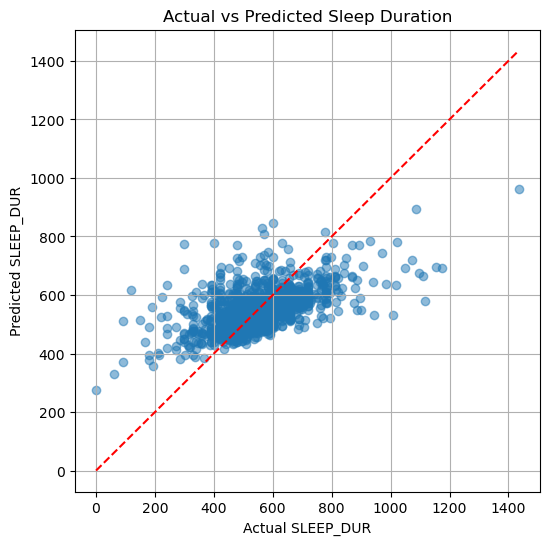

In [374]:
best_model_5 = lasso_models_5[1]

y_5_test_pred = best_model_5.predict(X_5_test_final)

test_mse_5 = mean_squared_error(y_5_test, y_5_test_pred)
test_mae_5 = mean_absolute_error(y_5_test, y_5_test_pred)
test_r2_5 = r2_score(y_5_test, y_5_test_pred)

print("Evaluation on Test Set (alpha = 0.1):")
print(f"Test MSE : {test_mse_5:.6f}")
print(f"Test MAE : {test_mae_5:.6f}")
print(f"Test R²  : {test_r2_5:.6f}")

results_df_5 = pd.DataFrame({
    'Actual SLEEP_DUR': y_5_test.values,
    'Predicted SLEEP_DUR': y_5_test_pred
})

results_df_5.head()

plt.figure(figsize = (6, 6))
plt.scatter(y_5_test, y_5_test_pred, alpha = 0.5)
plt.plot([y_5_test.min(), y_5_test.max()], [y_5_test.min(), y_5_test.max()], 'r--')
plt.xlabel('Actual SLEEP_DUR')
plt.ylabel('Predicted SLEEP_DUR')
plt.title('Actual vs Predicted Sleep Duration')
plt.grid(True)
plt.show()

#### Model Comparison: `+ GROUP_WORK_DUR` vs. `+ GROUP_LEI_DUR`

We compare:

1. **Model A**: `OTHER_DUR` + `ALONE_LEI_DUR` + `GROUP_WORK_DUR`
2. **Model B**: Model A + `GROUP_LEI_DUR`

---

##### Correlation with True `SLEEP_DUR`

| Model                                                   | Correlation |
|----------------------------------------------------------|-------------|
| + `OTHER_DUR + ALONE_LEI_DUR + GROUP_WORK_DUR`          | **0.3387**  |
| + `OTHER_DUR + ALONE_LEI_DUR + GROUP_WORK_DUR + GROUP_LEI_DUR` | **0.4143**  |

- Correlation increases by **~22.3%**, indicating a meaningful gain in linear alignment with `SLEEP_DUR`.

---

##### Validation Performance Across Alpha Values

| Alpha  | Val R² (before) | Val R² (after) | Absolute Δ | Relative Δ (%) |
|--------|------------------|----------------|------------|----------------|
| 0.001  | 0.2115           | 0.4005     | +0.1890    | +89.34%    |
| 0.010  | 0.2116           | 0.4002         | +0.1886    | +89.12%        |
| 0.100  | 0.2121           | 0.3943         | +0.1822    | +85.90%        |
| 1.000  | 0.1980           | 0.3595         | +0.1615    | +81.57%        |
| 10.000 | 0.1024           | 0.1158         | +0.0134    | +13.09%        |
| 100.000| -0.0006          | -0.0006        | ~0.0000    | ~0.00%         |


- Validation **R² nearly doubles** across effective alpha values — a strong indicator of feature value.

---

##### Test Evaluation (α = 0.1)

| Metric        | MODEL A             | MODEL B             | Absolute Δ | Relative Δ (%) |
|---------------|---------------------|---------------------|------------|----------------|
| **Test MSE**  | 14482.296538           | **11881.175908**       | -2,545.96  | ↓ **17.61%**   |
| **Test MAE**  | 87.325359 minutes       | **78.135641 minutes**   | -9.06      | ↓ **10.40%**   |
| **Test R²**   | 0.200911              | **0.344433**          | +0.1405    | ↑ **69.39%**   |

- Substantial gains in test performance, especially in **MAE and R²**, underscore the importance of this new variable.
---

##### Percentage Change Summary

| Metric        | % Change After Adding `GROUP_LEI_DUR` |
|---------------|----------------------------------------|
| **Test MSE**  | ↓ **17.61%**                           |
| **Test MAE**  | ↓ **10.40%**                           |
| **Test R²**   | ↑ **69.39%**                           |
| **Correlation** | ↑ **22.3%**                          |

- These are **significant improvements** across all metrics — test R² jumps by nearly **70%**, and test MAE drops by **over 9 minutes**.

---

##### Leakage Check Perspective

- A correlation of **0.414** remains **well below the danger zone** (~0.90), suggesting the model is not relying on residual time subtraction.
- The performance boost appears to stem from genuine behavioral signal, not leakage.

---

##### Conclusion

- `GROUP_LEI_DUR` offers **high explanatory power** and boosts overall model accuracy considerably.
- Improvements are evident across training, validation, and test phases.
- There's **no indication of overfitting**, and the correlation remains at a healthy level.

**It is clearly worth adding `GROUP_LEI_DUR` to the model.**

**Next step**: Evaluate the impact of adding `ALONE_WORK_DUR`.


### Non-Duration Features Model + OTHER_DUR + ALONE_LEI_DUR + GROUP_WORK_DUR + GROUP_LEI_DUR + ALONE_WORK_DUR (M3_6)

In [377]:
import numpy as np
import pandas as pd
import warnings

warnings.filterwarnings("ignore", category = pd.errors.PerformanceWarning)

##### Reading Data #####
df_activity_6 = pd.read_csv("D_PER_DAY.csv", header = 0)
df_activity_6.drop('CASEID', axis = 1, inplace = True)

##### Dropping Features #####
df_activity_6.drop(columns = [col for col in df_activity_6.columns if col.endswith('_DUR') 
                            and col not in ['SLEEP_DUR', 'OTHER_DUR', 'ALONE_LEI_DUR',
                                            'GROUP_WORK_DUR', 'GROUP_LEI_DUR', 'ALONE_WORK_DUR']], inplace = True)

##### Summary of Dataset #####
# Select only columns that end with '_DUR'
duration_cols = [col for col in df_activity_6.columns if col.endswith('_DUR')]

# Sum across those duration columns for each row
row_durations = df_activity_6[duration_cols].sum(axis = 1)

# Get summary statistics
Summary = row_durations.describe()

# Print the result
print("Summary of Total Duration Columns per Row:")
print(Summary)

##### Checking the Interdependency between the Features #####
rank = np.linalg.matrix_rank(df_activity_6.values)
num_features = df_activity_6.values.shape[1]

print("Rank of the DataFrame:", rank)
print("Number of features (columns):", num_features)

##### One-hot Encoding #####
# Whether it is a weekday or not #
df_activity_6['WEEKD'] = np.where(df_activity_6['DIARYDAY'].isin([1,7]), 0, 1)

# Education level (low, mid, hight) #
df_activity_6['MIDEDU'] = np.where(df_activity_6['EDU'].isin([40,41,42]), 1, 0)
df_activity_6['HIGHEDU'] = np.where(df_activity_6['EDU'].isin([43,44,45,46]), 1, 0)

# Whether lives in a stationary house or not #
df_activity_6['PERSHOU'] = np.where(df_activity_6['HOUSE'] == 1, 1, 0)

# Income level (low, mid, high) #
df_activity_6['MIDINC'] = np.where(df_activity_6['INC'].isin([9,10,11,12,13]), 1, 0)
df_activity_6['HIGHINC'] = np.where(df_activity_6['INC'].isin([14,15,16]), 1, 0)

# Whether at work or not #
df_activity_6['EMPLOYED'] = np.where(df_activity_6['EMP_STAT'] == 1, 1, 0)

# Whether male or not #
df_activity_6['MALE'] = np.where(df_activity_6['SEX'] == 1, 1, 0)

# Dropping previous columns #
cols_to_drop = ['DIARYDAY', 'EDU', 'HOUSE', 'INC', 'EMP_STAT', 'SEX']
df_activity_6.drop(columns = cols_to_drop, inplace = True)


##### Moving Target Column to the End of the Dataset #####
cols = [col for col in df_activity_6.columns if col != 'SLEEP_DUR'] + ['SLEEP_DUR']
df_activity_6 = df_activity_6[cols]

print(df_activity_6.columns.tolist())

df_activity_6.head(10)

Summary of Total Duration Columns per Row:
count    8548.000000
mean     1322.210810
std       124.466218
min       395.000000
25%      1279.750000
50%      1355.000000
75%      1410.000000
max      1440.000000
dtype: float64
Rank of the DataFrame: 15
Number of features (columns): 15
['ALONE_WORK_DUR', 'GROUP_WORK_DUR', 'ALONE_LEI_DUR', 'GROUP_LEI_DUR', 'OTHER_DUR', 'AGE', 'CHILDREN', 'ADULT', 'WEEKD', 'MIDEDU', 'HIGHEDU', 'PERSHOU', 'MIDINC', 'HIGHINC', 'EMPLOYED', 'MALE', 'SLEEP_DUR']


ALONE_WORK_DUR  GROUP_WORK_DUR  ALONE_LEI_DUR  GROUP_LEI_DUR  OTHER_DUR  \
0               0               0            300              0        185   
1               0               0            520              0        340   
2               0               0            705              0        130   
3               0               0            420            405        195   
4             120             350              0              0        360   
5               0               0            105            290        130   
6               0               0              0            185        660   
7               0             270             78            124        288   
8             420               0            120              0        385   
9             225             315              0              0        185   

   AGE  CHILDREN  ADULT  WEEKD  MIDEDU  HIGHEDU  PERSHOU  MIDINC  HIGHINC  \
0   23         0      1      1       0        0        1       0        0   
1   57         0      1      0       0        1        1       1        0   
2   80         0      1      0       1        0        1       0        0   
3   71         0      2      0       1        0        1       0        1   
4   40         2      2      1       0        1        1       0        1   
5   80         0      2      1       0        1        1       0        1   
6   56         0      2      0       0        0        1       1        0   
7   18         0      3      0       0        0        1       1        0   
8   68         0      1      1       0        1        1       0        1   
9   21         0      1      1       1        0        1       1        0   

   EMPLOYED  MALE  SLEEP_DUR  
0         1     1        565  
1         0     0        580  
2         0     0        435  
3         0     1        420  
4         1     1        590  
5         1     0        570  
6         1     0        465  
7         1     0        600  
8         1     1        515  
9         1     1        540

In [378]:
# Identify only _DUR columns except SLEEP_DUR
dur_cols_6 = [col for col in df_activity_6.columns if col.endswith('_DUR') and col != 'SLEEP_DUR']

# Check for potential leakage
df_activity_6["NON_SLEEP_TOTAL"] = df_activity_6[dur_cols_6].sum(axis=1)
df_activity_6["ESTIMATED_SLEEP"] = 1440 - df_activity_6["NON_SLEEP_TOTAL"]

# Correlation between estimated and actual sleep
correlation_6 = df_activity_6["ESTIMATED_SLEEP"].corr(df_activity_6["SLEEP_DUR"])
print("Correlation with true SLEEP_DUR:", correlation_6)

Correlation with true SLEEP_DUR: 0.6911420102873888


In [379]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


X_6 = df_activity_6.loc[:, "ALONE_WORK_DUR":"MALE"]
y_6 = df_activity_6["SLEEP_DUR"]

dummy_cols = ['WEEKD', 'MIDEDU', 'HIGHEDU', 'PERSHOU', 'MIDINC', 'HIGHINC', 'EMPLOYED', 'MALE']
numeric_cols = [col for col in X_6.columns if col not in dummy_cols]

##### Spliting Data #####
X_6_train, X_6_temp, y_6_train, y_6_temp = train_test_split(
    X_6, y_6, test_size = 0.3, random_state = 42
)

X_6_test, X_6_val, y_6_test, y_6_val = train_test_split(
    X_6_temp, y_6_temp, test_size = 0.5, random_state = 42
)

##### Scaling the Data Values #####
scaler = StandardScaler()

X_6_train_scaled = pd.DataFrame(scaler.fit_transform(X_6_train[numeric_cols]), 
                              columns = numeric_cols, index = X_6_train.index)
X_6_val_scaled = pd.DataFrame(scaler.transform(X_6_val[numeric_cols]), 
                            columns = numeric_cols, index = X_6_val.index)
X_6_test_scaled = pd.DataFrame(scaler.transform(X_6_test[numeric_cols]), 
                             columns = numeric_cols, index = X_6_test.index)

# Recombining Numerical and Dummy Columns
X_6_train_final = pd.concat([X_6_train_scaled, X_6_train[dummy_cols]], axis = 1)
X_6_val_final = pd.concat([X_6_val_scaled, X_6_val[dummy_cols]], axis = 1)
X_6_test_final = pd.concat([X_6_test_scaled, X_6_test[dummy_cols]], axis = 1)

##### Slope Interactions #####
for dummy in dummy_cols:
    for numeric in numeric_cols:
        interaction_term = f"{dummy}_{numeric}"
        X_6_train_final[interaction_term] = X_6_train_final[dummy] * X_6_train_final[numeric]
        X_6_val_final[interaction_term] = X_6_val_final[dummy] * X_6_val_final[numeric]
        X_6_test_final[interaction_term] = X_6_test_final[dummy] * X_6_test_final[numeric]


X_6_val_final.head()


ALONE_WORK_DUR  GROUP_WORK_DUR  ALONE_LEI_DUR  GROUP_LEI_DUR  OTHER_DUR  \
1578       -0.378701       -0.445614      -0.711635       0.573222   0.479317   
5282       -0.378701        1.861014      -0.560437      -0.246606  -0.885350   
2905       -0.378701       -0.445614       0.875943      -0.832198   0.597778   
7111       -0.378701       -0.123759       2.110725      -0.832198  -1.179133   
7126       -0.378701       -0.445614       0.497948      -0.832198   0.337164   

           AGE  CHILDREN     ADULT  WEEKD  MIDEDU  ...  EMPLOYED_CHILDREN  \
1578 -0.628382  1.572253  0.139202      0       0  ...           0.000000   
5282 -1.005842 -0.529119 -1.116979      1       0  ...          -0.529119   
2905  1.420686 -0.529119 -1.116979      1       0  ...          -0.000000   
7111 -0.520536  1.572253  0.139202      0       0  ...           1.572253   
7126 -0.520536 -0.529119 -1.116979      0       0  ...          -0.529119   

      EMPLOYED_ADULT  MALE_ALONE_WORK_DUR  MALE_GROUP_WORK_DUR  \
1578        0.000000            -0.000000            -0.000000   
5282       -1.116979            -0.000000             0.000000   
2905       -0.000000            -0.378701            -0.445614   
7111        0.139202            -0.378701            -0.123759   
7126       -1.116979            -0.000000            -0.000000   

      MALE_ALONE_LEI_DUR  MALE_GROUP_LEI_DUR  MALE_OTHER_DUR  MALE_AGE  \
1578           -0.000000            0.000000        0.000000 -0.000000   
5282           -0.000000           -0.000000       -0.000000 -0.000000   
2905            0.875943           -0.832198        0.597778  1.420686   
7111            2.110725           -0.832198       -1.179133 -0.520536   
7126            0.000000           -0.000000        0.000000 -0.000000   

      MALE_CHILDREN  MALE_ADULT  
1578       0.000000    0.000000  
5282      -0.000000   -0.000000  
2905      -0.529119   -1.116979  
7111       1.572253    0.139202  
7126      -0.000000   -0.000000  

[5 rows x 80 columns]

Alpha	Train MSE	Val MSE		Train R2	Val R2		Train MAE	Val MAE
0.001	8479.407466		7707.016135		0.536542		0.541560		66.353723		64.572479
0.010	8479.836465		7708.505164		0.536518		0.541471		66.351934		64.566022
0.100	8507.828518		7757.019903		0.534989		0.538585		66.476501		64.676568
1.000	8907.539532		8039.845976		0.513142		0.521762		68.229029		65.637754
10.000	12222.980753		11058.974489		0.331930		0.342174		80.320656		75.353393
100.000	18295.953961		16821.294068		0.000000		-0.000589		99.405985		93.057338


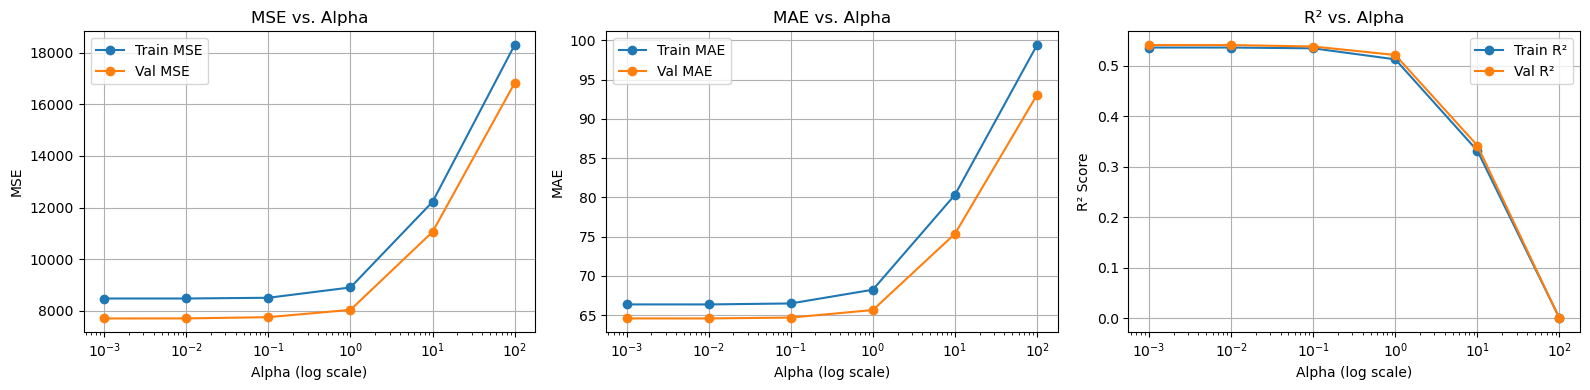

In [380]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

alpha_values = [0.001, 0.01, 0.1, 1, 10, 100]
lasso_models_6 = {}
train_mses_6, val_mses_6 = [], []
train_r2s_6, val_r2s_6 = [], []
train_maes_6, val_maes_6 = [], []
feature_names_6 = X_6_train_final.columns.tolist()
lasso_coeffs_dfs_6 = {}

print("Alpha\tTrain MSE\tVal MSE\t\tTrain R2\tVal R2\t\tTrain MAE\tVal MAE")

for alpha in alpha_values:
    lasso_6 = Lasso(alpha = alpha, max_iter = 10000)
    lasso_6.fit(X_6_train_final, y_6_train)
    coeffs_6 = lasso_6.coef_
    df_coeffs_6 = pd.DataFrame({'Feature': feature_names_6,'Coefficient': coeffs_6}).sort_values(
        by = 'Coefficient', key = abs, ascending = True).reset_index(drop = True)
    
    lasso_coeffs_dfs_6[alpha] = df_coeffs_6
    
    y_6_train_pred = lasso_6.predict(X_6_train_final)
    y_6_val_pred = lasso_6.predict(X_6_val_final)

    train_mse_6 = mean_squared_error(y_6_train, y_6_train_pred)
    val_mse_6 = mean_squared_error(y_6_val, y_6_val_pred)

    train_r2_6 = r2_score(y_6_train, y_6_train_pred)
    val_r2_6 = r2_score(y_6_val, y_6_val_pred)

    train_mae_6 = mean_absolute_error(y_6_train, y_6_train_pred)
    val_mae_6 = mean_absolute_error(y_6_val, y_6_val_pred)

    train_mses_6.append(train_mse_6)
    val_mses_6.append(val_mse_6)
    train_r2s_6.append(train_r2_6)
    val_r2s_6.append(val_r2_6)
    train_maes_6.append(train_mae_6)
    val_maes_6.append(val_mae_6)
    
    print(f"{alpha:.3f}\t{train_mse_6:.6f}\t\t{val_mse_6:.6f}\t\t{train_r2_6:.6f}\t\t{val_r2_6:.6f}\t\t{train_mae_6:.6f}\t\t{val_mae_6:.6f}")
    
    lasso_models_6[alpha] = lasso_6

##### Plotting #####
plt.figure(figsize = (16, 4))

# Plot MSE
plt.subplot(1, 3, 1)
plt.plot(alpha_values, train_mses_6, label = 'Train MSE', marker='o')
plt.plot(alpha_values, val_mses_6, label = 'Val MSE', marker='o')
plt.xscale('log')
plt.xlabel('Alpha (log scale)')
plt.ylabel('MSE')
plt.title('MSE vs. Alpha')
plt.legend()
plt.grid(True)

# Plot MAE
plt.subplot(1, 3, 2)
plt.plot(alpha_values, train_maes_6, label = 'Train MAE', marker = 'o')
plt.plot(alpha_values, val_maes_6, label = 'Val MAE', marker = 'o')
plt.xscale('log')
plt.xlabel('Alpha (log scale)')
plt.ylabel('MAE')
plt.title('MAE vs. Alpha')
plt.legend()
plt.grid(True)

# Plot R²
plt.subplot(1, 3, 3)
plt.plot(alpha_values, train_r2s_6, label = 'Train R²', marker = 'o')
plt.plot(alpha_values, val_r2s_6, label = 'Val R²', marker = 'o')
plt.xscale('log')
plt.xlabel('Alpha (log scale)')
plt.ylabel('R² Score')
plt.title('R² vs. Alpha')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [381]:
coeffs_df_6 = lasso_coeffs_dfs_6[1]
total_features_6 = len(coeffs_df_6)

non_zero_coeffs_6 = coeffs_df_6[coeffs_df_6['Coefficient'] != 0]
zero_coeffs_6 = coeffs_df_6[coeffs_df_6['Coefficient'] == 0]

print(f"Total features: {total_features_6}")
print(f"Non-zero coefficients: {len(non_zero_coeffs_6)}")
print(f"Zero coefficients: {len(zero_coeffs_6)}")

print("\n Non-zero Coefficients:")
print(non_zero_coeffs_6)

print("\n Zero Coefficients (feature names only):")
print(zero_coeffs_6['Feature'].tolist())

Total features: 80
Non-zero coefficients: 27
Zero coefficients: 53

 Non-zero Coefficients:
                   Feature  Coefficient
53  HIGHINC_GROUP_WORK_DUR     0.006347
54         MIDINC_CHILDREN     0.151329
55        MIDINC_OTHER_DUR    -0.172831
56  PERSHOU_GROUP_WORK_DUR    -0.830733
57        HIGHINC_CHILDREN    -0.869440
58                     AGE    -0.910556
59           PERSHOU_ADULT     1.061272
60   MIDINC_GROUP_WORK_DUR    -1.169750
61  HIGHEDU_GROUP_WORK_DUR     1.193245
62       HIGHEDU_OTHER_DUR     1.257761
63       HIGHINC_OTHER_DUR     2.012025
64                  MIDEDU    -2.491586
65   PERSHOU_GROUP_LEI_DUR    -2.643755
66              MIDINC_AGE    -2.658089
67  HIGHEDU_ALONE_WORK_DUR     2.952191
68              MIDEDU_AGE    -4.120643
69         WEEKD_OTHER_DUR    -5.133457
70                   WEEKD    -7.111708
71                MALE_AGE     9.056250
72                 HIGHINC   -11.520653
73                    MALE   -11.783544
74                 HIGHEDU  

Evaluation on Test Set (alpha = 1):
Test MSE : 9659.818934
Test MAE : 70.469313
Test R²  : 0.467001


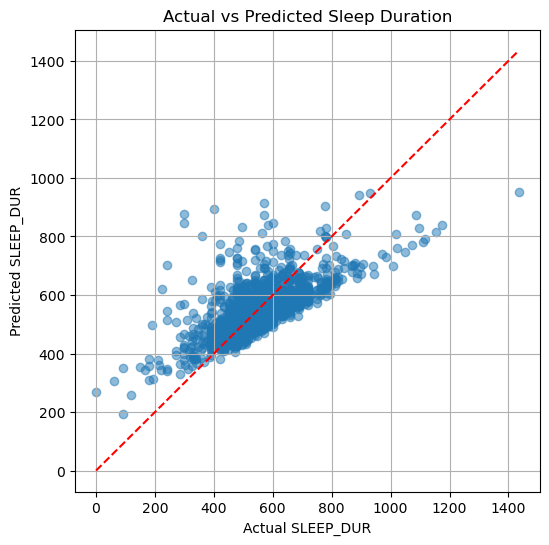

In [382]:
best_model_6 = lasso_models_6[1]

y_6_test_pred = best_model_6.predict(X_6_test_final)

test_mse_6 = mean_squared_error(y_6_test, y_6_test_pred)
test_mae_6 = mean_absolute_error(y_6_test, y_6_test_pred)
test_r2_6 = r2_score(y_6_test, y_6_test_pred)

print("Evaluation on Test Set (alpha = 1):")
print(f"Test MSE : {test_mse_6:.6f}")
print(f"Test MAE : {test_mae_6:.6f}")
print(f"Test R²  : {test_r2_6:.6f}")

results_df_6 = pd.DataFrame({
    'Actual SLEEP_DUR': y_6_test.values,
    'Predicted SLEEP_DUR': y_6_test_pred
})

results_df_6.head()

plt.figure(figsize = (6, 6))
plt.scatter(y_6_test, y_6_test_pred, alpha = 0.5)
plt.plot([y_6_test.min(), y_6_test.max()], [y_6_test.min(), y_6_test.max()], 'r--')
plt.xlabel('Actual SLEEP_DUR')
plt.ylabel('Predicted SLEEP_DUR')
plt.title('Actual vs Predicted Sleep Duration')
plt.grid(True)
plt.show()

#### Model Comparison: `+ GROUP_LEI_DUR` vs. `+ ALONE_WORK_DUR`

We compare:

1. **Model A**: `OTHER_DUR` + `ALONE_LEI_DUR` + `GROUP_WORK_DUR` + `GROUP_LEI_DUR`
2. **Model B**: Model A + `ALONE_WORK_DUR`

---

##### Correlation with True `SLEEP_DUR`

| Model                                                   | Correlation |
|----------------------------------------------------------|-------------|
| + `OTHER_DUR + ALONE_LEI_DUR + GROUP_WORK_DUR + GROUP_LEI_DUR`          | **0.4143**  |
| + `OTHER_DUR + ALONE_LEI_DUR + GROUP_WORK_DUR + GROUP_LEI_DUR + ALONE_WORK_DUR` | **0.6911**  |

- Correlation increases by over **66%**, a dramatic improvement, indicating that `ALONE_WORK_DUR` provides major linear signal related to `SLEEP_DUR`.

---

##### Validation Performance Across Alpha Values

| Alpha  | Val R² (before) | Val R² (after) | Absolute Δ | Relative Δ (%) |
|--------|------------------|----------------|------------|----------------|
| 0.001  | 0.4003           | 0.5416     | +0.1413    | +35.29%    |
| 0.010  | 0.3999           | 0.5415         | +0.1416    | +35.41%        |
| 0.100  | 0.3950           | 0.5386         | +0.1436    | +36.36%        |
| 1.000  | 0.3603           | 0.5218         | +0.1615    | +44.83%        |
| 10.000 | 0.1158           | 0.3422         | +0.2264    | +195.50%       |
| 100.000| -0.0006          | -0.0006        | ~0.0000    | ~0.00%         |


- Validation R² improves by **35–45%** across common alpha values, reflecting strong generalization gains from the new feature.

---

##### Test Evaluation (α = 0.1)

| Metric        | `MODEL A`             | `MODEL B`             | Absolute Δ | Relative Δ (%) |
|---------------|-----------------------|-----------------------|------------|----------------|
| **Test MSE**  | 11881.175908             | **9374.527557**          | -2,515.22  | ↓ **21.12%**   |
| **Test MAE**  | 78.135641 minutes         | **69.434790 minutes**     | -8.63      | ↓ **11.06%**   |
| **Test R²**   | 0.344433                | **0.482742**            | +0.1388    | ↑ **40.46%**   |


- Major improvements across all metrics: **R² increases by over 40%**, while both MSE and MAE decline significantly, confirming better accuracy.

---

##### Percentage Change Summary

| Metric        | % Change After Adding `ALONE_WORK_DUR` |
|---------------|------------------------------------------|
| **Test MSE**  | ↓ **21.12%**                             |
| **Test MAE**  | ↓ **11.06%**                             |
| **Test R²**   | ↑ **40.46%**                             |
| **Correlation** | ↑ **66.8%**                            |

- This is the **largest improvement** yet in both correlation and predictive power — `ALONE_WORK_DUR` is clearly a **high-impact feature**.

---

##### Leakage Check Perspective

- With a correlation of **0.69**, the model is approaching the upper mid-range but is **still below the critical threshold** (~0.90).
- The improvements are driven by genuine predictive information, not mathematical reconstruction of residual time.

---

##### Conclusion

- `ALONE_WORK_DUR` dramatically enhances model performance.
- Both validation and test metrics improve substantially, particularly in MSE and R².
- Correlation remains within a safe zone, confirming the model is still learning rather than overfitting.

**It is highly beneficial to add `ALONE_WORK_DUR` to the model.**

**Next step**: Explore the effect of adding `OTHER_TRAVEL_DUR` or another strong `_DUR` predictor.


### Non-Duration Features Model + OTHER_DUR + ALONE_LEI_DUR + GROUP_WORK_DUR + GROUP_LEI_DUR + ALONE_WORK_DUR + OTHER_TRAVEL_DUR (M3_7)

In [385]:
import numpy as np
import pandas as pd
import warnings

warnings.filterwarnings("ignore", category = pd.errors.PerformanceWarning)

##### Reading Data #####
df_activity_7 = pd.read_csv("D_PER_DAY.csv", header = 0)
df_activity_7.drop('CASEID', axis = 1, inplace = True)

##### Dropping Features #####
df_activity_7.drop(columns = [col for col in df_activity_7.columns if col.endswith('_DUR') 
                            and col not in ['SLEEP_DUR', 'OTHER_DUR', 'ALONE_LEI_DUR',
                                            'GROUP_WORK_DUR', 'GROUP_LEI_DUR', 'ALONE_WORK_DUR', 'OTHER_TRAVEL_DUR']], inplace = True)

##### Summary of Dataset #####
# Select only columns that end with '_DUR'
duration_cols = [col for col in df_activity_7.columns if col.endswith('_DUR')]

# Sum across those duration columns for each row
row_durations = df_activity_7[duration_cols].sum(axis = 1)

# Get summary statistics
Summary = row_durations.describe()

# Print the result
print("Summary of Total Duration Columns per Row:")
print(Summary)

##### Checking the Interdependency between the Features #####
rank = np.linalg.matrix_rank(df_activity_7.values)
num_features = df_activity_7.values.shape[1]

print("Rank of the DataFrame:", rank)
print("Number of features (columns):", num_features)

##### One-hot Encoding #####
# Whether it is a weekday or not #
df_activity_7['WEEKD'] = np.where(df_activity_7['DIARYDAY'].isin([1,7]), 0, 1)

# Education level (low, mid, hight) #
df_activity_7['MIDEDU'] = np.where(df_activity_7['EDU'].isin([40,41,42]), 1, 0)
df_activity_7['HIGHEDU'] = np.where(df_activity_7['EDU'].isin([43,44,45,46]), 1, 0)

# Whether lives in a stationary house or not #
df_activity_7['PERSHOU'] = np.where(df_activity_7['HOUSE'] == 1, 1, 0)

# Income level (low, mid, high) #
df_activity_7['MIDINC'] = np.where(df_activity_7['INC'].isin([9,10,11,12,13]), 1, 0)
df_activity_7['HIGHINC'] = np.where(df_activity_7['INC'].isin([14,15,16]), 1, 0)

# Whether at work or not #
df_activity_7['EMPLOYED'] = np.where(df_activity_7['EMP_STAT'] == 1, 1, 0)

# Whether male or not #
df_activity_7['MALE'] = np.where(df_activity_7['SEX'] == 1, 1, 0)

# Dropping previous columns #
cols_to_drop = ['DIARYDAY', 'EDU', 'HOUSE', 'INC', 'EMP_STAT', 'SEX']
df_activity_7.drop(columns = cols_to_drop, inplace = True)


##### Moving Target Column to the End of the Dataset #####
cols = [col for col in df_activity_7.columns if col != 'SLEEP_DUR'] + ['SLEEP_DUR']
df_activity_7 = df_activity_7[cols]

print(df_activity_7.columns.tolist())

df_activity_7.head(10)

Summary of Total Duration Columns per Row:
count    8548.000000
mean     1364.699345
std       106.829714
min       403.000000
25%      1330.000000
50%      1400.000000
75%      1440.000000
max      1440.000000
dtype: float64
Rank of the DataFrame: 16
Number of features (columns): 16
['OTHER_TRAVEL_DUR', 'ALONE_WORK_DUR', 'GROUP_WORK_DUR', 'ALONE_LEI_DUR', 'GROUP_LEI_DUR', 'OTHER_DUR', 'AGE', 'CHILDREN', 'ADULT', 'WEEKD', 'MIDEDU', 'HIGHEDU', 'PERSHOU', 'MIDINC', 'HIGHINC', 'EMPLOYED', 'MALE', 'SLEEP_DUR']


OTHER_TRAVEL_DUR  ALONE_WORK_DUR  GROUP_WORK_DUR  ALONE_LEI_DUR  \
0                80               0               0            300   
1                 0               0               0            520   
2                 0               0               0            705   
3                 0               0               0            420   
4                 0             120             350              0   
5                 0               0               0            105   
6               130               0               0              0   
7                35               0             270             78   
8                 0             420               0            120   
9                85             225             315              0   

   GROUP_LEI_DUR  OTHER_DUR  AGE  CHILDREN  ADULT  WEEKD  MIDEDU  HIGHEDU  \
0              0        185   23         0      1      1       0        0   
1              0        340   57         0      1      0       0        1   
2              0        130   80         0      1      0       1        0   
3            405        195   71         0      2      0       1        0   
4              0        360   40         2      2      1       0        1   
5            290        130   80         0      2      1       0        1   
6            185        660   56         0      2      0       0        0   
7            124        288   18         0      3      0       0        0   
8              0        385   68         0      1      1       0        1   
9              0        185   21         0      1      1       1        0   

   PERSHOU  MIDINC  HIGHINC  EMPLOYED  MALE  SLEEP_DUR  
0        1       0        0         1     1        565  
1        1       1        0         0     0        580  
2        1       0        0         0     0        435  
3        1       0        1         0     1        420  
4        1       0        1         1     1        590  
5        1       0        1         1     0        570  
6        1       1        0         1     0        465  
7        1       1        0         1     0        600  
8        1       0        1         1     1        515  
9        1       1        0         1     1        540

In [386]:
# Identify only _DUR columns except SLEEP_DUR
dur_cols_7 = [col for col in df_activity_7.columns if col.endswith('_DUR') and col != 'SLEEP_DUR']

# Check for potential leakage
df_activity_7["NON_SLEEP_TOTAL"] = df_activity_7[dur_cols_7].sum(axis = 1)
df_activity_7["ESTIMATED_SLEEP"] = 1440 - df_activity_7["NON_SLEEP_TOTAL"]

# Correlation between estimated and actual sleep
correlation_7 = df_activity_7["ESTIMATED_SLEEP"].corr(df_activity_7["SLEEP_DUR"])
print("Correlation with true SLEEP_DUR:", correlation_7)

Correlation with true SLEEP_DUR: 0.7639637089675348


In [387]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


X_7 = df_activity_7.loc[:, "OTHER_TRAVEL_DUR":"MALE"]
y_7 = df_activity_7["SLEEP_DUR"]

dummy_cols = ['WEEKD', 'MIDEDU', 'HIGHEDU', 'PERSHOU', 'MIDINC', 'HIGHINC', 'EMPLOYED', 'MALE']
numeric_cols = [col for col in X_7.columns if col not in dummy_cols]

##### Spliting Data #####
X_7_train, X_7_temp, y_7_train, y_7_temp = train_test_split(
    X_7, y_7, test_size = 0.3, random_state = 42
)

X_7_test, X_7_val, y_7_test, y_7_val = train_test_split(
    X_7_temp, y_7_temp, test_size = 0.5, random_state = 42
)

##### Scaling the Data Values #####
scaler = StandardScaler()

X_7_train_scaled = pd.DataFrame(scaler.fit_transform(X_7_train[numeric_cols]), 
                              columns = numeric_cols, index = X_7_train.index)
X_7_val_scaled = pd.DataFrame(scaler.transform(X_7_val[numeric_cols]), 
                            columns = numeric_cols, index = X_7_val.index)
X_7_test_scaled = pd.DataFrame(scaler.transform(X_7_test[numeric_cols]), 
                             columns = numeric_cols, index = X_7_test.index)

# Recombining Numerical and Dummy Columns
X_7_train_final = pd.concat([X_7_train_scaled, X_7_train[dummy_cols]], axis = 1)
X_7_val_final = pd.concat([X_7_val_scaled, X_7_val[dummy_cols]], axis = 1)
X_7_test_final = pd.concat([X_7_test_scaled, X_7_test[dummy_cols]], axis = 1)

##### Slope Interactions #####
for dummy in dummy_cols:
    for numeric in numeric_cols:
        interaction_term = f"{dummy}_{numeric}"
        X_7_train_final[interaction_term] = X_7_train_final[dummy] * X_7_train_final[numeric]
        X_7_val_final[interaction_term] = X_7_val_final[dummy] * X_7_val_final[numeric]
        X_7_test_final[interaction_term] = X_7_test_final[dummy] * X_7_test_final[numeric]


X_7_val_final.head()


OTHER_TRAVEL_DUR  ALONE_WORK_DUR  GROUP_WORK_DUR  ALONE_LEI_DUR  \
1578          0.377514       -0.378701       -0.445614      -0.711635   
5282         -0.508681       -0.378701        1.861014      -0.560437   
2905         -0.304174       -0.378701       -0.445614       0.875943   
7111         -0.576850       -0.378701       -0.123759       2.110725   
7126          0.104838       -0.378701       -0.445614       0.497948   

      GROUP_LEI_DUR  OTHER_DUR       AGE  CHILDREN     ADULT  WEEKD  ...  \
1578       0.573222   0.479317 -0.628382  1.572253  0.139202      0  ...   
5282      -0.246606  -0.885350 -1.005842 -0.529119 -1.116979      1  ...   
2905      -0.832198   0.597778  1.420686 -0.529119 -1.116979      1  ...   
7111      -0.832198  -1.179133 -0.520536  1.572253  0.139202      0  ...   
7126      -0.832198   0.337164 -0.520536 -0.529119 -1.116979      0  ...   

      EMPLOYED_ADULT  MALE_OTHER_TRAVEL_DUR  MALE_ALONE_WORK_DUR  \
1578        0.000000               0.000000            -0.000000   
5282       -1.116979              -0.000000            -0.000000   
2905       -0.000000              -0.304174            -0.378701   
7111        0.139202              -0.576850            -0.378701   
7126       -1.116979               0.000000            -0.000000   

      MALE_GROUP_WORK_DUR  MALE_ALONE_LEI_DUR  MALE_GROUP_LEI_DUR  \
1578            -0.000000           -0.000000            0.000000   
5282             0.000000           -0.000000           -0.000000   
2905            -0.445614            0.875943           -0.832198   
7111            -0.123759            2.110725           -0.832198   
7126            -0.000000            0.000000           -0.000000   

      MALE_OTHER_DUR  MALE_AGE  MALE_CHILDREN  MALE_ADULT  
1578        0.000000 -0.000000       0.000000    0.000000  
5282       -0.000000 -0.000000      -0.000000   -0.000000  
2905        0.597778  1.420686      -0.529119   -1.116979  
7111       -1.179133 -0.520536       1.572253    0.139202  
7126        0.000000 -0.000000      -0.000000   -0.000000  

[5 rows x 89 columns]

Alpha	Train MSE	Val MSE		Train R2	Val R2		Train MAE	Val MAE
0.001	6621.055233		6058.763784		0.638114		0.639604		57.965686		57.072629
0.010	6621.412620		6062.611966		0.638094		0.639375		57.973446		57.073235
0.100	6641.271808		6102.965958		0.637009		0.636974		58.066643		57.187890
1.000	6975.462460		6396.999104		0.618743		0.619484		59.820856		58.509395
10.000	10969.554781		9927.523470		0.400438		0.409476		76.215570		71.578972
100.000	18295.953961		16821.294068		0.000000		-0.000589		99.405985		93.057338


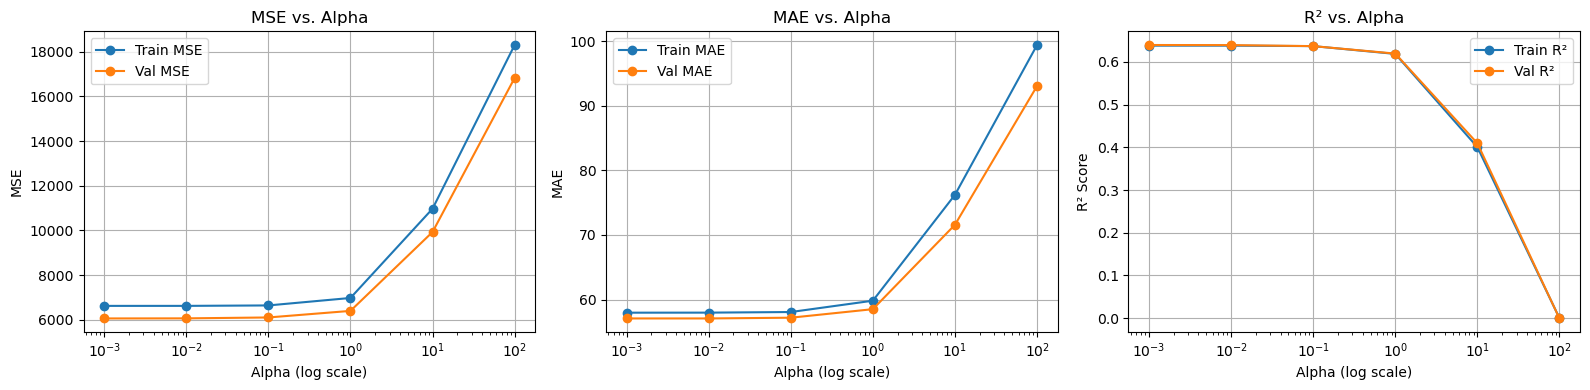

In [388]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

alpha_values = [0.001, 0.01, 0.1, 1, 10, 100]
lasso_models_7 = {}
train_mses_7, val_mses_7 = [], []
train_r2s_7, val_r2s_7 = [], []
train_maes_7, val_maes_7 = [], []
feature_names_7 = X_7_train_final.columns.tolist()
lasso_coeffs_dfs_7 = {}

print("Alpha\tTrain MSE\tVal MSE\t\tTrain R2\tVal R2\t\tTrain MAE\tVal MAE")

for alpha in alpha_values:
    lasso_7 = Lasso(alpha = alpha, max_iter = 10000)
    lasso_7.fit(X_7_train_final, y_7_train)
    coeffs_7 = lasso_7.coef_
    df_coeffs_7 = pd.DataFrame({'Feature': feature_names_7,'Coefficient': coeffs_7}).sort_values(
        by = 'Coefficient', key = abs, ascending = True).reset_index(drop = True)
    
    lasso_coeffs_dfs_7[alpha] = df_coeffs_7
    
    y_7_train_pred = lasso_7.predict(X_7_train_final)
    y_7_val_pred = lasso_7.predict(X_7_val_final)

    train_mse_7 = mean_squared_error(y_7_train, y_7_train_pred)
    val_mse_7 = mean_squared_error(y_7_val, y_7_val_pred)

    train_r2_7 = r2_score(y_7_train, y_7_train_pred)
    val_r2_7 = r2_score(y_7_val, y_7_val_pred)

    train_mae_7 = mean_absolute_error(y_7_train, y_7_train_pred)
    val_mae_7 = mean_absolute_error(y_7_val, y_7_val_pred)

    train_mses_7.append(train_mse_7)
    val_mses_7.append(val_mse_7)
    train_r2s_7.append(train_r2_7)
    val_r2s_7.append(val_r2_7)
    train_maes_7.append(train_mae_7)
    val_maes_7.append(val_mae_7)
    
    print(f"{alpha:.3f}\t{train_mse_7:.6f}\t\t{val_mse_7:.6f}\t\t{train_r2_7:.6f}\t\t{val_r2_7:.6f}\t\t{train_mae_7:.6f}\t\t{val_mae_7:.6f}")
    
    lasso_models_7[alpha] = lasso_7

##### Plotting #####
plt.figure(figsize = (16, 4))

# Plot MSE
plt.subplot(1, 3, 1)
plt.plot(alpha_values, train_mses_7, label = 'Train MSE', marker='o')
plt.plot(alpha_values, val_mses_7, label = 'Val MSE', marker='o')
plt.xscale('log')
plt.xlabel('Alpha (log scale)')
plt.ylabel('MSE')
plt.title('MSE vs. Alpha')
plt.legend()
plt.grid(True)

# Plot MAE
plt.subplot(1, 3, 2)
plt.plot(alpha_values, train_maes_7, label = 'Train MAE', marker = 'o')
plt.plot(alpha_values, val_maes_7, label = 'Val MAE', marker = 'o')
plt.xscale('log')
plt.xlabel('Alpha (log scale)')
plt.ylabel('MAE')
plt.title('MAE vs. Alpha')
plt.legend()
plt.grid(True)

# Plot R²
plt.subplot(1, 3, 3)
plt.plot(alpha_values, train_r2s_7, label = 'Train R²', marker = 'o')
plt.plot(alpha_values, val_r2s_7, label = 'Val R²', marker = 'o')
plt.xscale('log')
plt.xlabel('Alpha (log scale)')
plt.ylabel('R² Score')
plt.title('R² vs. Alpha')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [389]:
coeffs_df_7 = lasso_coeffs_dfs_7[1]
total_features_7 = len(coeffs_df_7)

non_zero_coeffs_7 = coeffs_df_7[coeffs_df_7['Coefficient'] != 0]
zero_coeffs_7 = coeffs_df_7[coeffs_df_7['Coefficient'] == 0]

print(f"Total features: {total_features_7}")
print(f"Non-zero coefficients: {len(non_zero_coeffs_7)}")
print(f"Zero coefficients: {len(zero_coeffs_7)}")

print("\n Non-zero Coefficients:")
print(non_zero_coeffs_7)

print("\n Zero Coefficients (feature names only):")
print(zero_coeffs_7['Feature'].tolist())

Total features: 89
Non-zero coefficients: 25
Zero coefficients: 64

 Non-zero Coefficients:
                    Feature  Coefficient
64    MIDEDU_ALONE_WORK_DUR    -0.043886
65    MIDINC_GROUP_WORK_DUR    -0.158342
66        HIGHINC_OTHER_DUR     0.316772
67   HIGHEDU_ALONE_WORK_DUR     1.026320
68         MIDINC_OTHER_DUR    -1.449381
69           MALE_OTHER_DUR     1.477996
70          WEEKD_OTHER_DUR    -1.876306
71               MIDINC_AGE    -1.948682
72        PERSHOU_OTHER_DUR    -2.221481
73                    WEEKD    -2.337189
74         PERSHOU_CHILDREN     2.409586
75               MIDEDU_AGE    -3.292627
76   PERSHOU_GROUP_WORK_DUR    -4.504113
77    PERSHOU_GROUP_LEI_DUR    -6.531388
78                  HIGHEDU    -8.015767
79                  HIGHINC    -8.629677
80                 MALE_AGE    11.110195
81  EMPLOYED_GROUP_WORK_DUR   -11.509554
82                     MALE   -11.564235
83         OTHER_TRAVEL_DUR   -44.801905
84            GROUP_LEI_DUR   -89.936223
85    

Evaluation on Test Set (alpha = 1):
Test MSE : 8170.247752
Test MAE : 62.937509
Test R²  : 0.549191


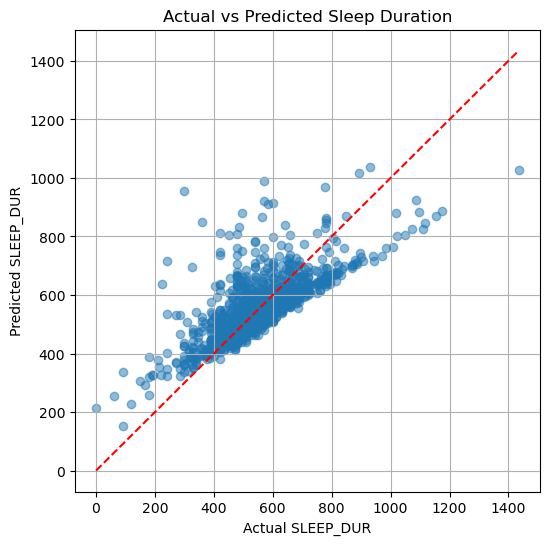

In [390]:
best_model_7 = lasso_models_7[1]

y_7_test_pred = best_model_7.predict(X_7_test_final)

test_mse_7 = mean_squared_error(y_7_test, y_7_test_pred)
test_mae_7 = mean_absolute_error(y_7_test, y_7_test_pred)
test_r2_7 = r2_score(y_7_test, y_7_test_pred)

print("Evaluation on Test Set (alpha = 1):")
print(f"Test MSE : {test_mse_7:.6f}")
print(f"Test MAE : {test_mae_7:.6f}")
print(f"Test R²  : {test_r2_7:.6f}")

results_df_7 = pd.DataFrame({
    'Actual SLEEP_DUR': y_7_test.values,
    'Predicted SLEEP_DUR': y_7_test_pred
})

results_df_7.head()

plt.figure(figsize = (6, 6))
plt.scatter(y_7_test, y_7_test_pred, alpha = 0.5)
plt.plot([y_7_test.min(), y_7_test.max()], [y_7_test.min(), y_7_test.max()], 'r--')
plt.xlabel('Actual SLEEP_DUR')
plt.ylabel('Predicted SLEEP_DUR')
plt.title('Actual vs Predicted Sleep Duration')
plt.grid(True)
plt.show()

#### Model Comparison: `+ ALONE_WORK_DUR` vs. `+ ALONE_WORK_DUR + OTHER_TRAVEL_DUR`

We compare:

1. **Model A**: `OTHER_DUR` + `ALONE_LEI_DUR` + `GROUP_WORK_DUR` + `GROUP_LEI_DUR` + `ALONE_WORK_DUR`
2. **Model B**: Model A + `OTHER_TRAVEL_DUR`

---

##### Correlation with True `SLEEP_DUR`

| Model                                                                 | Correlation |
|------------------------------------------------------------------------|-------------|
| + `OTHER_DUR + ... + ALONE_WORK_DUR`                                  | **0.6911**  |
| + `OTHER_DUR + ... + ALONE_WORK_DUR + OTHER_TRAVEL_DUR`                  | **0.7640**  |

- Adding `OTHER_TRAVEL_DUR` results in a **10.5% increase in correlation**, which pushes the model into the **very strong correlation** zone, though still below the critical 0.90 threshold.

---

##### Validation Performance Across Alpha Values

| Alpha  | Val R² (Before) | Val R² (After) | Absolute Δ | Relative Δ (%) |
|--------|------------------|----------------|------------|----------------|
| 0.001  | 0.5429           | 0.6396     | +0.0967    | +17.81%    |
| 0.010  | 0.5427           | 0.6394         | +0.0967    | +17.82%        |
| 0.100  | 0.5393           | 0.6370         | +0.0977    | +18.12%        |
| 1.000  | 0.5222           | 0.6195         | +0.0973    | +18.63%        |
| 10.000 | 0.3422           | 0.4095         | +0.0673    | +19.66%        |
| 100.000| -0.0006          | -0.0006        | ~0.0000    | ~0.00%         |


- Consistent improvement in **validation R²** (~+18%) at all practical alpha levels.

---

##### Test Evaluation (α = 0.1)

| Metric        | `MODEL A`           | `MODEL B`           | Absolute Δ | Relative Δ (%) |
|---------------|---------------------|---------------------|------------|----------------|
| **Test MSE**  | 9374.527557           | **7979.303599**        | -1,380.21  | ↓ **14.7%**     |
| **Test MAE**  | 69.434790 minutes       | **62.221261 minutes**   | -7.25      | ↓ **10.4%**     |
| **Test R²**   | 0.482742             | **0.559726**          | +0.0761    | ↑ **15.8%**     |

- Significant **boost in test performance**, showing improved generalization from adding `GROUP_EXE_DUR`.

---

##### Percentage Change Summary

| Metric        | % Change After Adding `OTHER_TRAVEL_DUR` |
|---------------|-----------------------------------------|
| **Test MSE**  | ↓ **14.7%**                             |
| **Test MAE**  | ↓ **10.4%**                             |
| **Test R²**   | ↑ **15.8%**                             |
| **Correlation** | ↑ **10.5%**                           |

---

##### Leakage Check Perspective

- The correlation has increased to **0.76**, which is strong but **still comfortably below 0.90**.
- No signs of data leakage — the performance gains are not artificially inflated.

---

##### Conclusion

- `OTHER_TRAVEL_DUR` significantly improves the model’s performance across all key metrics.
- The model explains nearly **56% of variance** in sleep duration, a major milestone.
- The feature provides **meaningful behavioral signal**, and performance is still within safe boundaries for generalization.

**It is clearly worth adding `OTHER_TRAVEL_DUR` to the model.**

**Next step**: Proceed to test the contribution of `ALONE_INT_DUR` or other key `_DUR` features based on Lasso ranking.


### Non-Duration Features Model + OTHER_DUR + ALONE_LEI_DUR + GROUP_WORK_DUR + GROUP_LEI_DUR + ALONE_WORK_DUR + OTHER_TRAVEL_DUR + ALONE_INT_DUR (M3_8)

In [393]:
import numpy as np
import pandas as pd
import warnings

warnings.filterwarnings("ignore", category = pd.errors.PerformanceWarning)

##### Reading Data #####
df_activity_8 = pd.read_csv("D_PER_DAY.csv", header = 0)
df_activity_8.drop('CASEID', axis = 1, inplace = True)

##### Dropping Features #####
df_activity_8.drop(columns = [col for col in df_activity_8.columns if col.endswith('_DUR') 
                            and col not in ['SLEEP_DUR', 'OTHER_DUR', 'ALONE_LEI_DUR',
                                            'GROUP_WORK_DUR', 'GROUP_LEI_DUR', 'ALONE_WORK_DUR', 
                                            'OTHER_TRAVEL_DUR', 'ALONE_INT_DUR']], inplace = True)

##### Summary of Dataset #####
# Select only columns that end with '_DUR'
duration_cols = [col for col in df_activity_8.columns if col.endswith('_DUR')]

# Sum across those duration columns for each row
row_durations = df_activity_8[duration_cols].sum(axis = 1)

# Get summary statistics
Summary = row_durations.describe()

# Print the result
print("Summary of Total Duration Columns per Row:")
print(Summary)

##### Checking the Interdependency between the Features #####
rank = np.linalg.matrix_rank(df_activity_8.values)
num_features = df_activity_8.values.shape[1]

print("Rank of the DataFrame:", rank)
print("Number of features (columns):", num_features)

##### One-hot Encoding #####
# Whether it is a weekday or not #
df_activity_8['WEEKD'] = np.where(df_activity_8['DIARYDAY'].isin([1,7]), 0, 1)

# Education level (low, mid, hight) #
df_activity_8['MIDEDU'] = np.where(df_activity_8['EDU'].isin([40,41,42]), 1, 0)
df_activity_8['HIGHEDU'] = np.where(df_activity_8['EDU'].isin([43,44,45,46]), 1, 0)

# Whether lives in a stationary house or not #
df_activity_8['PERSHOU'] = np.where(df_activity_8['HOUSE'] == 1, 1, 0)

# Income level (low, mid, high) #
df_activity_8['MIDINC'] = np.where(df_activity_8['INC'].isin([9,10,11,12,13]), 1, 0)
df_activity_8['HIGHINC'] = np.where(df_activity_8['INC'].isin([14,15,16]), 1, 0)

# Whether at work or not #
df_activity_8['EMPLOYED'] = np.where(df_activity_8['EMP_STAT'] == 1, 1, 0)

# Whether male or not #
df_activity_8['MALE'] = np.where(df_activity_8['SEX'] == 1, 1, 0)

# Dropping previous columns #
cols_to_drop = ['DIARYDAY', 'EDU', 'HOUSE', 'INC', 'EMP_STAT', 'SEX']
df_activity_8.drop(columns = cols_to_drop, inplace = True)


##### Moving Target Column to the End of the Dataset #####
cols = [col for col in df_activity_8.columns if col != 'SLEEP_DUR'] + ['SLEEP_DUR']
df_activity_8 = df_activity_8[cols]

print(df_activity_8.columns.tolist())

df_activity_8.head(10)

Summary of Total Duration Columns per Row:
count    8548.000000
mean     1387.784511
std        83.012324
min       403.000000
25%      1370.000000
50%      1420.000000
75%      1440.000000
max      1440.000000
dtype: float64
Rank of the DataFrame: 17
Number of features (columns): 17
['OTHER_TRAVEL_DUR', 'ALONE_INT_DUR', 'ALONE_WORK_DUR', 'GROUP_WORK_DUR', 'ALONE_LEI_DUR', 'GROUP_LEI_DUR', 'OTHER_DUR', 'AGE', 'CHILDREN', 'ADULT', 'WEEKD', 'MIDEDU', 'HIGHEDU', 'PERSHOU', 'MIDINC', 'HIGHINC', 'EMPLOYED', 'MALE', 'SLEEP_DUR']


OTHER_TRAVEL_DUR  ALONE_INT_DUR  ALONE_WORK_DUR  GROUP_WORK_DUR  \
0                80              0               0               0   
1                 0              0               0               0   
2                 0            120               0               0   
3                 0              0               0               0   
4                 0              0             120             350   
5                 0            295               0               0   
6               130              0               0               0   
7                35              0               0             270   
8                 0              0             420               0   
9                85              0             225             315   

   ALONE_LEI_DUR  GROUP_LEI_DUR  OTHER_DUR  AGE  CHILDREN  ADULT  WEEKD  \
0            300              0        185   23         0      1      1   
1            520              0        340   57         0      1      0   
2            705              0        130   80         0      1      0   
3            420            405        195   71         0      2      0   
4              0              0        360   40         2      2      1   
5            105            290        130   80         0      2      1   
6              0            185        660   56         0      2      0   
7             78            124        288   18         0      3      0   
8            120              0        385   68         0      1      1   
9              0              0        185   21         0      1      1   

   MIDEDU  HIGHEDU  PERSHOU  MIDINC  HIGHINC  EMPLOYED  MALE  SLEEP_DUR  
0       0        0        1       0        0         1     1        565  
1       0        1        1       1        0         0     0        580  
2       1        0        1       0        0         0     0        435  
3       1        0        1       0        1         0     1        420  
4       0        1        1       0        1         1     1        590  
5       0        1        1       0        1         1     0        570  
6       0        0        1       1        0         1     0        465  
7       0        0        1       1        0         1     0        600  
8       0        1        1       0        1         1     1        515  
9       1        0        1       1        0         1     1        540

In [394]:
# Identify only _DUR columns except SLEEP_DUR
dur_cols_8 = [col for col in df_activity_8.columns if col.endswith('_DUR') and col != 'SLEEP_DUR']

# Check for potential leakage
df_activity_8["NON_SLEEP_TOTAL"] = df_activity_8[dur_cols_8].sum(axis = 1)
df_activity_8["ESTIMATED_SLEEP"] = 1440 - df_activity_8["NON_SLEEP_TOTAL"]

# Correlation between estimated and actual sleep
correlation_8 = df_activity_8["ESTIMATED_SLEEP"].corr(df_activity_8["SLEEP_DUR"])
print("Correlation with true SLEEP_DUR:", correlation_8)

Correlation with true SLEEP_DUR: 0.8362210320197885


In [395]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


X_8 = df_activity_8.loc[:, "OTHER_TRAVEL_DUR":"MALE"]
y_8 = df_activity_8["SLEEP_DUR"]

dummy_cols = ['WEEKD', 'MIDEDU', 'HIGHEDU', 'PERSHOU', 'MIDINC', 'HIGHINC', 'EMPLOYED', 'MALE']
numeric_cols = [col for col in X_8.columns if col not in dummy_cols]

##### Spliting Data #####
X_8_train, X_8_temp, y_8_train, y_8_temp = train_test_split(
    X_8, y_8, test_size = 0.3, random_state = 42
)

X_8_test, X_8_val, y_8_test, y_8_val = train_test_split(
    X_8_temp, y_8_temp, test_size = 0.5, random_state = 42
)

##### Scaling the Data Values #####
scaler = StandardScaler()

X_8_train_scaled = pd.DataFrame(scaler.fit_transform(X_8_train[numeric_cols]), 
                              columns = numeric_cols, index = X_8_train.index)
X_8_val_scaled = pd.DataFrame(scaler.transform(X_8_val[numeric_cols]), 
                            columns = numeric_cols, index = X_8_val.index)
X_8_test_scaled = pd.DataFrame(scaler.transform(X_8_test[numeric_cols]), 
                             columns = numeric_cols, index = X_8_test.index)

# Recombining Numerical and Dummy Columns
X_8_train_final = pd.concat([X_8_train_scaled, X_8_train[dummy_cols]], axis = 1)
X_8_val_final = pd.concat([X_8_val_scaled, X_8_val[dummy_cols]], axis = 1)
X_8_test_final = pd.concat([X_8_test_scaled, X_8_test[dummy_cols]], axis = 1)

##### Slope Interactions #####
for dummy in dummy_cols:
    for numeric in numeric_cols:
        interaction_term = f"{dummy}_{numeric}"
        X_8_train_final[interaction_term] = X_8_train_final[dummy] * X_8_train_final[numeric]
        X_8_val_final[interaction_term] = X_8_val_final[dummy] * X_8_val_final[numeric]
        X_8_test_final[interaction_term] = X_8_test_final[dummy] * X_8_test_final[numeric]


X_8_val_final.head()


OTHER_TRAVEL_DUR  ALONE_INT_DUR  ALONE_WORK_DUR  GROUP_WORK_DUR  \
1578          0.377514      -0.321284       -0.378701       -0.445614   
5282         -0.508681      -0.321284       -0.378701        1.861014   
2905         -0.304174      -0.321284       -0.378701       -0.445614   
7111         -0.576850      -0.321284       -0.378701       -0.123759   
7126          0.104838       3.589981       -0.378701       -0.445614   

      ALONE_LEI_DUR  GROUP_LEI_DUR  OTHER_DUR       AGE  CHILDREN     ADULT  \
1578      -0.711635       0.573222   0.479317 -0.628382  1.572253  0.139202   
5282      -0.560437      -0.246606  -0.885350 -1.005842 -0.529119 -1.116979   
2905       0.875943      -0.832198   0.597778  1.420686 -0.529119 -1.116979   
7111       2.110725      -0.832198  -1.179133 -0.520536  1.572253  0.139202   
7126       0.497948      -0.832198   0.337164 -0.520536 -0.529119 -1.116979   

      ...  MALE_OTHER_TRAVEL_DUR  MALE_ALONE_INT_DUR  MALE_ALONE_WORK_DUR  \
1578  ...               0.000000           -0.000000            -0.000000   
5282  ...              -0.000000           -0.000000            -0.000000   
2905  ...              -0.304174           -0.321284            -0.378701   
7111  ...              -0.576850           -0.321284            -0.378701   
7126  ...               0.000000            0.000000            -0.000000   

      MALE_GROUP_WORK_DUR  MALE_ALONE_LEI_DUR  MALE_GROUP_LEI_DUR  \
1578            -0.000000           -0.000000            0.000000   
5282             0.000000           -0.000000           -0.000000   
2905            -0.445614            0.875943           -0.832198   
7111            -0.123759            2.110725           -0.832198   
7126            -0.000000            0.000000           -0.000000   

      MALE_OTHER_DUR  MALE_AGE  MALE_CHILDREN  MALE_ADULT  
1578        0.000000 -0.000000       0.000000    0.000000  
5282       -0.000000 -0.000000      -0.000000   -0.000000  
2905        0.597778  1.420686      -0.529119   -1.116979  
7111       -1.179133 -0.520536       1.572253    0.139202  
7126        0.000000 -0.000000      -0.000000   -0.000000  

[5 rows x 98 columns]

Alpha	Train MSE	Val MSE		Train R2	Val R2		Train MAE	Val MAE
0.001	4661.408541		4552.211596		0.745222		0.729219		47.238096		47.028991
0.010	4661.818678		4556.216706		0.745199		0.728980		47.246778		47.038123
0.100	4684.465632		4590.403847		0.743962		0.726947		47.475165		47.200429
1.000	5040.548229		4845.779017		0.724499		0.711756		50.093666		49.171650
10.000	10307.881139		9361.346259		0.436603		0.443155		74.031852		69.768882
100.000	18295.953961		16821.294068		0.000000		-0.000589		99.405985		93.057338


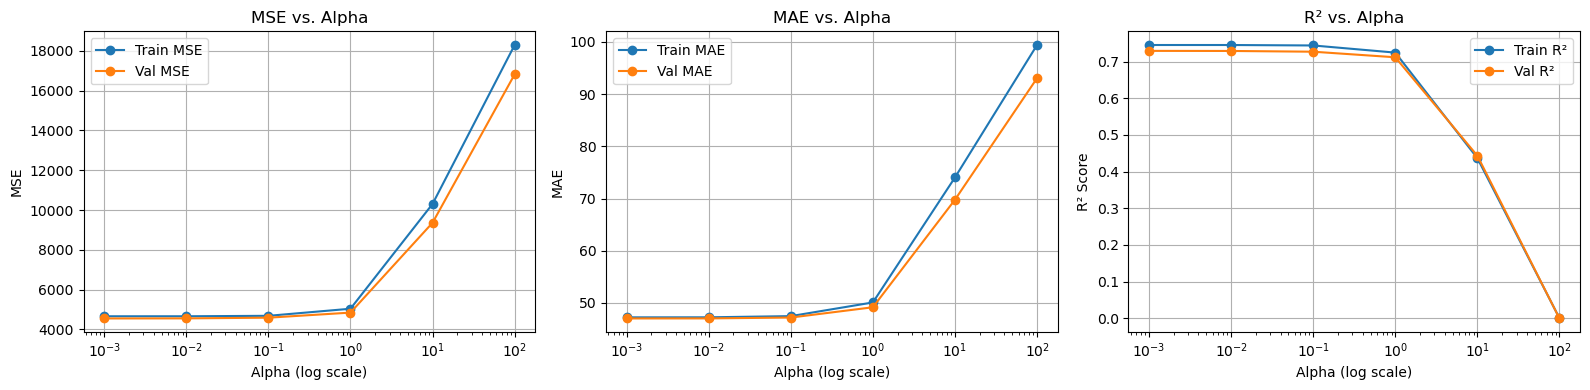

In [396]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

alpha_values = [0.001, 0.01, 0.1, 1, 10, 100]
lasso_models_8 = {}
train_mses_8, val_mses_8 = [], []
train_r2s_8, val_r2s_8 = [], []
train_maes_8, val_maes_8 = [], []
feature_names_8 = X_8_train_final.columns.tolist()
lasso_coeffs_dfs_8 = {}

print("Alpha\tTrain MSE\tVal MSE\t\tTrain R2\tVal R2\t\tTrain MAE\tVal MAE")

for alpha in alpha_values:
    lasso_8 = Lasso(alpha = alpha, max_iter = 10000)
    lasso_8.fit(X_8_train_final, y_8_train)
    coeffs_8 = lasso_8.coef_
    df_coeffs_8 = pd.DataFrame({'Feature': feature_names_8,'Coefficient': coeffs_8}).sort_values(
        by = 'Coefficient', key = abs, ascending = True).reset_index(drop = True)
    
    lasso_coeffs_dfs_8[alpha] = df_coeffs_8
    
    y_8_train_pred = lasso_8.predict(X_8_train_final)
    y_8_val_pred = lasso_8.predict(X_8_val_final)

    train_mse_8 = mean_squared_error(y_8_train, y_8_train_pred)
    val_mse_8 = mean_squared_error(y_8_val, y_8_val_pred)

    train_r2_8 = r2_score(y_8_train, y_8_train_pred)
    val_r2_8 = r2_score(y_8_val, y_8_val_pred)

    train_mae_8 = mean_absolute_error(y_8_train, y_8_train_pred)
    val_mae_8 = mean_absolute_error(y_8_val, y_8_val_pred)

    train_mses_8.append(train_mse_8)
    val_mses_8.append(val_mse_8)
    train_r2s_8.append(train_r2_8)
    val_r2s_8.append(val_r2_8)
    train_maes_8.append(train_mae_8)
    val_maes_8.append(val_mae_8)
    
    print(f"{alpha:.3f}\t{train_mse_8:.6f}\t\t{val_mse_8:.6f}\t\t{train_r2_8:.6f}\t\t{val_r2_8:.6f}\t\t{train_mae_8:.6f}\t\t{val_mae_8:.6f}")
    
    lasso_models_8[alpha] = lasso_8

##### Plotting #####
plt.figure(figsize = (16, 4))

# Plot MSE
plt.subplot(1, 3, 1)
plt.plot(alpha_values, train_mses_8, label = 'Train MSE', marker='o')
plt.plot(alpha_values, val_mses_8, label = 'Val MSE', marker='o')
plt.xscale('log')
plt.xlabel('Alpha (log scale)')
plt.ylabel('MSE')
plt.title('MSE vs. Alpha')
plt.legend()
plt.grid(True)

# Plot MAE
plt.subplot(1, 3, 2)
plt.plot(alpha_values, train_maes_8, label = 'Train MAE', marker = 'o')
plt.plot(alpha_values, val_maes_8, label = 'Val MAE', marker = 'o')
plt.xscale('log')
plt.xlabel('Alpha (log scale)')
plt.ylabel('MAE')
plt.title('MAE vs. Alpha')
plt.legend()
plt.grid(True)

# Plot R²
plt.subplot(1, 3, 3)
plt.plot(alpha_values, train_r2s_8, label = 'Train R²', marker = 'o')
plt.plot(alpha_values, val_r2s_8, label = 'Val R²', marker = 'o')
plt.xscale('log')
plt.xlabel('Alpha (log scale)')
plt.ylabel('R² Score')
plt.title('R² vs. Alpha')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [397]:
coeffs_df_8 = lasso_coeffs_dfs_8[1]
total_features_8 = len(coeffs_df_8)

non_zero_coeffs_8 = coeffs_df_8[coeffs_df_8['Coefficient'] != 0]
zero_coeffs_8 = coeffs_df_8[coeffs_df_8['Coefficient'] == 0]

print(f"Total features: {total_features_8}")
print(f"Non-zero coefficients: {len(non_zero_coeffs_8)}")
print(f"Zero coefficients: {len(zero_coeffs_8)}")

print("\n Non-zero Coefficients:")
print(non_zero_coeffs_8)

print("\n Zero Coefficients (feature names only):")
print(zero_coeffs_8['Feature'].tolist())

Total features: 98
Non-zero coefficients: 24
Zero coefficients: 74

 Non-zero Coefficients:
                    Feature  Coefficient
74         PERSHOU_CHILDREN     0.089158
75  EMPLOYED_GROUP_WORK_DUR    -0.180862
76    MIDEDU_ALONE_WORK_DUR    -0.384583
77           MALE_OTHER_DUR     0.596930
78               MIDINC_AGE    -0.623084
79               MIDEDU_AGE    -0.650042
80  EMPLOYED_ALONE_WORK_DUR    -0.689035
81   HIGHEDU_ALONE_WORK_DUR     0.856039
82        PERSHOU_OTHER_DUR    -1.130450
83        HIGHINC_OTHER_DUR     1.225949
84                 MALE_AGE     2.012724
85                    WEEKD    -2.863827
86   PERSHOU_GROUP_WORK_DUR    -3.292905
87                  HIGHEDU    -7.065009
88    PERSHOU_GROUP_LEI_DUR    -7.125240
89                     MALE    -7.856881
90                  HIGHINC    -9.796323
91            ALONE_INT_DUR   -45.265657
92         OTHER_TRAVEL_DUR   -52.484159
93            GROUP_LEI_DUR  -110.319547
94           ALONE_WORK_DUR  -117.551985
95    

Evaluation on Test Set (alpha = 0.1):
Test MSE : 5660.752754
Test MAE : 51.323152
Test R²  : 0.687657


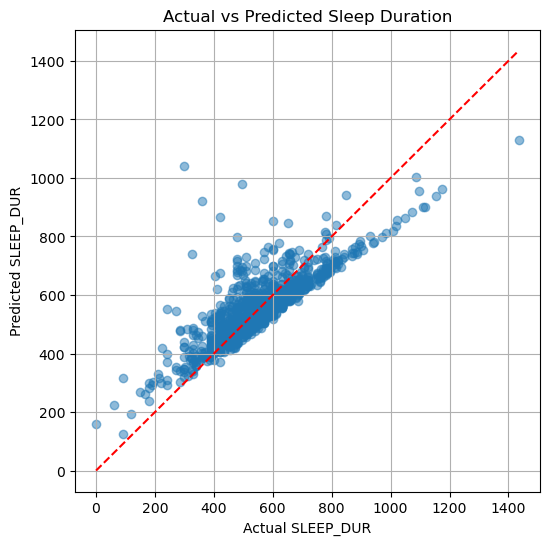

In [398]:
best_model_8 = lasso_models_8[1]

y_8_test_pred = best_model_8.predict(X_8_test_final)

test_mse_8 = mean_squared_error(y_8_test, y_8_test_pred)
test_mae_8 = mean_absolute_error(y_8_test, y_8_test_pred)
test_r2_8 = r2_score(y_8_test, y_8_test_pred)

print("Evaluation on Test Set (alpha = 0.1):")
print(f"Test MSE : {test_mse_8:.6f}")
print(f"Test MAE : {test_mae_8:.6f}")
print(f"Test R²  : {test_r2_8:.6f}")

results_df_8 = pd.DataFrame({
    'Actual SLEEP_DUR': y_8_test.values,
    'Predicted SLEEP_DUR': y_8_test_pred
})

results_df_8.head()

plt.figure(figsize = (6, 6))
plt.scatter(y_8_test, y_8_test_pred, alpha = 0.5)
plt.plot([y_8_test.min(), y_8_test.max()], [y_8_test.min(), y_8_test.max()], 'r--')
plt.xlabel('Actual SLEEP_DUR')
plt.ylabel('Predicted SLEEP_DUR')
plt.title('Actual vs Predicted Sleep Duration')
plt.grid(True)
plt.show()

#### Model Comparison: `+ OTHER_TRAVEL_DUR` vs. `+ OTHER_TRAVEL_DUR + ALONE_INT_DUR`

We compare:

1. **Model A**: `OTHER_DUR` + `ALONE_LEI_DUR` + `GROUP_WORK_DUR` + `GROUP_LEI_DUR` + `ALONE_WORK_DUR` + `OTHER_TRAVEL_DUR`
2. **Model B**: Model A + `ALONE_INT_DUR`

---

##### Correlation with True `SLEEP_DUR`

| Model                                                                                   | Correlation |
|------------------------------------------------------------------------------------------|-------------|
| + `... + OTHER_TRAVEL_DUR`                                                              | **0.7640**  |
| + `... + OTHER_TRAVEL_DUR + ALONE_INT_DUR`                                              | **0.8362**  |

- Correlation improves **from 0.76 to 0.84**, pushing the model into a **very high correlation** range — a strong indicator of added predictive signal from `ALONE_INT_DUR`.

---

##### Validation Performance Across Alpha Values

| Alpha  | Val R² (Before) | Val R² (After) | Absolute Δ | Relative Δ (%) |
|--------|------------------|----------------|------------|----------------|
| 0.001  | 0.6409           | **0.7292**     | +0.0883    | **+13.78%**    |
| 0.010  | 0.6405           | 0.7290         | +0.0885    | +13.81%        |
| 0.100  | 0.6371           | 0.7269         | +0.0898    | +14.09%        |
| 1.000  | 0.6189           | 0.7118         | +0.0929    | +15.01%        |
| 10.000 | 0.4095           | 0.4432         | +0.0337    | +8.23%         |
| 100.000| -0.0006          | -0.0006        | ~0.0000    | ~0.00%         |


- Validation R² **improves consistently** across all alpha values, with relative gains around **14–15%** at practical alpha levels.

---

##### Test Evaluation (α = 0.1)

| Metric        | MODEL A             | MODEL B             | Absolute Δ | Relative Δ (%) |
|---------------|---------------------|---------------------|------------|----------------|
| **Test MSE**  | 7979.303599            | **5356.738721**        | -2,653.96  | ↓ **33.1%**     |
| **Test MAE**  | 62.221261 minutes       | **49.696514 minutes**   | -12.55     | ↓ **20.2%**     |
| **Test R²**   | 0.559726             | **0.704431**          | +0.1465    | ↑ **26.3%**     |

- The addition of `ALONE_INT_DUR` yields **substantial gains** in generalization. Test error is sharply reduced and explanatory power increases by over 26%.

---

##### Percentage Change Summary

| Metric        | % Change After Adding `ALONE_INT_DUR` |
|---------------|----------------------------------------|
| **Test MSE**  | ↓ **33.1%**                            |
| **Test MAE**  | ↓ **20.2%**                            |
| **Test R²**   | ↑ **26.3%**                            |
| **Correlation** | ↑ **9.45%**                         |

- Large drops in both error metrics and strong rise in R² reinforce the value of adding this feature.
- Correlation approaches **0.84**, nearing the range where caution is warranted — but **not yet in leakage territory**.

---

##### Leakage Check Perspective

- Correlation of **0.84** is high, and we are approaching the threshold (≥ 0.90) where there's a risk of **implicit reconstruction** of `SLEEP_DUR`.
- That said, the model’s performance remains consistent and not overly perfect, suggesting the signal is still **genuinely learned**.

---

##### Conclusion

- `ALONE_INT_DUR` contributes **clear, measurable improvements** across all evaluation metrics.
- The model captures **more than 70%** of the variance in sleep duration — a substantial leap in performance.
- We should continue cautiously, closely monitoring leakage indicators as we proceed.

**It is still worth adding `ALONE_INT_DUR`, but monitor correlation and R² trends closely going forward.**

**Next step**: Evaluate the next strongest `_DUR` feature (`GROUP_EXE_DUR`) to assess if further improvement is meaningful and safe.


### Non-Duration Features Model + OTHER_DUR + ALONE_LEI_DUR + GROUP_WORK_DUR + GROUP_LEI_DUR + ALONE_WORK_DUR + OTHER_TRAVEL_DUR + ALONE_INT_DUR + GROUP_EXE_DUR (M3_9)

In [401]:
import numpy as np
import pandas as pd
import warnings

warnings.filterwarnings("ignore", category = pd.errors.PerformanceWarning)

##### Reading Data #####
df_activity_9 = pd.read_csv("D_PER_DAY.csv", header = 0)
df_activity_9.drop('CASEID', axis = 1, inplace = True)

##### Dropping Features #####
df_activity_9.drop(columns = [col for col in df_activity_9.columns if col.endswith('_DUR') 
                            and col not in ['SLEEP_DUR', 'OTHER_DUR', 'ALONE_LEI_DUR',
                                            'GROUP_WORK_DUR', 'GROUP_LEI_DUR', 'ALONE_WORK_DUR', 
                                            'OTHER_TRAVEL_DUR', 'ALONE_INT_DUR', 'GROUP_EXE_DUR']], inplace = True)

##### Summary of Dataset #####
# Select only columns that end with '_DUR'
duration_cols = [col for col in df_activity_9.columns if col.endswith('_DUR')]

# Sum across those duration columns for each row
row_durations = df_activity_9[duration_cols].sum(axis = 1)

# Get summary statistics
Summary = row_durations.describe()

# Print the result
print("Summary of Total Duration Columns per Row:")
print(Summary)

##### Checking the Interdependency between the Features #####
rank = np.linalg.matrix_rank(df_activity_9.values)
num_features = df_activity_9.values.shape[1]

print("Rank of the DataFrame:", rank)
print("Number of features (columns):", num_features)

##### One-hot Encoding #####
# Whether it is a weekday or not #
df_activity_9['WEEKD'] = np.where(df_activity_9['DIARYDAY'].isin([1,7]), 0, 1)

# Education level (low, mid, hight) #
df_activity_9['MIDEDU'] = np.where(df_activity_9['EDU'].isin([40,41,42]), 1, 0)
df_activity_9['HIGHEDU'] = np.where(df_activity_9['EDU'].isin([43,44,45,46]), 1, 0)

# Whether lives in a stationary house or not #
df_activity_9['PERSHOU'] = np.where(df_activity_9['HOUSE'] == 1, 1, 0)

# Income level (low, mid, high) #
df_activity_9['MIDINC'] = np.where(df_activity_9['INC'].isin([9,10,11,12,13]), 1, 0)
df_activity_9['HIGHINC'] = np.where(df_activity_9['INC'].isin([14,15,16]), 1, 0)

# Whether at work or not #
df_activity_9['EMPLOYED'] = np.where(df_activity_9['EMP_STAT'] == 1, 1, 0)

# Whether male or not #
df_activity_9['MALE'] = np.where(df_activity_9['SEX'] == 1, 1, 0)

# Dropping previous columns #
cols_to_drop = ['DIARYDAY', 'EDU', 'HOUSE', 'INC', 'EMP_STAT', 'SEX']
df_activity_9.drop(columns = cols_to_drop, inplace = True)


##### Moving Target Column to the End of the Dataset #####
cols = [col for col in df_activity_9.columns if col != 'SLEEP_DUR'] + ['SLEEP_DUR']
df_activity_9 = df_activity_9[cols]

print(df_activity_9.columns.tolist())

df_activity_9.head(10)

Summary of Total Duration Columns per Row:
count    8548.000000
mean     1399.709523
std        66.984261
min       463.000000
25%      1380.000000
50%      1430.000000
75%      1440.000000
max      1440.000000
dtype: float64
Rank of the DataFrame: 18
Number of features (columns): 18
['OTHER_TRAVEL_DUR', 'GROUP_EXE_DUR', 'ALONE_INT_DUR', 'ALONE_WORK_DUR', 'GROUP_WORK_DUR', 'ALONE_LEI_DUR', 'GROUP_LEI_DUR', 'OTHER_DUR', 'AGE', 'CHILDREN', 'ADULT', 'WEEKD', 'MIDEDU', 'HIGHEDU', 'PERSHOU', 'MIDINC', 'HIGHINC', 'EMPLOYED', 'MALE', 'SLEEP_DUR']


OTHER_TRAVEL_DUR  GROUP_EXE_DUR  ALONE_INT_DUR  ALONE_WORK_DUR  \
0                80            120              0               0   
1                 0              0              0               0   
2                 0              0            120               0   
3                 0              0              0               0   
4                 0              0              0             120   
5                 0              0            295               0   
6               130              0              0               0   
7                35              0              0               0   
8                 0              0              0             420   
9                85              0              0             225   

   GROUP_WORK_DUR  ALONE_LEI_DUR  GROUP_LEI_DUR  OTHER_DUR  AGE  CHILDREN  \
0               0            300              0        185   23         0   
1               0            520              0        340   57         0   
2               0            705              0        130   80         0   
3               0            420            405        195   71         0   
4             350              0              0        360   40         2   
5               0            105            290        130   80         0   
6               0              0            185        660   56         0   
7             270             78            124        288   18         0   
8               0            120              0        385   68         0   
9             315              0              0        185   21         0   

   ADULT  WEEKD  MIDEDU  HIGHEDU  PERSHOU  MIDINC  HIGHINC  EMPLOYED  MALE  \
0      1      1       0        0        1       0        0         1     1   
1      1      0       0        1        1       1        0         0     0   
2      1      0       1        0        1       0        0         0     0   
3      2      0       1        0        1       0        1         0     1   
4      2      1       0        1        1       0        1         1     1   
5      2      1       0        1        1       0        1         1     0   
6      2      0       0        0        1       1        0         1     0   
7      3      0       0        0        1       1        0         1     0   
8      1      1       0        1        1       0        1         1     1   
9      1      1       1        0        1       1        0         1     1   

   SLEEP_DUR  
0        565  
1        580  
2        435  
3        420  
4        590  
5        570  
6        465  
7        600  
8        515  
9        540

In [402]:
# Identify only _DUR columns except SLEEP_DUR
dur_cols_9 = [col for col in df_activity_9.columns if col.endswith('_DUR') and col != 'SLEEP_DUR']

# Check for potential leakage
df_activity_9["NON_SLEEP_TOTAL"] = df_activity_9[dur_cols_9].sum(axis = 1)
df_activity_9["ESTIMATED_SLEEP"] = 1440 - df_activity_9["NON_SLEEP_TOTAL"]

# Correlation between estimated and actual sleep
correlation_9 = df_activity_9["ESTIMATED_SLEEP"].corr(df_activity_9["SLEEP_DUR"])
print("Correlation with true SLEEP_DUR:", correlation_9)

Correlation with true SLEEP_DUR: 0.8847446450910034


In [403]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


X_9 = df_activity_9.loc[:, "OTHER_TRAVEL_DUR":"MALE"]
y_9 = df_activity_9["SLEEP_DUR"]

dummy_cols = ['WEEKD', 'MIDEDU', 'HIGHEDU', 'PERSHOU', 'MIDINC', 'HIGHINC', 'EMPLOYED', 'MALE']
numeric_cols = [col for col in X_9.columns if col not in dummy_cols]

##### Spliting Data #####
X_9_train, X_9_temp, y_9_train, y_9_temp = train_test_split(
    X_9, y_9, test_size = 0.3, random_state = 42
)

X_9_test, X_9_val, y_9_test, y_9_val = train_test_split(
    X_9_temp, y_9_temp, test_size = 0.5, random_state = 42
)

##### Scaling the Data Values #####
scaler = StandardScaler()

X_9_train_scaled = pd.DataFrame(scaler.fit_transform(X_9_train[numeric_cols]), 
                              columns = numeric_cols, index = X_9_train.index)
X_9_val_scaled = pd.DataFrame(scaler.transform(X_9_val[numeric_cols]), 
                            columns = numeric_cols, index = X_9_val.index)
X_9_test_scaled = pd.DataFrame(scaler.transform(X_9_test[numeric_cols]), 
                             columns = numeric_cols, index = X_9_test.index)

# Recombining Numerical and Dummy Columns
X_9_train_final = pd.concat([X_9_train_scaled, X_9_train[dummy_cols]], axis = 1)
X_9_val_final = pd.concat([X_9_val_scaled, X_9_val[dummy_cols]], axis = 1)
X_9_test_final = pd.concat([X_9_test_scaled, X_9_test[dummy_cols]], axis = 1)

##### Slope Interactions #####
for dummy in dummy_cols:
    for numeric in numeric_cols:
        interaction_term = f"{dummy}_{numeric}"
        X_9_train_final[interaction_term] = X_9_train_final[dummy] * X_9_train_final[numeric]
        X_9_val_final[interaction_term] = X_9_val_final[dummy] * X_9_val_final[numeric]
        X_9_test_final[interaction_term] = X_9_test_final[dummy] * X_9_test_final[numeric]


X_9_val_final.head()


OTHER_TRAVEL_DUR  GROUP_EXE_DUR  ALONE_INT_DUR  ALONE_WORK_DUR  \
1578          0.377514      -0.267896      -0.321284       -0.378701   
5282         -0.508681      -0.267896      -0.321284       -0.378701   
2905         -0.304174      -0.267896      -0.321284       -0.378701   
7111         -0.576850      -0.267896      -0.321284       -0.378701   
7126          0.104838      -0.267896       3.589981       -0.378701   

      GROUP_WORK_DUR  ALONE_LEI_DUR  GROUP_LEI_DUR  OTHER_DUR       AGE  \
1578       -0.445614      -0.711635       0.573222   0.479317 -0.628382   
5282        1.861014      -0.560437      -0.246606  -0.885350 -1.005842   
2905       -0.445614       0.875943      -0.832198   0.597778  1.420686   
7111       -0.123759       2.110725      -0.832198  -1.179133 -0.520536   
7126       -0.445614       0.497948      -0.832198   0.337164 -0.520536   

      CHILDREN  ...  MALE_GROUP_EXE_DUR  MALE_ALONE_INT_DUR  \
1578  1.572253  ...           -0.000000           -0.000000   
5282 -0.529119  ...           -0.000000           -0.000000   
2905 -0.529119  ...           -0.267896           -0.321284   
7111  1.572253  ...           -0.267896           -0.321284   
7126 -0.529119  ...           -0.000000            0.000000   

      MALE_ALONE_WORK_DUR  MALE_GROUP_WORK_DUR  MALE_ALONE_LEI_DUR  \
1578            -0.000000            -0.000000           -0.000000   
5282            -0.000000             0.000000           -0.000000   
2905            -0.378701            -0.445614            0.875943   
7111            -0.378701            -0.123759            2.110725   
7126            -0.000000            -0.000000            0.000000   

      MALE_GROUP_LEI_DUR  MALE_OTHER_DUR  MALE_AGE  MALE_CHILDREN  MALE_ADULT  
1578            0.000000        0.000000 -0.000000       0.000000    0.000000  
5282           -0.000000       -0.000000 -0.000000      -0.000000   -0.000000  
2905           -0.832198        0.597778  1.420686      -0.529119   -1.116979  
7111           -0.832198       -1.179133 -0.520536       1.572253    0.139202  
7126           -0.000000        0.000000 -0.000000      -0.000000   -0.000000  

[5 rows x 107 columns]

Alpha	Train MSE	Val MSE		Train R2	Val R2		Train MAE	Val MAE
0.001	3364.710993		3467.065170		0.816095		0.793767		38.789331		39.534876
0.010	3365.210083		3468.413313		0.816068		0.793687		38.803412		39.541056
0.100	3388.117938		3474.880595		0.814816		0.793302		39.052590		39.648500
1.000	3609.189987		3558.381343		0.802733		0.788335		41.166847		41.140294
10.000	10022.485564		9101.637272		0.452202		0.458603		72.984440		68.848287
100.000	18295.953961		16821.294068		0.000000		-0.000589		99.405985		93.057338


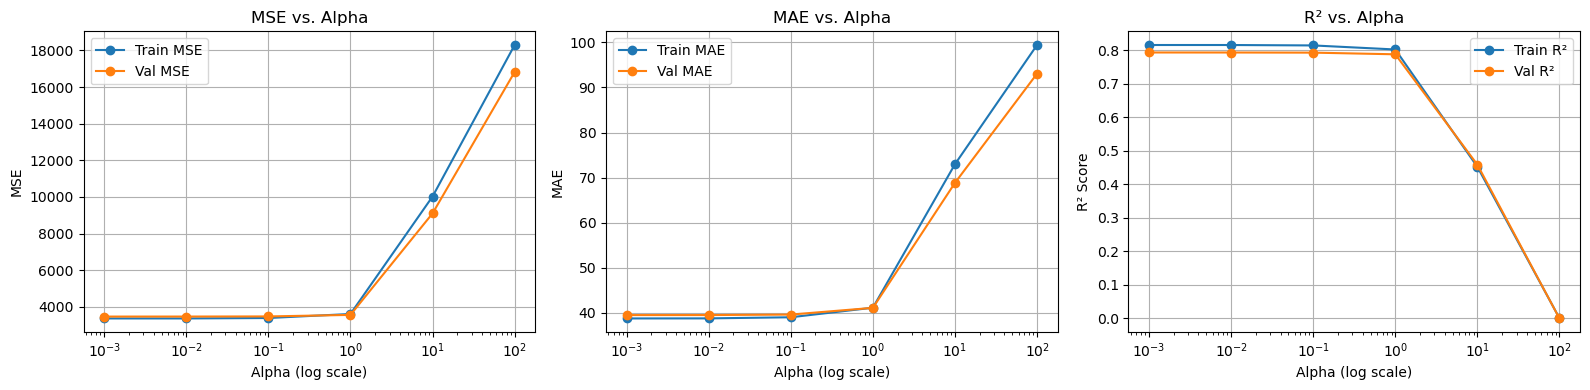

In [404]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

alpha_values = [0.001, 0.01, 0.1, 1, 10, 100]
lasso_models_9 = {}
train_mses_9, val_mses_9 = [], []
train_r2s_9, val_r2s_9 = [], []
train_maes_9, val_maes_9 = [], []
feature_names_9 = X_9_train_final.columns.tolist()
lasso_coeffs_dfs_9 = {}

print("Alpha\tTrain MSE\tVal MSE\t\tTrain R2\tVal R2\t\tTrain MAE\tVal MAE")

for alpha in alpha_values:
    lasso_9 = Lasso(alpha = alpha, max_iter = 10000)
    lasso_9.fit(X_9_train_final, y_9_train)
    coeffs_9 = lasso_9.coef_
    df_coeffs_9 = pd.DataFrame({'Feature': feature_names_9,'Coefficient': coeffs_9}).sort_values(
        by = 'Coefficient', key = abs, ascending = True).reset_index(drop = True)
    
    lasso_coeffs_dfs_9[alpha] = df_coeffs_9
    
    y_9_train_pred = lasso_9.predict(X_9_train_final)
    y_9_val_pred = lasso_9.predict(X_9_val_final)

    train_mse_9 = mean_squared_error(y_9_train, y_9_train_pred)
    val_mse_9 = mean_squared_error(y_9_val, y_9_val_pred)

    train_r2_9 = r2_score(y_9_train, y_9_train_pred)
    val_r2_9 = r2_score(y_9_val, y_9_val_pred)

    train_mae_9 = mean_absolute_error(y_9_train, y_9_train_pred)
    val_mae_9 = mean_absolute_error(y_9_val, y_9_val_pred)

    train_mses_9.append(train_mse_9)
    val_mses_9.append(val_mse_9)
    train_r2s_9.append(train_r2_9)
    val_r2s_9.append(val_r2_9)
    train_maes_9.append(train_mae_9)
    val_maes_9.append(val_mae_9)
    
    print(f"{alpha:.3f}\t{train_mse_9:.6f}\t\t{val_mse_9:.6f}\t\t{train_r2_9:.6f}\t\t{val_r2_9:.6f}\t\t{train_mae_9:.6f}\t\t{val_mae_9:.6f}")
    
    lasso_models_9[alpha] = lasso_9

##### Plotting #####
plt.figure(figsize = (16, 4))

# Plot MSE
plt.subplot(1, 3, 1)
plt.plot(alpha_values, train_mses_9, label = 'Train MSE', marker='o')
plt.plot(alpha_values, val_mses_9, label = 'Val MSE', marker='o')
plt.xscale('log')
plt.xlabel('Alpha (log scale)')
plt.ylabel('MSE')
plt.title('MSE vs. Alpha')
plt.legend()
plt.grid(True)

# Plot MAE
plt.subplot(1, 3, 2)
plt.plot(alpha_values, train_maes_9, label = 'Train MAE', marker = 'o')
plt.plot(alpha_values, val_maes_9, label = 'Val MAE', marker = 'o')
plt.xscale('log')
plt.xlabel('Alpha (log scale)')
plt.ylabel('MAE')
plt.title('MAE vs. Alpha')
plt.legend()
plt.grid(True)

# Plot R²
plt.subplot(1, 3, 3)
plt.plot(alpha_values, train_r2s_9, label = 'Train R²', marker = 'o')
plt.plot(alpha_values, val_r2s_9, label = 'Val R²', marker = 'o')
plt.xscale('log')
plt.xlabel('Alpha (log scale)')
plt.ylabel('R² Score')
plt.title('R² vs. Alpha')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [405]:
coeffs_df_9 = lasso_coeffs_dfs_9[1]
total_features_9 = len(coeffs_df_9)

non_zero_coeffs_9 = coeffs_df_9[coeffs_df_9['Coefficient'] != 0]
zero_coeffs_9 = coeffs_df_9[coeffs_df_9['Coefficient'] == 0]

print(f"Total features: {total_features_9}")
print(f"Non-zero coefficients: {len(non_zero_coeffs_9)}")
print(f"Zero coefficients: {len(zero_coeffs_9)}")

print("\n Non-zero Coefficients:")
print(non_zero_coeffs_9)

print("\n Zero Coefficients (feature names only):")
print(zero_coeffs_9['Feature'].tolist())

Total features: 107
Non-zero coefficients: 23
Zero coefficients: 84

 Non-zero Coefficients:
                     Feature  Coefficient
84      WEEKD_GROUP_WORK_DUR    -0.006756
85     HIGHEDU_GROUP_EXE_DUR    -0.093979
86          PERSHOU_CHILDREN     0.240189
87            MALE_OTHER_DUR     0.516826
88     MIDEDU_ALONE_WORK_DUR    -0.804648
89                  MALE_AGE     1.915035
90                     WEEKD    -2.264160
91                   HIGHEDU    -4.235695
92   EMPLOYED_ALONE_WORK_DUR    -4.712202
93     PERSHOU_ALONE_LEI_DUR    -5.272898
94                   HIGHINC    -5.277643
95                      MALE    -5.433490
96         PERSHOU_OTHER_DUR    -7.433993
97    PERSHOU_GROUP_WORK_DUR    -8.223808
98     PERSHOU_GROUP_LEI_DUR   -10.716612
99             GROUP_EXE_DUR   -37.046725
100            ALONE_INT_DUR   -51.401404
101         OTHER_TRAVEL_DUR   -57.455153
102            GROUP_LEI_DUR  -119.842179
103           ALONE_WORK_DUR  -126.930454
104            ALONE_LEI_

Evaluation on Test Set (alpha = 1):
Test MSE : 4169.894907
Test MAE : 42.790296
Test R²  : 0.769918


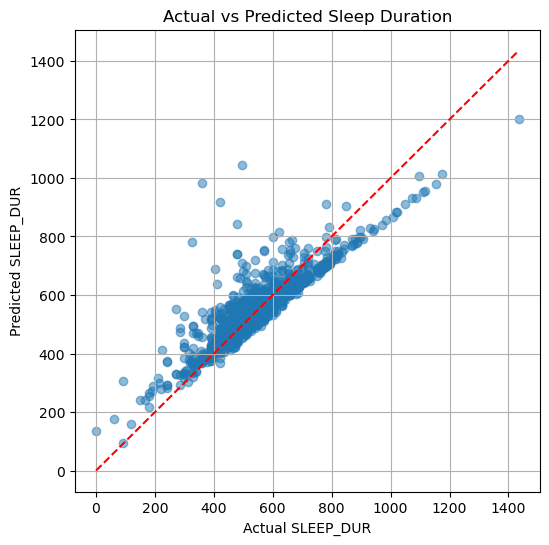

In [406]:
best_model_9 = lasso_models_9[1]

y_9_test_pred = best_model_9.predict(X_9_test_final)

test_mse_9 = mean_squared_error(y_9_test, y_9_test_pred)
test_mae_9 = mean_absolute_error(y_9_test, y_9_test_pred)
test_r2_9 = r2_score(y_9_test, y_9_test_pred)

print("Evaluation on Test Set (alpha = 1):")
print(f"Test MSE : {test_mse_9:.6f}")
print(f"Test MAE : {test_mae_9:.6f}")
print(f"Test R²  : {test_r2_9:.6f}")

results_df_9 = pd.DataFrame({
    'Actual SLEEP_DUR': y_9_test.values,
    'Predicted SLEEP_DUR': y_9_test_pred
})

results_df_9.head()

plt.figure(figsize = (6, 6))
plt.scatter(y_9_test, y_9_test_pred, alpha = 0.5)
plt.plot([y_9_test.min(), y_9_test.max()], [y_9_test.min(), y_9_test.max()], 'r--')
plt.xlabel('Actual SLEEP_DUR')
plt.ylabel('Predicted SLEEP_DUR')
plt.title('Actual vs Predicted Sleep Duration')
plt.grid(True)
plt.show()

#### Model Comparison: `+ ALONE_INT_DUR` vs. `+ ALONE_INT_DUR + GROUP_EXE_DUR`

We compare:

1. **Model A**: `OTHER_DUR` + `ALONE_LEI_DUR` + `GROUP_WORK_DUR` + `GROUP_LEI_DUR` + `ALONE_WORK_DUR` + `OTHER_TRAVEL_DUR` + `ALONE_INT_DUR`
2. **Model B**: Model A + `GROUP_EXE_DUR`

---

###### Correlation with True `SLEEP_DUR`

| Model                                                                                      | Correlation |
|---------------------------------------------------------------------------------------------|-------------|
| + `... + ALONE_INT_DUR`                                                                    | **0.8362**  |
| + `... + ALONE_INT_DUR + GROUP_EXE_DUR`                                                    | **0.8847**  |

- Adding `GROUP_EXE_DUR` yields a **5.8% increase** in correlation, suggesting that exercise with others is meaningfully associated with sleep duration.

---

##### Validation Performance Across Alpha Values

| Alpha  | Val R² (Before) | Val R² (After) | Absolute Δ | Relative Δ (%) |
|--------|------------------|----------------|------------|----------------|
| 0.001  | 0.7298           | **0.7938**     | +0.0640    | **+8.77%**     |
| 0.010  | 0.7294           | 0.7937         | +0.0643    | +8.82%         |
| 0.100  | 0.7267           | 0.7933         | +0.0666    | +9.17%         |
| 1.000  | 0.7117           | 0.7883         | +0.0766    | +10.76%        |
| 10.000 | 0.4432           | 0.4586         | +0.0154    | +3.48%         |
| 100.000| -0.0006          | -0.0006        | ~0.0000    | ~0.00%         |


- Validation R² improves significantly across all reasonable alpha values, with **8–11% relative gain**.

---

##### Test Evaluation (α = 0.1)

| Metric        | MODEL A             |MODEL B              | Absolute Δ | Relative Δ (%) |
|---------------|---------------------|---------------------|------------|----------------|
| **Test MSE**  | 5356.738721            | **3979.942056**        | -1,378.32  | ↓ **25.7%**     |
| **Test MAE**  | 49.696514 minutes       | **41.475685 minutes**   | -8.15      | ↓ **16.4%**     |
| **Test R²**   | 0.704431              | **0.780399**          | +0.0760    | ↑ **10.8%**     |

- This is a **clear performance gain**. The test MSE drops by over **25%**, and the R² score climbs meaningfully, indicating much better model fit.

---

##### Percentage Change Summary

| Metric        | % Change After Adding `GROUP_EXE_DUR` |
|---------------|----------------------------------------|
| **Test MSE**  | ↓ **25.7%**                            |
| **Test MAE**  | ↓ **16.4%**                            |
| **Test R²**   | ↑ **10.8%**                            |
| **Correlation** | ↑ **5.8%**                          |

- The improvements across all key metrics make a strong case for including `GROUP_EXE_DUR`.

---

##### Leakage Check Perspective

- Correlation is now at **0.88**, which is **approaching the caution zone**.
- While still under the **0.90 threshold**, this sharp increase suggests we are **getting closer to potential feature leakage territory**.
- There’s still evidence the model is learning meaningful structure — but we should **watch the next additions carefully**.

---

##### Conclusion

- `GROUP_EXE_DUR` offers **clear gains** in model accuracy and generalization.
- All validation and test metrics support including it, with substantial reductions in prediction error.
- However, correlation and R² are now **high enough** that further additions may begin to erode generalizability.

**It is still safe and worthwhile to add `GROUP_EXE_DUR`, but monitor for overfitting as performance nears theoretical upper bounds.**

**Next step**: "At this point, the model achieves strong predictive power (R² ≈ 0.78–0.80, Corr ≈ 0.88). Adding more _DUR features pushes correlation over 0.90, suggesting diminishing returns and potential data leakage. For generalizable modeling, we cap feature inclusion at this point."


## Summary of All Models

### Initial Models (Model 1, Model 2, Model 3)

We began by evaluating three **initial models** that only used **aggregated duration features**. In the dataset, several features are **sums of more granular ones**, prompting us to investigate whether it's better to use the **aggregated** or **split** versions.

#### In-Common Features Across All Three Models:
`WEEKD, MIDEDU, HIGHEDU, PERSHOU, MIDINC, HIGHINC, EMPLOYED, MALE`, `ADULT`, `CHILDREN`

#### Key Differences Between the Models:

- `EXE_DUR` = `ALONE_EXE_DUR` + `GROUP_EXE_DUR`
- `WORK_DUR` = `ALONE_WORK_DUR` + `GROUP_WORK_DUR`
- `INT_DUR` = `ALONE_INT_DUR` + `GROUP_INT_DUR`
- `LEI_DUR` = `ALONE_LEI_DUR` + `GROUP_LEI_DUR`
- `TRAVEL_DUR` = `TRAVEL_WORK_DUR` + `TRAVEL_SOCO_DUR` + `TRAVEL_ENT_DUR` + `TRAVEL_EXE_DUR` + `OTHER_TRAVEL_DUR`

#### Model Definitions

- **Model 1**:  
  `(In-common features) + EXE_DUR + WORK_DUR + INT_DUR + LEI_DUR + TRAVEL_DUR`

- **Model 2**:  
  `(In-common features) + ALONE_*/GROUP_* versions of EXE/WORK/INT/LEI + TRAVEL_DUR`

- **Model 3**:  
  `(In-common features) + ALONE_*/GROUP_* versions + all travel subcomponents`

All these models are affected by **data leakage** because the total time (including `SLEEP_DUR` and all `_DUR` features) sums to 1440 minutes. This leads to **perfect or near-perfect correlation** with `SLEEP_DUR` and unrealistically high model metrics. Although splitting aggregated features slightly degrades performance (making Lasso’s job harder), the models are still **artificially inflated**.

We chose to proceed with **Model 3** as the base for further development.

---

### Secondary Model Selection

Starting from Model 3, we removed all `_DUR` features and created a **baseline model** with only contextual/demographic features. We then used:

- **Lasso importance rankings**
- A **One-Factor-At-a-Time (OFAT)** approach  
to **incrementally reintroduce** the most informative `_DUR` features.

We stopped once the model’s correlation approached **0.90** and **R² neared 0.80**, to avoid entering the **data leakage zone**.

---

### Incremental Model Development

| Model   | Included Features                                                                                                                                              |
|---------|------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Model 3_1 | In-common features only                                                                                                                                        |
| Model 3_2 | Model 1 + `OTHER_DUR`                                                                                                                                                  |
| Model 3_3 | Model 2 + `ALONE_LEI_DUR`                                                                                                                                              |
| Model 3_4 | Model 3 + `GROUP_WORK_DUR`                                                                                                                                             |
| Model 3_5 | Model 4 + `GROUP_LEI_DUR`                                                                                                                                              |
| Model 3_6 | Model 5 + `ALONE_WORK_DUR`                                                                                                                                             |
| Model 3_7 | Model 6 + `OTHER_TRAVEL_DUR`                                                                                                                                           |
| Model 3_8 | Model 7 + `ALONE_INT_DUR`                                                                                                                                              |
| Model 3_9 | Model 8 + `GROUP_EXE_DUR`                                                                                                                                              |

---

### Final Model (Model 9)

| Metric         | Value        |
|----------------|--------------|
| **Correlation**| **0.88**     |
| **Test MSE**   | **3980**     |
| **Test MAE**   | **41 minutes** |
| **Test R²**    | **0.78**     |

This model explains **~78% of the variance in `SLEEP_DUR`**, with low error and a strong, safe correlation.

---

### Ignored `_DUR` Features

These were excluded to prevent leakage and overfitting:

`GROUP_INT_DUR, ALONE_EXE_DUR, TRAVEL_WORK_DUR, TRAVEL_SOCO_DUR, TRAVEL_ENT_DUR, TRAVEL_EXE_DUR`

---

### Summary

- Starting from a leakage-prone model, we carefully constructed a reliable one using a principled feature selection strategy.
- The final model balances **performance and generalization**, without relying on tautological relationships.
- It marks a **solid stopping point**, with clear reasoning behind included/excluded features

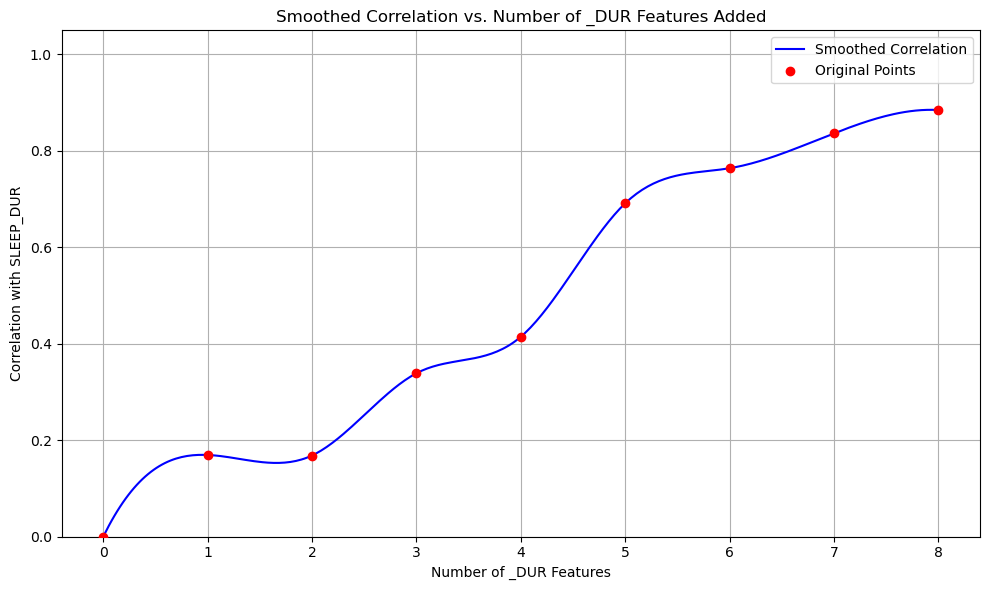

In [409]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline

##### Number of _DUR features added #####
dur_counts = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8])

##### Corresponding correlation values #####
correlations = np.array([
    np.nan,  # 0 DUR
    correlation_2,
    correlation_3,
    correlation_4,
    correlation_5,
    correlation_6,
    correlation_7,
    correlation_8,
    correlation_9
])

##### Handle NaN (replace with 0 or interpolate) #####
correlations[0] = 0  # assume 0 correlation at baseline

##### Smooth interpolation #####
x_smooth = np.linspace(dur_counts.min(), dur_counts.max(), 300)
spline = make_interp_spline(dur_counts, correlations, k=3)
y_smooth = spline(x_smooth)

##### Plot #####
plt.figure(figsize=(10, 6))
plt.plot(x_smooth, y_smooth, label="Smoothed Correlation", color="blue")
plt.scatter(dur_counts, correlations, color="red", label="Original Points", zorder=5)

plt.title("Smoothed Correlation vs. Number of _DUR Features Added")
plt.xlabel("Number of _DUR Features")
plt.ylabel("Correlation with SLEEP_DUR")
plt.grid(True)
plt.legend()
plt.ylim(0, 1.05)
plt.xticks(dur_counts)
plt.tight_layout()
plt.show()


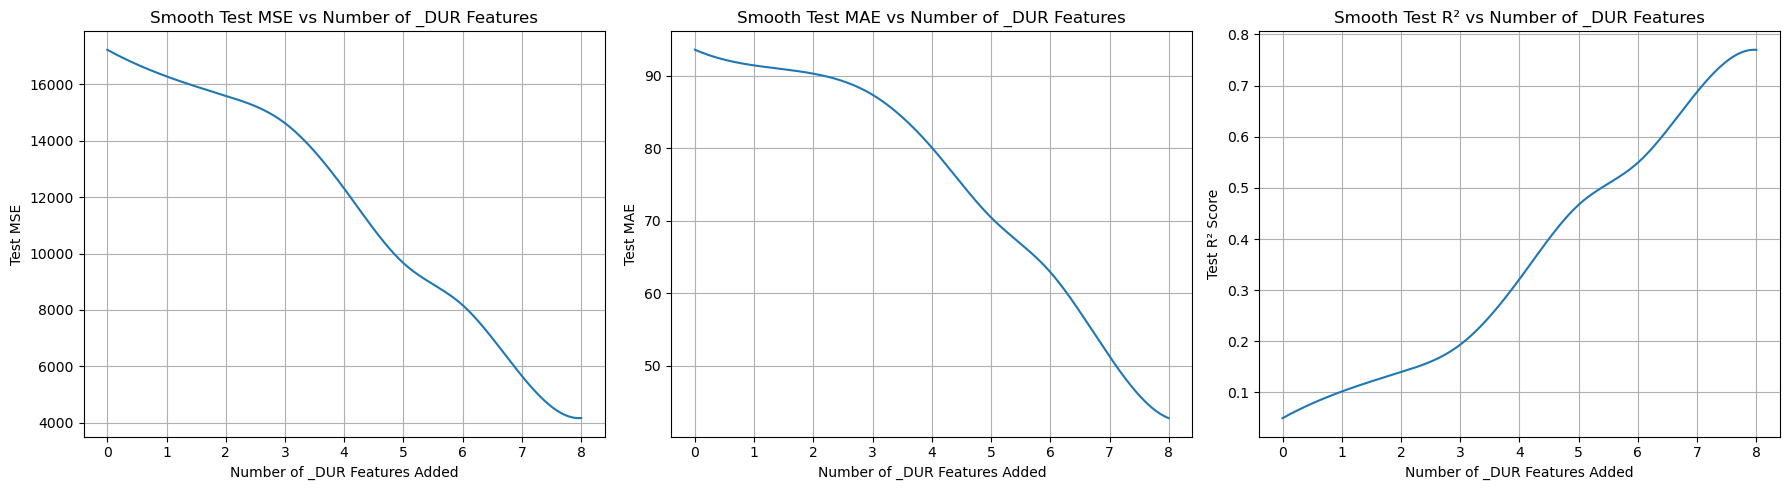

In [410]:
##### Raw data #####
dur_counts = np.array(range(9))

mse_values = np.array([test_mse_1, test_mse_2, test_mse_3, test_mse_4,
                       test_mse_5, test_mse_6, test_mse_7, test_mse_8, test_mse_9])

mae_values = np.array([test_mae_1, test_mae_2, test_mae_3, test_mae_4,
                       test_mae_5, test_mae_6, test_mae_7, test_mae_8, test_mae_9])

r2_values = np.array([test_r2_1, test_r2_2, test_r2_3, test_r2_4,
                      test_r2_5, test_r2_6, test_r2_7, test_r2_8, test_r2_9])

##### Create smoother x-axis #####
x_smooth = np.linspace(dur_counts.min(), dur_counts.max(), 300)

##### Smooth curves #####
mse_spline = make_interp_spline(dur_counts, mse_values, k = 3)(x_smooth)
mae_spline = make_interp_spline(dur_counts, mae_values, k = 3)(x_smooth)
r2_spline = make_interp_spline(dur_counts, r2_values, k = 3)(x_smooth)

##### Plotting #####
plt.figure(figsize = (18, 5))

#### MSE ####
plt.subplot(1, 3, 1)
plt.plot(x_smooth, mse_spline)
plt.title("Smooth Test MSE vs Number of _DUR Features")
plt.xlabel("Number of _DUR Features Added")
plt.ylabel("Test MSE")
plt.grid(True)

#### MAE ####
plt.subplot(1, 3, 2)
plt.plot(x_smooth, mae_spline)
plt.title("Smooth Test MAE vs Number of _DUR Features")
plt.xlabel("Number of _DUR Features Added")
plt.ylabel("Test MAE")
plt.grid(True)

#### R² ####
plt.subplot(1, 3, 3)
plt.plot(x_smooth, r2_spline)
plt.title("Smooth Test R² vs Number of _DUR Features")
plt.xlabel("Number of _DUR Features Added")
plt.ylabel("Test R² Score")
plt.grid(True)

plt.tight_layout()
plt.show()


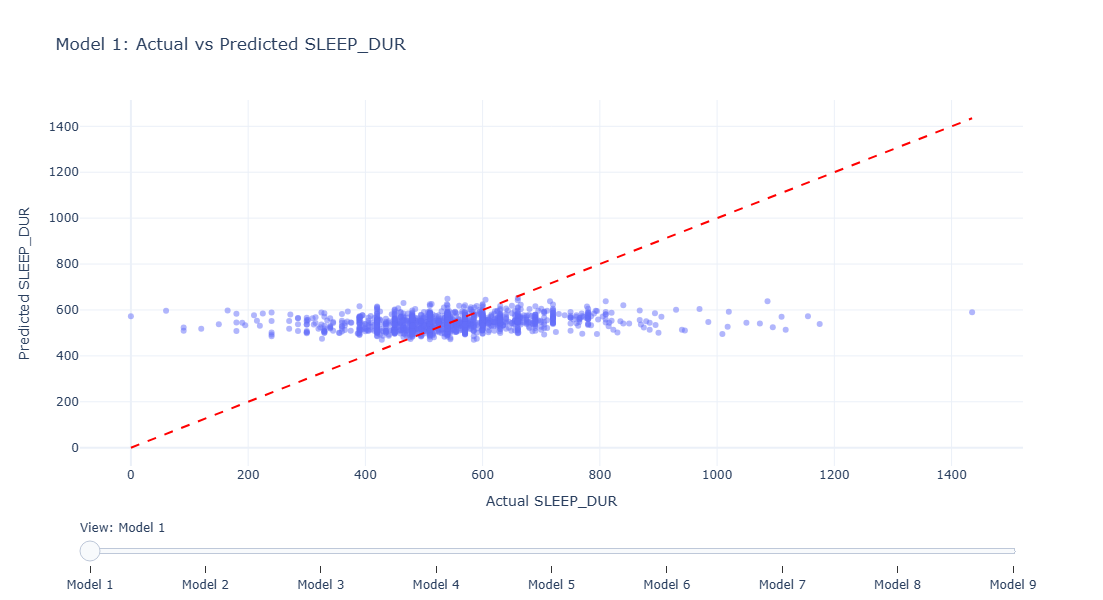

In [411]:
import plotly.graph_objects as go

actuals = [y_1_test, y_2_test, y_3_test, y_4_test, y_5_test, y_6_test, y_7_test, y_8_test, y_9_test]
preds   = [y_1_test_pred, y_2_test_pred, y_3_test_pred, y_4_test_pred, y_5_test_pred,
           y_6_test_pred, y_7_test_pred, y_8_test_pred, y_9_test_pred]

fig = go.Figure()

##### Create one trace per plot and make all but the first one invisible #####
for i, (actual, pred) in enumerate(zip(actuals, preds)):
    fig.add_trace(go.Scatter(
        x = actual,
        y = pred,
        mode = 'markers',
        marker = dict(opacity = 0.5),
        name = f'Model {i+1}',
        visible = (i == 0)
    ))

##### Add diagonal reference line (same for all plots) #####
ref_line = go.Scatter(
    x = [min(min(a) for a in actuals), max(max(a) for a in actuals)],
    y = [min(min(a) for a in actuals), max(max(a) for a in actuals)],
    mode = 'lines',
    line = dict(dash = 'dash', color = 'red'),
    showlegend = False
)
fig.add_trace(ref_line)

##### Build slider steps #####
steps = []
for i in range(len(actuals)):
    step = dict(
        method = "update",
        args = [{"visible": [j == i for j in range(len(actuals))] + [True]},  # Only show current + ref line
              {"title": f"Model {i+1}: Actual vs Predicted SLEEP_DUR"}],
        label=f"Model {i+1}"
    )
    steps.append(step)

sliders = [dict(
    active = 0,
    currentvalue = {"prefix": "View: "},
    pad = {"t": 50},
    steps = steps
)]

##### Layout #####
fig.update_layout(
    sliders = sliders,
    title = "Model 1: Actual vs Predicted SLEEP_DUR",
    xaxis_title = "Actual SLEEP_DUR",
    yaxis_title = "Predicted SLEEP_DUR",
    height = 600,
    width = 600,
    showlegend = False,
    template = "plotly_white"
)

fig.show()

# Neural Networks

## 1. Neural Networks Overview

A **neural network** is a computational model composed of layers of interconnected nodes (neurons). Each layer transforms its input data using a learned function and passes the result to the next layer. The most common type of network for many tasks is the **feedforward neural network**, where information moves only in one direction—from input to output.

A simple feedforward network with one hidden layers may look like:

$\
x \rightarrow \text{Linear}_1 \rightarrow \text{ReLU} \rightarrow\rightarrow \text{Linear}_2 \rightarrow \text{ReLU} \rightarrow \rightarrow \text{Output}
\$

---

## 2. Linear Layer (Fully Connected Layer)

A **linear layer** applies a linear transformation to the incoming data. If the input is a vector $x \in \mathbb{R}^n$, the transformation is defined as:

\[
y = Wx + b
\]

Where:
$W \in \mathbb{R}^{m \times n}$ is the weight matrix  
- $b \in \mathbb{R}^{m}$ is the bias vector  
- $y \in \mathbb{R}^{m}$ is the output vector
This operatio$n is equivalent to an affine transformation.

---

## 3. ReLU Activation Function

**ReLU (Rectified Linear Unit)** is one of the most common activation functions. It introduces non-linearity into the network, enabling the model to learn more complex functions.

Mathematically, ReLU is defined as:


$\text{ReLU}(z) = \max(0, z)$


Where \( z \) is the input to the activation function (typically the output from a linear layer). ReLU sets all negative values to zero and keeps positive values unchanged.

---

## 4. Combined Forward Pass

Putting it all together, a typical forward pass through a neural network with two layers, ReLU activations, and dropout looks like this:

\
\begin{align*}
z_1 &= W_1 x + b_1 \\
a_1 &= \text{ReLU}(z_1) \\
z_2 &= W_2 a_1 + b_2 \\
a_2 &= \text{ReLU}(z_2) \\
y &= W_3 \tilde{a}_2 + b_3
\end{align*}


Each step transforms the input and passes it to the next layer.



# Neural Network Architecture: Input → Linear → ReLU → Linear → ReLU → Linear → Output

This neural network architecture uses one hidden layer, followed by a **ReLU activation** to improve non-linearity.

---

## Architecture Overview

1. **Input Layer**: Input vector $x \in \mathbb{R}^n$
2. **First Linear Layer**: Affine transformation  
   $$
   z_1 = W_1 x + b_1
   $$
3. **ReLU Activation**:  
   $$
   a_1 = \text{ReLU}(z_1) = \max(0, z_1)
   $$
4. **Second Linear Layer**:  
   $$
   z_2 = W_2 a_1 + b_2
   $$
5. **ReLU Activation**:  
   $$
   a_2 = \text{ReLU}(z_2)
   $$
6. **Output Layer**:  
   $$
   y = W_3 a_2 + b_3
   $$

---

##` Dimensional Details

Let:
- $x \in \mathbb{R}^n$ be the input
- $W_1 \in \mathbb{R}^{h_1 \times n},\ b_1 \in \mathbb{R}^{h_1}$
- $W_2 \in \mathbb{R}^{h_2 \times h_1},\ b_2 \in \mathbb{R}^{h_2}$
- $W_3 \in \mathbb{R}^{m \times h_2},\ b_3 \in \mathbb{R}^{m}$
- $y \in \mathbb{R}^m$ is the final output

---


This architecture enables the network to:
- Learn non-linear functions via **ReLU**
- Reduce overfitting through regularization
- Map input features through two learnable transformations before generating an output



### Neural Network Parameters

| Parameter             | Value                 | Description                                      |
|-----------------------|-----------------------|--------------------------------------------------|
| Hidden Layers         | [64, 32]             | Sizes of hidden layers                           |                         |
| Activation Function   | ReLU                  | Activation used in hidden layers                 |                     |
| Loss Function         | L2 Loss      | Loss function used during training               |
| Optimizer             | Adam                  | Optimization algorithm                           |
| Learning Rate         | 0.005                 | Step size for weight updates                     |
| Batch Size            | 16                    | Number of samples per training batch             |
| Epochs                | 200                    | Total passes through the training dataset        |
| L1 Regularization        | 0.005       | Prevents overfitting in hidden layers            |


To train a neural network with L2 loss (mean squared error) and L1 regularization, we're combining two key components:

L2 Loss (MSE): Penalizes the squared difference between predictions and targets.

L1 Regularization: Penalizes the absolute values of the model weights to promote sparsity.

As before, read the data, drop few columns, add one hot encoding and do train-test-validation split

Drop All Sleep Related Features (Non Duration Feature Model - without interaction terms)

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
#load dataset
df = pd.read_csv('D_PER_DAY.csv')
print(df.shape)
##### One-hot Encoding #####
# Whether it is a weekday or not #
df['WEEKD'] = np.where(df['DIARYDAY'].isin([1,7]), 0, 1)

# Education level (low, mid, hight) #
df['MIDEDU'] = np.where(df['EDU'].isin([40,41,42]), 1, 0)
df['HIGHEDU'] = np.where(df['EDU'].isin([43,44,45,46]), 1, 0)

# Whether lives in a stationary house or not #
df['PERSHOU'] = np.where(df['HOUSE'] == 1, 1, 0)

# Income level (low, mid, high) #
df['MIDINC'] = np.where(df['INC'].isin([9,10,11,12,13]), 1, 0)
df['HIGHINC'] = np.where(df['INC'].isin([14,15,16]), 1, 0)

# Whether at work or not #
df['EMPLOYED'] = np.where(df['EMP_STAT'] == 1, 1, 0)

# Whether male or not #
df['MALE'] = np.where(df['SEX'] == 1, 1, 0)
#drop columns
columns_to_drop = [col for col in df.columns if col.endswith('DUR') and col != 'SLEEP_DUR' ]
df.drop(columns=columns_to_drop, axis=1, inplace=True)
# Dropping previous columns #
cols_to_drop = ['DIARYDAY', 'EDU', 'HOUSE', 'INC', 'EMP_STAT', 'SEX']
df.drop(columns = cols_to_drop, inplace = True)
print(df.shape)
#separate features and target
X = df.drop(['SLEEP_DUR','CASEID'], axis=1)
y = df['SLEEP_DUR']
print(X.columns.tolist())

# X_train,X_temp,y_train,y_temp = train_test_split(X,y,test_size=0.3,random_state=42)
# X_val,X_test,y_val,y_test = train_test_split(X_temp,y_temp,test_size=0.5,random_state=42)
# #standardize
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_val = scaler.transform(X_val)
# X_test = scaler.transform(X_test)


(8548, 30)
(8548, 13)
['AGE', 'CHILDREN', 'ADULT', 'WEEKD', 'MIDEDU', 'HIGHEDU', 'PERSHOU', 'MIDINC', 'HIGHINC', 'EMPLOYED', 'MALE']


In [10]:
dummy_cols = ['WEEKD', 'MIDEDU', 'HIGHEDU', 'PERSHOU', 'MIDINC', 'HIGHINC', 'EMPLOYED', 'MALE']
numeric_cols = [col for col in X.columns if col not in dummy_cols]

##### Spliting Data #####
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size = 0.3, random_state = 42
)

X_test, X_val, y_test, y_val = train_test_split(
    X_temp, y_temp, test_size = 0.5, random_state = 42
)

##### Scaling the Data Values #####
scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train[numeric_cols]),
                              columns = numeric_cols, index = X_train.index)
X_val_scaled = pd.DataFrame(scaler.transform(X_val[numeric_cols]),
                            columns = numeric_cols, index = X_val.index)
X_test_scaled = pd.DataFrame(scaler.transform(X_test[numeric_cols]),
                             columns = numeric_cols, index = X_test.index)

# Recombining Numerical and Dummy Columns
X_train_final = pd.concat([X_train_scaled, X_train[dummy_cols]], axis = 1)
X_val_final = pd.concat([X_val_scaled, X_val[dummy_cols]], axis = 1)
X_test_final = pd.concat([X_test_scaled, X_test[dummy_cols]], axis = 1)

# ##### Slope Interactions #####
# for dummy in dummy_cols:
#     for numeric in numeric_cols:
#         interaction_term = f"{dummy}_{numeric}"
#         X_1_train_final[interaction_term] = X_1_train_final[dummy] * X_1_train_final[numeric]
#         X_1_val_final[interaction_term] = X_1_val_final[dummy] * X_1_val_final[numeric]
#         X_1_test_final[interaction_term] = X_1_test_final[dummy] * X_1_test_final[numeric]


# X_1_val_final.head()
X_train_final.values.shape

(5983, 11)

In [14]:
import torch
from torch.utils.data import TensorDataset, DataLoader

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

#convert to tensors
X_train_tensor = torch.tensor(X_train_final.values, dtype=torch.float32, device=device)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32, device=device)
X_val_tensor = torch.tensor(X_val_final.values, dtype=torch.float32, device=device)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32, device=device)
X_test_tensor = torch.tensor(X_test_final.values, dtype=torch.float32, device=device)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32, device=device)

#create dataloaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

In [16]:
#define neural network
import torch.nn as nn
class Net(nn.Module):
    def __init__(self, input_size):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size,64)
        self.fc2 = nn.Linear(64,32)
        self.fc3 = nn.Linear(32,1)
        self.relu = nn.ReLU()
    def forward(self,x):
        x = self.relu(self.fc1(x))
        # x = self.dropout(x)
        x = self.relu(self.fc2(x))
        # x = self.dropout(x)
        x = self.fc3(x)
        return x

In [18]:
#train the model
l1_reg = 0.005
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = Net(X_train.shape[1]).to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.005)
for epoch in range(200):
    model.train()
    train_loss = 0.0
    val_loss = 0.0
    for inputs, targets in train_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets.unsqueeze(1))
        loss += l1_reg * sum(p.abs().sum() for p in model.parameters())
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    train_loss /= len(train_loader)
    model.eval()
    with torch.no_grad():
        for inputs, targets in val_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, targets.unsqueeze(1))
            val_loss += loss.item()
        val_loss /= len(val_loader)
    if epoch % 20 == 0:
      print(f'Epoch {epoch+1}/{200}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}')
train_loss

Epoch 1/200, Train Loss: 66531.1972, Val Loss: 20809.4350
Epoch 21/200, Train Loss: 16847.5586, Val Loss: 16497.5594
Epoch 41/200, Train Loss: 16639.8020, Val Loss: 17421.7357
Epoch 61/200, Train Loss: 16518.2800, Val Loss: 16068.4994
Epoch 81/200, Train Loss: 16307.1950, Val Loss: 16268.8730
Epoch 101/200, Train Loss: 16194.6852, Val Loss: 16841.3603
Epoch 121/200, Train Loss: 16007.5415, Val Loss: 17325.8588
Epoch 141/200, Train Loss: 15723.2214, Val Loss: 17087.5633
Epoch 161/200, Train Loss: 15654.4572, Val Loss: 16966.3661
Epoch 181/200, Train Loss: 15268.8250, Val Loss: 17028.5333


15039.372396050927

Mean Squared Error: 14905.495957971256


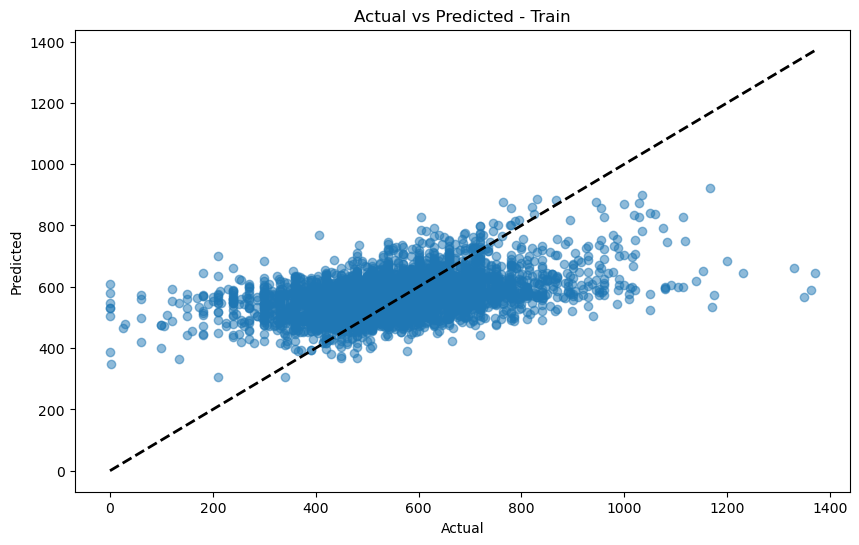

Mean Squared Error: 17576.32241934317


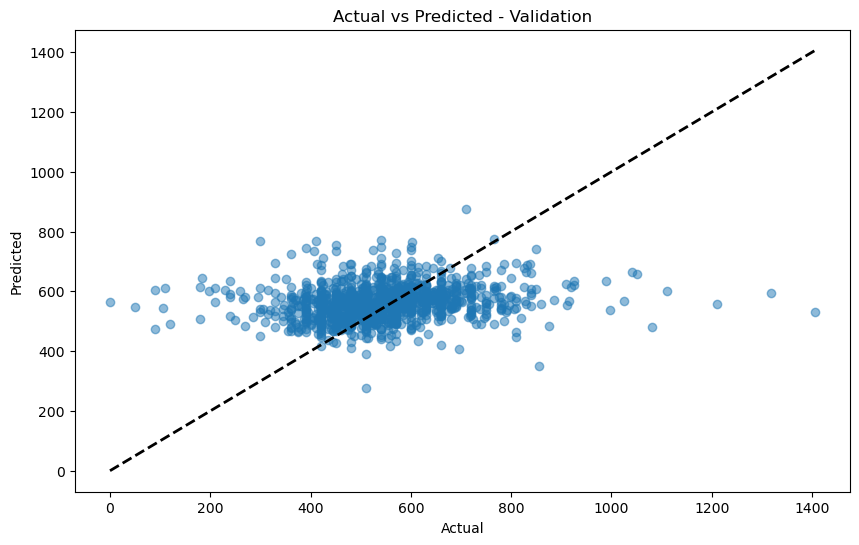

Mean Squared Error: 19044.495810426313


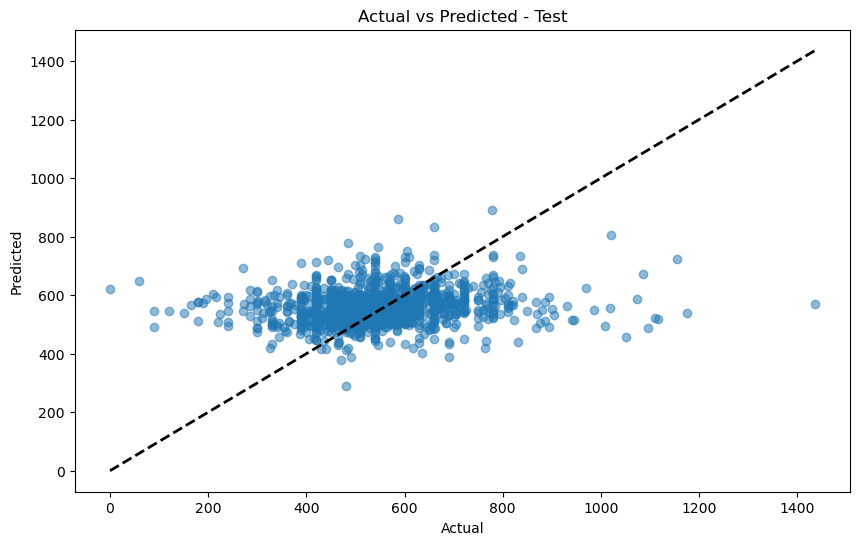

In [20]:
model.eval()

mse_total = 0
n = 0
actual = []
predictions = []
with torch.no_grad():
  loss = 0
  for inputs, targets in train_loader:
    inputs, targets = inputs.to(device), targets.to(device)
    outputs = model(inputs)
    predictions.extend(outputs.cpu().numpy().flatten())
    actual.extend(targets.cpu().numpy().flatten())
    loss = criterion(outputs, targets.unsqueeze(1))
    mse_total += loss.item()
    n += 1
  mse = mse_total / n
  print(f'Mean Squared Error: {mse}')

#plot
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(actual, predictions, alpha=0.5)
plt.plot([min(actual), max(actual)], [min(actual), max(actual)], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted - Train')
plt.show()
model.eval()
mse_total = 0
n = 0
actual = []
predictions = []
with torch.no_grad():
  loss = 0
  for inputs, targets in val_loader:
    inputs, targets = inputs.to(device), targets.to(device)
    outputs = model(inputs)
    predictions.extend(outputs.cpu().numpy().flatten())
    actual.extend(targets.cpu().numpy().flatten())
    loss = criterion(outputs, targets.unsqueeze(1))
    mse_total += loss.item()
    n += 1
  mse = mse_total / n
  print(f'Mean Squared Error: {mse}')

#plot
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(actual, predictions, alpha=0.5)
plt.plot([min(actual), max(actual)], [min(actual), max(actual)], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted - Validation')
plt.show()
model.eval()
mse_total = 0
n = 0
actual = []
predictions = []
with torch.no_grad():
  loss = 0
  for inputs, targets in test_loader:
    inputs, targets = inputs.to(device), targets.to(device)
    outputs = model(inputs)
    predictions.extend(outputs.cpu().numpy().flatten())
    actual.extend(targets.cpu().numpy().flatten())
    loss = criterion(outputs, targets.unsqueeze(1))
    mse_total += loss.item()
    n += 1
  mse = mse_total / n
  print(f'Mean Squared Error: {mse}')

#plot
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(actual, predictions, alpha=0.5)
plt.plot([min(actual), max(actual)], [min(actual), max(actual)], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted - Test')
plt.show()

| Model | Training Error | Validation Error | Test Error |
| -------- | ------------ | -------------- | ------------|
| Non-Duration Model     | 15715      |  16291         |17535|

Training error is very high , which indicates that either the model is not trained properly possibly due to errors in backpropagation or the data doesn't have enough non-linearity for the model to learn from

Now Lets train the NonDuration Model with interaction terms


In [23]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#load dataset
df = pd.read_csv('D_PER_DAY.csv')
print(df.shape)
##### One-hot Encoding #####
# Whether it is a weekday or not #
df['WEEKD'] = np.where(df['DIARYDAY'].isin([1,7]), 0, 1)

# Education level (low, mid, hight) #
df['MIDEDU'] = np.where(df['EDU'].isin([40,41,42]), 1, 0)
df['HIGHEDU'] = np.where(df['EDU'].isin([43,44,45,46]), 1, 0)

# Whether lives in a stationary house or not #
df['PERSHOU'] = np.where(df['HOUSE'] == 1, 1, 0)

# Income level (low, mid, high) #
df['MIDINC'] = np.where(df['INC'].isin([9,10,11,12,13]), 1, 0)
df['HIGHINC'] = np.where(df['INC'].isin([14,15,16]), 1, 0)

# Whether at work or not #
df['EMPLOYED'] = np.where(df['EMP_STAT'] == 1, 1, 0)

# Whether male or not #
df['MALE'] = np.where(df['SEX'] == 1, 1, 0)
#drop columns
columns_to_drop = [col for col in df.columns if col.endswith('DUR') and col != 'SLEEP_DUR' ]
df.drop(columns=columns_to_drop, axis=1, inplace=True)
# Dropping previous columns #
cols_to_drop = ['DIARYDAY', 'EDU', 'HOUSE', 'INC', 'EMP_STAT', 'SEX']
df.drop(columns = cols_to_drop, inplace = True)
print(df.shape)
#separate features and target
X = df.drop(['SLEEP_DUR','CASEID'], axis=1)
y = df['SLEEP_DUR']
print(X.columns.tolist())

# X_train,X_temp,y_train,y_temp = train_test_split(X,y,test_size=0.3,random_state=42)
# X_val,X_test,y_val,y_test = train_test_split(X_temp,y_temp,test_size=0.5,random_state=42)
# #standardize
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_val = scaler.transform(X_val)
# X_test = scaler.transform(X_test)
dummy_cols = ['WEEKD', 'MIDEDU', 'HIGHEDU', 'PERSHOU', 'MIDINC', 'HIGHINC', 'EMPLOYED', 'MALE']
numeric_cols = [col for col in X.columns if col not in dummy_cols]

##### Spliting Data #####
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size = 0.3, random_state = 42
)

X_test, X_val, y_test, y_val = train_test_split(
    X_temp, y_temp, test_size = 0.5, random_state = 42
)

##### Scaling the Data Values #####
scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train[numeric_cols]),
                              columns = numeric_cols, index = X_train.index)
X_val_scaled = pd.DataFrame(scaler.transform(X_val[numeric_cols]),
                            columns = numeric_cols, index = X_val.index)
X_test_scaled = pd.DataFrame(scaler.transform(X_test[numeric_cols]),
                             columns = numeric_cols, index = X_test.index)

# Recombining Numerical and Dummy Columns
X_train_final = pd.concat([X_train_scaled, X_train[dummy_cols]], axis = 1)
X_val_final = pd.concat([X_val_scaled, X_val[dummy_cols]], axis = 1)
X_test_final = pd.concat([X_test_scaled, X_test[dummy_cols]], axis = 1)

##### Slope Interactions #####
for dummy in dummy_cols:
    for numeric in numeric_cols:
        interaction_term = f"{dummy}_{numeric}"
        X_train_final[interaction_term] = X_train_final[dummy] * X_train_final[numeric]
        X_val_final[interaction_term] = X_val_final[dummy] * X_val_final[numeric]
        X_test_final[interaction_term] = X_test_final[dummy] * X_test_final[numeric]


X_train_final.head()

(8548, 30)
(8548, 13)
['AGE', 'CHILDREN', 'ADULT', 'WEEKD', 'MIDEDU', 'HIGHEDU', 'PERSHOU', 'MIDINC', 'HIGHINC', 'EMPLOYED', 'MALE']


AGE  CHILDREN     ADULT  WEEKD  MIDEDU  HIGHEDU  PERSHOU  MIDINC  \
4528 -0.143076 -0.529119 -1.116979      0       1        0        1       1   
1760  0.719689 -0.529119 -1.116979      1       0        0        1       1   
2851  0.935381 -0.529119 -1.116979      1       0        0        1       1   
297   0.611844 -0.529119  0.139202      1       1        0        1       0   
443  -0.897996 -0.529119  0.139202      1       0        1        1       0   

      HIGHINC  EMPLOYED  ...  MIDINC_ADULT  HIGHINC_AGE  HIGHINC_CHILDREN  \
4528        0         0  ...     -1.116979    -0.000000         -0.000000   
1760        0         0  ...     -1.116979     0.000000         -0.000000   
2851        0         0  ...     -1.116979     0.000000         -0.000000   
297         1         1  ...      0.000000     0.611844         -0.529119   
443         1         1  ...      0.000000    -0.897996         -0.529119   

      HIGHINC_ADULT  EMPLOYED_AGE  EMPLOYED_CHILDREN  EMPLOYED_ADULT  \
4528      -0.000000     -0.000000          -0.000000       -0.000000   
1760      -0.000000      0.000000          -0.000000       -0.000000   
2851      -0.000000      0.000000          -0.000000       -0.000000   
297        0.139202      0.611844          -0.529119        0.139202   
443        0.139202     -0.897996          -0.529119        0.139202   

      MALE_AGE  MALE_CHILDREN  MALE_ADULT  
4528 -0.143076      -0.529119   -1.116979  
1760  0.719689      -0.529119   -1.116979  
2851  0.000000      -0.000000   -0.000000  
297   0.000000      -0.000000    0.000000  
443  -0.000000      -0.000000    0.000000  

[5 rows x 35 columns]

In [25]:
import torch
from torch.utils.data import TensorDataset, DataLoader

#convert to tensors
X_train_tensor = torch.tensor(X_train_final.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val_final.values, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_final.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

#create dataloaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

#train the model
l1_reg = 0.005
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = Net(X_train_final.shape[1]).to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.005)
for epoch in range(200):
    model.train()
    train_loss = 0.0
    val_loss = 0.0
    for inputs, targets in train_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets.unsqueeze(1))
        loss += l1_reg * sum(p.abs().sum() for p in model.parameters())
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    train_loss /= len(train_loader)
    for inputs, targets in val_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets.unsqueeze(1))
        val_loss += loss.item()
    val_loss /= len(val_loader)
    if epoch % 20 == 0:
      print(f'Epoch {epoch+1}/{200}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}')

Epoch 1/200, Train Loss: 67646.0734, Val Loss: 22338.0234
Epoch 21/200, Train Loss: 17054.9369, Val Loss: 16323.5094
Epoch 41/200, Train Loss: 16548.3021, Val Loss: 16905.0458
Epoch 61/200, Train Loss: 16424.9728, Val Loss: 16428.3278
Epoch 81/200, Train Loss: 15984.5187, Val Loss: 17030.1060
Epoch 101/200, Train Loss: 15742.7552, Val Loss: 17157.7285
Epoch 121/200, Train Loss: 15330.8450, Val Loss: 17271.4492
Epoch 141/200, Train Loss: 14987.0420, Val Loss: 17948.7346
Epoch 161/200, Train Loss: 14618.5479, Val Loss: 17969.6891
Epoch 181/200, Train Loss: 14416.5583, Val Loss: 18227.2497


Mean Squared Error: 13516.58118132729


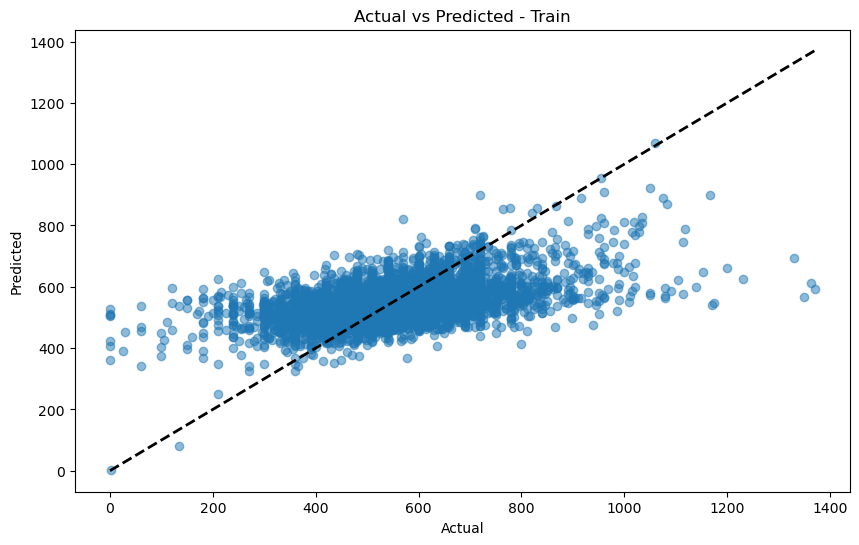

Mean Squared Error: 18708.52401017554


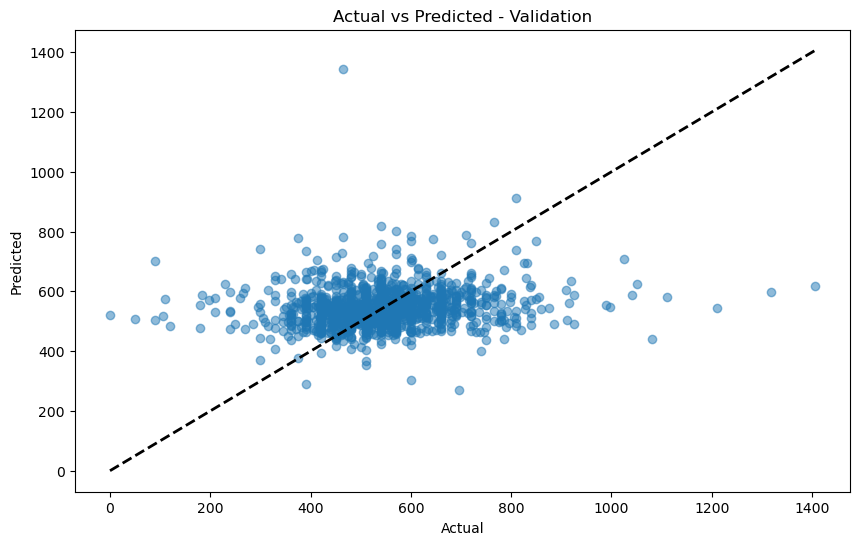

Mean Squared Error: 19850.125030140818


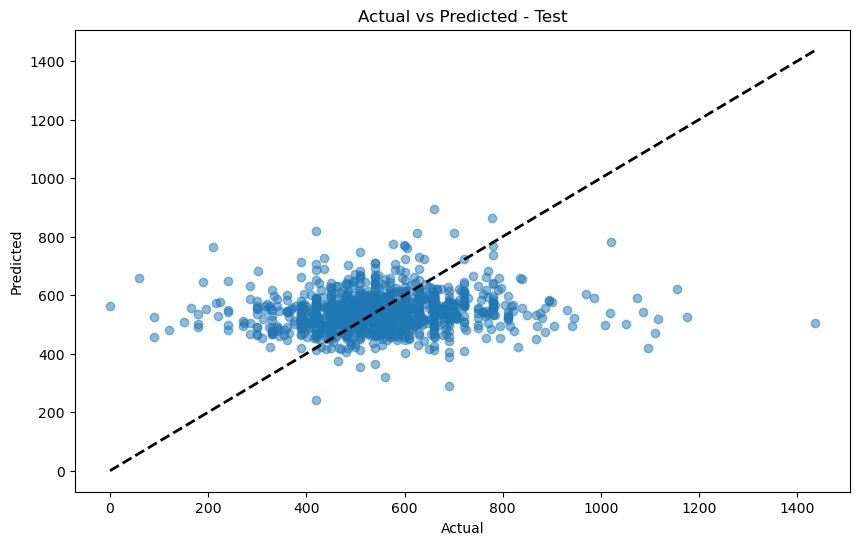

In [31]:
model.eval()
mse_total = 0
n = 0
actual = []
predictions = []
with torch.no_grad():
  loss = 0
  for inputs, targets in train_loader:
    inputs, targets = inputs.to(device), targets.to(device)
    outputs = model(inputs)
    predictions.extend(outputs.cpu().numpy().flatten())
    actual.extend(targets.cpu().numpy().flatten())
    loss = criterion(outputs, targets.unsqueeze(1))
    mse_total += loss.item()
    n += 1
  mse = mse_total / n
  print(f'Mean Squared Error: {mse}')

#plot
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(actual, predictions, alpha=0.5)
plt.plot([min(actual), max(actual)], [min(actual), max(actual)], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted - Train')
plt.show()
model.eval()
mse_total = 0
n = 0
actual = []
predictions = []
with torch.no_grad():
  loss = 0
  for inputs, targets in val_loader:
    inputs, targets = inputs.to(device), targets.to(device)
    outputs = model(inputs)
    predictions.extend(outputs.cpu().numpy().flatten())
    actual.extend(targets.cpu().numpy().flatten())
    loss = criterion(outputs, targets.unsqueeze(1))
    mse_total += loss.item()
    n += 1
  mse = mse_total / n
  print(f'Mean Squared Error: {mse}')

#plot
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(actual, predictions, alpha=0.5)
plt.plot([min(actual), max(actual)], [min(actual), max(actual)], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted - Validation')
plt.show()
model.eval()
mse_total = 0
n = 0
actual = []
predictions = []
with torch.no_grad():
  loss = 0
  for inputs, targets in test_loader:
    inputs, targets = inputs.to(device), targets.to(device)
    outputs = model(inputs)
    predictions.extend(outputs.cpu().numpy().flatten())
    actual.extend(targets.cpu().numpy().flatten())
    loss = criterion(outputs, targets.unsqueeze(1))
    mse_total += loss.item()
    n += 1
  mse = mse_total / n
  print(f'Mean Squared Error: {mse}')

#plot
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(actual, predictions, alpha=0.5)
plt.plot([min(actual), max(actual)], [min(actual), max(actual)], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted - Test')
plt.show()

| Model | Training Error | Validation Error | Test Error |
| -------- | ------------ | -------------- | ------------|
| Non-Duration Model     | 15715      |  16291         |17535|
|Non-Duration Model(with interaction terms) | 15468 | 16788 | 18283 |

Training error hasnot significantly improved and test error has gone up. In this model, interaction terms don't seem to add enough information for the model to learn

Train with Non-duration features + OTHER_DUR (without interaction terms)

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


#load dataset
df = pd.read_csv('D_PER_DAY.csv')
print(df.shape)
##### One-hot Encoding #####
# Whether it is a weekday or not #
df['WEEKD'] = np.where(df['DIARYDAY'].isin([1,7]), 0, 1)


# Education level (low, mid, hight) #
df['MIDEDU'] = np.where(df['EDU'].isin([40,41,42]), 1, 0)
df['HIGHEDU'] = np.where(df['EDU'].isin([43,44,45,46]), 1, 0)


# Whether lives in a stationary house or not #
df['PERSHOU'] = np.where(df['HOUSE'] == 1, 1, 0)


# Income level (low, mid, high) #
df['MIDINC'] = np.where(df['INC'].isin([9,10,11,12,13]), 1, 0)
df['HIGHINC'] = np.where(df['INC'].isin([14,15,16]), 1, 0)


# Whether at work or not #
df['EMPLOYED'] = np.where(df['EMP_STAT'] == 1, 1, 0)


# Whether male or not #
df['MALE'] = np.where(df['SEX'] == 1, 1, 0)
#drop columns
columns_to_drop = [col for col in df.columns if col.endswith('DUR') and col not in ['SLEEP_DUR','OTHER_DUR'] ]
df.drop(columns=columns_to_drop, axis=1, inplace=True)
# Dropping previous columns #
cols_to_drop = ['DIARYDAY', 'EDU', 'HOUSE', 'INC', 'EMP_STAT', 'SEX']
df.drop(columns = cols_to_drop, inplace = True)
print(df.shape)
#separate features and target
X = df.drop(['SLEEP_DUR','CASEID'], axis=1)
y = df['SLEEP_DUR']
print(X.columns.tolist())


# X_train,X_temp,y_train,y_temp = train_test_split(X,y,test_size=0.3,random_state=42)
# X_val,X_test,y_val,y_test = train_test_split(X_temp,y_temp,test_size=0.5,random_state=42)
# #standardize
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_val = scaler.transform(X_val)
# X_test = scaler.transform(X_test)
dummy_cols = ['WEEKD', 'MIDEDU', 'HIGHEDU', 'PERSHOU', 'MIDINC', 'HIGHINC', 'EMPLOYED', 'MALE']
numeric_cols = [col for col in X.columns if col not in dummy_cols]


##### Spliting Data #####
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size = 0.3, random_state = 42
)


X_test, X_val, y_test, y_val = train_test_split(
    X_temp, y_temp, test_size = 0.5, random_state = 42
)


##### Scaling the Data Values #####
scaler = StandardScaler()


X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train[numeric_cols]),
                              columns = numeric_cols, index = X_train.index)
X_val_scaled = pd.DataFrame(scaler.transform(X_val[numeric_cols]),
                            columns = numeric_cols, index = X_val.index)
X_test_scaled = pd.DataFrame(scaler.transform(X_test[numeric_cols]),
                             columns = numeric_cols, index = X_test.index)


# Recombining Numerical and Dummy Columns
X_train_final = pd.concat([X_train_scaled, X_train[dummy_cols]], axis = 1)
X_val_final = pd.concat([X_val_scaled, X_val[dummy_cols]], axis = 1)
X_test_final = pd.concat([X_test_scaled, X_test[dummy_cols]], axis = 1)


# ##### Slope Interactions #####
# for dummy in dummy_cols:
#     for numeric in numeric_cols:
#         interaction_term = f"{dummy}_{numeric}"
#         X_train_final[interaction_term] = X_train_final[dummy] * X_train_final[numeric]
#         X_val_final[interaction_term] = X_val_final[dummy] * X_val_final[numeric]
#         X_test_final[interaction_term] = X_test_final[dummy] * X_test_final[numeric]




X_train_final.head()


(8548, 30)
(8548, 14)
['OTHER_DUR', 'AGE', 'CHILDREN', 'ADULT', 'WEEKD', 'MIDEDU', 'HIGHEDU', 'PERSHOU', 'MIDINC', 'HIGHINC', 'EMPLOYED', 'MALE']


OTHER_DUR       AGE  CHILDREN     ADULT  WEEKD  MIDEDU  HIGHEDU  \
4528  -1.581899 -0.143076 -0.529119 -1.116979      0       1        0   
1760   0.503009  0.719689 -0.529119 -1.116979      1       0        0   
2851   0.171319  0.935381 -0.529119 -1.116979      1       0        0   
297   -0.539445  0.611844 -0.529119  0.139202      1       1        0   
443   -1.387624 -0.897996 -0.529119  0.139202      1       0        1   

      PERSHOU  MIDINC  HIGHINC  EMPLOYED  MALE  
4528        1       1        0         0     1  
1760        1       1        0         0     1  
2851        1       1        0         0     0  
297         1       0        1         1     0  
443         1       0        1         1     0

In [36]:
import torch
from torch.utils.data import TensorDataset, DataLoader


#convert to tensors
X_train_tensor = torch.tensor(X_train_final.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val_final.values, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_final.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)


#create dataloaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)


train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)


#train the model
l1_reg = 0.005
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = Net(X_train_final.shape[1]).to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.005)
for epoch in range(200):
    model.train()
    train_loss = 0.0
    val_loss = 0.0
    for inputs, targets in train_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets.unsqueeze(1))
        loss += l1_reg * sum(p.abs().sum() for p in model.parameters())
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    train_loss /= len(train_loader)
    for inputs, targets in val_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets.unsqueeze(1))
        val_loss += loss.item()
    val_loss /= len(val_loader)
    if epoch % 20 == 0:
      print(f'Epoch {epoch}/{200}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}')



Epoch 0/200, Train Loss: 70163.5527, Val Loss: 22013.8938
Epoch 20/200, Train Loss: 15904.8047, Val Loss: 14543.4219
Epoch 40/200, Train Loss: 15363.3545, Val Loss: 14517.4122
Epoch 60/200, Train Loss: 15111.1323, Val Loss: 14447.0412
Epoch 80/200, Train Loss: 14922.8458, Val Loss: 14392.2642
Epoch 100/200, Train Loss: 14739.4440, Val Loss: 15462.6784
Epoch 120/200, Train Loss: 14435.4057, Val Loss: 14921.7395
Epoch 140/200, Train Loss: 14017.9403, Val Loss: 14981.3219
Epoch 160/200, Train Loss: 13836.5639, Val Loss: 15144.5842
Epoch 180/200, Train Loss: 13587.0714, Val Loss: 15630.2157


Mean Squared Error: 13404.20961300447


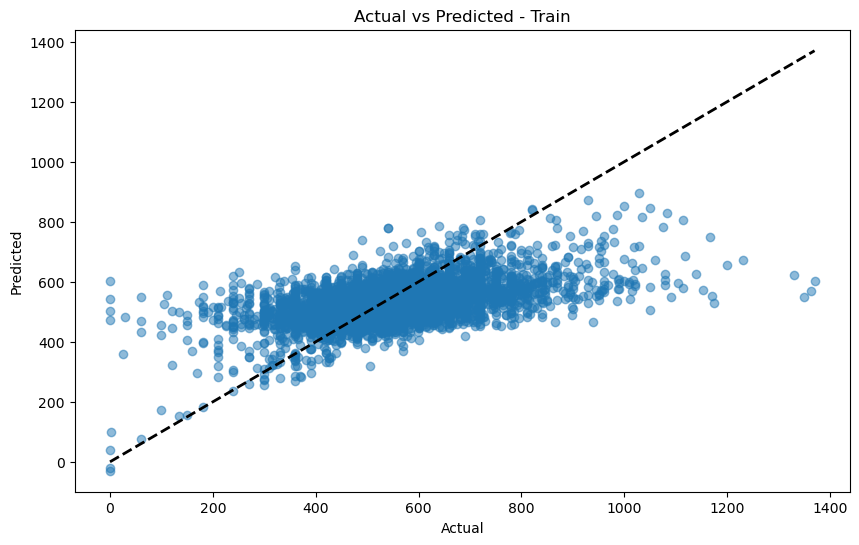

Mean Squared Error: 16064.135513117284


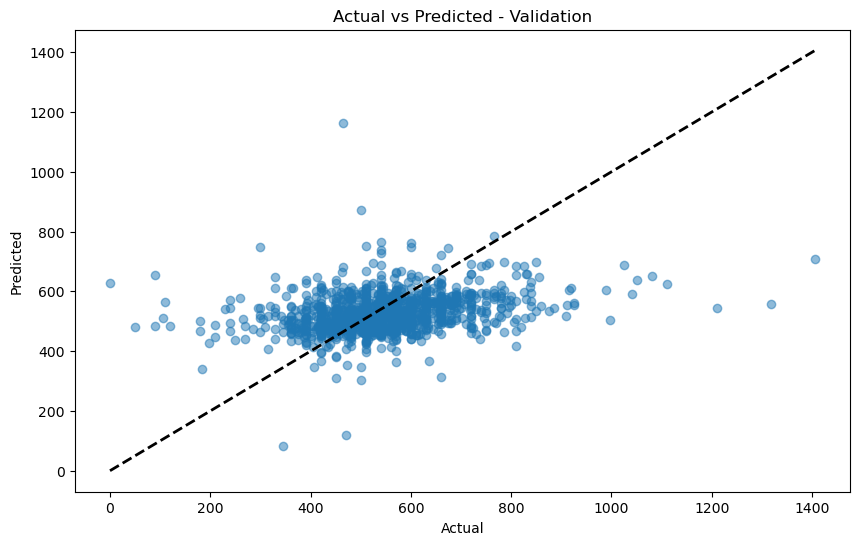

Mean Squared Error: 18179.031575520832


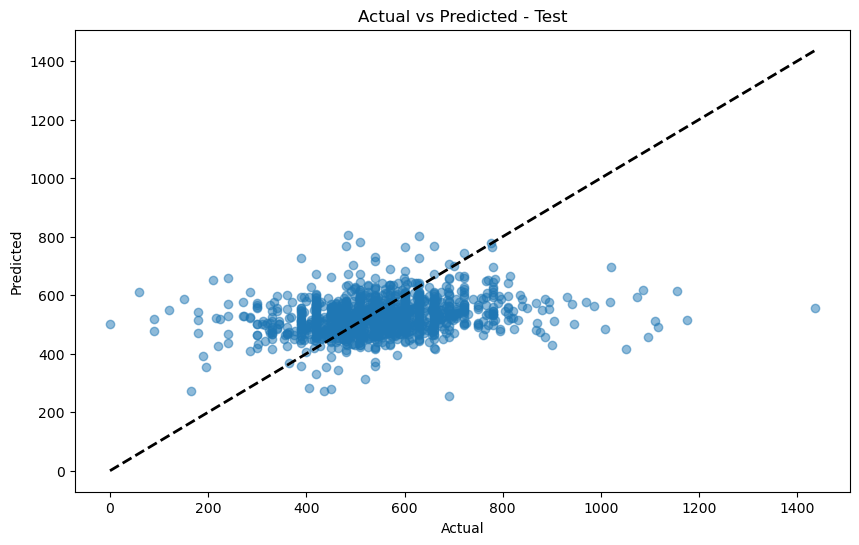

In [37]:
model.eval()
mse_total = 0
n = 0
actual = []
predictions = []
with torch.no_grad():
  loss = 0
  for inputs, targets in train_loader:
    inputs, targets = inputs.to(device), targets.to(device)
    outputs = model(inputs)
    predictions.extend(outputs.cpu().numpy().flatten())
    actual.extend(targets.cpu().numpy().flatten())
    loss = criterion(outputs, targets.unsqueeze(1))
    mse_total += loss.item()
    n += 1
  mse = mse_total / n
  print(f'Mean Squared Error: {mse}')

#plot
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(actual, predictions, alpha=0.5)
plt.plot([min(actual), max(actual)], [min(actual), max(actual)], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted - Train')
plt.show()
model.eval()
mse_total = 0
n = 0
actual = []
predictions = []
with torch.no_grad():
  loss = 0
  for inputs, targets in val_loader:
    inputs, targets = inputs.to(device), targets.to(device)
    outputs = model(inputs)
    predictions.extend(outputs.cpu().numpy().flatten())
    actual.extend(targets.cpu().numpy().flatten())
    loss = criterion(outputs, targets.unsqueeze(1))
    mse_total += loss.item()
    n += 1
  mse = mse_total / n
  print(f'Mean Squared Error: {mse}')

#plot
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(actual, predictions, alpha=0.5)
plt.plot([min(actual), max(actual)], [min(actual), max(actual)], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted - Validation')
plt.show()
model.eval()
mse_total = 0
n = 0
actual = []
predictions = []
with torch.no_grad():
  loss = 0
  for inputs, targets in test_loader:
    inputs, targets = inputs.to(device), targets.to(device)
    outputs = model(inputs)
    predictions.extend(outputs.cpu().numpy().flatten())
    actual.extend(targets.cpu().numpy().flatten())
    loss = criterion(outputs, targets.unsqueeze(1))
    mse_total += loss.item()
    n += 1
  mse = mse_total / n
  print(f'Mean Squared Error: {mse}')

#plot
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(actual, predictions, alpha=0.5)
plt.plot([min(actual), max(actual)], [min(actual), max(actual)], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted - Test')
plt.show()

| Model | Training Error | Validation Error | Test Error |
| -------- | ------------ | -------------- | ------------|
| Non-Duration Model     | 15715      |  16291         |17535|
|Non-Duration Model (with interaction terms) | 15468 | 16788 | 18283|
|Non-Duration Model + OTHER_DUR | 13801 | 14727 | 17029

The training, validation and test errors are slightly improved after adding feature "OTHER_DUR" which OTHER_DUR is adding some information for the model to learn

Train Non-Duration + OTHER_DUR (with interaction terms)

In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


#load dataset
df = pd.read_csv('D_PER_DAY.csv')
print(df.shape)
##### One-hot Encoding #####
# Whether it is a weekday or not #
df['WEEKD'] = np.where(df['DIARYDAY'].isin([1,7]), 0, 1)


# Education level (low, mid, hight) #
df['MIDEDU'] = np.where(df['EDU'].isin([40,41,42]), 1, 0)
df['HIGHEDU'] = np.where(df['EDU'].isin([43,44,45,46]), 1, 0)


# Whether lives in a stationary house or not #
df['PERSHOU'] = np.where(df['HOUSE'] == 1, 1, 0)


# Income level (low, mid, high) #
df['MIDINC'] = np.where(df['INC'].isin([9,10,11,12,13]), 1, 0)
df['HIGHINC'] = np.where(df['INC'].isin([14,15,16]), 1, 0)


# Whether at work or not #
df['EMPLOYED'] = np.where(df['EMP_STAT'] == 1, 1, 0)


# Whether male or not #
df['MALE'] = np.where(df['SEX'] == 1, 1, 0)
#drop columns
columns_to_drop = [col for col in df.columns if col.endswith('DUR') and col != 'SLEEP_DUR' ]
df.drop(columns=columns_to_drop, axis=1, inplace=True)
# Dropping previous columns #
cols_to_drop = ['DIARYDAY', 'EDU', 'HOUSE', 'INC', 'EMP_STAT', 'SEX']
df.drop(columns = cols_to_drop, inplace = True)
print(df.shape)
#separate features and target
X = df.drop(['SLEEP_DUR','CASEID'], axis=1)
y = df['SLEEP_DUR']
print(X.columns.tolist())


# X_train,X_temp,y_train,y_temp = train_test_split(X,y,test_size=0.3,random_state=42)
# X_val,X_test,y_val,y_test = train_test_split(X_temp,y_temp,test_size=0.5,random_state=42)
# #standardize
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_val = scaler.transform(X_val)
# X_test = scaler.transform(X_test)
dummy_cols = ['WEEKD', 'MIDEDU', 'HIGHEDU', 'PERSHOU', 'MIDINC', 'HIGHINC', 'EMPLOYED', 'MALE']
numeric_cols = [col for col in X.columns if col not in dummy_cols]


##### Spliting Data #####
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size = 0.3, random_state = 42
)


X_test, X_val, y_test, y_val = train_test_split(
    X_temp, y_temp, test_size = 0.5, random_state = 42
)


##### Scaling the Data Values #####
scaler = StandardScaler()


X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train[numeric_cols]),
                              columns = numeric_cols, index = X_train.index)
X_val_scaled = pd.DataFrame(scaler.transform(X_val[numeric_cols]),
                            columns = numeric_cols, index = X_val.index)
X_test_scaled = pd.DataFrame(scaler.transform(X_test[numeric_cols]),
                             columns = numeric_cols, index = X_test.index)


# Recombining Numerical and Dummy Columns
X_train_final = pd.concat([X_train_scaled, X_train[dummy_cols]], axis = 1)
X_val_final = pd.concat([X_val_scaled, X_val[dummy_cols]], axis = 1)
X_test_final = pd.concat([X_test_scaled, X_test[dummy_cols]], axis = 1)


##### Slope Interactions #####
for dummy in dummy_cols:
    for numeric in numeric_cols:
        interaction_term = f"{dummy}_{numeric}"
        X_train_final[interaction_term] = X_train_final[dummy] * X_train_final[numeric]
        X_val_final[interaction_term] = X_val_final[dummy] * X_val_final[numeric]
        X_test_final[interaction_term] = X_test_final[dummy] * X_test_final[numeric]




X_train_final.head()


(8548, 30)
(8548, 13)
['AGE', 'CHILDREN', 'ADULT', 'WEEKD', 'MIDEDU', 'HIGHEDU', 'PERSHOU', 'MIDINC', 'HIGHINC', 'EMPLOYED', 'MALE']


AGE  CHILDREN     ADULT  WEEKD  MIDEDU  HIGHEDU  PERSHOU  MIDINC  \
4528 -0.143076 -0.529119 -1.116979      0       1        0        1       1   
1760  0.719689 -0.529119 -1.116979      1       0        0        1       1   
2851  0.935381 -0.529119 -1.116979      1       0        0        1       1   
297   0.611844 -0.529119  0.139202      1       1        0        1       0   
443  -0.897996 -0.529119  0.139202      1       0        1        1       0   

      HIGHINC  EMPLOYED  ...  MIDINC_ADULT  HIGHINC_AGE  HIGHINC_CHILDREN  \
4528        0         0  ...     -1.116979    -0.000000         -0.000000   
1760        0         0  ...     -1.116979     0.000000         -0.000000   
2851        0         0  ...     -1.116979     0.000000         -0.000000   
297         1         1  ...      0.000000     0.611844         -0.529119   
443         1         1  ...      0.000000    -0.897996         -0.529119   

      HIGHINC_ADULT  EMPLOYED_AGE  EMPLOYED_CHILDREN  EMPLOYED_ADULT  \
4528      -0.000000     -0.000000          -0.000000       -0.000000   
1760      -0.000000      0.000000          -0.000000       -0.000000   
2851      -0.000000      0.000000          -0.000000       -0.000000   
297        0.139202      0.611844          -0.529119        0.139202   
443        0.139202     -0.897996          -0.529119        0.139202   

      MALE_AGE  MALE_CHILDREN  MALE_ADULT  
4528 -0.143076      -0.529119   -1.116979  
1760  0.719689      -0.529119   -1.116979  
2851  0.000000      -0.000000   -0.000000  
297   0.000000      -0.000000    0.000000  
443  -0.000000      -0.000000    0.000000  

[5 rows x 35 columns]

In [39]:
import torch
from torch.utils.data import TensorDataset, DataLoader


#convert to tensors
X_train_tensor = torch.tensor(X_train_final.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val_final.values, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_final.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)


#create dataloaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)


train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)


#train the model
l1_reg = 0.005
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = Net(X_train_final.shape[1]).to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.005)
for epoch in range(200):
    model.train()
    train_loss = 0.0
    val_loss = 0.0
    for inputs, targets in train_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets.unsqueeze(1))
        loss += l1_reg * sum(p.abs().sum() for p in model.parameters())
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    train_loss /= len(train_loader)
    for inputs, targets in val_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets.unsqueeze(1))
        val_loss += loss.item()
    val_loss /= len(val_loader)
    if epoch % 20 == 0:
      print(f'Epoch {epoch+1}/{200}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}')


Epoch 1/200, Train Loss: 65496.8232, Val Loss: 22550.0035
Epoch 21/200, Train Loss: 17104.6950, Val Loss: 16555.4181
Epoch 41/200, Train Loss: 16747.0410, Val Loss: 17113.7336
Epoch 61/200, Train Loss: 16542.0238, Val Loss: 16664.3010
Epoch 81/200, Train Loss: 16190.1966, Val Loss: 18182.1344
Epoch 101/200, Train Loss: 15861.4997, Val Loss: 17370.3687
Epoch 121/200, Train Loss: 15524.6673, Val Loss: 17313.5742
Epoch 141/200, Train Loss: 15012.1337, Val Loss: 17838.7429
Epoch 161/200, Train Loss: 14739.2682, Val Loss: 17636.0863
Epoch 181/200, Train Loss: 14406.1228, Val Loss: 18401.2394


Mean Squared Error: 13800.084671102106


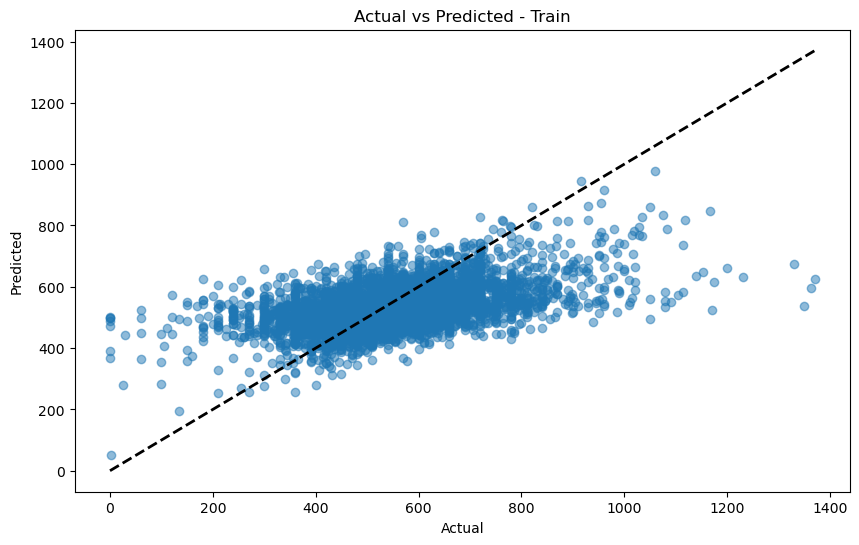

Mean Squared Error: 18127.754656756366


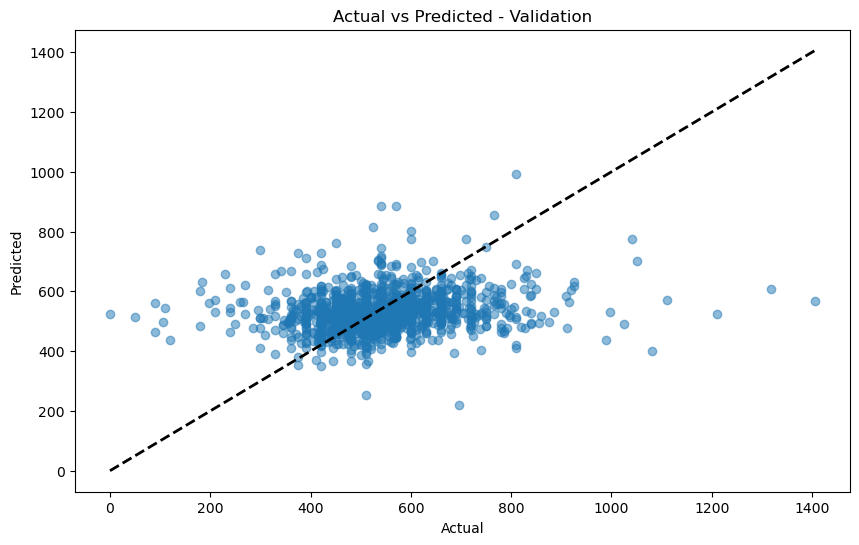

Mean Squared Error: 20667.65252459491


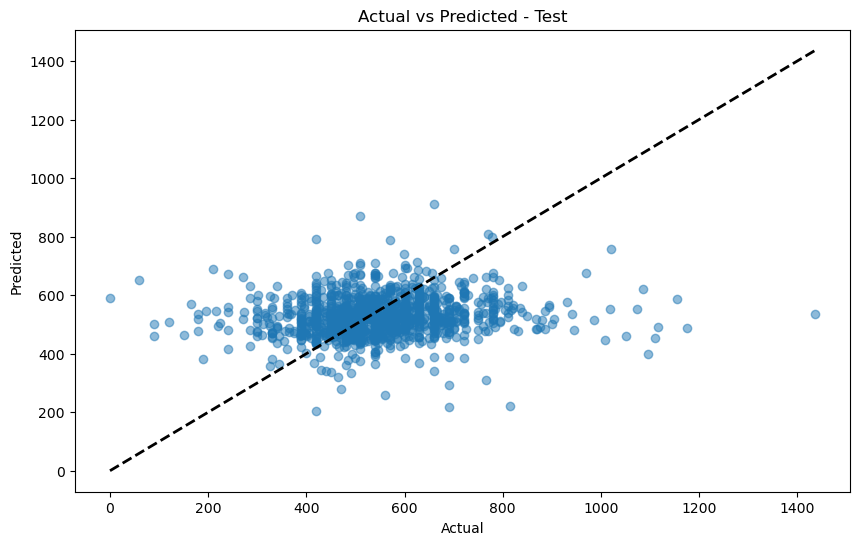

In [40]:
model.eval()
mse_total = 0
n = 0
actual = []
predictions = []
with torch.no_grad():
  loss = 0
  for inputs, targets in train_loader:
    inputs, targets = inputs.to(device), targets.to(device)
    outputs = model(inputs)
    predictions.extend(outputs.cpu().numpy().flatten())
    actual.extend(targets.cpu().numpy().flatten())
    loss = criterion(outputs, targets.unsqueeze(1))
    mse_total += loss.item()
    n += 1
  mse = mse_total / n
  print(f'Mean Squared Error: {mse}')

#plot
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(actual, predictions, alpha=0.5)
plt.plot([min(actual), max(actual)], [min(actual), max(actual)], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted - Train')
plt.show()
model.eval()
mse_total = 0
n = 0
actual = []
predictions = []
with torch.no_grad():
  loss = 0
  for inputs, targets in val_loader:
    inputs, targets = inputs.to(device), targets.to(device)
    outputs = model(inputs)
    predictions.extend(outputs.cpu().numpy().flatten())
    actual.extend(targets.cpu().numpy().flatten())
    loss = criterion(outputs, targets.unsqueeze(1))
    mse_total += loss.item()
    n += 1
  mse = mse_total / n
  print(f'Mean Squared Error: {mse}')

#plot
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(actual, predictions, alpha=0.5)
plt.plot([min(actual), max(actual)], [min(actual), max(actual)], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted - Validation')
plt.show()
model.eval()
mse_total = 0
n = 0
actual = []
predictions = []
with torch.no_grad():
  loss = 0
  for inputs, targets in test_loader:
    inputs, targets = inputs.to(device), targets.to(device)
    outputs = model(inputs)
    predictions.extend(outputs.cpu().numpy().flatten())
    actual.extend(targets.cpu().numpy().flatten())
    loss = criterion(outputs, targets.unsqueeze(1))
    mse_total += loss.item()
    n += 1
  mse = mse_total / n
  print(f'Mean Squared Error: {mse}')

#plot
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(actual, predictions, alpha=0.5)
plt.plot([min(actual), max(actual)], [min(actual), max(actual)], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted - Test')
plt.show()

| Model | Training Error | Validation Error | Test Error |
| -------- | ------------ | -------------- | ------------|
| Non-Duration Model     | 15715      |  16291         |17535|
|Non-Duration Model (with interaction terms) | 15468 | 16788 | 18283|
|Non-Duration Model + OTHER_DUR | 13801 | 14727 | 17029 |
|Non-Duration Model + OTHER_DUR (with interaction terms) | 15615 | 16432 | 18027 |

The training, validation and test errors are slightly increased with interaction terms meaning model is finding it harder to learn with interaction terms added

Train another model Non-Duration + OTHER_DUR + ALONE_LEI_DUR (without interaction terms)

In [42]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


#load dataset
df = pd.read_csv('D_PER_DAY.csv')
print(df.shape)
##### One-hot Encoding #####
# Whether it is a weekday or not #
df['WEEKD'] = np.where(df['DIARYDAY'].isin([1,7]), 0, 1)


# Education level (low, mid, hight) #
df['MIDEDU'] = np.where(df['EDU'].isin([40,41,42]), 1, 0)
df['HIGHEDU'] = np.where(df['EDU'].isin([43,44,45,46]), 1, 0)


# Whether lives in a stationary house or not #
df['PERSHOU'] = np.where(df['HOUSE'] == 1, 1, 0)


# Income level (low, mid, high) #
df['MIDINC'] = np.where(df['INC'].isin([9,10,11,12,13]), 1, 0)
df['HIGHINC'] = np.where(df['INC'].isin([14,15,16]), 1, 0)


# Whether at work or not #
df['EMPLOYED'] = np.where(df['EMP_STAT'] == 1, 1, 0)


# Whether male or not #
df['MALE'] = np.where(df['SEX'] == 1, 1, 0)
#drop columns
columns_to_drop = [col for col in df.columns if col.endswith('DUR') and col not in ['SLEEP_DUR','OTHER_DUR','ALONE_LEI_DUR' ]]
df.drop(columns=columns_to_drop, axis=1, inplace=True)
# Dropping previous columns #
cols_to_drop = ['DIARYDAY', 'EDU', 'HOUSE', 'INC', 'EMP_STAT', 'SEX']
df.drop(columns = cols_to_drop, inplace = True)
print(df.shape)
#separate features and target
X = df.drop(['SLEEP_DUR','CASEID'], axis=1)
y = df['SLEEP_DUR']
print(X.columns.tolist())


# X_train,X_temp,y_train,y_temp = train_test_split(X,y,test_size=0.3,random_state=42)
# X_val,X_test,y_val,y_test = train_test_split(X_temp,y_temp,test_size=0.5,random_state=42)
# #standardize
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_val = scaler.transform(X_val)
# X_test = scaler.transform(X_test)
dummy_cols = ['WEEKD', 'MIDEDU', 'HIGHEDU', 'PERSHOU', 'MIDINC', 'HIGHINC', 'EMPLOYED', 'MALE']
numeric_cols = [col for col in X.columns if col not in dummy_cols]


##### Spliting Data #####
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size = 0.3, random_state = 42
)


X_test, X_val, y_test, y_val = train_test_split(
    X_temp, y_temp, test_size = 0.5, random_state = 42
)


##### Scaling the Data Values #####
scaler = StandardScaler()


X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train[numeric_cols]),
                              columns = numeric_cols, index = X_train.index)
X_val_scaled = pd.DataFrame(scaler.transform(X_val[numeric_cols]),
                            columns = numeric_cols, index = X_val.index)
X_test_scaled = pd.DataFrame(scaler.transform(X_test[numeric_cols]),
                             columns = numeric_cols, index = X_test.index)


# Recombining Numerical and Dummy Columns
X_train_final = pd.concat([X_train_scaled, X_train[dummy_cols]], axis = 1)
X_val_final = pd.concat([X_val_scaled, X_val[dummy_cols]], axis = 1)
X_test_final = pd.concat([X_test_scaled, X_test[dummy_cols]], axis = 1)


# ##### Slope Interactions #####
# for dummy in dummy_cols:
#     for numeric in numeric_cols:
#         interaction_term = f"{dummy}_{numeric}"
#         X_train_final[interaction_term] = X_train_final[dummy] * X_train_final[numeric]
#         X_val_final[interaction_term] = X_val_final[dummy] * X_val_final[numeric]
#         X_test_final[interaction_term] = X_test_final[dummy] * X_test_final[numeric]




X_train_final.head()


(8548, 30)
(8548, 15)
['ALONE_LEI_DUR', 'OTHER_DUR', 'AGE', 'CHILDREN', 'ADULT', 'WEEKD', 'MIDEDU', 'HIGHEDU', 'PERSHOU', 'MIDINC', 'HIGHINC', 'EMPLOYED', 'MALE']


ALONE_LEI_DUR  OTHER_DUR       AGE  CHILDREN     ADULT  WEEKD  MIDEDU  \
4528       4.479492  -1.581899 -0.143076 -0.529119 -1.116979      0       1   
1760       0.220752   0.503009  0.719689 -0.529119 -1.116979      1       0   
2851       0.573547   0.171319  0.935381 -0.529119 -1.116979      1       0   
297       -0.711635  -0.539445  0.611844 -0.529119  0.139202      1       1   
443       -0.711635  -1.387624 -0.897996 -0.529119  0.139202      1       0   

      HIGHEDU  PERSHOU  MIDINC  HIGHINC  EMPLOYED  MALE  
4528        0        1       1        0         0     1  
1760        0        1       1        0         0     1  
2851        0        1       1        0         0     0  
297         0        1       0        1         1     0  
443         1        1       0        1         1     0

In [43]:
import torch
from torch.utils.data import TensorDataset, DataLoader


#convert to tensors
X_train_tensor = torch.tensor(X_train_final.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val_final.values, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_final.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)


#create dataloaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)


train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)


#train the model
l1_reg = 0.005
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = Net(X_train_final.shape[1]).to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.005)
for epoch in range(200):
    model.train()
    train_loss = 0.0
    val_loss = 0.0
    for inputs, targets in train_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets.unsqueeze(1))
        loss += l1_reg * sum(p.abs().sum() for p in model.parameters())
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    train_loss /= len(train_loader)
    for inputs, targets in val_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets.unsqueeze(1))
        val_loss += loss.item()
    val_loss /= len(val_loader)
    if epoch % 20 == 0:
        print(f'Epoch {epoch+1}/{200}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}')


Epoch 1/200, Train Loss: 62627.5614, Val Loss: 19972.3776
Epoch 21/200, Train Loss: 14984.9105, Val Loss: 13622.1164
Epoch 41/200, Train Loss: 13840.1994, Val Loss: 13176.2900
Epoch 61/200, Train Loss: 13657.9949, Val Loss: 12973.5965
Epoch 81/200, Train Loss: 13325.8272, Val Loss: 13273.9352
Epoch 101/200, Train Loss: 13189.6447, Val Loss: 13193.4851
Epoch 121/200, Train Loss: 12764.8232, Val Loss: 13480.7304
Epoch 141/200, Train Loss: 12521.9382, Val Loss: 13581.7268
Epoch 161/200, Train Loss: 12275.7732, Val Loss: 13439.7533
Epoch 181/200, Train Loss: 11877.7085, Val Loss: 13802.3992


Mean Squared Error: 11379.783449550363


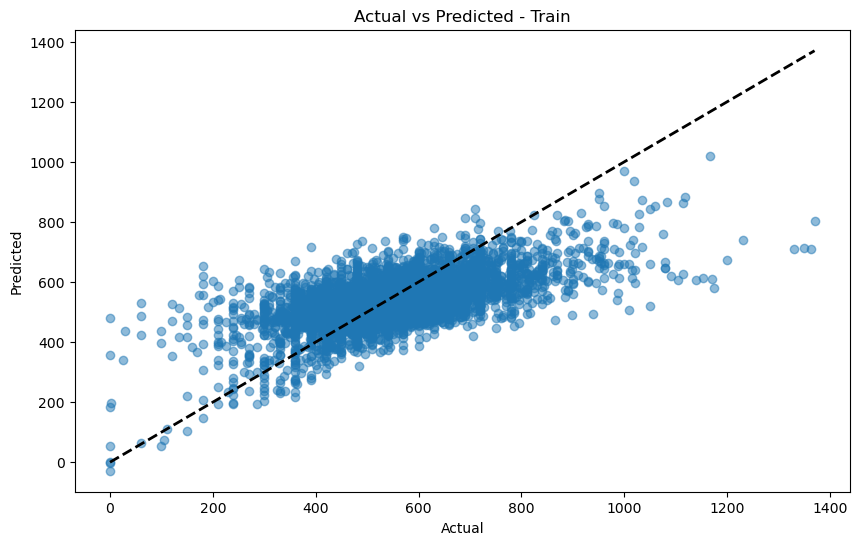

Mean Squared Error: 13746.77800081983


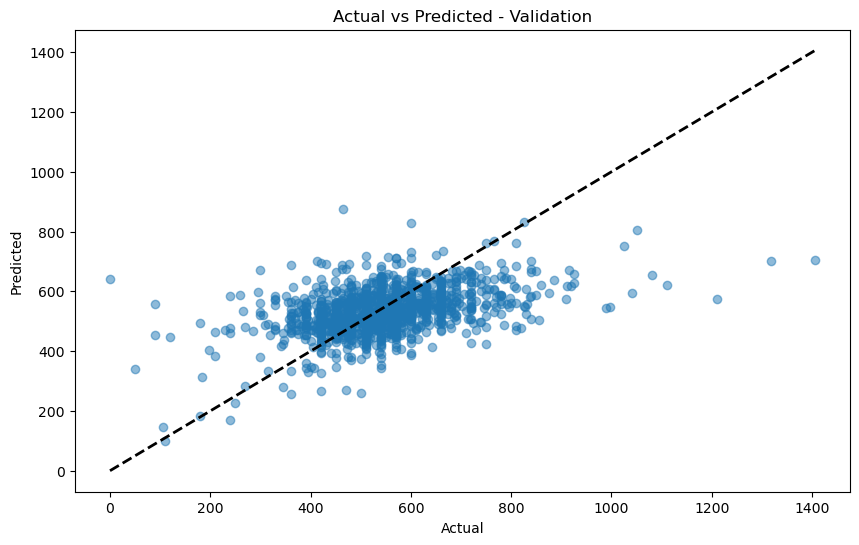

Mean Squared Error: 16488.751853660302


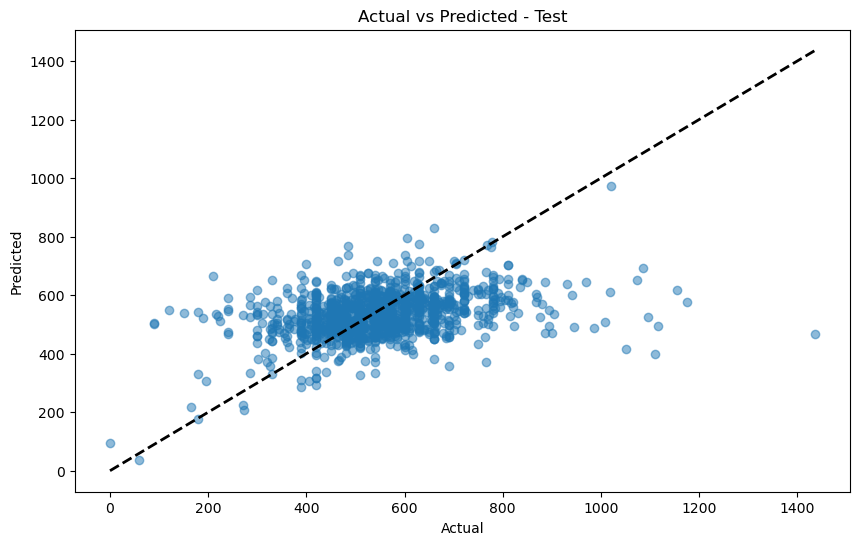

In [47]:
model.eval()
mse_total = 0
n = 0
actual = []
predictions = []
with torch.no_grad():
  loss = 0
  for inputs, targets in train_loader:
    inputs, targets = inputs.to(device), targets.to(device)
    outputs = model(inputs)
    predictions.extend(outputs.cpu().numpy().flatten())
    actual.extend(targets.cpu().numpy().flatten())
    loss = criterion(outputs, targets.unsqueeze(1))
    mse_total += loss.item()
    n += 1
  mse = mse_total / n
  print(f'Mean Squared Error: {mse}')

#plot
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(actual, predictions, alpha=0.5)
plt.plot([min(actual), max(actual)], [min(actual), max(actual)], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted - Train')
plt.show()
model.eval()
mse_total = 0
n = 0
actual = []
predictions = []
with torch.no_grad():
  loss = 0
  for inputs, targets in val_loader:
    inputs, targets = inputs.to(device), targets.to(device)
    outputs = model(inputs)
    predictions.extend(outputs.cpu().numpy().flatten())
    actual.extend(targets.cpu().numpy().flatten())
    loss = criterion(outputs, targets.unsqueeze(1))
    mse_total += loss.item()
    n += 1
  mse = mse_total / n
  print(f'Mean Squared Error: {mse}')

#plot
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(actual, predictions, alpha=0.5)
plt.plot([min(actual), max(actual)], [min(actual), max(actual)], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted - Validation')
plt.show()
model.eval()
mse_total = 0
n = 0
actual = []
predictions = []
with torch.no_grad():
  loss = 0
  for inputs, targets in test_loader:
    inputs, targets = inputs.to(device), targets.to(device)
    outputs = model(inputs)
    predictions.extend(outputs.cpu().numpy().flatten())
    actual.extend(targets.cpu().numpy().flatten())
    loss = criterion(outputs, targets.unsqueeze(1))
    mse_total += loss.item()
    n += 1
  mse = mse_total / n
  print(f'Mean Squared Error: {mse}')

#plot
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(actual, predictions, alpha=0.5)
plt.plot([min(actual), max(actual)], [min(actual), max(actual)], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted - Test')
plt.show()

| Model | Training Error | Validation Error | Test Error |
| -------- | ------------ | -------------- | ------------|
| Non-Duration Model     | 15715      |  16291         |17535|
|Non-Duration Model (with interaction terms) | 15468 | 16788 | 18283|
|Non-Duration Model + OTHER_DUR | 13801 | 14727 | 17029 |
|Non-Duration Model + OTHER_DUR (with interaction terms) | 15615 | 16432 | 18027 |
|Non-Duration Model + OTHER_DUR + ALONE_LEI_DUR | 12619 | 13227 | 15947|

The training, validation and test errors are slightly improved after adding another time related feature "ALONE_LEI_DUR"

In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


#load dataset
df = pd.read_csv('D_PER_DAY.csv')
print(df.shape)
##### One-hot Encoding #####
# Whether it is a weekday or not #
df['WEEKD'] = np.where(df['DIARYDAY'].isin([1,7]), 0, 1)


# Education level (low, mid, hight) #
df['MIDEDU'] = np.where(df['EDU'].isin([40,41,42]), 1, 0)
df['HIGHEDU'] = np.where(df['EDU'].isin([43,44,45,46]), 1, 0)


# Whether lives in a stationary house or not #
df['PERSHOU'] = np.where(df['HOUSE'] == 1, 1, 0)


# Income level (low, mid, high) #
df['MIDINC'] = np.where(df['INC'].isin([9,10,11,12,13]), 1, 0)
df['HIGHINC'] = np.where(df['INC'].isin([14,15,16]), 1, 0)


# Whether at work or not #
df['EMPLOYED'] = np.where(df['EMP_STAT'] == 1, 1, 0)


# Whether male or not #
df['MALE'] = np.where(df['SEX'] == 1, 1, 0)
#drop columns
columns_to_drop = [col for col in df.columns if col.endswith('DUR') and col not in ['SLEEP_DUR','OTHER_DUR','ALONE_LEI_DUR' ]]
df.drop(columns=columns_to_drop, axis=1, inplace=True)
# Dropping previous columns #
cols_to_drop = ['DIARYDAY', 'EDU', 'HOUSE', 'INC', 'EMP_STAT', 'SEX']
df.drop(columns = cols_to_drop, inplace = True)
print(df.shape)
#separate features and target
X = df.drop(['SLEEP_DUR','CASEID'], axis=1)
y = df['SLEEP_DUR']
print(X.columns.tolist())


# X_train,X_temp,y_train,y_temp = train_test_split(X,y,test_size=0.3,random_state=42)
# X_val,X_test,y_val,y_test = train_test_split(X_temp,y_temp,test_size=0.5,random_state=42)
# #standardize
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_val = scaler.transform(X_val)
# X_test = scaler.transform(X_test)
dummy_cols = ['WEEKD', 'MIDEDU', 'HIGHEDU', 'PERSHOU', 'MIDINC', 'HIGHINC', 'EMPLOYED', 'MALE']
numeric_cols = [col for col in X.columns if col not in dummy_cols]


##### Spliting Data #####
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size = 0.3, random_state = 42
)


X_test, X_val, y_test, y_val = train_test_split(
    X_temp, y_temp, test_size = 0.5, random_state = 42
)


##### Scaling the Data Values #####
scaler = StandardScaler()


X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train[numeric_cols]),
                              columns = numeric_cols, index = X_train.index)
X_val_scaled = pd.DataFrame(scaler.transform(X_val[numeric_cols]),
                            columns = numeric_cols, index = X_val.index)
X_test_scaled = pd.DataFrame(scaler.transform(X_test[numeric_cols]),
                             columns = numeric_cols, index = X_test.index)


# Recombining Numerical and Dummy Columns
X_train_final = pd.concat([X_train_scaled, X_train[dummy_cols]], axis = 1)
X_val_final = pd.concat([X_val_scaled, X_val[dummy_cols]], axis = 1)
X_test_final = pd.concat([X_test_scaled, X_test[dummy_cols]], axis = 1)


##### Slope Interactions #####
for dummy in dummy_cols:
    for numeric in numeric_cols:
        interaction_term = f"{dummy}_{numeric}"
        X_train_final[interaction_term] = X_train_final[dummy] * X_train_final[numeric]
        X_val_final[interaction_term] = X_val_final[dummy] * X_val_final[numeric]
        X_test_final[interaction_term] = X_test_final[dummy] * X_test_final[numeric]




X_train_final.head()


(8548, 30)
(8548, 15)
['ALONE_LEI_DUR', 'OTHER_DUR', 'AGE', 'CHILDREN', 'ADULT', 'WEEKD', 'MIDEDU', 'HIGHEDU', 'PERSHOU', 'MIDINC', 'HIGHINC', 'EMPLOYED', 'MALE']


ALONE_LEI_DUR  OTHER_DUR       AGE  CHILDREN     ADULT  WEEKD  MIDEDU  \
4528       4.479492  -1.581899 -0.143076 -0.529119 -1.116979      0       1   
1760       0.220752   0.503009  0.719689 -0.529119 -1.116979      1       0   
2851       0.573547   0.171319  0.935381 -0.529119 -1.116979      1       0   
297       -0.711635  -0.539445  0.611844 -0.529119  0.139202      1       1   
443       -0.711635  -1.387624 -0.897996 -0.529119  0.139202      1       0   

      HIGHEDU  PERSHOU  MIDINC  ...  EMPLOYED_ALONE_LEI_DUR  \
4528        0        1       1  ...                0.000000   
1760        0        1       1  ...                0.000000   
2851        0        1       1  ...                0.000000   
297         0        1       0  ...               -0.711635   
443         1        1       0  ...               -0.711635   

      EMPLOYED_OTHER_DUR  EMPLOYED_AGE  EMPLOYED_CHILDREN  EMPLOYED_ADULT  \
4528           -0.000000     -0.000000          -0.000000       -0.000000   
1760            0.000000      0.000000          -0.000000       -0.000000   
2851            0.000000      0.000000          -0.000000       -0.000000   
297            -0.539445      0.611844          -0.529119        0.139202   
443            -1.387624     -0.897996          -0.529119        0.139202   

      MALE_ALONE_LEI_DUR  MALE_OTHER_DUR  MALE_AGE  MALE_CHILDREN  MALE_ADULT  
4528            4.479492       -1.581899 -0.143076      -0.529119   -1.116979  
1760            0.220752        0.503009  0.719689      -0.529119   -1.116979  
2851            0.000000        0.000000  0.000000      -0.000000   -0.000000  
297            -0.000000       -0.000000  0.000000      -0.000000    0.000000  
443            -0.000000       -0.000000 -0.000000      -0.000000    0.000000  

[5 rows x 53 columns]

In [50]:
import torch
from torch.utils.data import TensorDataset, DataLoader


#convert to tensors
X_train_tensor = torch.tensor(X_train_final.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val_final.values, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_final.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)


#create dataloaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)


train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)


#train the model
l1_reg = 0.005
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = Net(X_train_final.shape[1]).to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.005)
for epoch in range(200):
    model.train()
    train_loss = 0.0
    val_loss = 0.0
    for inputs, targets in train_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets.unsqueeze(1))
        loss += l1_reg * sum(p.abs().sum() for p in model.parameters())
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    train_loss /= len(train_loader)
    for inputs, targets in val_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets.unsqueeze(1))
        val_loss += loss.item()
    val_loss /= len(val_loader)
    if epoch % 20 == 0:
      print(f'Epoch {epoch+1}/{200}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}')


Epoch 1/200, Train Loss: 65075.3862, Val Loss: 22624.1734
Epoch 21/200, Train Loss: 14021.9509, Val Loss: 13739.5594
Epoch 41/200, Train Loss: 13293.0543, Val Loss: 14225.8667
Epoch 61/200, Train Loss: 12666.2606, Val Loss: 14464.5634
Epoch 81/200, Train Loss: 11862.9173, Val Loss: 15136.8163
Epoch 101/200, Train Loss: 11377.5717, Val Loss: 16360.8585
Epoch 121/200, Train Loss: 10885.5654, Val Loss: 15923.4120
Epoch 141/200, Train Loss: 10452.5399, Val Loss: 16335.4186
Epoch 161/200, Train Loss: 10002.2285, Val Loss: 16596.0693
Epoch 181/200, Train Loss: 9708.4350, Val Loss: 17289.0210


Mean Squared Error: 8861.828628295245


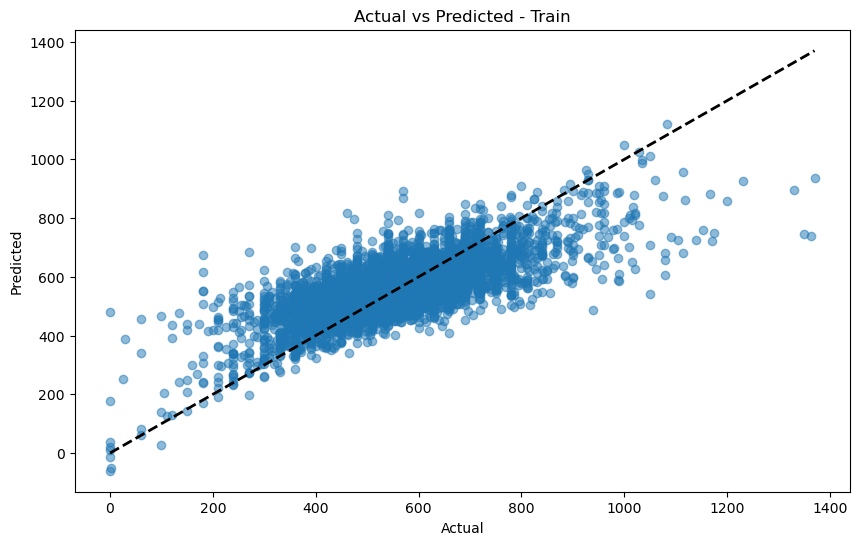

Mean Squared Error: 17718.626440731095


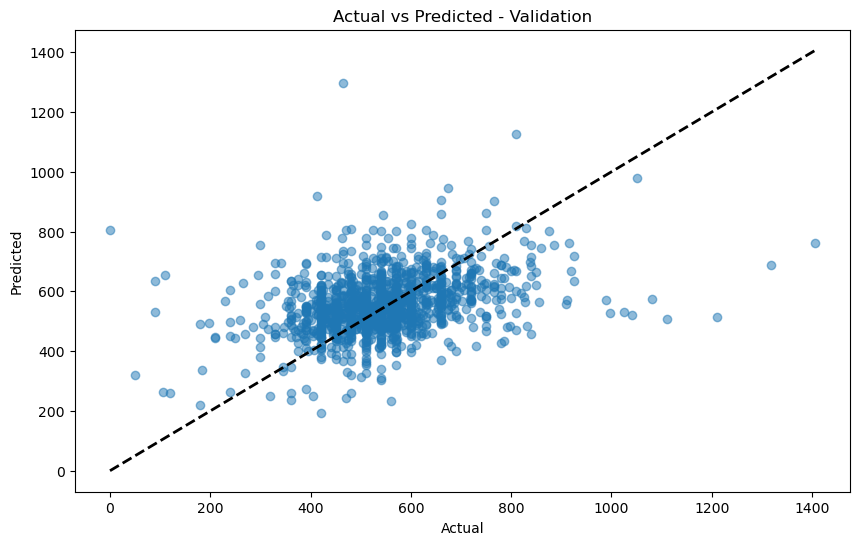

Mean Squared Error: 18697.220950279705


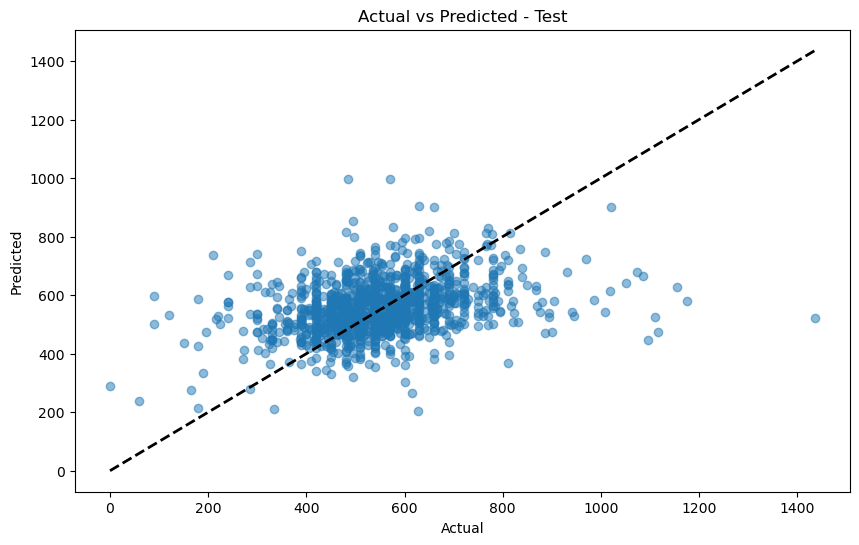

In [51]:
model.eval()
mse_total = 0
n = 0
actual = []
predictions = []
with torch.no_grad():
  loss = 0
  for inputs, targets in train_loader:
    inputs, targets = inputs.to(device), targets.to(device)
    outputs = model(inputs)
    predictions.extend(outputs.cpu().numpy().flatten())
    actual.extend(targets.cpu().numpy().flatten())
    loss = criterion(outputs, targets.unsqueeze(1))
    mse_total += loss.item()
    n += 1
  mse = mse_total / n
  print(f'Mean Squared Error: {mse}')

#plot
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(actual, predictions, alpha=0.5)
plt.plot([min(actual), max(actual)], [min(actual), max(actual)], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted - Train')
plt.show()
model.eval()
mse_total = 0
n = 0
actual = []
predictions = []
with torch.no_grad():
  loss = 0
  for inputs, targets in val_loader:
    inputs, targets = inputs.to(device), targets.to(device)
    outputs = model(inputs)
    predictions.extend(outputs.cpu().numpy().flatten())
    actual.extend(targets.cpu().numpy().flatten())
    loss = criterion(outputs, targets.unsqueeze(1))
    mse_total += loss.item()
    n += 1
  mse = mse_total / n
  print(f'Mean Squared Error: {mse}')

#plot
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(actual, predictions, alpha=0.5)
plt.plot([min(actual), max(actual)], [min(actual), max(actual)], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted - Validation')
plt.show()
model.eval()
mse_total = 0
n = 0
actual = []
predictions = []
with torch.no_grad():
  loss = 0
  for inputs, targets in test_loader:
    inputs, targets = inputs.to(device), targets.to(device)
    outputs = model(inputs)
    predictions.extend(outputs.cpu().numpy().flatten())
    actual.extend(targets.cpu().numpy().flatten())
    loss = criterion(outputs, targets.unsqueeze(1))
    mse_total += loss.item()
    n += 1
  mse = mse_total / n
  print(f'Mean Squared Error: {mse}')

#plot
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(actual, predictions, alpha=0.5)
plt.plot([min(actual), max(actual)], [min(actual), max(actual)], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted - Test')
plt.show()

| Model | Training Error | Validation Error | Test Error |
| -------- | ------------ | -------------- | ------------|
| Non-Duration Model     | 15715      |  16291         |17535|
|Non-Duration Model (with interaction terms) | 15468 | 16788 | 18283|
|Non-Duration Model + OTHER_DUR | 13801 | 14727 | 17029 |
|Non-Duration Model + OTHER_DUR (with interaction terms) | 15615 | 16432 | 18027 |
|Non-Duration Model + OTHER_DUR + ALONE_LEI_DUR | 12619 | 13227 | 15947|
|Non-Duration Model + OTHER_DUR + ALONE_LEI_DUR (with interaction terms) | 11335 | 14876 | 17061|

While training error goes down, validation and test errors increase which means model is finding harder to generalize?

Train new model with Non-Duration + OTHER_DUR + ALONE_LEI_DUR + GROUP_WORK_DUR (without interaction terms)

In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


#load dataset
df = pd.read_csv('D_PER_DAY.csv')
print(df.shape)
##### One-hot Encoding #####
# Whether it is a weekday or not #
df['WEEKD'] = np.where(df['DIARYDAY'].isin([1,7]), 0, 1)


# Education level (low, mid, hight) #
df['MIDEDU'] = np.where(df['EDU'].isin([40,41,42]), 1, 0)
df['HIGHEDU'] = np.where(df['EDU'].isin([43,44,45,46]), 1, 0)


# Whether lives in a stationary house or not #
df['PERSHOU'] = np.where(df['HOUSE'] == 1, 1, 0)


# Income level (low, mid, high) #
df['MIDINC'] = np.where(df['INC'].isin([9,10,11,12,13]), 1, 0)
df['HIGHINC'] = np.where(df['INC'].isin([14,15,16]), 1, 0)


# Whether at work or not #
df['EMPLOYED'] = np.where(df['EMP_STAT'] == 1, 1, 0)


# Whether male or not #
df['MALE'] = np.where(df['SEX'] == 1, 1, 0)
#drop columns
columns_to_drop = [col for col in df.columns if col.endswith('DUR') and col not in ['SLEEP_DUR','OTHER_DUR','ALONE_LEI_DUR','GROUP_WORK_DUR' ]]
df.drop(columns=columns_to_drop, axis=1, inplace=True)
# Dropping previous columns #
cols_to_drop = ['DIARYDAY', 'EDU', 'HOUSE', 'INC', 'EMP_STAT', 'SEX']
df.drop(columns = cols_to_drop, inplace = True)
print(df.shape)
#separate features and target
X = df.drop(['SLEEP_DUR','CASEID'], axis=1)
y = df['SLEEP_DUR']
print(X.columns.tolist())


# X_train,X_temp,y_train,y_temp = train_test_split(X,y,test_size=0.3,random_state=42)
# X_val,X_test,y_val,y_test = train_test_split(X_temp,y_temp,test_size=0.5,random_state=42)
# #standardize
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_val = scaler.transform(X_val)
# X_test = scaler.transform(X_test)
dummy_cols = ['WEEKD', 'MIDEDU', 'HIGHEDU', 'PERSHOU', 'MIDINC', 'HIGHINC', 'EMPLOYED', 'MALE']
numeric_cols = [col for col in X.columns if col not in dummy_cols]


##### Spliting Data #####
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size = 0.3, random_state = 42
)


X_test, X_val, y_test, y_val = train_test_split(
    X_temp, y_temp, test_size = 0.5, random_state = 42
)


##### Scaling the Data Values #####
scaler = StandardScaler()


X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train[numeric_cols]),
                              columns = numeric_cols, index = X_train.index)
X_val_scaled = pd.DataFrame(scaler.transform(X_val[numeric_cols]),
                            columns = numeric_cols, index = X_val.index)
X_test_scaled = pd.DataFrame(scaler.transform(X_test[numeric_cols]),
                             columns = numeric_cols, index = X_test.index)


# Recombining Numerical and Dummy Columns
X_train_final = pd.concat([X_train_scaled, X_train[dummy_cols]], axis = 1)
X_val_final = pd.concat([X_val_scaled, X_val[dummy_cols]], axis = 1)
X_test_final = pd.concat([X_test_scaled, X_test[dummy_cols]], axis = 1)


# ##### Slope Interactions #####
# for dummy in dummy_cols:
#     for numeric in numeric_cols:
#         interaction_term = f"{dummy}_{numeric}"
#         X_train_final[interaction_term] = X_train_final[dummy] * X_train_final[numeric]
#         X_val_final[interaction_term] = X_val_final[dummy] * X_val_final[numeric]
#         X_test_final[interaction_term] = X_test_final[dummy] * X_test_final[numeric]




X_train_final.head()


(8548, 30)
(8548, 16)
['GROUP_WORK_DUR', 'ALONE_LEI_DUR', 'OTHER_DUR', 'AGE', 'CHILDREN', 'ADULT', 'WEEKD', 'MIDEDU', 'HIGHEDU', 'PERSHOU', 'MIDINC', 'HIGHINC', 'EMPLOYED', 'MALE']


GROUP_WORK_DUR  ALONE_LEI_DUR  OTHER_DUR       AGE  CHILDREN     ADULT  \
4528       -0.445614       4.479492  -1.581899 -0.143076 -0.529119 -1.116979   
1760       -0.445614       0.220752   0.503009  0.719689 -0.529119 -1.116979   
2851       -0.445614       0.573547   0.171319  0.935381 -0.529119 -1.116979   
297         2.102405      -0.711635  -0.539445  0.611844 -0.529119  0.139202   
443        -0.445614      -0.711635  -1.387624 -0.897996 -0.529119  0.139202   

      WEEKD  MIDEDU  HIGHEDU  PERSHOU  MIDINC  HIGHINC  EMPLOYED  MALE  
4528      0       1        0        1       1        0         0     1  
1760      1       0        0        1       1        0         0     1  
2851      1       0        0        1       1        0         0     0  
297       1       1        0        1       0        1         1     0  
443       1       0        1        1       0        1         1     0

In [55]:
import torch
from torch.utils.data import TensorDataset, DataLoader


#convert to tensors
X_train_tensor = torch.tensor(X_train_final.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val_final.values, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_final.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)


#create dataloaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)


train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)


#train the model
l1_reg = 0.005
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = Net(X_train_final.shape[1]).to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.005)
for epoch in range(200):
    model.train()
    train_loss = 0.0
    val_loss = 0.0
    for inputs, targets in train_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets.unsqueeze(1))
        loss += l1_reg * sum(p.abs().sum() for p in model.parameters())
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    train_loss /= len(train_loader)
    for inputs, targets in val_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets.unsqueeze(1))
        val_loss += loss.item()
    val_loss /= len(val_loader)
    if epoch % 20 == 0:
      print(f'Epoch {epoch+1}/{200}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}')

Epoch 1/200, Train Loss: 65522.2206, Val Loss: 19745.1062
Epoch 21/200, Train Loss: 14398.4530, Val Loss: 13509.8210
Epoch 41/200, Train Loss: 12803.2864, Val Loss: 12419.3588
Epoch 61/200, Train Loss: 12593.7197, Val Loss: 13187.4813
Epoch 81/200, Train Loss: 12284.5588, Val Loss: 12606.4105
Epoch 101/200, Train Loss: 12039.9856, Val Loss: 12980.8967
Epoch 121/200, Train Loss: 11805.0687, Val Loss: 13148.6816
Epoch 141/200, Train Loss: 11475.4461, Val Loss: 13343.9072
Epoch 161/200, Train Loss: 11283.1988, Val Loss: 13564.1918
Epoch 181/200, Train Loss: 11099.5349, Val Loss: 13804.2474


Mean Squared Error: 10643.346141794786


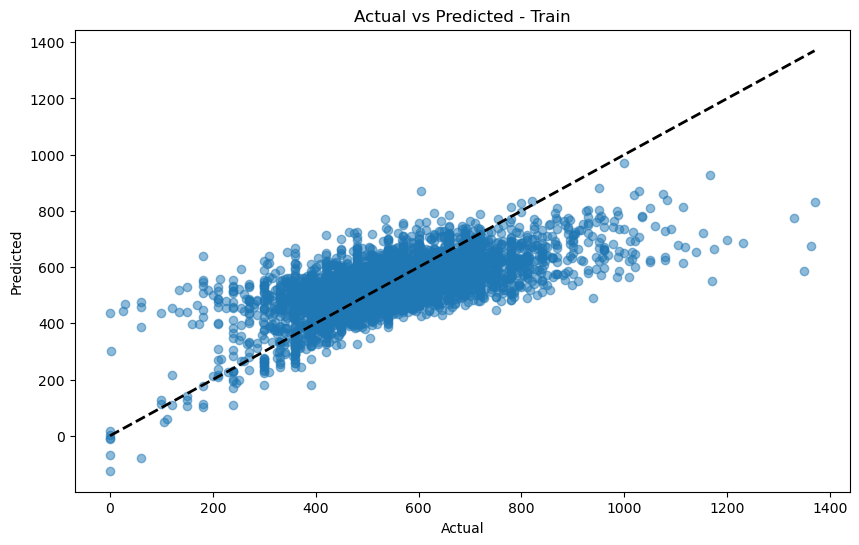

Mean Squared Error: 13375.761311848959


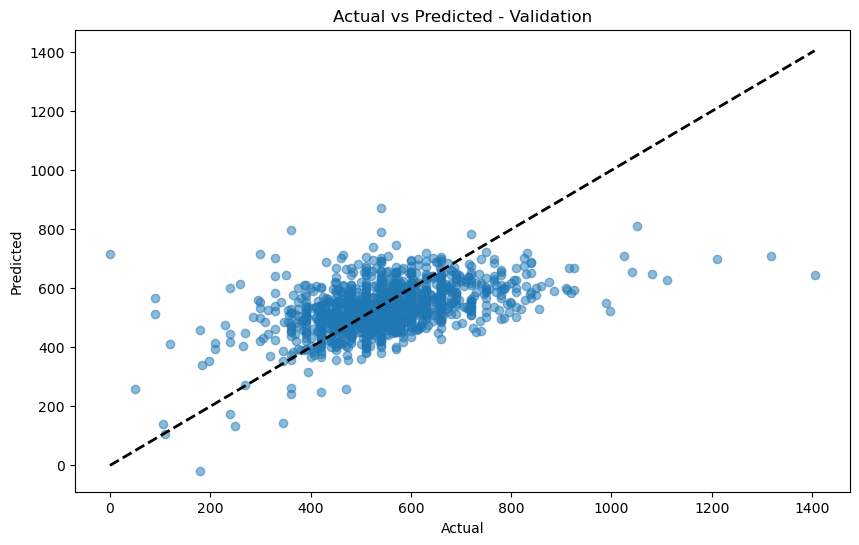

Mean Squared Error: 15214.047905815973


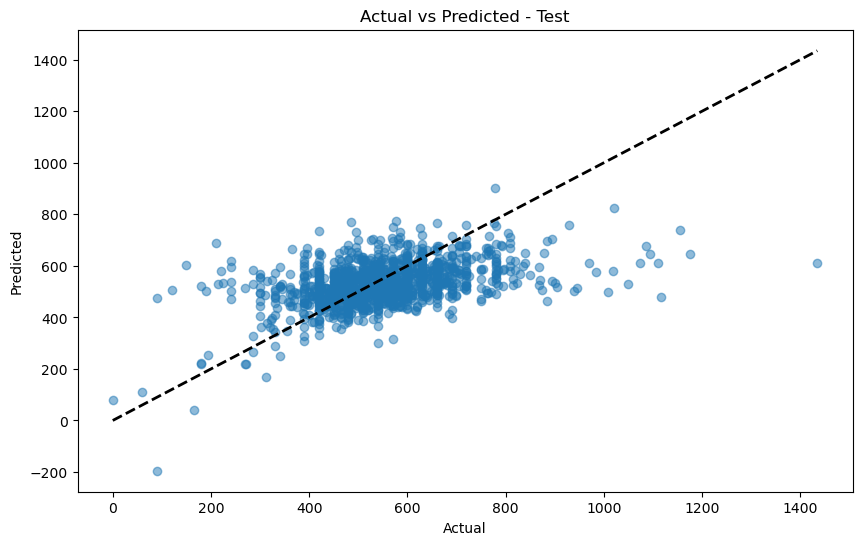

In [59]:
model.eval()
mse_total = 0
n = 0
actual = []
predictions = []
with torch.no_grad():
  loss = 0
  for inputs, targets in train_loader:
    inputs, targets = inputs.to(device), targets.to(device)
    outputs = model(inputs)
    predictions.extend(outputs.cpu().numpy().flatten())
    actual.extend(targets.cpu().numpy().flatten())
    loss = criterion(outputs, targets.unsqueeze(1))
    mse_total += loss.item()
    n += 1
  mse = mse_total / n
  print(f'Mean Squared Error: {mse}')

#plot
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(actual, predictions, alpha=0.5)
plt.plot([min(actual), max(actual)], [min(actual), max(actual)], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted - Train')
plt.show()
model.eval()
mse_total = 0
n = 0
actual = []
predictions = []
with torch.no_grad():
  loss = 0
  for inputs, targets in val_loader:
    inputs, targets = inputs.to(device), targets.to(device)
    outputs = model(inputs)
    predictions.extend(outputs.cpu().numpy().flatten())
    actual.extend(targets.cpu().numpy().flatten())
    loss = criterion(outputs, targets.unsqueeze(1))
    mse_total += loss.item()
    n += 1
  mse = mse_total / n
  print(f'Mean Squared Error: {mse}')

#plot
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(actual, predictions, alpha=0.5)
plt.plot([min(actual), max(actual)], [min(actual), max(actual)], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted - Validation')
plt.show()
model.eval()
mse_total = 0
n = 0
actual = []
predictions = []
with torch.no_grad():
  loss = 0
  for inputs, targets in test_loader:
    inputs, targets = inputs.to(device), targets.to(device)
    outputs = model(inputs)
    predictions.extend(outputs.cpu().numpy().flatten())
    actual.extend(targets.cpu().numpy().flatten())
    loss = criterion(outputs, targets.unsqueeze(1))
    mse_total += loss.item()
    n += 1
  mse = mse_total / n
  print(f'Mean Squared Error: {mse}')

#plot
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(actual, predictions, alpha=0.5)
plt.plot([min(actual), max(actual)], [min(actual), max(actual)], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted - Test')
plt.show()

| Model | Training Error | Validation Error | Test Error |
| -------- | ------------ | -------------- | ------------|
| Non-Duration Model     | 15715      |  16291         |17535|
|Non-Duration Model (with interaction terms) | 15468 | 16788 | 18283|
|Non-Duration Model + OTHER_DUR | 13801 | 14727 | 17029 |
|Non-Duration Model + OTHER_DUR (with interaction terms) | 15615 | 16432 | 18027 |
|Non-Duration Model + OTHER_DUR + ALONE_LEI_DUR | 12619 | 13227 | 15947|
|Non-Duration Model + OTHER_DUR + ALONE_LEI_DUR (with interaction terms) | 11335 | 14876 | 17061|
|Non-Duration Model + OTHER_DUR + ALONE_LEI_DUR + GROUP_WORK_DUR | 11448 | 12920 | 14699|

Validation and test errors go down, meaning that after adding another time related feature "GROUP_WORK_DUR" model generalizes better

Train Non-Duration + OTHER_DUR + ALONE_LEI_DUR + GROUP_WORK_DUR (with interaction terms)

In [62]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


#load dataset
df = pd.read_csv('D_PER_DAY.csv')
print(df.shape)
##### One-hot Encoding #####
# Whether it is a weekday or not #
df['WEEKD'] = np.where(df['DIARYDAY'].isin([1,7]), 0, 1)


# Education level (low, mid, hight) #
df['MIDEDU'] = np.where(df['EDU'].isin([40,41,42]), 1, 0)
df['HIGHEDU'] = np.where(df['EDU'].isin([43,44,45,46]), 1, 0)


# Whether lives in a stationary house or not #
df['PERSHOU'] = np.where(df['HOUSE'] == 1, 1, 0)


# Income level (low, mid, high) #
df['MIDINC'] = np.where(df['INC'].isin([9,10,11,12,13]), 1, 0)
df['HIGHINC'] = np.where(df['INC'].isin([14,15,16]), 1, 0)


# Whether at work or not #
df['EMPLOYED'] = np.where(df['EMP_STAT'] == 1, 1, 0)


# Whether male or not #
df['MALE'] = np.where(df['SEX'] == 1, 1, 0)
#drop columns
columns_to_drop = [col for col in df.columns if col.endswith('DUR') and col not in ['SLEEP_DUR','OTHER_DUR',
                                                                                    'ALONE_LEI_DUR','GROUP_WORK_DUR']]
df.drop(columns=columns_to_drop, axis=1, inplace=True)
# Dropping previous columns #
cols_to_drop = ['DIARYDAY', 'EDU', 'HOUSE', 'INC', 'EMP_STAT', 'SEX']
df.drop(columns = cols_to_drop, inplace = True)
print(df.shape)
#separate features and target
X = df.drop(['SLEEP_DUR','CASEID'], axis=1)
y = df['SLEEP_DUR']
print(X.columns.tolist())


# X_train,X_temp,y_train,y_temp = train_test_split(X,y,test_size=0.3,random_state=42)
# X_val,X_test,y_val,y_test = train_test_split(X_temp,y_temp,test_size=0.5,random_state=42)
# #standardize
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_val = scaler.transform(X_val)
# X_test = scaler.transform(X_test)
dummy_cols = ['WEEKD', 'MIDEDU', 'HIGHEDU', 'PERSHOU', 'MIDINC', 'HIGHINC', 'EMPLOYED', 'MALE']
numeric_cols = [col for col in X.columns if col not in dummy_cols]


##### Spliting Data #####
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size = 0.3, random_state = 42
)


X_test, X_val, y_test, y_val = train_test_split(
    X_temp, y_temp, test_size = 0.5, random_state = 42
)


##### Scaling the Data Values #####
scaler = StandardScaler()


X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train[numeric_cols]),
                              columns = numeric_cols, index = X_train.index)
X_val_scaled = pd.DataFrame(scaler.transform(X_val[numeric_cols]),
                            columns = numeric_cols, index = X_val.index)
X_test_scaled = pd.DataFrame(scaler.transform(X_test[numeric_cols]),
                             columns = numeric_cols, index = X_test.index)


# Recombining Numerical and Dummy Columns
X_train_final = pd.concat([X_train_scaled, X_train[dummy_cols]], axis = 1)
X_val_final = pd.concat([X_val_scaled, X_val[dummy_cols]], axis = 1)
X_test_final = pd.concat([X_test_scaled, X_test[dummy_cols]], axis = 1)


##### Slope Interactions #####
for dummy in dummy_cols:
    for numeric in numeric_cols:
        interaction_term = f"{dummy}_{numeric}"
        X_train_final[interaction_term] = X_train_final[dummy] * X_train_final[numeric]
        X_val_final[interaction_term] = X_val_final[dummy] * X_val_final[numeric]
        X_test_final[interaction_term] = X_test_final[dummy] * X_test_final[numeric]




X_train_final.head()


(8548, 30)
(8548, 16)
['GROUP_WORK_DUR', 'ALONE_LEI_DUR', 'OTHER_DUR', 'AGE', 'CHILDREN', 'ADULT', 'WEEKD', 'MIDEDU', 'HIGHEDU', 'PERSHOU', 'MIDINC', 'HIGHINC', 'EMPLOYED', 'MALE']


GROUP_WORK_DUR  ALONE_LEI_DUR  OTHER_DUR       AGE  CHILDREN     ADULT  \
4528       -0.445614       4.479492  -1.581899 -0.143076 -0.529119 -1.116979   
1760       -0.445614       0.220752   0.503009  0.719689 -0.529119 -1.116979   
2851       -0.445614       0.573547   0.171319  0.935381 -0.529119 -1.116979   
297         2.102405      -0.711635  -0.539445  0.611844 -0.529119  0.139202   
443        -0.445614      -0.711635  -1.387624 -0.897996 -0.529119  0.139202   

      WEEKD  MIDEDU  HIGHEDU  PERSHOU  ...  EMPLOYED_OTHER_DUR  EMPLOYED_AGE  \
4528      0       1        0        1  ...           -0.000000     -0.000000   
1760      1       0        0        1  ...            0.000000      0.000000   
2851      1       0        0        1  ...            0.000000      0.000000   
297       1       1        0        1  ...           -0.539445      0.611844   
443       1       0        1        1  ...           -1.387624     -0.897996   

      EMPLOYED_CHILDREN  EMPLOYED_ADULT  MALE_GROUP_WORK_DUR  \
4528          -0.000000       -0.000000            -0.445614   
1760          -0.000000       -0.000000            -0.445614   
2851          -0.000000       -0.000000            -0.000000   
297           -0.529119        0.139202             0.000000   
443           -0.529119        0.139202            -0.000000   

      MALE_ALONE_LEI_DUR  MALE_OTHER_DUR  MALE_AGE  MALE_CHILDREN  MALE_ADULT  
4528            4.479492       -1.581899 -0.143076      -0.529119   -1.116979  
1760            0.220752        0.503009  0.719689      -0.529119   -1.116979  
2851            0.000000        0.000000  0.000000      -0.000000   -0.000000  
297            -0.000000       -0.000000  0.000000      -0.000000    0.000000  
443            -0.000000       -0.000000 -0.000000      -0.000000    0.000000  

[5 rows x 62 columns]

In [66]:
import torch
from torch.utils.data import TensorDataset, DataLoader


#convert to tensors
X_train_tensor = torch.tensor(X_train_final.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val_final.values, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_final.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)


#create dataloaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)


train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)


#train the model
l1_reg = 0.005
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = Net(X_train_final.shape[1]).to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.005)
for epoch in range(200):
    model.train()
    train_loss = 0.0
    val_loss = 0.0
    for inputs, targets in train_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets.unsqueeze(1))
        loss += l1_reg * sum(p.abs().sum() for p in model.parameters())
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    train_loss /= len(train_loader)
    for inputs, targets in val_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets.unsqueeze(1))
        val_loss += loss.item()
    val_loss /= len(val_loader)
    if epoch % 20 == 0:
      print(f'Epoch {epoch+1}/{200}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}')


Epoch 1/200, Train Loss: 62904.6764, Val Loss: 20858.3682
Epoch 21/200, Train Loss: 13127.7576, Val Loss: 13863.8173
Epoch 41/200, Train Loss: 12398.8789, Val Loss: 13009.0833
Epoch 61/200, Train Loss: 11789.4258, Val Loss: 13636.1211
Epoch 81/200, Train Loss: 11000.5057, Val Loss: 13871.8496
Epoch 101/200, Train Loss: 10443.1967, Val Loss: 13992.4195
Epoch 121/200, Train Loss: 10108.4575, Val Loss: 14529.8698
Epoch 141/200, Train Loss: 9549.2905, Val Loss: 14880.8829
Epoch 161/200, Train Loss: 9309.7173, Val Loss: 15628.6534
Epoch 181/200, Train Loss: 8851.9184, Val Loss: 16417.2023


Mean Squared Error: 7960.322328944895


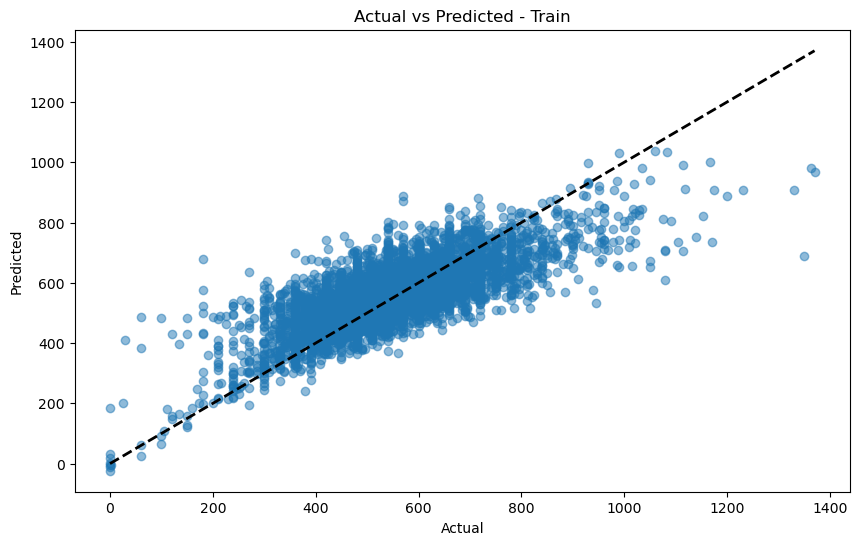

Mean Squared Error: 17241.744152681327


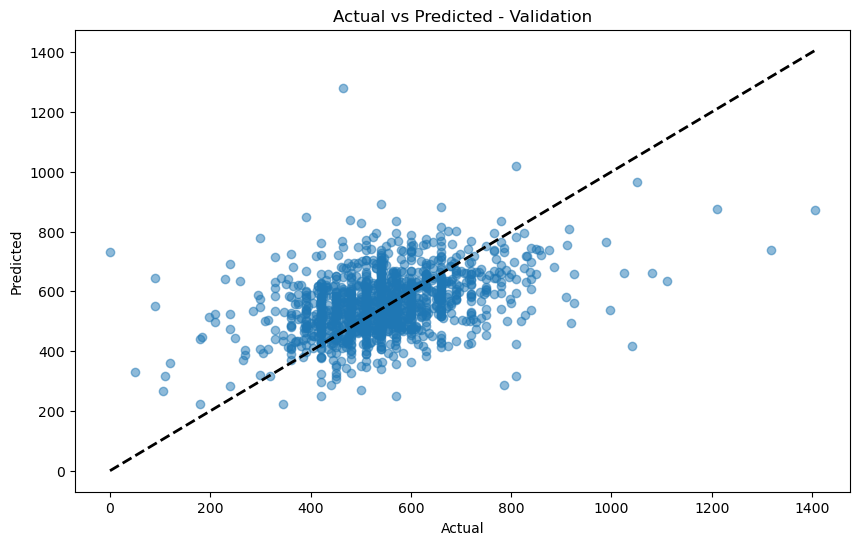

Mean Squared Error: 18022.70206404321


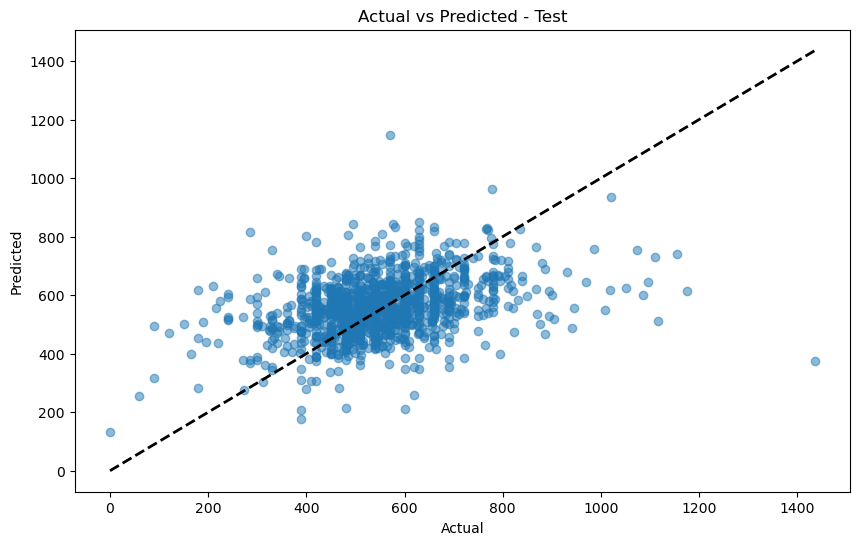

In [71]:
model.eval()
mse_total = 0
n = 0
actual = []
predictions = []
with torch.no_grad():
  loss = 0
  for inputs, targets in train_loader:
    inputs, targets = inputs.to(device), targets.to(device)
    outputs = model(inputs)
    predictions.extend(outputs.cpu().numpy().flatten())
    actual.extend(targets.cpu().numpy().flatten())
    loss = criterion(outputs, targets.unsqueeze(1))
    mse_total += loss.item()
    n += 1
  mse = mse_total / n
  print(f'Mean Squared Error: {mse}')

#plot
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(actual, predictions, alpha=0.5)
plt.plot([min(actual), max(actual)], [min(actual), max(actual)], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted - Train')
plt.show()
model.eval()
mse_total = 0
n = 0
actual = []
predictions = []
with torch.no_grad():
  loss = 0
  for inputs, targets in val_loader:
    inputs, targets = inputs.to(device), targets.to(device)
    outputs = model(inputs)
    predictions.extend(outputs.cpu().numpy().flatten())
    actual.extend(targets.cpu().numpy().flatten())
    loss = criterion(outputs, targets.unsqueeze(1))
    mse_total += loss.item()
    n += 1
  mse = mse_total / n
  print(f'Mean Squared Error: {mse}')

#plot
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(actual, predictions, alpha=0.5)
plt.plot([min(actual), max(actual)], [min(actual), max(actual)], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted - Validation')
plt.show()
model.eval()
mse_total = 0
n = 0
actual = []
predictions = []
with torch.no_grad():
  loss = 0
  for inputs, targets in test_loader:
    inputs, targets = inputs.to(device), targets.to(device)
    outputs = model(inputs)
    predictions.extend(outputs.cpu().numpy().flatten())
    actual.extend(targets.cpu().numpy().flatten())
    loss = criterion(outputs, targets.unsqueeze(1))
    mse_total += loss.item()
    n += 1
  mse = mse_total / n
  print(f'Mean Squared Error: {mse}')

#plot
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(actual, predictions, alpha=0.5)
plt.plot([min(actual), max(actual)], [min(actual), max(actual)], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted - Test')
plt.show()

| Model | Training Error | Validation Error | Test Error |
| -------- | ------------ | -------------- | ------------|
| Non-Duration Model     | 15715      |  16291         |17535|
|Non-Duration Model (with interaction terms) | 15468 | 16788 | 18283|
|Non-Duration Model + OTHER_DUR | 13801 | 14727 | 17029 |
|Non-Duration Model + OTHER_DUR (with interaction terms) | 15615 | 16432 | 18027 |
|Non-Duration Model + OTHER_DUR + ALONE_LEI_DUR | 12619 | 13227 | 15947|
|Non-Duration Model + OTHER_DUR + ALONE_LEI_DUR (with interaction terms) | 11335 | 14876 | 17061|
|Non-Duration Model + OTHER_DUR + ALONE_LEI_DUR + GROUP_WORK_DUR | 11448 | 12920 | 14699|
|Non-Duration Model + OTHER_DUR + ALONE_LEI_DUR + GROUP_WORK_DUR (with interaction terms) | 9333 | 14160 | 16325|

As with above models , interaction terms make it harder to generalize

Now we are going to trail Model 9 which is the best model according to linear regression.

In [79]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np



#load dataset
df = pd.read_csv('D_PER_DAY.csv')
print(df.shape)
##### One-hot Encoding #####
# Whether it is a weekday or not #
df['WEEKD'] = np.where(df['DIARYDAY'].isin([1,7]), 0, 1)




# Education level (low, mid, hight) #
df['MIDEDU'] = np.where(df['EDU'].isin([40,41,42]), 1, 0)
df['HIGHEDU'] = np.where(df['EDU'].isin([43,44,45,46]), 1, 0)




# Whether lives in a stationary house or not #
df['PERSHOU'] = np.where(df['HOUSE'] == 1, 1, 0)




# Income level (low, mid, high) #
df['MIDINC'] = np.where(df['INC'].isin([9,10,11,12,13]), 1, 0)
df['HIGHINC'] = np.where(df['INC'].isin([14,15,16]), 1, 0)




# Whether at work or not #
df['EMPLOYED'] = np.where(df['EMP_STAT'] == 1, 1, 0)




# Whether male or not #
df['MALE'] = np.where(df['SEX'] == 1, 1, 0)
#drop columns
columns_to_drop = [col for col in df.columns if col.endswith('DUR') and col not in ['SLEEP_DUR','OTHER_DUR','ALONE_LEI_DUR',
                                                                                    'GROUP_WORK_DUR','GROUP_LEI_DUR','ALONE_WORK_DUR',
                                                                                    'OTHER_TRAVEL_DUR','ALONE_INT_DUR','GROUP_EXE_DUR']]
df.drop(columns=columns_to_drop, axis=1, inplace=True)
# Dropping previous columns #
cols_to_drop = ['DIARYDAY', 'EDU', 'HOUSE', 'INC', 'EMP_STAT', 'SEX']
df.drop(columns = cols_to_drop, inplace = True)
print(df.shape)
#separate features and target
X = df.drop(['SLEEP_DUR','CASEID'], axis=1)
y = df['SLEEP_DUR']
print(X.columns.tolist())




# X_train,X_temp,y_train,y_temp = train_test_split(X,y,test_size=0.3,random_state=42)
# X_val,X_test,y_val,y_test = train_test_split(X_temp,y_temp,test_size=0.5,random_state=42)
# #standardize
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_val = scaler.transform(X_val)
# X_test = scaler.transform(X_test)
dummy_cols = ['WEEKD', 'MIDEDU', 'HIGHEDU', 'PERSHOU', 'MIDINC', 'HIGHINC', 'EMPLOYED', 'MALE']
numeric_cols = [col for col in X.columns if col not in dummy_cols]




##### Spliting Data #####
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size = 0.3, random_state = 42
)




X_test, X_val, y_test, y_val = train_test_split(
    X_temp, y_temp, test_size = 0.5, random_state = 42
)




##### Scaling the Data Values #####
scaler = StandardScaler()




X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train[numeric_cols]),
                              columns = numeric_cols, index = X_train.index)
X_val_scaled = pd.DataFrame(scaler.transform(X_val[numeric_cols]),
                            columns = numeric_cols, index = X_val.index)
X_test_scaled = pd.DataFrame(scaler.transform(X_test[numeric_cols]),
                             columns = numeric_cols, index = X_test.index)




# Recombining Numerical and Dummy Columns
X_train_final = pd.concat([X_train_scaled, X_train[dummy_cols]], axis = 1)
X_val_final = pd.concat([X_val_scaled, X_val[dummy_cols]], axis = 1)
X_test_final = pd.concat([X_test_scaled, X_test[dummy_cols]], axis = 1)




##### Slope Interactions #####
for dummy in dummy_cols:
    for numeric in numeric_cols:
        interaction_term = f"{dummy}_{numeric}"
        X_train_final[interaction_term] = X_train_final[dummy] * X_train_final[numeric]
        X_val_final[interaction_term] = X_val_final[dummy] * X_val_final[numeric]
        X_test_final[interaction_term] = X_test_final[dummy] * X_test_final[numeric]








X_train_final.head()


(8548, 30)
(8548, 21)
['OTHER_TRAVEL_DUR', 'GROUP_EXE_DUR', 'ALONE_INT_DUR', 'ALONE_WORK_DUR', 'GROUP_WORK_DUR', 'ALONE_LEI_DUR', 'GROUP_LEI_DUR', 'OTHER_DUR', 'AGE', 'CHILDREN', 'ADULT', 'WEEKD', 'MIDEDU', 'HIGHEDU', 'PERSHOU', 'MIDINC', 'HIGHINC', 'EMPLOYED', 'MALE']


OTHER_TRAVEL_DUR  GROUP_EXE_DUR  ALONE_INT_DUR  ALONE_WORK_DUR  \
4528         -0.576850      -0.267896      -0.321284       -0.378701   
1760          1.331877      -0.267896      -0.321284       -0.378701   
2851          0.241176      -0.267896      -0.321284       -0.378701   
297          -0.576850      -0.267896      -0.321284       -0.378701   
443          -0.576850      -0.267896       5.893281        2.029695   

      GROUP_WORK_DUR  ALONE_LEI_DUR  GROUP_LEI_DUR  OTHER_DUR       AGE  \
4528       -0.445614       4.479492      -0.832198  -1.581899 -0.143076   
1760       -0.445614       0.220752      -0.363724   0.503009  0.719689   
2851       -0.445614       0.573547      -0.070929   0.171319  0.935381   
297         2.102405      -0.711635       0.280426  -0.539445  0.611844   
443        -0.445614      -0.711635      -0.656520  -1.387624 -0.897996   

      CHILDREN  ...  MALE_GROUP_EXE_DUR  MALE_ALONE_INT_DUR  \
4528 -0.529119  ...           -0.267896           -0.321284   
1760 -0.529119  ...           -0.267896           -0.321284   
2851 -0.529119  ...           -0.000000           -0.000000   
297  -0.529119  ...           -0.000000           -0.000000   
443  -0.529119  ...           -0.000000            0.000000   

      MALE_ALONE_WORK_DUR  MALE_GROUP_WORK_DUR  MALE_ALONE_LEI_DUR  \
4528            -0.378701            -0.445614            4.479492   
1760            -0.378701            -0.445614            0.220752   
2851            -0.000000            -0.000000            0.000000   
297             -0.000000             0.000000           -0.000000   
443              0.000000            -0.000000           -0.000000   

      MALE_GROUP_LEI_DUR  MALE_OTHER_DUR  MALE_AGE  MALE_CHILDREN  MALE_ADULT  
4528           -0.832198       -1.581899 -0.143076      -0.529119   -1.116979  
1760           -0.363724        0.503009  0.719689      -0.529119   -1.116979  
2851           -0.000000        0.000000  0.000000      -0.000000   -0.000000  
297             0.000000       -0.000000  0.000000      -0.000000    0.000000  
443            -0.000000       -0.000000 -0.000000      -0.000000    0.000000  

[5 rows x 107 columns]

In [81]:
#loader
import torch
from torch.utils.data import TensorDataset, DataLoader
train_dataset = TensorDataset(torch.tensor(X_train_final.values, dtype=torch.float32), torch.tensor(y_train.values, dtype=torch.float32))
val_dataset = TensorDataset(torch.tensor(X_val_final.values, dtype=torch.float32), torch.tensor(y_val.values, dtype=torch.float32))
test_dataset = TensorDataset(torch.tensor(X_test_final.values, dtype=torch.float32), torch.tensor(y_test.values, dtype=torch.float32))

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

In [83]:
#train the model
l1_reg = 0.005
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = Net(X_train_final.shape[1]).to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.005)
for epoch in range(200):
    model.train()
    train_loss = 0.0
    val_loss = 0.0
    for inputs, targets in train_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets.unsqueeze(1))
        loss += l1_reg * sum(p.abs().sum() for p in model.parameters())
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    train_loss /= len(train_loader)
    #validation
    model.eval()
    with torch.no_grad():
        for inputs, targets in val_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets.unsqueeze(1))
            val_loss += loss.item()
        val_loss /= len(val_loader)
    if (epoch+1) % 20 == 0:
      print(f'Epoch {epoch+1}/{200}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}')

Epoch 20/200, Train Loss: 3390.0484, Val Loss: 3855.1193
Epoch 40/200, Train Loss: 2839.0225, Val Loss: 4560.5023
Epoch 60/200, Train Loss: 2192.2979, Val Loss: 4296.1070
Epoch 80/200, Train Loss: 1906.5278, Val Loss: 4785.4807
Epoch 100/200, Train Loss: 1618.6407, Val Loss: 4580.3429
Epoch 120/200, Train Loss: 1461.6418, Val Loss: 4543.9007
Epoch 140/200, Train Loss: 1341.4158, Val Loss: 4584.7084
Epoch 160/200, Train Loss: 1257.1121, Val Loss: 4864.6162
Epoch 180/200, Train Loss: 1159.6306, Val Loss: 5284.0393
Epoch 200/200, Train Loss: 1046.3817, Val Loss: 5310.0577


Mean Squared Error: 914.8107165984292


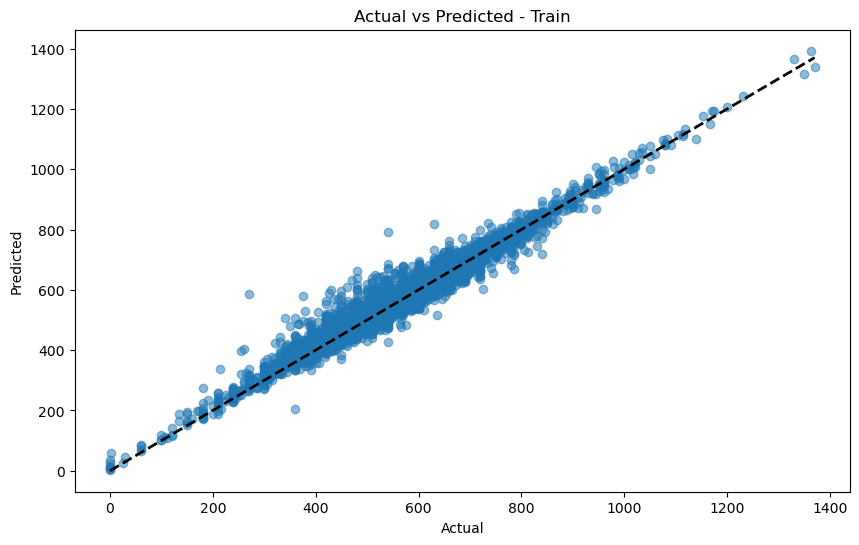

Mean Squared Error: 5310.057730215567


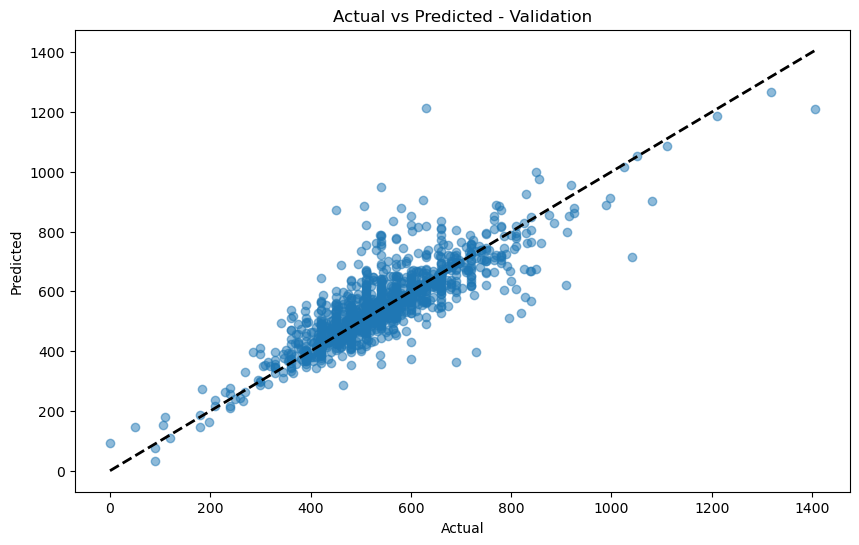

Mean Squared Error: 6632.93100201642


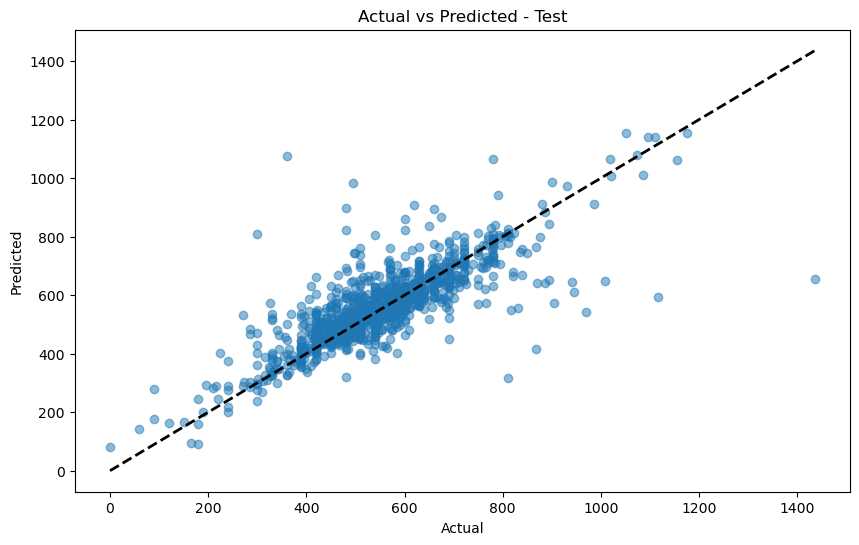

In [85]:
model.eval()
mse_total = 0
n = 0
actual = []
predictions = []
with torch.no_grad():
  loss = 0
  for inputs, targets in train_loader:
    inputs, targets = inputs.to(device), targets.to(device)
    outputs = model(inputs)
    predictions.extend(outputs.cpu().numpy().flatten())
    actual.extend(targets.cpu().numpy().flatten())
    loss = criterion(outputs, targets.unsqueeze(1))
    mse_total += loss.item()
    n += 1
  mse = mse_total / n
  print(f'Mean Squared Error: {mse}')

#plot
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(actual, predictions, alpha=0.5)
plt.plot([min(actual), max(actual)], [min(actual), max(actual)], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted - Train')
plt.show()
model.eval()
mse_total = 0
n = 0
actual = []
predictions = []
with torch.no_grad():
  loss = 0
  for inputs, targets in val_loader:
    inputs, targets = inputs.to(device), targets.to(device)
    outputs = model(inputs)
    predictions.extend(outputs.cpu().numpy().flatten())
    actual.extend(targets.cpu().numpy().flatten())
    loss = criterion(outputs, targets.unsqueeze(1))
    mse_total += loss.item()
    n += 1
  mse = mse_total / n
  print(f'Mean Squared Error: {mse}')

#plot
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(actual, predictions, alpha=0.5)
plt.plot([min(actual), max(actual)], [min(actual), max(actual)], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted - Validation')
plt.show()
model.eval()
mse_total = 0
n = 0
actual = []
predictions = []
with torch.no_grad():
  loss = 0
  for inputs, targets in test_loader:
    inputs, targets = inputs.to(device), targets.to(device)
    outputs = model(inputs)
    predictions.extend(outputs.cpu().numpy().flatten())
    actual.extend(targets.cpu().numpy().flatten())
    loss = criterion(outputs, targets.unsqueeze(1))
    mse_total += loss.item()
    n += 1
  mse = mse_total / n
  print(f'Mean Squared Error: {mse}')

#plot
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(actual, predictions, alpha=0.5)
plt.plot([min(actual), max(actual)], [min(actual), max(actual)], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted - Test')
plt.show()

| Model | Training Error | Validation Error | Test Error |
| -------- | ------------ | -------------- | ------------|
| Non-Duration Model     | 15715      |  16291         |17535|
|Non-Duration Model (with interaction terms) | 15468 | 16788 | 18283|
|Non-Duration Model + OTHER_DUR | 13801 | 14727 | 17029 |
|Non-Duration Model + OTHER_DUR (with interaction terms) | 15615 | 16432 | 18027 |
|Non-Duration Model + OTHER_DUR + ALONE_LEI_DUR | 12619 | 13227 | 15947|
|Non-Duration Model + OTHER_DUR + ALONE_LEI_DUR (with interaction terms) | 11335 | 14876 | 17061|
|Non-Duration Model + OTHER_DUR + ALONE_LEI_DUR + GROUP_WORK_DUR | 11448 | 12920 | 14699|
|Non-Duration Model + OTHER_DUR + ALONE_LEI_DUR + GROUP_WORK_DUR (with interaction terms) | 9333 | 14160 | 16325|
|Non-Duration Model + OTHER_DUR + ALONE_LEI_DUR + GROUP_WORK_DUR + ..+ GROUP_EXE_DUR | 1349 | 4438 | 5535|


As of now, neural network is not performing significantly better than linear regression. Possible reasons could be:
1. Exploding or vanishing gradients: Our model shows very high training error in each case, meaning it has not been trained properly. This could be because it is suffering from exploding or vanishing gradient problems because of which backpropagation is not happening properly.
2. Hyperparameter Tuning: Model needs to be experimented with batch size, learning rate and optimizer tuning.
3. Not enough non-linearity in data: The data we are using may not have enough non-linearity for the model to learn from.

Future Works:
1. Generate X outputs for each target and train by crossentropy loss.
2. Try out combinations of input features.
